In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for AWS compute node


No vtk


In [2]:
sec1 = np.random.choice(metadata_cache['valid_sections']['MD589'], 1)[0]

In [3]:
im1 = img_as_ubyte(rgb2gray(DataManager.load_image(stack='MD589', version='cropped', resol='lossless', section=sec1)))
im2 = img_as_ubyte(rgb2gray(DataManager.load_image(stack='MD589', version='cropped', resol='lossless', section=sec1+2)))
# im2 = im1.copy()

rm -rf /shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped.tif && mkdir -p /shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped.tif /shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped.tif


/usr/local/lib/python2.7/dist-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)
/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


rm -rf /shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped.tif && mkdir -p /shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped.tif /shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped.tif


In [4]:
# Lossless, fixed image is this number larger on left/right/top/bottom than moving image.
margin = 1000

In [5]:
# xmin = 113
# ymin = 183
# w = 118
# h = 130

xmin = np.random.randint(margin/32, (im1.shape[1]-margin)/32 - 120, 1)[0]
ymin = np.random.randint(margin/32, (im1.shape[0]-margin)/32 - 120, 1)[0]
w = 120
h = 120

xmax = xmin + w - 1
ymax = ymin + h - 1

In [43]:
print sec1, sec1+2, xmin, xmax, ymin, ymax

259 261 152 271 214 333


In [6]:
downsample_factor = 25./XY_PIXEL_DISTANCE_LOSSLESS

In [7]:
im1_cropped = im1[ymin*32 - margin:ymax*32 + margin, xmin*32-margin:xmax*32+margin]
im1_cropped_downsampled = img_as_ubyte(gaussian(img_as_float(im1_cropped), sigma=downsample_factor/2.))

im2_cropped = im2[ymin*32:ymax*32, xmin*32:xmax*32]
im2_cropped_downsampled = img_as_ubyte(gaussian(img_as_float(im2_cropped), sigma=downsample_factor/2.))

In [8]:
from skimage.transform import warp

In [80]:
im1_cropped_downsampled_padded = np.pad(im1_cropped_downsampled, 1000, mode='constant', constant_values=255)
im1_cropped_lossless_padded = np.pad(im1_cropped, 1000, mode='constant', constant_values=255)

# imsave('/home/ubuntu/im1.tif', im1_cropped_downsampled_padded)
imsave('/home/ubuntu/im1.tif', im1_cropped_lossless_padded)

In [10]:
im2_cropped_downsampled_padded = np.pad(im2_cropped_downsampled, 1000 + margin, mode='constant', constant_values=255)
im2_cropped_lossless_padded = np.pad(im2_cropped, 1000 + margin, mode='constant', constant_values=255)

In [11]:
assert im1_cropped_lossless_padded.shape == im2_cropped_lossless_padded.shape

In [107]:
c2 = np.array([im2_cropped_downsampled_padded.shape[1]/2, im2_cropped_downsampled_padded.shape[0]/2])
c1 = np.array([im1_cropped_downsampled_padded.shape[1]/2, im1_cropped_downsampled_padded.shape[0]/2])

angle_deg = 15
angle_rad = np.deg2rad(angle_deg)

R = np.array([[np.cos(angle_rad), np.sin(angle_rad)],
                      [-np.sin(angle_rad), np.cos(angle_rad)]])
t = np.array([1000, 1000])
# t = np.array([0, 0])

# T = np.eye(3)
# T[:2, :2] = R
# T[:2, 2] = c1 - np.dot(R, c2) + t

# skimage.transform.warp needs T that maps from output image to input image
T = np.eye(3)
T[:2, :2] = np.linalg.inv(R)
T[:2, 2] = np.dot(np.linalg.inv(R), -t-c1) + c2

In [108]:
im2_cropped_downsampled_padded_transformed = img_as_ubyte(warp(im2_cropped_downsampled_padded, T, cval=0.))
im2_cropped_lossless_padded_transformed = img_as_ubyte(warp(im2_cropped_lossless_padded, T, cval=0.))

# imsave('/home/ubuntu/im2.tif', im2_cropped_downsampled_padded_transformed)
imsave('/home/ubuntu/im2.tif', im2_cropped_lossless_padded_transformed)

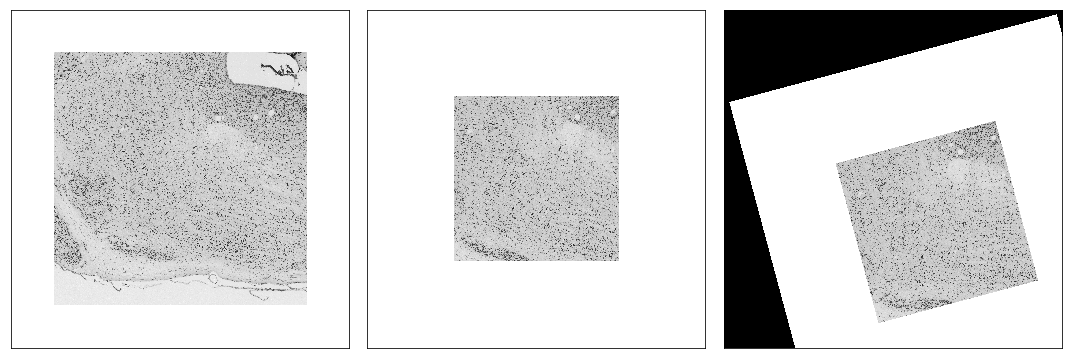

In [109]:
# display_images_in_grids([im1_cropped_downsampled_padded, im2_cropped_downsampled_padded, im2_cropped_downsampled_padded_transformed],
#                        nc=3, vmin=0, vmax=255, cmap=plt.cm.gray)

display_images_in_grids([im1_cropped_lossless_padded, im2_cropped_lossless_padded, im2_cropped_lossless_padded_transformed],
                       nc=3, vmin=0, vmax=255, cmap=plt.cm.gray)

In [110]:
im1_cropped_downsampled_padded_mask = (im1_cropped_downsampled_padded != 0) & (im1_cropped_downsampled_padded != 255)
imsave('/home/ubuntu/im1_mask.png', im1_cropped_downsampled_padded_mask)

im2_cropped_downsampled_padded_transformed_mask = (im2_cropped_downsampled_padded_transformed != 0) & (im2_cropped_downsampled_padded_transformed != 255)
imsave('/home/ubuntu/im2_mask.png', im2_cropped_downsampled_padded_transformed_mask)

In [111]:
! mkdir /home/ubuntu/test

mkdir: cannot create directory ‘/home/ubuntu/test’: File exists


In [118]:
! elastix -f /home/ubuntu/im1.tif -m /home/ubuntu/im2.tif -fMask /home/ubuntu/im1_mask.png \
-mMask /home/ubuntu/im2_mask.png -out /home/ubuntu/test -p /shared/MouseBrainAtlas/preprocess/parameters/Parameters_Rigid_erodeMask.txt


elastix is started at Wed Jun 28 21:11:14 2017.

which elastix:   elastix
elastix runs at: ip-172-31-22-74
  Linux 4.4.0-38-generic (x64), #57-Ubuntu SMP Tue Sep 6 15:42:33 UTC 2016
  with 64414 MB memory, and 1 cores @ 2300 MHz.
-------------------------------------------------------------------------

Running elastix with parameter file 0: "/shared/MouseBrainAtlas/preprocess/parameters/Parameters_Rigid_erodeMask.txt".

Current time: Wed Jun 28 21:11:14 2017.
Reading the elastix parameters from file ...

Installing all components.
InstallingComponents was successful.

ELASTIX version: 4.800
Command line options from ElastixBase:
-f        /home/ubuntu/im1.tif
-m        /home/ubuntu/im2.tif
-fMask    /home/ubuntu/im1_mask.png
-mMask    /home/ubuntu/im2_mask.png
-out      /home/ubuntu/test/
-p        /shared/MouseBrainAtlas/preprocess/parameters/Parameters_Rigid_erodeMask.txt
-threads  unspecified, so all available threads are used
Command line options from TransformBase:
-t0       uns

90	-0.174509	0.000000	388.672384	0.001328	1.0
91	-0.179633	0.000000	388.672384	0.001188	1.1
92	-0.175254	0.000000	388.672384	0.001027	1.1
93	-0.133262	0.000000	388.672384	0.001659	1.0
94	-0.174332	0.000000	388.672384	0.001338	1.0
95	-0.166959	0.000000	388.672384	0.001428	1.1
96	-0.165136	0.000000	388.672384	0.000952	1.0
97	-0.202967	0.000000	388.672384	0.001278	1.0
98	-0.180765	0.000000	388.672384	0.000722	1.1
99	-0.140042	0.000000	388.672384	0.001526	1.1
100	-0.181844	0.000000	388.672384	0.001170	1.0
101	-0.221322	0.000000	388.672384	0.000888	0.9
102	-0.204266	0.000000	388.672384	0.001496	1.1
103	-0.150860	0.000000	388.672384	0.001093	1.1
104	-0.168224	0.000000	388.672384	0.001330	1.0
105	-0.218658	0.000000	388.672384	0.001292	1.0
106	-0.161932	0.000000	388.672384	0.001393	1.1
107	-0.167412	0.000000	388.672384	0.001364	0.9
108	-0.176212	0.000000	388.672384	0.001672	1.0
109	-0.163051	0.000000	388.672384	0.001458	1.0
110	-0.177796	0.000000	388.672384	0.001285	1.0
111	-0.182949	0.000000	

277	-0.255357	0.000000	388.672384	0.000732	1.1
278	-0.247773	0.000000	388.672384	0.000864	1.1
279	-0.286688	0.000000	388.672384	0.001295	1.1
280	-0.305099	0.000000	388.672384	0.000686	1.1
281	-0.281860	0.000000	388.672384	0.000936	1.1
282	-0.254125	0.000000	388.672384	0.001299	1.1
283	-0.283481	0.000000	388.672384	0.000933	1.0
284	-0.250202	0.000000	388.672384	0.001157	1.0
285	-0.258623	0.000000	388.672384	0.000928	1.1
286	-0.276241	0.000000	388.672384	0.001206	1.0
287	-0.239591	0.000000	388.672384	0.000586	1.1
288	-0.239992	0.000000	388.672384	0.000799	1.1
289	-0.243383	0.000000	388.672384	0.000695	1.1
290	-0.258556	0.000000	388.672384	0.000902	1.0
291	-0.269456	0.000000	388.672384	0.000693	1.1
292	-0.284359	0.000000	388.672384	0.000783	1.1
293	-0.263092	0.000000	388.672384	0.001293	1.0
294	-0.265473	0.000000	388.672384	0.000342	1.1
295	-0.218654	0.000000	388.672384	0.000675	1.0
296	-0.313926	0.000000	388.672384	0.001007	1.0
297	-0.320189	0.000000	388.672384	0.001094	0.9
298	-0.249204

460	-0.321803	0.000000	388.672384	0.000435	0.9
461	-0.319795	0.000000	388.672384	0.000398	1.8
462	-0.286838	0.000000	388.672384	0.001172	1.0
463	-0.307118	0.000000	388.672384	0.000478	1.0
464	-0.271667	0.000000	388.672384	0.000374	1.0
465	-0.327691	0.000000	388.672384	0.000569	1.0
466	-0.290939	0.000000	388.672384	0.000446	1.0
467	-0.287169	0.000000	388.672384	0.000938	1.0
468	-0.280302	0.000000	388.672384	0.000292	1.1
469	-0.317859	0.000000	388.672384	0.001017	1.0
470	-0.371556	0.000000	388.672384	0.000723	1.0
471	-0.273924	0.000000	388.672384	0.000506	1.1
472	-0.372894	0.000000	388.672384	0.000782	1.1
473	-0.298278	0.000000	388.672384	0.000671	1.0
474	-0.272721	0.000000	388.672384	0.000724	1.0
475	-0.331218	0.000000	388.672384	0.000463	1.0
476	-0.397545	0.000000	388.672384	0.000505	1.1
477	-0.347688	0.000000	388.672384	0.000298	1.0
478	-0.348333	0.000000	388.672384	0.000943	1.0
479	-0.351313	0.000000	388.672384	0.000848	1.2
480	-0.305203	0.000000	388.672384	0.000770	1.0
481	-0.291304

650	-0.348673	0.364523	382.040827	0.000446	1.2
651	-0.345089	0.321426	382.813049	0.000379	1.0
652	-0.327571	0.278288	383.589133	0.000449	0.9
653	-0.340537	0.235150	384.368370	0.000307	1.1
654	-0.323991	0.192012	385.150779	0.000468	1.0
655	-0.357135	0.148874	385.936381	0.000613	1.0
656	-0.276798	0.105737	386.725193	0.000486	1.0
657	-0.381009	0.062599	387.517237	0.000874	1.0
658	-0.382591	0.019461	388.312532	0.000606	1.0
659	-0.285700	0.000000	388.672384	0.000178	1.0
660	-0.352406	0.000000	388.672384	0.000476	1.0
661	-0.379603	0.000000	388.672384	0.000573	1.0
662	-0.336098	0.000000	388.672384	0.000288	1.0
663	-0.340248	0.000000	388.672384	0.000495	1.0
664	-0.366069	0.000000	388.672384	0.000784	1.0
665	-0.369864	0.000000	388.672384	0.000687	1.0
666	-0.355330	0.000000	388.672384	0.000365	1.1
667	-0.342938	0.000000	388.672384	0.000497	1.1
668	-0.295745	0.000000	388.672384	0.000412	1.1
669	-0.338067	0.000000	388.672384	0.000393	1.0
670	-0.350420	0.000000	388.672384	0.000905	1.0
671	-0.349234

840	-0.389076	6.225381	299.798193	0.000784	1.0
841	-0.374207	6.182243	300.273968	0.000534	1.1
842	-0.401405	6.139105	300.751257	0.000290	2.3
843	-0.328301	6.095968	301.230065	0.000434	1.1
844	-0.313412	6.052830	301.710400	0.000468	1.1
845	-0.369506	6.009692	302.192269	0.000355	1.0
846	-0.335222	5.966554	302.675680	0.000265	1.0
847	-0.377805	5.923416	303.160640	0.000388	1.0
848	-0.395091	5.880278	303.647157	0.000446	1.0
849	-0.292399	5.837140	304.135238	0.000229	1.0
850	-0.325555	6.185275	300.240477	0.000358	1.1
851	-0.317579	6.145678	300.678443	0.000480	1.0
852	-0.316444	6.102540	301.157019	0.000366	1.0
853	-0.348940	6.059402	301.637121	0.000478	1.0
854	-0.339927	6.016264	302.118756	0.000246	1.1
855	-0.361678	5.973126	302.601932	0.000611	1.1
856	-0.349862	5.929988	303.086656	0.000310	1.0
857	-0.370803	5.886850	303.572935	0.000245	0.9
858	-0.389140	5.843712	304.060776	0.000754	1.0
859	-0.375955	5.800575	304.550189	0.000316	0.9
860	-0.353978	5.757437	305.041179	0.000358	1.0
861	-0.369380

1025	-0.333407	14.708657	228.575387	0.000344	1.2
1026	-0.344324	14.665519	228.851851	0.000361	1.1
1027	-0.349793	14.622381	229.128985	0.000306	1.1
1028	-0.329079	14.579243	229.406792	0.000437	1.1
1029	-0.420451	14.536105	229.685272	0.000719	1.2
1030	-0.359811	14.492968	229.964430	0.000289	1.1
1031	-0.318312	15.492968	223.662821	0.000788	1.4
1032	-0.400067	16.492968	217.697360	0.000299	1.5
1033	-0.336153	16.449830	217.948122	0.000549	1.0
1034	-0.341343	17.449781	212.280013	0.000282	1.0
1035	-0.360704	18.411055	207.102301	0.000219	1.1
1036	-0.351975	18.367918	207.329230	0.000362	1.0
1037	-0.345577	18.325202	207.554433	0.000267	1.0
1038	-0.388230	18.282074	207.782309	0.000394	1.0
1039	-0.336460	18.238961	208.010605	0.000643	1.2
1040	-0.334668	18.195823	208.239536	0.000449	1.1
1041	-0.416285	18.152686	208.468971	0.000567	1.0
1042	-0.349534	18.109548	208.698912	0.000389	1.0
1043	-0.387397	18.066410	208.929362	0.000267	1.1
1044	-0.378423	18.023272	209.160320	0.000406	1.0
1045	-0.312209	17.98

1211	-0.318803	22.059077	189.556318	0.000408	1.1
1212	-0.411430	22.015939	189.746412	0.000418	1.0
1213	-0.380901	21.972801	189.936887	0.000216	1.0
1214	-0.401171	21.929663	190.127745	0.000482	1.0
1215	-0.367964	21.886525	190.318987	0.000397	1.0
1216	-0.324263	22.886525	185.982372	0.000323	1.0
1217	-0.418857	22.843387	186.165361	0.000367	1.0
1218	-0.445565	23.717284	182.527187	0.000288	0.9
1219	-0.345834	23.674146	182.703438	0.000205	1.0
1220	-0.384489	23.646898	182.814942	0.000188	1.0
1221	-0.409779	23.604158	182.990116	0.000475	1.0
1222	-0.355467	23.561020	183.167262	0.000448	1.0
1223	-0.370364	23.517882	183.344751	0.000503	1.0
1224	-0.350803	23.474745	183.522584	0.000518	1.0
1225	-0.333251	23.431607	183.700763	0.000226	1.0
1226	-0.369435	23.388469	183.879288	0.000220	1.1
1227	-0.384137	23.345401	184.057871	0.000414	1.1
1228	-0.333668	23.302276	184.237036	0.000176	1.0
1229	-0.360452	23.259181	184.416428	0.000305	1.0
1230	-0.294373	23.216106	184.596084	0.000304	1.1
1231	-0.332403	23.17

1397	-0.458381	29.948233	160.204182	0.000193	1.0
1398	-0.424594	29.905096	160.339942	0.000340	1.1
1399	-0.393918	29.866941	160.460211	0.000185	1.0
1400	-0.361267	29.828321	160.582129	0.000242	1.1
1401	-0.423467	29.785185	160.718525	0.000595	1.2
1402	-0.350085	29.742047	160.855159	0.000492	1.0
1403	-0.372628	29.698909	160.992025	0.000171	1.1
1404	-0.441210	29.655771	161.129124	0.000249	1.1
1405	-0.325418	29.612634	161.266454	0.000457	1.1
1406	-0.317814	29.569496	161.404021	0.000370	1.1
1407	-0.371553	29.526359	161.541823	0.000197	1.0
1408	-0.354281	29.483221	161.679860	0.000362	1.1
1409	-0.384743	29.440083	161.818133	0.000665	1.0
1410	-0.296327	29.396945	161.956644	0.000301	1.1
1411	-0.309656	30.396945	158.805549	0.000261	1.0
1412	-0.308413	30.353817	158.938916	0.000253	1.0
1413	-0.457466	30.310683	159.072527	0.000815	1.1
1414	-0.429828	31.310683	156.031609	0.000296	1.0
1415	-0.379747	31.267545	156.160386	0.000577	1.0
1416	-0.430197	31.224408	156.289376	0.000385	1.1
1417	-0.367258	31.18

1583	-0.323292	52.660007	110.808028	0.000147	1.0
1584	-0.394551	52.617019	110.872732	0.000191	1.3
1585	-0.410809	52.574342	110.937045	0.000407	1.0
1586	-0.304394	52.531204	111.002127	0.000390	1.1
1587	-0.412338	52.880571	110.477219	0.000294	1.1
1588	-0.328597	52.837789	110.541230	0.000420	1.1
1589	-0.387467	52.794651	110.605849	0.000341	1.1
1590	-0.335735	52.751514	110.670543	0.000347	1.0
1591	-0.357449	53.034230	110.247922	0.000314	1.0
1592	-0.333593	53.268098	109.900756	0.000376	1.0
1593	-0.286695	53.236840	109.947030	0.000418	1.1
1594	-0.360665	53.193702	110.010956	0.000253	1.0
1595	-0.397408	53.151471	110.073609	0.000448	1.1
1596	-0.342045	53.108333	110.137682	0.000275	1.0
1597	-0.276955	53.065196	110.201830	0.000444	1.0
1598	-0.385086	54.065191	108.733755	0.000376	1.0
1599	-0.356082	54.022056	108.796272	0.000299	1.0
1600	-0.343364	53.978918	108.858866	0.000441	1.1
1601	-0.389422	53.935780	108.921533	0.000249	1.0
1602	-0.366826	53.892643	108.984271	0.000311	1.0
1603	-0.402300	53.84

1766	-0.315008	75.088766	84.943541	0.000411	1.0
1767	-0.336744	75.045629	84.981692	0.000300	1.1
1768	-0.366273	75.002491	85.019878	0.000281	1.3
1769	-0.374067	74.963474	85.054446	0.000494	1.0
1770	-0.286980	75.963474	84.177265	0.000363	1.0
1771	-0.322879	75.920336	84.214731	0.000296	1.1
1772	-0.328985	75.877198	84.252231	0.000475	1.1
1773	-0.413457	75.834060	84.289764	0.000338	0.9
1774	-0.408641	75.790922	84.327330	0.000593	1.0
1775	-0.403040	75.747785	84.364930	0.000438	1.0
1776	-0.319825	75.704647	84.402563	0.000364	1.0
1777	-0.401122	75.661509	84.440230	0.000260	1.1
1778	-0.328657	75.618371	84.477931	0.000243	1.1
1779	-0.317596	75.575233	84.515665	0.000354	1.1
1780	-0.344001	75.532104	84.553426	0.000202	1.1
1781	-0.430303	75.491637	84.588886	0.000361	1.1
1782	-0.381115	75.448503	84.626716	0.000216	1.2
1783	-0.376433	75.405365	84.664583	0.000407	1.0
1784	-0.390052	75.362228	84.702484	0.000259	0.9
1785	-0.445512	75.319090	84.740419	0.000812	1.0
1786	-0.313888	75.275952	84.778389	0.000

1950	-0.333867	91.182681	72.757399	0.000470	1.0
1951	-0.399674	92.182681	72.114567	0.000294	1.1
1952	-0.340568	92.139543	72.142063	0.000098	1.0
1953	-0.327965	92.098535	72.168221	0.000224	1.1
1954	-0.345602	92.063360	72.190673	0.000218	1.0
1955	-0.376241	92.029807	72.212103	0.000266	1.0
1956	-0.352052	91.986670	72.239673	0.000346	1.0
1957	-0.393970	91.943532	72.267264	0.000269	1.1
1958	-0.396790	91.900394	72.294877	0.000560	1.0
1959	-0.348630	91.857256	72.322510	0.000258	1.1
1960	-0.340604	92.856582	71.687731	0.000334	1.2
1961	-0.397325	92.813753	71.714708	0.000622	1.0
1962	-0.379951	92.770615	71.741900	0.000330	1.0
1963	-0.260053	92.727477	71.769112	0.000363	1.0
1964	-0.348992	92.684339	71.796345	0.000384	1.1
1965	-0.340682	92.641214	71.823591	0.000241	1.0
1966	-0.407353	92.598076	71.850865	0.000144	1.0
1967	-0.361523	92.555306	71.877928	0.000505	1.0
1968	-0.316270	92.512168	71.905243	0.000224	1.2
1969	-0.344123	93.510317	71.278469	0.000370	1.0
1970	-0.274305	93.467179	71.305331	0.000

2136	-0.381688	113.309891	60.770804	0.000251	1.0
2137	-0.402504	113.266753	60.790329	0.000405	1.2
2138	-0.316961	113.506692	60.681888	0.000225	1.0
2139	-0.313087	113.463555	60.701356	0.000307	1.0
2140	-0.395826	113.420417	60.720836	0.000452	1.0
2141	-0.367265	113.377279	60.740329	0.000534	1.0
2142	-0.332109	114.377279	60.291654	0.000229	1.1
2143	-0.341957	114.334141	60.310872	0.000350	1.0
2144	-0.361443	114.291003	60.330102	0.000311	1.0
2145	-0.369093	114.247865	60.349345	0.000303	1.1
2146	-0.325918	114.204727	60.368600	0.000148	1.1
2147	-0.322022	114.178888	60.380139	0.000217	1.0
2148	-0.410437	114.137190	60.398770	0.000584	1.0
2149	-0.347424	114.094078	60.418045	0.000368	1.1
2150	-0.348226	114.050940	60.437344	0.000472	1.0
2151	-0.387692	114.007802	60.456655	0.000343	1.1
2152	-0.437146	113.964740	60.475944	0.000543	1.0
2153	-0.345942	113.921602	60.495280	0.000186	1.1
2154	-0.409527	113.878771	60.514490	0.000272	1.1
2155	-0.400839	113.835686	60.533827	0.000177	1.0
2156	-0.326623	113.7

2323	-0.339967	126.462136	55.350616	0.000321	1.0
2324	-0.417032	126.418998	55.366813	0.000441	1.1
2325	-0.376809	126.375860	55.383019	0.000209	1.1
2326	-0.316666	126.332723	55.399235	0.000280	1.0
2327	-0.372376	126.289585	55.415460	0.000237	1.1
2328	-0.408585	126.246447	55.431694	0.000196	1.0
2329	-0.319520	126.203316	55.447936	0.000493	1.0
2330	-0.320988	126.160291	55.464147	0.000492	1.0
2331	-0.352440	126.117153	55.480411	0.000327	1.0
2332	-0.326096	126.074015	55.496683	0.000371	1.0
2333	-0.357370	126.030877	55.512966	0.000277	1.1
2334	-0.347204	125.987739	55.529258	0.000257	1.1
2335	-0.349175	125.944602	55.545559	0.000381	1.1
2336	-0.303630	125.901464	55.561870	0.000256	1.0
2337	-0.401820	125.858326	55.578191	0.000191	1.0
2338	-0.390300	125.815189	55.594521	0.000175	0.9
2339	-0.345995	125.772072	55.610853	0.000465	1.0
2340	-0.388216	125.728943	55.627199	0.000241	1.0
2341	-0.370343	125.685806	55.643558	0.000284	1.1
2342	-0.285276	125.642668	55.659926	0.000242	1.2
2343	-0.342037	125.5

2510	-0.412397	135.285041	52.225856	0.000548	1.0
2511	-0.377967	135.241903	52.240276	0.000861	1.1
2512	-0.375602	135.198765	52.254703	0.000296	1.1
2513	-0.349499	135.155627	52.269138	0.000329	1.1
2514	-0.432668	136.103151	51.953891	0.000470	1.0
2515	-0.403528	137.103151	51.625284	0.000315	1.0
2516	-0.390106	137.060013	51.639373	0.000483	1.0
2517	-0.343380	137.016876	51.653471	0.000476	1.0
2518	-0.363927	136.973738	51.667576	0.000584	1.0
2519	-0.384875	136.930600	51.681688	0.000213	1.0
2520	-0.360822	137.832657	51.388173	0.000375	1.1
2521	-0.435161	137.789519	51.402133	0.000483	1.0
2522	-0.395767	137.746381	51.416102	0.000357	0.9
2523	-0.344677	137.703243	51.430077	0.000321	1.1
2524	-0.349684	137.660106	51.444060	0.000222	1.0
2525	-0.297792	137.616968	51.458051	0.000377	1.1
2526	-0.387984	137.573830	51.472050	0.000295	1.1
2527	-0.352952	137.530693	51.486056	0.000553	1.1
2528	-0.294290	137.488011	51.499921	0.000452	1.1
2529	-0.405319	138.488011	51.177013	0.000234	1.0
2530	-0.378557	139.2

2694	-0.435157	150.168430	47.684728	0.000392	0.9
2695	-0.336915	150.125292	47.696749	0.000311	1.0
2696	-0.314155	150.085036	47.707972	0.000408	2.8
2697	-0.342813	150.041898	47.720004	0.000240	1.0
2698	-0.404460	149.998761	47.732042	0.000377	1.1
2699	-0.343727	150.996359	47.455191	0.000304	1.0
2700	-0.371610	151.994966	47.181258	0.000340	1.0
2701	-0.379961	151.951828	47.193026	0.000250	1.0
2702	-0.416591	151.908690	47.204800	0.000220	1.1
2703	-0.333003	151.865552	47.216579	0.000495	1.0
2704	-0.409934	151.825572	47.227502	0.000207	1.1
2705	-0.325170	151.782434	47.239293	0.000387	1.0
2706	-0.347946	151.739296	47.251090	0.000262	1.1
2707	-0.391402	152.110282	47.149828	0.000149	1.0
2708	-0.372328	152.067149	47.161579	0.000260	1.0
2709	-0.361476	152.024253	47.173272	0.000330	1.1
2710	-0.260140	151.981117	47.185035	0.000181	1.0
2711	-0.344261	151.937979	47.196805	0.000248	1.0
2712	-0.337436	151.894842	47.208581	0.000371	1.0
2713	-0.337169	151.851704	47.220362	0.000193	1.1
2714	-0.301717	151.8

2879	-0.348534	157.579629	45.705773	0.000467	1.0
2880	-0.377095	157.536512	45.716811	0.000227	1.1
2881	-0.289272	157.493377	45.727859	0.000436	1.1
2882	-0.358907	157.450240	45.738913	0.000217	1.0
2883	-0.341943	157.407102	45.749973	0.000378	1.0
2884	-0.384980	157.363964	45.761038	0.000321	1.0
2885	-0.371623	157.634157	45.691822	0.000312	1.0
2886	-0.352023	157.591019	45.702858	0.000406	1.0
2887	-0.401055	157.560694	45.710620	0.000555	1.1
2888	-0.332286	158.474870	45.477788	0.000255	1.0
2889	-0.339242	158.431732	45.488721	0.000496	1.1
2890	-0.377177	158.388594	45.499660	0.000234	1.1
2891	-0.409319	158.345456	45.510604	0.000348	1.1
2892	-0.278756	158.302318	45.521553	0.000334	1.0
2893	-0.452371	158.259180	45.532508	0.000299	1.0
2894	-0.395568	158.217798	45.543022	0.000482	1.1
2895	-0.376422	158.174660	45.553986	0.000276	1.0
2896	-0.298204	158.131523	45.564957	0.000307	1.0
2897	-0.353592	158.088385	45.575932	0.000405	1.0
2898	-0.338169	158.045247	45.586913	0.000319	1.1
2899	-0.374578	158.0

3069	-0.337706	168.435348	43.086574	0.000159	1.1
3070	-0.274752	168.392210	43.096388	0.000324	1.1
3071	-0.388232	168.354272	43.105022	0.000256	1.0
3072	-0.371181	168.311134	43.114844	0.000158	1.1
3073	-0.403563	168.272337	43.123682	0.000290	1.0
3074	-0.320056	168.229219	43.133508	0.000328	1.0
3075	-0.362217	169.227599	42.907129	0.000389	1.0
3076	-0.404842	169.184461	42.916861	0.000291	1.0
3077	-0.353469	169.840010	42.769438	0.000336	0.9
3078	-0.400803	169.802036	42.777951	0.000324	1.0
3079	-0.307411	169.758898	42.787624	0.000230	1.0
3080	-0.369313	169.715877	42.797276	0.000242	0.9
3081	-0.392794	169.672739	42.806959	0.000172	1.0
3082	-0.416435	169.629605	42.816645	0.000133	0.9
3083	-0.402407	169.586670	42.826290	0.000294	1.0
3084	-0.343056	169.543602	42.835970	0.000320	1.0
3085	-0.389875	169.500470	42.845669	0.000168	1.0
3086	-0.360725	169.457332	42.855373	0.000347	1.0
3087	-0.331237	169.414195	42.865082	0.000502	1.1
3088	-0.371546	170.414194	42.641143	0.000102	1.0
3089	-0.402476	170.3

3261	-0.316648	189.131892	38.842843	0.000260	0.9
3262	-0.352913	189.088754	38.850818	0.000352	1.1
3263	-0.380636	189.045653	38.858791	0.000330	1.0
3264	-0.282154	189.002515	38.866773	0.000380	1.0
3265	-0.365438	188.959378	38.874758	0.000421	1.1
3266	-0.431261	188.916240	38.882747	0.000221	1.0
3267	-0.344629	188.873102	38.890739	0.000352	1.0
3268	-0.340993	188.829964	38.898734	0.000596	1.1
3269	-0.317459	188.788080	38.906501	0.000495	1.0
3270	-0.351385	189.788080	38.721924	0.000507	1.0
3271	-0.405054	189.744942	38.729850	0.000329	1.0
3272	-0.391863	189.701805	38.737780	0.000346	1.0
3273	-0.374179	189.658667	38.745712	0.000217	1.0
3274	-0.300344	189.615529	38.753648	0.000435	1.0
3275	-0.326199	189.572392	38.761587	0.000248	1.0
3276	-0.411920	189.529254	38.769529	0.000299	1.1
3277	-0.365849	190.466951	38.597615	0.000324	1.1
3278	-0.424447	191.164999	38.470625	0.000309	0.9
3279	-0.388160	191.121861	38.478448	0.000242	1.0
3280	-0.289838	191.078723	38.486275	0.000305	1.1
3281	-0.398537	191.0

3452	-0.429251	204.513840	36.193433	0.000465	1.1
3453	-0.366570	204.470702	36.200358	0.000201	1.1
3454	-0.355823	204.704999	36.162779	0.000240	1.0
3455	-0.283724	204.661892	36.169687	0.000635	1.0
3456	-0.420591	204.618755	36.176603	0.000534	1.0
3457	-0.359443	204.575617	36.183521	0.000163	1.0
3458	-0.329995	204.532479	36.190442	0.000297	1.0
3459	-0.328094	204.499952	36.195662	0.000503	1.1
3460	-0.359054	204.456814	36.202588	0.000196	1.0
3461	-0.372218	204.413752	36.209504	0.000306	1.0
3462	-0.366339	204.370614	36.216434	0.000183	1.0
3463	-0.419441	204.335311	36.222108	0.000264	1.1
3464	-0.424625	204.292173	36.229044	0.000386	1.0
3465	-0.357130	204.249365	36.235929	0.000482	1.1
3466	-0.402358	204.206227	36.242870	0.000323	1.0
3467	-0.413758	204.163089	36.249814	0.000336	1.1
3468	-0.438284	204.119951	36.256760	0.000511	1.0
3469	-0.335536	204.076813	36.263709	0.000387	1.1
3470	-0.403039	205.076813	36.103305	0.000364	1.0
3471	-0.429545	205.637646	36.013964	0.000403	1.1
3472	-0.357948	205.5

3642	-0.341241	232.421204	32.207723	0.000209	1.1
3643	-0.366471	232.378069	32.213207	0.000203	1.1
3644	-0.395161	232.334967	32.218687	0.000144	1.0
3645	-0.390924	232.291970	32.224156	0.000270	1.1
3646	-0.433933	232.248841	32.229644	0.000580	1.1
3647	-0.359527	232.205797	32.235123	0.000227	1.1
3648	-0.372029	232.162659	32.240616	0.000216	1.0
3649	-0.366867	232.119526	32.246110	0.000306	1.0
3650	-0.345616	232.076392	32.251606	0.000183	1.0
3651	-0.303634	232.033292	32.257099	0.000331	1.1
3652	-0.386900	231.990155	32.262600	0.000321	1.0
3653	-0.384326	231.947017	32.268102	0.000224	1.1
3654	-0.399913	231.903879	32.273606	0.000398	1.1
3655	-0.387528	231.860741	32.279112	0.000287	1.0
3656	-0.303256	231.822607	32.283980	0.000278	1.0
3657	-0.321211	231.798167	32.287101	0.000566	1.0
3658	-0.363718	231.755029	32.292612	0.000296	1.1
3659	-0.393740	231.711892	32.298124	0.000243	1.0
3660	-0.410508	231.668754	32.303638	0.000395	1.1
3661	-0.380756	231.625616	32.309155	0.000230	1.0
3662	-0.409056	231.5

3829	-0.389811	249.177487	30.210215	0.000240	1.1
3830	-0.417585	249.134350	30.215039	0.000470	1.0
3831	-0.344280	249.091213	30.219865	0.000302	1.0
3832	-0.326607	249.049155	30.224572	0.000365	1.1
3833	-0.427606	249.006018	30.229401	0.000223	1.0
3834	-0.341316	248.962880	30.234231	0.000312	1.0
3835	-0.465636	248.919742	30.239063	0.000350	1.0
3836	-0.306699	249.637504	30.158865	0.000299	1.2
3837	-0.350481	249.765827	30.144572	0.000254	1.0
3838	-0.404136	249.722690	30.149376	0.000209	1.1
3839	-0.474170	249.680289	30.154098	0.000392	1.1
3840	-0.326656	249.637151	30.158905	0.000209	1.1
3841	-0.363154	249.594014	30.163713	0.000313	1.0
3842	-0.314592	249.550876	30.168522	0.000244	1.0
3843	-0.366673	249.507753	30.173331	0.000330	1.0
3844	-0.353653	249.464615	30.178144	0.000182	1.0
3845	-0.344316	249.421509	30.182954	0.000346	1.1
3846	-0.352954	249.378372	30.187770	0.000415	1.1
3847	-0.358360	249.335234	30.192587	0.000267	1.0
3848	-0.387214	249.292096	30.197406	0.000353	1.0
3849	-0.368995	249.2

4015	-0.315587	266.462196	28.393716	0.000199	1.0
4016	-0.364520	266.419061	28.397978	0.000287	1.1
4017	-0.357128	266.375923	28.402240	0.000392	1.0
4018	-0.368594	266.333003	28.406483	0.000298	1.1
4019	-0.357994	266.289865	28.410748	0.000310	1.0
4020	-0.383556	266.246728	28.415015	0.000403	1.0
4021	-0.378702	266.203590	28.419283	0.000114	1.1
4022	-0.448226	266.365725	28.403248	0.000213	1.1
4023	-0.438441	266.326526	28.407123	0.000499	1.1
4024	-0.329775	266.283388	28.411389	0.000288	0.9
4025	-0.446275	267.283388	28.312835	0.000359	1.0
4026	-0.358210	268.283387	28.214963	0.000332	1.0
4027	-0.404158	269.283358	28.117768	0.000215	1.0
4028	-0.388224	269.240220	28.121947	0.000231	1.0
4029	-0.355321	269.198030	28.126035	0.000458	1.1
4030	-0.447419	269.154893	28.130217	0.000342	1.0
4031	-0.367444	269.111755	28.134400	0.000215	0.9
4032	-0.405526	269.068617	28.138584	0.000368	0.9
4033	-0.338339	269.025485	28.142768	0.000205	1.1
4034	-0.434679	268.982348	28.146955	0.000249	1.1
4035	-0.346837	268.9

4201	-0.411970	288.062510	26.409286	0.000407	1.1
4202	-0.298602	288.019372	26.412972	0.000753	1.1
4203	-0.360461	287.976234	26.416660	0.000202	1.1
4204	-0.364136	287.933096	26.420348	0.000265	1.0
4205	-0.297990	287.889958	26.424038	0.000346	1.1
4206	-0.336264	287.846820	26.427729	0.000147	1.0
4207	-0.383408	287.804127	26.431383	0.000320	1.0
4208	-0.425155	287.760990	26.435075	0.000269	1.0
4209	-0.354791	287.717852	26.438769	0.000327	1.0
4210	-0.343995	287.674715	26.442464	0.000473	1.0
4211	-0.399903	287.631577	26.446160	0.000586	1.0
4212	-0.352944	288.631577	26.360748	0.000290	1.0
4213	-0.348378	289.631570	26.275887	0.000570	1.0
4214	-0.407166	289.588432	26.279537	0.000462	1.0
4215	-0.373204	290.588432	26.195196	0.000342	1.0
4216	-0.376868	290.545295	26.198823	0.000417	1.0
4217	-0.394134	290.502157	26.202451	0.000266	1.1
4218	-0.359132	290.459019	26.206080	0.000182	1.0
4219	-0.360368	290.416758	26.209637	0.000301	0.9
4220	-0.300865	290.493094	26.203214	0.000539	1.1
4221	-0.370920	291.4

4386	-0.401941	309.575620	24.690629	0.000377	1.2
4387	-0.394598	309.532482	24.693852	0.000462	1.0
4388	-0.303316	309.489344	24.697075	0.000271	1.0
4389	-0.422222	309.446206	24.700299	0.000352	1.1
4390	-0.367030	309.403068	24.703524	0.000326	1.0
4391	-0.326613	310.403066	24.628982	0.000531	1.1
4392	-0.366317	310.359928	24.632188	0.000272	1.1
4393	-0.402900	310.316790	24.635395	0.000415	1.0
4394	-0.377825	310.273787	24.638593	0.000567	1.1
4395	-0.358692	310.230649	24.641802	0.000722	1.0
4396	-0.375144	311.230649	24.567631	0.000471	1.1
4397	-0.381553	312.230649	24.493906	0.000157	1.1
4398	-0.418274	312.188373	24.497013	0.000255	1.0
4399	-0.335807	312.145327	24.500179	0.000313	1.0
4400	-0.298870	312.102189	24.503352	0.000389	1.1
4401	-0.329337	312.059051	24.506525	0.000547	1.0
4402	-0.375481	312.015913	24.509700	0.000280	1.0
4403	-0.323120	311.972776	24.512875	0.000563	1.0
4404	-0.400068	311.929945	24.516029	0.000257	1.0
4405	-0.373255	311.886807	24.519206	0.000209	1.1
4406	-0.368924	311.8

4571	-0.376358	326.938839	23.458491	0.000415	0.9
4572	-0.379503	326.895701	23.461400	0.000168	1.0
4573	-0.408638	326.855659	23.464100	0.000357	1.1
4574	-0.323557	326.814559	23.466873	0.000360	1.0
4575	-0.377031	326.771421	23.469784	0.000407	1.0
4576	-0.398998	326.728283	23.472695	0.000250	1.1
4577	-0.305274	326.685145	23.475608	0.000305	1.1
4578	-0.385238	326.642007	23.478521	0.000486	1.0
4579	-0.347768	327.642007	23.411178	0.000313	1.4
4580	-0.399520	327.598869	23.414075	0.000277	1.0
4581	-0.355953	327.555731	23.416973	0.000302	1.0
4582	-0.369141	327.673165	23.409086	0.000301	0.9
4583	-0.359601	327.630027	23.411982	0.000384	1.0
4584	-0.349825	327.586890	23.414880	0.000241	1.1
4585	-0.429797	327.543763	23.417777	0.000615	1.0
4586	-0.333592	327.511087	23.419972	0.000403	1.0
4587	-0.441761	328.511087	23.352965	0.000272	1.2
4588	-0.285112	329.154414	23.310059	0.000501	1.2
4589	-0.355749	330.141172	23.244554	0.000183	1.0
4590	-0.412556	330.098034	23.247410	0.000390	1.0
4591	-0.420306	330.0

4762	-0.348941	351.761186	21.896379	0.000248	1.1
4763	-0.371888	351.718048	21.898913	0.000510	1.1
4764	-0.346564	352.715437	21.840468	0.000330	1.0
4765	-0.379332	352.672299	21.842989	0.000217	0.9
4766	-0.421398	352.629162	21.845511	0.000744	1.2
4767	-0.382842	352.586024	21.848034	0.000188	1.0
4768	-0.310002	352.542886	21.850557	0.000236	1.0
4769	-0.345400	352.499749	21.853080	0.000323	1.0
4770	-0.388955	352.456768	21.855596	0.000212	1.1
4771	-0.403351	352.415033	21.858038	0.000445	1.0
4772	-0.367943	352.371896	21.860564	0.000238	1.1
4773	-0.297669	352.337110	21.862600	0.000466	1.0
4774	-0.376543	352.293972	21.865127	0.000214	1.1
4775	-0.422097	352.250834	21.867654	0.000312	1.0
4776	-0.422197	352.325614	21.863274	0.000216	0.9
4777	-0.313560	352.282476	21.865800	0.000361	1.0
4778	-0.432561	352.240966	21.868232	0.000367	1.0
4779	-0.333280	353.240965	21.809799	0.000411	1.0
4780	-0.435383	354.240965	21.751676	0.000556	0.9
4781	-0.330659	355.240965	21.693863	0.000231	1.0
4782	-0.365862	356.2

4953	-0.264048	372.151734	20.760738	0.000219	1.0
4954	-0.379328	372.109109	20.762989	0.000364	0.9
4955	-0.321078	372.065972	20.765268	0.000404	1.0
4956	-0.297877	372.022834	20.767547	0.000185	1.0
4957	-0.352625	371.979696	20.769826	0.000367	1.0
4958	-0.437389	371.937058	20.772080	0.000325	1.0
4959	-0.333866	371.893920	20.774361	0.000260	1.0
4960	-0.340963	371.850782	20.776642	0.000322	1.0
4961	-0.427312	371.807662	20.778923	0.000326	1.0
4962	-0.377952	372.799082	20.726610	0.000362	1.0
4963	-0.319722	372.755944	20.728881	0.000276	1.0
4964	-0.321783	372.740415	20.729698	0.000287	1.1
4965	-0.413016	372.697277	20.731970	0.000300	1.0
4966	-0.331082	373.672052	20.680765	0.000197	1.0
4967	-0.366578	373.650822	20.681878	0.000392	1.0
4968	-0.365945	373.607684	20.684139	0.000163	1.1
4969	-0.394532	373.564548	20.686400	0.000353	1.0
4970	-0.310642	373.521521	20.688656	0.000451	0.9
4971	-0.323891	373.478383	20.690918	0.000320	1.0
4972	-0.357113	373.435245	20.693181	0.000322	1.1
4973	-0.398349	373.3

5141	-0.365564	390.208541	19.849101	0.000226	1.0
5142	-0.391845	390.165403	19.851184	0.000492	1.0
5143	-0.341938	390.122265	19.853267	0.000201	1.0
5144	-0.358886	391.120913	19.805159	0.000264	1.1
5145	-0.327159	391.163556	19.803110	0.000305	1.1
5146	-0.387565	391.120418	19.805182	0.000268	1.0
5147	-0.379704	391.077281	19.807256	0.000205	1.0
5148	-0.341048	391.038174	19.809136	0.000329	1.0
5149	-0.357398	390.995036	19.811210	0.000442	0.9
5150	-0.360584	390.951898	19.813284	0.000227	0.9
5151	-0.352570	390.909547	19.815321	0.000211	1.0
5152	-0.384359	390.866409	19.817397	0.000179	1.0
5153	-0.386977	390.823666	19.819454	0.000505	1.0
5154	-0.368356	391.823578	19.771448	0.000342	1.0
5155	-0.356933	391.780440	19.773515	0.000352	1.0
5156	-0.302820	391.737302	19.775581	0.000269	0.9
5157	-0.369601	391.694164	19.777648	0.000291	1.1
5158	-0.359991	391.651026	19.779716	0.000314	1.0
5159	-0.345575	391.607888	19.781784	0.000317	1.0
5160	-0.369010	391.564750	19.783852	0.000195	0.9
5161	-0.377068	391.5

5331	-0.431798	413.278748	18.794657	0.000468	1.1
5332	-0.347218	413.235610	18.796524	0.000423	1.1
5333	-0.415876	413.192472	18.798391	0.000279	1.0
5334	-0.374983	413.149334	18.800259	0.000710	1.0
5335	-0.378954	413.106197	18.802128	0.000298	1.1
5336	-0.438888	414.106195	18.758915	0.000255	1.0
5337	-0.341091	414.063105	18.760773	0.000168	1.0
5338	-0.344944	414.019969	18.762633	0.000517	1.0
5339	-0.389331	414.953328	18.722463	0.000376	1.2
5340	-0.390799	414.910190	18.724316	0.000228	1.0
5341	-0.374266	414.867054	18.726169	0.000329	1.0
5342	-0.382448	414.823944	18.728021	0.000236	1.0
5343	-0.383004	414.780806	18.729875	0.000411	1.0
5344	-0.410515	414.805648	18.728807	0.000358	1.1
5345	-0.332716	414.762510	18.730661	0.000332	0.9
5346	-0.448263	414.760445	18.730750	0.000239	1.0
5347	-0.322621	414.717524	18.732595	0.000231	1.0
5348	-0.378425	414.674405	18.734449	0.000192	1.0
5349	-0.357010	414.631490	18.736295	0.000338	1.0
5350	-0.464024	414.588396	18.738149	0.000294	1.0
5351	-0.356414	415.5

5518	-0.375367	443.850915	17.558576	0.000199	1.1
5519	-0.380849	443.807777	17.560205	0.000129	1.0
5520	-0.303170	443.765105	17.561818	0.000305	1.0
5521	-0.392874	443.722233	17.563438	0.000207	1.2
5522	-0.373398	443.679095	17.565068	0.000335	1.1
5523	-0.352055	443.635957	17.566699	0.000411	1.1
5524	-0.410170	443.592821	17.568330	0.000281	1.1
5525	-0.421681	443.549683	17.569962	0.000203	1.1
5526	-0.386853	443.506545	17.571593	0.000347	1.0
5527	-0.362634	443.463411	17.573225	0.000539	1.1
5528	-0.413793	443.420273	17.574857	0.000364	1.3
5529	-0.391384	443.377136	17.576490	0.000247	1.1
5530	-0.410813	443.334256	17.578113	0.000319	1.0
5531	-0.405254	443.291120	17.579746	0.000433	1.0
5532	-0.375128	443.247982	17.581380	0.000241	1.0
5533	-0.366587	443.204886	17.583012	0.000199	1.1
5534	-0.321549	443.161748	17.584646	0.000285	1.0
5535	-0.385432	443.118611	17.586280	0.000439	1.0
5536	-0.409090	443.075473	17.587915	0.000625	1.1
5537	-0.433831	444.075473	17.550098	0.000319	1.0
5538	-0.413952	444.0

5702	-0.360302	464.144316	16.824107	0.000488	1.0
5703	-0.301102	464.101178	16.825603	0.000381	1.1
5704	-0.401346	465.101178	16.790990	0.000376	1.0
5705	-0.337869	466.083436	16.757129	0.000455	1.0
5706	-0.366911	467.080294	16.722904	0.000167	1.0
5707	-0.391166	467.037157	16.724382	0.000308	1.1
5708	-0.422381	466.994019	16.725861	0.000253	1.0
5709	-0.410457	467.479542	16.709236	0.000216	1.0
5710	-0.440883	468.231297	16.683561	0.000381	1.0
5711	-0.380699	468.188159	16.685032	0.000596	1.1
5712	-0.370907	468.145021	16.686503	0.000210	1.1
5713	-0.380869	468.101883	16.687975	0.000440	1.0
5714	-0.387506	469.087537	16.654413	0.000201	1.0
5715	-0.364784	469.046332	16.655813	0.000327	1.1
5716	-0.368023	469.003194	16.657279	0.000348	1.0
5717	-0.381306	468.960279	16.658738	0.000207	1.0
5718	-0.477676	468.917553	16.660191	0.000498	1.1
5719	-0.342514	469.898654	16.626894	0.000565	1.0
5720	-0.346926	470.898654	16.593093	0.000325	1.0
5721	-0.361761	470.858701	16.594441	0.000296	1.0
5722	-0.387973	471.8

5889	-0.411239	498.810955	15.702093	0.000296	1.1
5890	-0.398655	498.767892	15.703394	0.000160	1.1
5891	-0.289050	498.724796	15.704696	0.000335	1.1
5892	-0.443708	498.682033	15.705989	0.000217	1.1
5893	-0.387498	499.154994	15.691708	0.000215	1.1
5894	-0.360128	499.111857	15.693009	0.000202	1.2
5895	-0.368083	499.068720	15.694311	0.000345	1.0
5896	-0.414352	499.142347	15.692089	0.000335	1.1
5897	-0.365959	500.142346	15.661978	0.000366	1.0
5898	-0.345773	500.099209	15.663275	0.000297	1.0
5899	-0.341120	500.056072	15.664571	0.000281	1.0
5900	-0.429225	500.013088	15.665864	0.000266	1.2
5901	-0.376015	499.969950	15.667161	0.000315	1.1
5902	-0.411044	499.926812	15.668458	0.000175	1.0
5903	-0.407696	499.883680	15.669756	0.000243	1.1
5904	-0.352838	500.045278	15.664896	0.000276	1.0
5905	-0.299554	500.002150	15.666193	0.000519	1.0
5906	-0.386000	499.959062	15.667488	0.000375	1.0
5907	-0.391601	499.915981	15.668784	0.000292	1.0
5908	-0.325521	499.873594	15.670059	0.000671	1.0
5909	-0.372226	500.8

6077	-0.360014	520.255578	15.079974	0.000396	1.0
6078	-0.323454	521.255577	15.052164	0.000440	1.0
6079	-0.343545	521.212439	15.053362	0.000262	1.1
6080	-0.305236	521.169301	15.054560	0.000315	1.2
6081	-0.391344	521.147489	15.055165	0.000177	1.0
6082	-0.385644	521.104598	15.056356	0.000287	1.0
6083	-0.350397	521.061462	15.057555	0.000237	0.9
6084	-0.374095	521.018381	15.058751	0.000193	1.1
6085	-0.310931	520.977384	15.059891	0.000492	1.0
6086	-0.324303	521.386459	15.048532	0.000213	1.0
6087	-0.342427	521.343322	15.049729	0.000441	1.0
6088	-0.475535	521.300190	15.050926	0.000221	1.1
6089	-0.364002	522.136815	15.027742	0.000244	1.0
6090	-0.322607	522.093682	15.028936	0.000172	1.1
6091	-0.299792	522.050547	15.030130	0.000425	1.1
6092	-0.416814	522.007409	15.031324	0.000287	1.0
6093	-0.424866	521.964271	15.032518	0.000308	1.0
6094	-0.373485	521.921133	15.033712	0.000349	1.0
6095	-0.331332	521.877995	15.034907	0.000261	1.1
6096	-0.385693	521.834857	15.036102	0.000290	1.0
6097	-0.375936	521.7

6264	-0.356048	531.130731	14.782948	0.000461	1.0
6265	-0.446662	531.087593	14.784103	0.000476	1.1
6266	-0.385163	531.044455	14.785259	0.000460	1.0
6267	-0.361691	531.001317	14.786414	0.000156	1.2
6268	-0.365478	530.962898	14.787443	0.000332	1.1
6269	-0.343650	530.920719	14.788573	0.000694	1.1
6270	-0.346655	530.877581	14.789729	0.000321	1.0
6271	-0.322189	530.834443	14.790885	0.000633	1.0
6272	-0.325531	530.791309	14.792042	0.000394	1.1
6273	-0.323191	530.748171	14.793198	0.000245	1.1
6274	-0.366326	530.705033	14.794355	0.000154	1.1
6275	-0.363863	530.662719	14.795490	0.000333	0.9
6276	-0.379848	530.619616	14.796646	0.000317	1.0
6277	-0.410344	530.576478	14.797803	0.000320	1.0
6278	-0.424076	531.576326	14.771027	0.000291	1.1
6279	-0.368951	531.533188	14.772181	0.000258	1.1
6280	-0.416976	531.490050	14.773334	0.000246	1.1
6281	-0.402493	531.446912	14.774488	0.000506	1.0
6282	-0.328703	532.406663	14.748865	0.000198	1.0
6283	-0.326920	532.363525	14.750015	0.000257	1.1
6284	-0.357822	532.3

6447	-0.321470	553.064244	14.218130	0.000448	1.1
6448	-0.339075	553.021106	14.219199	0.000298	1.1
6449	-0.344183	553.367335	14.210627	0.000395	1.0
6450	-0.360099	554.164732	14.190926	0.000348	1.0
6451	-0.382106	554.121594	14.191990	0.000270	1.0
6452	-0.347708	554.078663	14.193050	0.000255	1.0
6453	-0.372290	554.035536	14.194114	0.000327	1.0
6454	-0.433591	553.997304	14.195058	0.000487	1.1
6455	-0.402672	553.954166	14.196123	0.000247	1.0
6456	-0.381152	553.911028	14.197188	0.000638	1.0
6457	-0.335124	553.867892	14.198253	0.000319	1.1
6458	-0.359724	553.824754	14.199319	0.000502	1.1
6459	-0.347474	553.781617	14.200385	0.000288	1.0
6460	-0.370113	554.772078	14.175957	0.000344	1.1
6461	-0.399900	554.728940	14.177019	0.000347	1.1
6462	-0.387976	555.728275	14.152453	0.000285	1.0
6463	-0.330455	555.685138	14.153512	0.000462	1.1
6464	-0.365156	556.678333	14.129178	0.000220	1.0
6465	-0.342566	557.673082	14.104890	0.000476	1.1
6466	-0.329433	557.630126	14.105937	0.000487	1.1
6467	-0.395204	557.5

6634	-0.411260	575.097199	13.692599	0.000281	1.0
6635	-0.380571	575.054061	13.693590	0.000267	1.0
6636	-0.388505	575.011153	13.694576	0.000274	1.0
6637	-0.409266	574.968016	13.695567	0.000372	1.1
6638	-0.358132	574.924878	13.696559	0.000189	1.0
6639	-0.408257	574.881741	13.697550	0.000531	1.0
6640	-0.350183	574.838604	13.698542	0.000314	1.0
6641	-0.390805	574.965592	13.695623	0.000348	1.0
6642	-0.308673	574.922454	13.696614	0.000346	1.1
6643	-0.372367	574.879316	13.697606	0.000234	1.0
6644	-0.398755	574.836179	13.698598	0.000434	1.1
6645	-0.303045	574.793041	13.699589	0.000433	1.0
6646	-0.346859	575.792778	13.676640	0.000222	1.0
6647	-0.402459	575.749640	13.677629	0.000628	0.9
6648	-0.372814	575.706504	13.678618	0.000229	1.0
6649	-0.364352	575.663367	13.679606	0.000308	1.0
6650	-0.323032	575.620229	13.680596	0.000257	1.0
6651	-0.334361	575.577091	13.681585	0.000321	1.1
6652	-0.324023	575.533953	13.682574	0.000178	1.0
6653	-0.364003	575.490815	13.683564	0.000262	0.9
6654	-0.341322	575.4

6827	-0.344282	588.128869	13.399661	0.000280	1.1
6828	-0.340463	588.085731	13.400610	0.000262	1.0
6829	-0.417578	588.042593	13.401559	0.000357	1.0
6830	-0.362425	588.077418	13.400792	0.000288	0.9
6831	-0.372897	588.034280	13.401742	0.000350	1.1
6832	-0.393413	587.991143	13.402691	0.000285	1.0
6833	-0.417414	587.948007	13.403640	0.000295	1.1
6834	-0.392318	587.904869	13.404590	0.000578	1.0
6835	-0.374290	587.861732	13.405540	0.000208	1.0
6836	-0.402486	587.818607	13.406489	0.000240	1.1
6837	-0.361887	587.775469	13.407439	0.000163	1.1
6838	-0.373717	587.732333	13.408389	0.000286	1.0
6839	-0.410237	587.689196	13.409339	0.000322	1.0
6840	-0.383035	587.646059	13.410290	0.000306	1.0
6841	-0.326559	587.602921	13.411240	0.000401	1.0
6842	-0.346057	588.602780	13.389243	0.000418	1.1
6843	-0.351321	588.559642	13.390191	0.000319	1.0
6844	-0.368555	588.516505	13.391139	0.000155	1.0
6845	-0.385303	588.473375	13.392086	0.000323	1.0
6846	-0.366055	588.430260	13.393034	0.000133	1.1
6847	-0.367382	588.3

7018	-0.377648	610.560034	12.923744	0.000263	1.0
7019	-0.344571	610.516912	12.924626	0.000327	1.0
7020	-0.398214	610.473774	12.925509	0.000379	1.0
7021	-0.425162	610.430683	12.926391	0.000169	0.9
7022	-0.326124	610.387618	12.927273	0.000552	0.9
7023	-0.355679	610.344480	12.928156	0.000568	1.1
7024	-0.400171	611.344480	12.907711	0.000175	1.1
7025	-0.427076	611.302595	12.908566	0.000406	1.0
7026	-0.372023	611.259552	12.909445	0.000526	1.0
7027	-0.390716	611.216414	12.910326	0.000268	1.0
7028	-0.392609	611.173276	12.911207	0.000357	1.0
7029	-0.351198	612.167684	12.890930	0.000480	1.0
7030	-0.352902	612.124547	12.891808	0.000159	1.0
7031	-0.318336	612.081409	12.892686	0.000382	1.0
7032	-0.358959	612.038271	12.893565	0.000203	1.0
7033	-0.382669	611.995302	12.894440	0.000406	1.0
7034	-0.376476	611.952164	12.895319	0.000252	1.0
7035	-0.307649	611.909026	12.896198	0.000350	1.0
7036	-0.347251	611.865900	12.897077	0.000243	1.0
7037	-0.340293	612.163066	12.891024	0.000347	1.0
7038	-0.388524	612.1

7209	-0.412885	629.401523	12.549356	0.000348	1.0
7210	-0.358271	629.358385	12.550188	0.000173	1.1
7211	-0.369175	629.855308	12.540606	0.000218	1.0
7212	-0.377768	629.812172	12.541437	0.000673	1.0
7213	-0.379948	629.769034	12.542269	0.000405	1.0
7214	-0.340692	629.725897	12.543100	0.000363	1.0
7215	-0.390978	629.682759	12.543932	0.000600	1.0
7216	-0.346624	630.682759	12.524683	0.000271	1.0
7217	-0.431747	631.682754	12.505494	0.000306	1.0
7218	-0.373368	631.678752	12.505570	0.000358	1.1
7219	-0.353754	631.635615	12.506397	0.000256	1.0
7220	-0.389089	631.592519	12.507223	0.000338	1.0
7221	-0.380175	631.621434	12.506669	0.000221	1.0
7222	-0.332564	631.578298	12.507495	0.000410	1.0
7223	-0.332114	631.535160	12.508322	0.000356	1.0
7224	-0.362145	631.492022	12.509149	0.000522	1.0
7225	-0.404553	631.448884	12.509976	0.000292	1.1
7226	-0.450384	632.448869	12.490832	0.000286	1.0
7227	-0.383053	632.405732	12.491657	0.000306	0.9
7228	-0.346126	632.362594	12.492481	0.000251	1.0
7229	-0.448078	632.3

7402	-0.382874	647.259197	12.214003	0.000257	1.1
7403	-0.341395	647.216059	12.214792	0.000296	1.0
7404	-0.325679	647.172921	12.215580	0.000600	1.0
7405	-0.368298	647.129783	12.216369	0.000422	1.0
7406	-0.436633	647.086645	12.217158	0.000365	1.0
7407	-0.442042	648.086645	12.198898	0.000375	1.1
7408	-0.407288	648.043507	12.199685	0.000281	1.0
7409	-0.377415	648.000371	12.200472	0.000302	0.9
7410	-0.389564	647.957233	12.201258	0.000514	0.9
7411	-0.322391	647.914095	12.202045	0.000280	0.9
7412	-0.346707	648.761638	12.186604	0.000186	1.0
7413	-0.446565	648.718505	12.187389	0.000363	1.0
7414	-0.400252	648.675370	12.188174	0.000311	1.0
7415	-0.406360	649.022011	12.181869	0.000292	1.0
7416	-0.365190	648.978904	12.182652	0.000235	1.1
7417	-0.404729	648.935767	12.183437	0.000792	1.0
7418	-0.391820	648.892629	12.184221	0.000258	1.0
7419	-0.350484	648.849491	12.185006	0.000259	1.0
7420	-0.409848	649.572165	12.171874	0.000270	1.0
7421	-0.402406	650.563753	12.153902	0.000368	1.1
7422	-0.342518	651.5

7593	-0.345982	674.577991	11.734299	0.000253	1.0
7594	-0.468231	674.534856	11.735027	0.000212	1.1
7595	-0.374747	674.491726	11.735754	0.000376	1.0
7596	-0.383126	675.466816	11.719324	0.000301	1.0
7597	-0.393152	676.466816	11.702521	0.000216	1.1
7598	-0.389587	676.423717	11.703244	0.000298	1.1
7599	-0.399718	676.380581	11.703968	0.000230	1.0
7600	-0.327364	677.357703	11.687592	0.000183	1.0
7601	-0.389196	677.424982	11.686466	0.000245	1.0
7602	-0.374077	677.381845	11.687188	0.000603	1.1
7603	-0.318622	677.338707	11.687910	0.000407	1.0
7604	-0.400111	677.295570	11.688632	0.000478	0.9
7605	-0.373732	677.252432	11.689354	0.000427	1.0
7606	-0.318950	677.209294	11.690077	0.000524	1.0
7607	-0.470331	677.166156	11.690799	0.000263	1.1
7608	-0.400131	678.166068	11.674079	0.000583	1.0
7609	-0.379760	678.122930	11.674800	0.000311	1.1
7610	-0.388432	678.079792	11.675520	0.000217	1.0
7611	-0.377801	678.037116	11.676233	0.000291	1.0
7612	-0.347235	677.994089	11.676951	0.000265	1.0
7613	-0.391782	677.9

7785	-0.377669	695.543331	11.390965	0.000270	1.0
7786	-0.292106	695.500193	11.391651	0.000282	1.0
7787	-0.463041	695.457055	11.392337	0.000377	1.0
7788	-0.439361	695.413927	11.393023	0.000665	1.0
7789	-0.286314	695.370789	11.393709	0.000943	1.0
7790	-0.386596	696.370789	11.377826	0.000181	1.0
7791	-0.368020	696.327651	11.378510	0.000426	1.0
7792	-0.350985	696.284513	11.379195	0.000278	1.0
7793	-0.436664	696.262103	11.379550	0.000252	1.0
7794	-0.401469	696.218965	11.380235	0.000305	1.0
7795	-0.363450	696.175827	11.380919	0.000178	1.1
7796	-0.299663	696.132691	11.381604	0.000348	1.0
7797	-0.403364	696.089567	11.382288	0.000552	1.0
7798	-0.334630	696.046429	11.382973	0.000214	0.9
7799	-0.409193	696.003291	11.383658	0.000531	1.0
7800	-0.383784	695.961791	11.384317	0.000240	1.0
7801	-0.358262	695.918653	11.385002	0.000523	0.9
7802	-0.390643	695.875515	11.385687	0.000312	0.9
7803	-0.366351	695.832377	11.386372	0.000209	1.1
7804	-0.330792	695.789242	11.387057	0.000260	1.1
7805	-0.373255	695.7

7975	-0.407035	721.119339	10.998393	0.000248	1.1
7976	-0.313844	721.076929	10.999021	0.000241	1.2
7977	-0.405440	721.033793	10.999661	0.000330	1.0
7978	-0.414566	720.990655	11.000300	0.000258	1.1
7979	-0.375898	721.704727	10.989724	0.000229	1.1
7980	-0.384010	721.730379	10.989345	0.000235	1.1
7981	-0.359578	721.687241	10.989983	0.000401	1.0
7982	-0.429549	722.671351	10.975440	0.000475	1.0
7983	-0.378104	722.628214	10.976076	0.000571	1.1
7984	-0.340768	722.585076	10.976713	0.000802	1.1
7985	-0.265954	722.541938	10.977350	0.000366	1.0
7986	-0.439865	722.498800	10.977987	0.000194	1.0
7987	-0.418482	723.331424	10.965707	0.000375	0.9
7988	-0.317948	724.331348	10.950995	0.000294	1.0
7989	-0.379063	724.323660	10.951108	0.000348	1.0
7990	-0.338969	724.280523	10.951742	0.000253	1.1
7991	-0.312184	724.237385	10.952376	0.000670	1.0
7992	-0.346237	724.194247	10.953010	0.000237	1.1
7993	-0.385029	724.151114	10.953644	0.000311	1.1
7994	-0.367969	724.109893	10.954250	0.000528	1.0
7995	-0.393960	725.0

8163	-0.396679	745.992657	10.641719	0.000352	1.1
8164	-0.356747	745.949520	10.642317	0.000162	1.0
8165	-0.305839	745.906796	10.642910	0.000457	1.0
8166	-0.361283	745.863707	10.643508	0.000375	0.9
8167	-0.369570	746.863707	10.629647	0.000389	1.0
8168	-0.471020	747.770124	10.617114	0.000583	1.0
8169	-0.347361	748.770124	10.603321	0.000383	1.1
8170	-0.350871	749.770124	10.589565	0.000283	1.0
8171	-0.370750	749.726986	10.590157	0.000222	1.0
8172	-0.347952	749.683848	10.590750	0.000319	1.0
8173	-0.324716	749.640710	10.591343	0.000264	1.1
8174	-0.424977	749.597573	10.591936	0.000165	0.9
8175	-0.362160	749.554436	10.592529	0.000112	1.0
8176	-0.393698	749.512825	10.593101	0.000233	1.0
8177	-0.405994	749.469867	10.593691	0.000461	1.0
8178	-0.348923	749.426729	10.594285	0.000437	1.0
8179	-0.383732	749.383591	10.594878	0.000266	1.0
8180	-0.425451	749.340456	10.595471	0.000218	0.9
8181	-0.363799	749.310514	10.595883	0.000308	1.1
8182	-0.416961	749.267376	10.596476	0.000276	0.9
8183	-0.372657	749.2

8354	-0.317396	770.899093	10.307020	0.000248	1.0
8355	-0.321128	770.855955	10.307582	0.000317	1.1
8356	-0.452185	770.812817	10.308143	0.000257	1.0
8357	-0.356453	770.769875	10.308702	0.000151	1.0
8358	-0.319455	770.726744	10.309264	0.000201	1.0
8359	-0.356399	770.683618	10.309826	0.000369	1.0
8360	-0.377585	770.640480	10.310387	0.000333	0.9
8361	-0.486917	770.597342	10.310949	0.000506	1.0
8362	-0.367221	771.597341	10.297940	0.000333	1.1
8363	-0.322518	772.597341	10.284964	0.000221	1.0
8364	-0.357849	772.554203	10.285523	0.000245	1.0
8365	-0.346187	772.511065	10.286082	0.000215	1.0
8366	-0.373225	772.467928	10.286641	0.000245	1.1
8367	-0.420519	772.609876	10.284802	0.000158	0.9
8368	-0.326993	772.568709	10.285335	0.000273	1.0
8369	-0.364881	772.525572	10.285894	0.000420	0.9
8370	-0.369541	772.482434	10.286453	0.000208	1.0
8371	-0.346400	772.483254	10.286443	0.000487	0.9
8372	-0.329694	772.440129	10.287002	0.000351	1.0
8373	-0.398155	773.439696	10.274059	0.000261	1.0
8374	-0.301022	774.4

8547	-0.389731	793.323281	10.023194	0.000296	1.2
8548	-0.470737	793.280143	10.023725	0.000206	1.1
8549	-0.397786	793.237005	10.024256	0.000341	1.1
8550	-0.348344	793.193868	10.024787	0.000223	1.0
8551	-0.315044	793.150803	10.025317	0.000454	1.0
8552	-0.379265	793.107665	10.025848	0.000196	1.0
8553	-0.360979	793.078819	10.026204	0.000336	1.1
8554	-0.381938	793.035691	10.026735	0.000402	1.1
8555	-0.380352	792.992554	10.027266	0.000387	1.2
8556	-0.335326	792.949416	10.027798	0.000442	1.1
8557	-0.407980	793.949416	10.015493	0.000407	1.0
8558	-0.360586	794.949416	10.003218	0.000398	0.9
8559	-0.382249	794.906278	10.003747	0.000277	1.0
8560	-0.450303	794.863140	10.004276	0.000336	1.0
8561	-0.322720	794.820003	10.004805	0.000571	1.0
8562	-0.350012	794.776865	10.005334	0.000414	1.0
8563	-0.369503	795.776719	9.993086	0.000236	1.1
8564	-0.386058	795.733649	9.993613	0.000130	1.1
8565	-0.491604	795.690528	9.994141	0.000270	1.1
8566	-0.377951	795.647445	9.994668	0.000368	1.0
8567	-0.385214	795.60430

8735	-0.352595	820.724934	9.696897	0.000308	1.0
8736	-0.353876	820.681836	9.697394	0.000605	1.1
8737	-0.446634	820.638698	9.697891	0.000313	1.0
8738	-0.311472	820.595560	9.698388	0.000267	1.0
8739	-0.394761	821.595547	9.686878	0.000351	1.1
8740	-0.347198	821.552409	9.687374	0.000762	1.0
8741	-0.433562	821.509271	9.687870	0.000659	1.0
8742	-0.445706	822.509271	9.676385	0.000157	1.0
8743	-0.375545	823.509214	9.664927	0.000246	1.0
8744	-0.452286	823.466077	9.665421	0.000456	1.0
8745	-0.404435	824.466076	9.653989	0.000215	1.0
8746	-0.378996	824.422938	9.654481	0.000227	1.4
8747	-0.384026	824.390637	9.654850	0.000215	1.0
8748	-0.309753	824.780790	9.650397	0.000307	0.9
8749	-0.273421	824.737652	9.650889	0.000635	0.9
8750	-0.377664	825.737652	9.639491	0.000240	1.0
8751	-0.370496	825.694514	9.639982	0.000278	1.1
8752	-0.392563	825.651422	9.640473	0.000257	1.0
8753	-0.395291	825.608284	9.640964	0.000259	1.0
8754	-0.293892	825.565149	9.641455	0.000445	0.9
8755	-0.270570	825.522011	9.641947	0.000

8927	-0.406926	850.092038	9.369986	0.000221	1.0
8928	-0.398117	850.786468	9.362522	0.000505	0.9
8929	-0.376509	850.750351	9.362910	0.000289	0.9
8930	-0.384928	850.707213	9.363373	0.000249	1.1
8931	-0.354393	850.664075	9.363837	0.000209	1.0
8932	-0.356904	850.620939	9.364300	0.000405	1.0
8933	-0.355269	850.577801	9.364764	0.000151	1.0
8934	-0.402619	850.534676	9.365227	0.000263	1.1
8935	-0.360079	850.491612	9.365690	0.000447	1.0
8936	-0.405463	851.491574	9.354956	0.000825	0.9
8937	-0.330837	852.491574	9.344246	0.000234	1.0
8938	-0.392813	852.448436	9.344707	0.000153	1.0
8939	-0.409960	852.405309	9.345169	0.000338	1.0
8940	-0.415164	852.362189	9.345630	0.000650	1.1
8941	-0.340303	852.319052	9.346092	0.000202	1.1
8942	-0.377872	852.275934	9.346553	0.000224	0.9
8943	-0.274137	852.232797	9.347015	0.000477	1.0
8944	-0.383722	852.189659	9.347477	0.000355	1.0
8945	-0.400324	852.146521	9.347939	0.000444	1.0
8946	-0.399551	853.143691	9.337275	0.000547	1.0
8947	-0.328831	853.100553	9.337736	0.000

9111	-0.359075	873.270754	9.127124	0.000167	1.1
9112	-0.343260	873.227639	9.127564	0.000313	1.1
9113	-0.377027	873.184501	9.128004	0.000139	1.1
9114	-0.411573	873.141373	9.128445	0.000216	1.1
9115	-0.350504	873.098296	9.128884	0.000207	1.1
9116	-0.397680	873.055161	9.129325	0.000364	1.0
9117	-0.371945	873.012023	9.129765	0.000447	1.0
9118	-0.373156	872.968885	9.130206	0.000320	1.0
9119	-0.396903	872.925747	9.130647	0.000231	1.0
9120	-0.392960	872.882610	9.131087	0.000245	1.1
9121	-0.307443	872.839472	9.131528	0.000511	1.0
9122	-0.350576	872.796334	9.131969	0.000234	1.0
9123	-0.317021	872.753196	9.132409	0.000315	1.2
9124	-0.421931	872.710058	9.132850	0.000263	1.1
9125	-0.347323	872.666921	9.133291	0.000159	1.1
9126	-0.348175	872.623796	9.133732	0.000227	1.1
9127	-0.336031	872.586170	9.134116	0.000118	1.1
9128	-0.425714	872.543165	9.134556	0.000159	1.1
9129	-0.426722	872.500481	9.134992	0.000265	1.1
9130	-0.376228	872.457453	9.135432	0.000393	1.1
9131	-0.402998	873.456541	9.125228	0.000

9297	-0.406595	893.247194	8.927695	0.000295	1.1
9298	-0.371235	893.207048	8.928087	0.000300	1.1
9299	-0.334279	893.935988	8.920974	0.000212	1.1
9300	-0.383275	893.892851	8.921395	0.000419	1.0
9301	-0.389895	893.849713	8.921815	0.000428	1.0
9302	-0.324166	893.806576	8.922236	0.000380	0.9
9303	-0.346469	893.763518	8.922656	0.000298	1.0
9304	-0.311513	893.720380	8.923077	0.000363	1.1
9305	-0.389310	893.677242	8.923497	0.000272	1.0
9306	-0.382115	893.634104	8.923918	0.000298	1.0
9307	-0.391447	893.590966	8.924339	0.000260	1.1
9308	-0.364176	893.547846	8.924760	0.000244	1.1
9309	-0.345151	893.504710	8.925181	0.000406	0.9
9310	-0.437814	893.461572	8.925602	0.000476	1.0
9311	-0.382620	894.461522	8.915853	0.000332	1.0
9312	-0.404536	894.418384	8.916273	0.000452	1.0
9313	-0.417359	894.375246	8.916693	0.000145	1.0
9314	-0.332544	894.332110	8.917113	0.000465	1.0
9315	-0.427994	894.288972	8.917533	0.000210	1.1
9316	-0.378821	894.355321	8.916887	0.000356	1.1
9317	-0.346662	894.312183	8.917307	0.000

9483	-0.444100	914.087158	8.728727	0.000190	1.1
9484	-0.426984	914.044020	8.729129	0.000294	1.1
9485	-0.389505	914.000883	8.729532	0.000141	2.2
9486	-0.404506	913.957768	8.729934	0.000293	1.0
9487	-0.401871	913.914831	8.730335	0.000274	1.0
9488	-0.367585	913.871693	8.730738	0.000282	1.1
9489	-0.422140	913.828555	8.731141	0.000167	0.9
9490	-0.457048	913.785418	8.731544	0.000235	1.0
9491	-0.389088	913.742295	8.731947	0.000385	1.0
9492	-0.328945	913.700596	8.732336	0.000377	1.0
9493	-0.461280	913.657458	8.732739	0.000451	0.9
9494	-0.420910	914.657458	8.723406	0.000253	1.0
9495	-0.398684	914.614554	8.723806	0.000166	1.0
9496	-0.388176	914.571418	8.724208	0.000610	1.0
9497	-0.386462	914.528281	8.724611	0.000266	1.0
9498	-0.418905	914.485143	8.725013	0.000159	0.9
9499	-0.377643	914.442011	8.725415	0.000269	1.0
9500	-0.318139	914.398878	8.725818	0.000328	1.0
9501	-0.433739	914.355741	8.726220	0.000217	1.0
9502	-0.248050	914.312603	8.726623	0.000442	1.0
9503	-0.374360	914.269465	8.727025	0.000

9673	-0.400908	939.091440	8.501399	0.000241	1.2
9674	-0.307402	939.048310	8.501781	0.000379	1.0
9675	-0.412666	939.005172	8.502163	0.000156	1.1
9676	-0.378107	938.962034	8.502545	0.000218	1.1
9677	-0.421883	938.919107	8.502925	0.000211	1.0
9678	-0.348922	938.875972	8.503307	0.000362	1.0
9679	-0.323911	938.832853	8.503689	0.000148	1.0
9680	-0.410986	938.791863	8.504052	0.000367	1.1
9681	-0.410736	938.749097	8.504431	0.000388	1.0
9682	-0.387340	938.705959	8.504813	0.000196	1.0
9683	-0.361900	938.662821	8.505196	0.000266	1.1
9684	-0.380118	938.619683	8.505578	0.000369	1.2
9685	-0.407313	939.403481	8.498636	0.000271	1.0
9686	-0.312666	939.360347	8.499018	0.000575	1.3
9687	-0.412046	939.317209	8.499400	0.000318	1.3
9688	-0.359419	939.276098	8.499764	0.000257	1.0
9689	-0.346447	939.234036	8.500136	0.000246	1.0
9690	-0.371067	939.190899	8.500518	0.000486	1.0
9691	-0.399260	940.179466	8.491775	0.000446	1.0
9692	-0.347573	940.136329	8.492156	0.000199	1.1
9693	-0.356046	940.093270	8.492537	0.000

9861	-0.339295	962.370465	8.300148	0.000212	1.1
9862	-0.373872	963.310589	8.292220	0.000343	0.9
9863	-0.389360	963.267451	8.292584	0.000207	1.0
9864	-0.339629	963.224313	8.292947	0.000244	1.0
9865	-0.390181	963.181178	8.293310	0.000461	1.0
9866	-0.450989	963.282036	8.292461	0.000408	1.0
9867	-0.356570	963.238898	8.292824	0.000258	1.1
9868	-0.353927	963.197834	8.293170	0.000292	1.0
9869	-0.399984	963.154697	8.293534	0.000256	0.9
9870	-0.353417	963.111559	8.293897	0.000749	1.0
9871	-0.360512	963.068421	8.294261	0.000231	1.1
9872	-0.330763	963.025283	8.294624	0.000140	1.0
9873	-0.413328	962.982153	8.294988	0.000192	1.0
9874	-0.377263	962.939290	8.295349	0.000315	1.0
9875	-0.375913	962.896164	8.295713	0.000209	1.1
9876	-0.449022	962.853026	8.296077	0.000336	1.1
9877	-0.373758	962.809888	8.296440	0.000222	1.0
9878	-0.375595	962.766751	8.296804	0.000473	1.1
9879	-0.320092	962.723613	8.297168	0.000476	0.9
9880	-0.329321	963.723613	8.288742	0.000303	1.0
9881	-0.344557	963.680484	8.289105	0.000

Initialization of AdvancedNormalizedCorrelation metric took: 2118 ms.
Starting automatic parameter estimation for AdaptiveStochasticGradientDescent ...
  The default value "Original" is used instead.
  Computing JacobianTerms ...
  Computing the Jacobian terms took 0.001010s
  NumberOfGradientMeasurements to estimate sigma_i: 12
  Sampling gradients ...
  Progress: 92%  Sampling the gradients took 0.109456s
Automatic parameter estimation took 0.11s
1:ItNr	2:Metric	3a:Time	3b:StepSize	4:||Gradient||	Time[ms]
0	-0.178020	0.000000	430.271700	0.000819	2233.8
1	-0.217519	0.000000	430.271700	0.000884	1.0
2	-0.194097	0.000000	430.271700	0.001392	1.0
3	-0.306062	0.000000	430.271700	0.001004	1.1
4	-0.261540	0.000000	430.271700	0.000864	1.1
5	-0.265815	0.000000	430.271700	0.000335	1.0
6	-0.200657	0.000000	430.271700	0.000742	1.0
7	-0.303640	0.000000	430.271700	0.000573	1.0
8	-0.287883	0.000000	430.271700	0.001100	1.0
9	-0.199065	0.000000	430.271700	0.001404	1.0
10	-0.200151	0.000000	430.271700	0

193	-0.145814	0.000000	430.271700	0.000810	1.0
194	-0.171810	0.000000	430.271700	0.001127	1.0
195	-0.159537	0.000000	430.271700	0.001081	1.0
196	-0.219327	0.000000	430.271700	0.000935	1.0
197	-0.130808	0.000000	430.271700	0.000617	1.1
198	-0.201267	0.000000	430.271700	0.000978	1.0
199	-0.186576	0.000000	430.271700	0.001490	1.0
200	-0.139642	0.000000	430.271700	0.000810	1.2
201	-0.248599	0.000000	430.271700	0.000957	1.0
202	-0.205931	0.000000	430.271700	0.000317	1.0
203	-0.132768	0.000000	430.271700	0.001421	1.1
204	-0.241779	0.000000	430.271700	0.001214	1.1
205	-0.092526	0.000000	430.271700	0.000660	1.0
206	-0.214150	0.000000	430.271700	0.001943	1.0
207	-0.161125	0.000000	430.271700	0.000888	1.1
208	-0.101732	0.000000	430.271700	0.001158	1.0
209	-0.120883	0.000000	430.271700	0.001230	1.2
210	-0.138804	0.000000	430.271700	0.001337	1.0
211	-0.206711	0.000000	430.271700	0.000991	1.1
212	-0.177797	0.000000	430.271700	0.000687	0.9
213	-0.136125	0.000000	430.271700	0.001512	1.1
214	-0.255088

379	-0.218093	0.000000	430.271700	0.000500	1.0
380	-0.165633	0.000000	430.271700	0.000679	1.1
381	-0.142988	0.000000	430.271700	0.001099	2.8
382	-0.141536	0.000000	430.271700	0.000772	1.0
383	-0.188258	0.000000	430.271700	0.000365	1.1
384	-0.192562	0.000000	430.271700	0.001080	1.0
385	-0.159375	0.000000	430.271700	0.000683	1.0
386	-0.157138	0.000000	430.271700	0.001067	1.0
387	-0.188997	0.000000	430.271700	0.000328	1.1
388	-0.166089	0.000000	430.271700	0.001659	1.0
389	-0.259961	0.000000	430.271700	0.000923	1.0
390	-0.278247	0.000000	430.271700	0.001293	1.0
391	-0.223797	0.000000	430.271700	0.001126	1.0
392	-0.245715	0.000000	430.271700	0.000545	1.0
393	-0.207288	0.000000	430.271700	0.000328	1.1
394	-0.272959	0.000000	430.271700	0.000536	1.0
395	-0.206362	0.000000	430.271700	0.001297	1.0
396	-0.201348	0.000000	430.271700	0.001417	1.0
397	-0.146997	0.000000	430.271700	0.000456	1.0
398	-0.303181	0.000000	430.271700	0.000483	1.0
399	-0.253185	0.000000	430.271700	0.000935	1.1
400	-0.192439

563	-0.261461	0.999174	410.729311	0.000190	1.0
564	-0.247635	0.803777	414.410111	0.000313	1.1
565	-0.170188	1.407750	403.240203	0.001456	1.1
566	-0.229674	1.139976	408.117225	0.000221	1.1
567	-0.236873	0.872203	413.113656	0.000357	1.1
568	-0.216271	0.609234	418.140963	0.000706	1.1
569	-0.280913	0.341460	423.387421	0.000309	1.1
570	-0.236468	0.128338	427.658144	0.000745	1.0
571	-0.162149	1.112466	408.624962	0.001186	1.1
572	-0.262859	0.844693	413.633915	0.000590	1.0
573	-0.246820	0.576919	418.767193	0.000518	1.0
574	-0.287256	0.309145	424.029481	0.000679	1.0
575	-0.250033	1.308913	405.026713	0.000639	1.0
576	-0.207757	1.041139	409.947308	0.000337	1.0
577	-0.282326	2.040288	392.169821	0.000543	1.1
578	-0.259457	1.794276	396.402399	0.000544	1.0
579	-0.193202	1.531017	401.034086	0.001050	1.0
580	-0.209459	1.263243	405.857571	0.000362	1.0
581	-0.325601	2.263243	388.411269	0.000177	1.0
582	-0.226087	2.339178	387.147549	0.000707	1.0
583	-0.249545	2.074296	391.591833	0.000779	1.1
584	-0.230253

748	-0.225127	9.578275	295.494294	0.000395	1.0
749	-0.217757	9.460344	296.638332	0.000912	1.1
750	-0.195560	9.192570	299.269177	0.000783	1.1
751	-0.226109	8.924797	301.947104	0.000181	1.1
752	-0.223736	9.923654	292.193985	0.000261	1.1
753	-0.215799	9.722760	294.104622	0.000378	1.1
754	-0.308412	10.676716	285.247555	0.000744	1.2
755	-0.224344	11.675151	276.531417	0.000299	1.2
756	-0.247566	11.538361	277.693944	0.000754	1.1
757	-0.236511	11.273542	279.972546	0.000402	1.1
758	-0.226421	11.005768	282.314914	0.000667	1.1
759	-0.183502	10.738260	284.694422	0.000610	1.1
760	-0.233195	10.470488	287.116799	0.000252	1.1
761	-0.241842	10.202763	289.580306	0.000921	1.1
762	-0.221317	9.935040	292.086445	0.000314	1.0
763	-0.169959	9.667266	294.636821	0.001384	1.0
764	-0.224688	9.399492	297.232128	0.000230	1.0
765	-0.262105	9.131720	299.873543	0.000834	1.0
766	-0.173719	8.863970	302.562106	0.000962	1.1
767	-0.310926	8.596196	305.299559	0.000485	1.2
768	-0.284314	9.584045	295.438540	0.000453	1.0
769	-

931	-0.207478	25.363434	194.888621	0.000496	1.1
932	-0.228268	25.894139	192.683049	0.000415	1.0
933	-0.279504	25.626375	193.789580	0.000178	1.1
934	-0.322795	25.366366	194.876296	0.000573	1.2
935	-0.216100	25.176628	195.677037	0.000684	1.0
936	-0.229001	26.103216	191.827787	0.000552	1.0
937	-0.291493	25.970976	192.367850	0.000238	1.1
938	-0.178410	25.703930	193.467782	0.000431	1.2
939	-0.225507	25.442107	194.558480	0.000213	1.0
940	-0.272100	25.188440	195.626997	0.000309	1.1
941	-0.263212	25.730910	193.356083	0.000765	1.1
942	-0.254862	25.463137	194.470419	0.000588	1.0
943	-0.269496	26.463137	190.373125	0.000152	1.0
944	-0.245567	26.960735	188.397983	0.000696	1.1
945	-0.232575	26.785400	189.089257	0.000679	1.0
946	-0.245393	26.517626	190.154822	0.000143	1.0
947	-0.246635	27.467583	186.427819	0.000878	1.0
948	-0.298102	28.457683	182.695694	0.000334	1.0
949	-0.293348	29.453897	179.088361	0.000378	1.1
950	-0.268299	29.588074	178.613356	0.000465	1.0
951	-0.291745	29.321111	179.560934	0.000

1112	-0.250488	56.188873	117.059692	0.000862	1.1
1113	-0.254478	55.921100	117.467194	0.001069	1.1
1114	-0.244830	56.921100	115.959679	0.000569	1.1
1115	-0.264396	57.921100	114.490368	0.000226	1.1
1116	-0.135474	58.912744	113.069646	0.000144	1.1
1117	-0.223646	58.702639	113.367711	0.000405	1.0
1118	-0.197671	58.474065	113.693766	0.000529	1.0
1119	-0.262304	58.206305	114.078111	0.000401	1.0
1120	-0.258563	59.203092	112.660317	0.000838	1.0
1121	-0.285416	59.125510	112.769401	0.000731	1.1
1122	-0.306498	58.857736	113.147532	0.000263	1.0
1123	-0.258766	58.589986	113.528172	0.000354	1.0
1124	-0.255038	58.326360	113.905462	0.000299	1.2
1125	-0.274964	58.945999	113.022613	0.000568	1.1
1126	-0.214311	58.678242	113.402422	0.000595	1.0
1127	-0.254175	59.601156	112.103922	0.000239	1.1
1128	-0.247241	59.333556	112.477353	0.000328	1.0
1129	-0.248174	59.088035	112.822168	0.000315	1.1
1130	-0.263990	58.821664	113.198663	0.000451	1.1
1131	-0.289591	59.782861	111.851766	0.000562	1.2
1132	-0.244416	59.51

1295	-0.192703	81.141371	88.462742	0.000526	1.0
1296	-0.263678	81.833757	87.867117	0.000532	1.0
1297	-0.217861	82.505212	87.297108	0.000840	1.1
1298	-0.263986	83.469548	86.491288	0.000198	1.1
1299	-0.218604	83.256582	86.667964	0.000637	1.1
1300	-0.218141	82.989021	86.890959	0.000535	1.0
1301	-0.190705	83.988512	86.063756	0.001164	1.0
1302	-0.220531	83.720739	86.283823	0.000381	1.1
1303	-0.256974	83.452965	86.505019	0.000288	1.0
1304	-0.232490	83.185743	86.726893	0.000270	1.0
1305	-0.270906	83.418033	86.533959	0.000423	1.0
1306	-0.242111	83.152902	86.754238	0.000162	1.1
1307	-0.175726	82.907738	86.958930	0.000646	1.0
1308	-0.213801	82.640714	87.182974	0.000710	1.0
1309	-0.216188	82.372940	87.408810	0.000325	1.0
1310	-0.270353	82.105266	87.635734	0.000858	1.0
1311	-0.262732	83.100746	86.797704	0.000288	1.1
1312	-0.199208	82.833371	87.021211	0.000270	0.9
1313	-0.213401	82.599196	87.217914	0.000407	1.2
1314	-0.237737	83.323563	86.612319	0.000298	1.0
1315	-0.219424	83.056207	86.834855	0.000

1477	-0.261235	93.531614	78.892678	0.000496	1.2
1478	-0.234150	94.531609	78.209814	0.000488	1.2
1479	-0.269198	95.523278	77.544212	0.000105	2.6
1480	-0.260647	95.271949	77.711828	0.000329	1.1
1481	-0.194708	95.668130	77.447934	0.000560	1.1
1482	-0.277748	96.667685	76.790035	0.000244	1.0
1483	-0.234744	96.552453	76.865309	0.000206	1.1
1484	-0.212340	96.330737	77.010560	0.000555	1.0
1485	-0.276247	96.065219	77.185229	0.000259	1.0
1486	-0.237352	97.003740	76.571350	0.000152	1.0
1487	-0.219527	96.808006	76.698571	0.000907	1.0
1488	-0.263109	96.549576	76.867191	0.000419	1.2
1489	-0.219177	96.281803	77.042691	0.000286	1.0
1490	-0.237041	96.031926	77.207186	0.000213	1.1
1491	-0.235361	95.859069	77.321390	0.000975	1.2
1492	-0.278934	95.591315	77.498960	0.000440	1.0
1493	-0.278969	95.323542	77.677361	0.000456	1.0
1494	-0.218481	96.323186	77.015516	0.000244	1.1
1495	-0.220348	97.301747	76.378464	0.000714	1.1
1496	-0.273754	97.034079	76.551669	0.000381	1.0
1497	-0.227908	98.034076	75.908563	0.000

1657	-0.211825	112.756054	67.553620	0.000268	1.0
1658	-0.272666	113.728089	67.066235	0.000554	1.0
1659	-0.222190	114.720909	66.575635	0.000366	1.0
1660	-0.235739	114.646023	66.612390	0.000327	1.1
1661	-0.298038	114.380697	66.742940	0.000383	1.0
1662	-0.206822	114.715674	66.578203	0.000476	1.0
1663	-0.239087	115.714845	66.091621	0.000221	1.1
1664	-0.246390	115.456201	66.216893	0.000158	1.0
1665	-0.230482	115.247011	66.318561	0.000766	1.0
1666	-0.295410	114.980247	66.448664	0.000598	1.1
1667	-0.196108	115.980247	65.963567	0.000240	1.2
1668	-0.281021	115.742139	66.078429	0.000609	1.1
1669	-0.221456	116.726996	65.605916	0.000860	1.0
1670	-0.188429	117.726996	65.133002	0.000413	1.0
1671	-0.203336	118.176219	64.922771	0.000946	1.1
1672	-0.251193	117.918043	65.043428	0.000251	1.0
1673	-0.288057	118.918038	64.578562	0.000420	1.1
1674	-0.237313	119.887157	64.134346	0.000461	1.1
1675	-0.260525	120.156067	64.012167	0.000314	1.0
1676	-0.237518	119.889210	64.133412	0.000178	1.0
1677	-0.278428	119.7

1840	-0.226552	126.653912	61.195166	0.000191	1.0
1841	-0.202090	126.446080	61.281424	0.000594	1.1
1842	-0.272449	127.398071	60.888296	0.000349	1.1
1843	-0.225175	127.130299	60.998363	0.000132	1.0
1844	-0.173074	126.889796	61.097560	0.000816	1.0
1845	-0.283243	126.623820	61.207641	0.000456	1.1
1846	-0.206663	127.623820	60.795811	0.000355	1.0
1847	-0.209564	128.623354	60.389675	0.000611	1.1
1848	-0.264535	128.355583	60.497944	0.000323	1.0
1849	-0.231203	129.353426	60.096441	0.000515	1.0
1850	-0.179803	129.089781	60.202005	0.000227	1.1
1851	-0.247881	128.836394	60.303812	0.000433	1.1
1852	-0.186426	129.672434	59.969203	0.000470	1.2
1853	-0.227137	129.404666	60.075967	0.000413	1.0
1854	-0.226725	129.818693	59.911046	0.000222	1.0
1855	-0.189618	130.605678	59.600048	0.000736	1.0
1856	-0.242193	131.604737	59.209864	0.000343	1.1
1857	-0.317917	132.604515	58.824480	0.000480	1.1
1858	-0.301720	132.337655	58.926854	0.000093	1.0
1859	-0.245103	132.773196	58.759953	0.000063	1.1
1860	-0.224261	132.7

2024	-0.249437	155.870228	51.086640	0.000701	1.0
2025	-0.252496	155.602454	51.164101	0.000224	1.0
2026	-0.260119	155.335010	51.241700	0.000414	1.1
2027	-0.238428	155.071028	51.318526	0.000495	1.1
2028	-0.242320	154.803256	51.396691	0.000640	1.1
2029	-0.243637	154.535483	51.475095	0.000288	1.1
2030	-0.247900	154.267761	51.553724	0.000395	1.1
2031	-0.287676	154.000960	51.632321	0.000424	1.1
2032	-0.254046	153.810253	51.688648	0.000591	1.1
2033	-0.273031	153.542492	51.767943	0.000894	1.0
2034	-0.249028	154.525205	51.478109	0.000234	1.0
2035	-0.256179	155.524495	51.186696	0.000783	1.0
2036	-0.180989	156.510105	50.902487	0.000603	1.1
2037	-0.186861	157.510105	50.617335	0.000827	1.1
2038	-0.245170	157.242331	50.693377	0.000500	1.1
2039	-0.237269	156.974563	50.769647	0.000551	1.1
2040	-0.246678	156.706792	50.846147	0.000669	1.0
2041	-0.209997	157.706792	50.561625	0.000604	1.1
2042	-0.265033	157.445170	50.635754	0.000676	1.1
2043	-0.208224	157.177463	50.711833	0.000495	1.1
2044	-0.240431	157.9

2206	-0.226319	189.758699	42.872279	0.000851	1.1
2207	-0.315943	190.758699	42.669821	0.000527	1.1
2208	-0.207615	191.758699	42.469266	0.000672	1.0
2209	-0.304362	192.758698	42.270587	0.000660	1.1
2210	-0.260434	193.755790	42.074329	0.000681	1.1
2211	-0.198963	193.488016	42.126856	0.000225	1.4
2212	-0.216078	193.221437	42.179279	0.000859	1.0
2213	-0.254425	193.338498	42.156243	0.000392	1.1
2214	-0.265817	194.338438	41.960487	0.000417	1.1
2215	-0.186763	195.330228	41.768114	0.000710	1.2
2216	-0.248227	196.329952	41.575980	0.000339	1.0
2217	-0.243075	196.062179	41.627269	0.000496	1.1
2218	-0.272692	197.061701	41.436463	0.000490	1.1
2219	-0.210764	196.793928	41.487409	0.000204	1.0
2220	-0.245292	196.583826	41.527469	0.000078	1.1
2221	-0.240616	196.485143	41.546312	0.000876	1.2
2222	-0.249918	196.232155	41.594697	0.000597	1.1
2223	-0.271531	195.964381	41.646033	0.000466	1.1
2224	-0.257164	196.944887	41.458673	0.000596	1.0
2225	-0.220460	196.677114	41.509672	0.000657	1.1
2226	-0.153702	196.4

2388	-0.248344	218.366372	37.748434	0.000419	1.1
2389	-0.259195	218.099054	37.790638	0.000307	1.1
2390	-0.236225	218.853075	37.671836	0.000684	1.1
2391	-0.279999	219.846161	37.516503	0.000099	1.2
2392	-0.298776	219.872776	37.512358	0.000146	1.1
2393	-0.268642	219.926732	37.503957	0.000217	1.0
2394	-0.243277	219.731236	37.534413	0.000452	1.0
2395	-0.257756	219.642026	37.548328	0.000286	1.1
2396	-0.256409	219.379361	37.589357	0.000368	1.0
2397	-0.208670	219.113083	37.631043	0.000355	1.0
2398	-0.290104	219.905605	37.507246	0.000425	1.3
2399	-0.271738	220.902847	37.352622	0.000273	1.1
2400	-0.252225	221.724344	37.226203	0.000356	1.1
2401	-0.175206	222.681073	37.080047	0.000358	1.1
2402	-0.223701	223.674840	36.929444	0.000212	1.1
2403	-0.201253	223.613843	36.938652	0.000350	1.1
2404	-0.233231	224.467052	36.810259	0.000701	1.0
2405	-0.232333	224.268713	36.840026	0.000136	1.2
2406	-0.188615	224.245689	36.843484	0.000539	1.1
2407	-0.286347	224.222837	36.846918	0.000543	1.1
2408	-0.256371	225.2

2572	-0.230575	265.056936	31.587088	0.000632	1.2
2573	-0.294223	265.796008	31.505689	0.000340	1.2
2574	-0.294332	266.532960	31.424939	0.000402	1.1
2575	-0.263659	266.580304	31.419766	0.000600	1.0
2576	-0.198443	267.580289	31.310890	0.000571	1.0
2577	-0.265557	267.317742	31.339402	0.000350	1.0
2578	-0.231567	267.050106	31.368521	0.000481	1.0
2579	-0.281559	266.782364	31.397705	0.000655	1.0
2580	-0.195801	267.782364	31.288980	0.000175	1.0
2581	-0.173234	268.757161	31.183718	0.000259	1.0
2582	-0.217319	268.524800	31.208745	0.000617	1.0
2583	-0.259746	268.257176	31.237620	0.000299	1.0
2584	-0.210032	269.186819	31.137547	0.000491	1.0
2585	-0.218951	269.761662	31.075987	0.000578	1.0
2586	-0.217250	269.615729	31.091592	0.000208	1.0
2587	-0.287717	270.602431	30.986387	0.001154	1.1
2588	-0.163952	270.334658	31.014867	0.000255	1.0
2589	-0.265533	271.333840	30.908860	0.000641	1.1
2590	-0.265808	272.191034	30.818493	0.000211	1.0
2591	-0.242294	273.187921	30.714061	0.000404	1.1
2592	-0.279155	272.9

2756	-0.232133	297.452316	28.373811	0.000658	1.0
2757	-0.283345	297.184543	28.397689	0.000557	1.0
2758	-0.165459	296.916797	28.421605	0.000234	1.2
2759	-0.280279	296.754447	28.436127	0.000133	1.0
2760	-0.239330	297.063789	28.408470	0.000201	1.0
2761	-0.261329	297.173190	28.398702	0.000545	1.1
2762	-0.305145	296.912585	28.421982	0.000292	1.1
2763	-0.244219	296.644882	28.445935	0.000340	1.0
2764	-0.241441	297.628354	28.358134	0.000668	1.1
2765	-0.260971	298.628286	28.269418	0.000708	1.0
2766	-0.296154	299.628286	28.181249	0.000720	1.0
2767	-0.229047	299.360512	28.204805	0.000869	1.1
2768	-0.236316	300.360512	28.117038	0.000526	1.1
2769	-0.182874	301.360512	28.029816	0.000612	1.0
2770	-0.292728	301.092738	28.053118	0.000484	1.0
2771	-0.261768	300.824964	28.076460	0.000606	1.0
2772	-0.314955	300.557191	28.099840	0.000703	1.0
2773	-0.264495	300.289417	28.123260	0.000415	1.1
2774	-0.242216	300.021644	28.146718	0.000356	1.1
2775	-0.261924	301.012459	28.060112	0.000424	1.1
2776	-0.228860	300.7

2941	-0.238412	324.812537	26.128913	0.000348	1.1
2942	-0.212700	324.586230	26.146024	0.000368	1.1
2943	-0.278301	325.059623	26.110257	0.000213	1.0
2944	-0.250672	325.978048	26.041145	0.000253	1.1
2945	-0.177953	325.798948	26.054594	0.000122	1.2
2946	-0.152748	326.120928	26.030426	0.000326	1.0
2947	-0.237540	326.382848	26.010800	0.000293	1.0
2948	-0.244632	326.185694	26.025570	0.000277	1.1
2949	-0.210256	326.678589	25.988675	0.000639	1.0
2950	-0.228371	326.414476	26.008432	0.000536	1.0
2951	-0.201593	326.146702	26.028494	0.000679	1.1
2952	-0.240863	327.085168	25.958319	0.000360	1.1
2953	-0.284214	327.649807	25.916279	0.000169	1.1
2954	-0.291444	328.038057	25.887451	0.000327	1.1
2955	-0.221948	328.078039	25.884486	0.000328	1.1
2956	-0.224021	327.811160	25.904291	0.000595	1.1
2957	-0.235676	328.809893	25.830332	0.000374	1.0
2958	-0.281838	329.808428	25.756809	0.000115	1.0
2959	-0.281285	329.575104	25.773951	0.000366	1.1
2960	-0.240833	329.360536	25.789736	0.000342	1.0
2961	-0.229094	329.1

3125	-0.236151	349.181350	24.408863	0.000285	1.0
3126	-0.234901	350.181156	24.343115	0.000405	1.1
3127	-0.245908	349.913843	24.360659	0.000117	1.0
3128	-0.235036	350.616442	24.314602	0.000355	1.2
3129	-0.217878	350.513640	24.321330	0.000395	1.0
3130	-0.194252	351.503012	24.256732	0.000791	1.0
3131	-0.250970	351.235239	24.274181	0.000465	1.1
3132	-0.272810	351.835664	24.235090	0.000470	1.1
3133	-0.289435	351.567946	24.252504	0.000588	1.0
3134	-0.206578	352.565608	24.187734	0.000711	1.0
3135	-0.249216	352.297901	24.205080	0.000781	1.1
3136	-0.236489	352.115778	24.216895	0.000548	1.1
3137	-0.293855	351.848004	24.234287	0.000311	1.0
3138	-0.226528	351.940294	24.228290	0.000305	1.0
3139	-0.260139	351.953589	24.227427	0.000543	1.1
3140	-0.256221	351.788168	24.238177	0.000782	1.1
3141	-0.239038	352.783344	24.173645	0.000409	1.0
3142	-0.294562	352.515570	24.190975	0.000444	1.1
3143	-0.228139	353.514189	24.126471	0.000804	1.1
3144	-0.250493	354.514189	24.062222	0.000304	0.9
3145	-0.265710	354.2

3310	-0.241731	386.037906	22.198684	0.000707	1.1
3311	-0.294634	385.770132	22.213297	0.000317	1.2
3312	-0.200651	386.769747	22.158843	0.000294	1.2
3313	-0.203559	386.504514	22.173265	0.000518	1.1
3314	-0.227946	386.236799	22.187842	0.000965	1.2
3315	-0.292544	387.236799	22.133491	0.000121	1.2
3316	-0.285477	386.970113	22.147960	0.000927	1.3
3317	-0.271278	387.951792	22.094794	0.000168	1.1
3318	-0.262767	387.684060	22.109269	0.000330	1.1
3319	-0.185120	387.633264	22.112017	0.000327	1.0
3320	-0.234117	387.366321	22.126471	0.000435	1.1
3321	-0.193155	388.349831	22.073310	0.000363	1.2
3322	-0.227544	389.347413	22.019648	0.000457	1.1
3323	-0.252770	389.110472	22.032370	0.000713	1.1
3324	-0.261156	389.734090	21.998918	0.000258	1.1
3325	-0.261493	390.103906	21.979129	0.000385	1.1
3326	-0.279777	391.056726	21.928305	0.000258	1.0
3327	-0.178566	390.909152	21.936162	0.000891	1.0
3328	-0.265637	390.641432	21.950428	0.000235	1.1
3329	-0.286526	390.374102	21.964693	0.000360	1.1
3330	-0.237520	390.1

3490	-0.271248	426.051533	20.211777	0.000995	1.0
3491	-0.290713	427.051533	20.166666	0.000426	1.1
3492	-0.249780	426.783759	20.178726	0.000111	1.1
3493	-0.187737	426.585776	20.187652	0.000574	1.1
3494	-0.210385	426.335046	20.198967	0.000559	1.1
3495	-0.220373	426.135679	20.207973	0.000674	1.1
3496	-0.253735	425.867906	20.220082	0.000304	1.2
3497	-0.211871	425.600633	20.232183	0.000798	1.0
3498	-0.228143	425.333197	20.244306	0.000443	1.1
3499	-0.233883	425.065423	20.256458	0.000833	1.0
3500	-0.233166	426.065423	20.211149	0.000313	1.1
3501	-0.254176	427.058133	20.166369	0.000359	1.2
3502	-0.235914	426.790829	20.178407	0.000551	1.0
3503	-0.267291	426.523694	20.190452	0.000312	1.0
3504	-0.263768	426.298521	20.200616	0.000163	1.1
3505	-0.262995	426.051171	20.211793	0.000244	1.1
3506	-0.224443	425.817838	20.222348	0.000358	1.0
3507	-0.291182	425.591568	20.232594	0.000239	1.2
3508	-0.276577	425.653970	20.229767	0.000424	1.1
3509	-0.245703	426.455470	20.193531	0.000805	1.1
3510	-0.265471	427.4

3674	-0.237755	450.408786	19.167453	0.000411	1.1
3675	-0.241932	450.141986	19.178307	0.000159	1.1
3676	-0.210973	450.239499	19.174339	0.000479	1.0
3677	-0.229704	450.028729	19.182918	0.000568	1.1
3678	-0.273617	449.760956	19.193830	0.000612	1.1
3679	-0.269880	449.493182	19.204754	0.000272	1.0
3680	-0.192955	450.332577	19.170552	0.001312	1.0
3681	-0.205008	450.064804	19.181449	0.000217	1.0
3682	-0.250097	449.797032	19.192359	0.000414	1.1
3683	-0.212832	449.536438	19.202988	0.000427	1.0
3684	-0.165226	449.402419	19.208459	0.000270	1.1
3685	-0.231941	450.117585	19.179300	0.000142	1.1
3686	-0.230521	449.994108	19.184329	0.000565	1.1
3687	-0.217603	449.968249	19.185382	0.000192	1.0
3688	-0.265455	449.702081	19.196231	0.000596	1.0
3689	-0.214409	450.643466	19.157916	0.000229	1.3
3690	-0.263486	450.375848	19.168792	0.000687	1.0
3691	-0.251630	451.370421	19.128432	0.000165	1.1
3692	-0.269470	452.337398	19.089355	0.000514	1.2
3693	-0.270693	452.983254	19.063344	0.000246	1.0
3694	-0.233872	452.9

3857	-0.272447	470.921703	18.368179	0.000536	1.1
3858	-0.217141	471.271251	18.355136	0.000114	0.9
3859	-0.231415	471.670898	18.340246	0.000160	1.1
3860	-0.235292	471.840194	18.333946	0.000275	1.0
3861	-0.251883	471.700496	18.339145	0.000160	1.0
3862	-0.226951	471.512484	18.346146	0.000388	1.1
3863	-0.219574	472.360509	18.314611	0.000040	1.1
3864	-0.222669	472.228661	18.319507	0.000244	1.1
3865	-0.234417	472.217718	18.319913	0.000498	1.0
3866	-0.222191	473.212943	18.283021	0.000374	1.0
3867	-0.267640	472.945182	18.292932	0.000588	0.9
3868	-0.235180	472.677413	18.302854	0.000220	1.1
3869	-0.236499	472.418583	18.312455	0.000647	1.0
3870	-0.241049	473.071886	18.288241	0.000369	1.1
3871	-0.335437	472.804115	18.298158	0.000245	1.1
3872	-0.272248	472.544716	18.307775	0.000274	1.0
3873	-0.230509	472.353960	18.314854	0.000457	1.1
3874	-0.245472	473.342633	18.278225	0.000482	1.0
3875	-0.234500	473.506005	18.272186	0.000410	1.1
3876	-0.241811	473.259554	18.281297	0.000348	1.1
3877	-0.239326	473.1

4041	-0.260313	499.964953	17.344172	0.000417	1.0
4042	-0.253414	499.697470	17.353082	0.000221	1.0
4043	-0.178144	499.432326	17.361923	0.000349	1.1
4044	-0.215055	499.169248	17.370703	0.000117	1.0
4045	-0.230206	498.949293	17.378052	0.001184	1.0
4046	-0.269162	498.682737	17.386965	0.000672	1.1
4047	-0.318071	499.682737	17.353573	0.000332	1.1
4048	-0.242473	500.515793	17.325853	0.000375	1.0
4049	-0.255905	500.249489	17.334704	0.000737	1.0
4050	-0.271852	499.981716	17.343614	0.000531	1.1
4051	-0.360453	499.713942	17.352533	0.000831	1.1
4052	-0.294500	499.765825	17.350804	0.000201	1.0
4053	-0.199064	499.500670	17.359643	0.000100	1.0
4054	-0.283397	499.617098	17.355761	0.000353	1.1
4055	-0.209567	499.407231	17.362760	0.000085	1.0
4056	-0.245056	499.209122	17.369372	0.000112	1.0
4057	-0.225287	499.115094	17.372512	0.001012	1.0
4058	-0.238779	498.847801	17.381445	0.000748	1.0
4059	-0.200606	499.847801	17.348073	0.000199	1.1
4060	-0.261898	499.580084	17.356995	0.000651	1.0
4061	-0.254928	499.3

4224	-0.193561	525.102674	16.545800	0.000199	1.0
4225	-0.219714	524.862629	16.553076	0.000366	1.1
4226	-0.232444	524.628064	16.560192	0.000489	1.1
4227	-0.230450	524.360383	16.568321	0.000188	1.1
4228	-0.301940	524.111951	16.575872	0.000473	1.0
4229	-0.238038	523.916859	16.581806	0.000125	1.0
4230	-0.175848	524.051687	16.577704	0.000457	1.0
4231	-0.257857	524.144119	16.574893	0.000464	1.2
4232	-0.200381	523.876348	16.583039	0.000140	1.1
4233	-0.249532	523.616573	16.590949	0.000847	1.0
4234	-0.225908	523.351273	16.599035	0.000496	1.1
4235	-0.248419	523.083500	16.607204	0.000963	1.1
4236	-0.222161	522.815726	16.615381	0.000040	1.1
4237	-0.239657	522.785230	16.616313	0.000259	1.1
4238	-0.297498	522.687240	16.619308	0.000170	1.2
4239	-0.283200	522.754216	16.617261	0.000464	1.1
4240	-0.289185	523.551811	16.592922	0.000343	1.1
4241	-0.288951	523.285411	16.601043	0.000318	1.1
4242	-0.266452	524.187698	16.573569	0.000273	1.1
4243	-0.211881	523.928275	16.581459	0.000448	1.0
4244	-0.212142	524.1

4406	-0.244942	548.686668	15.860834	0.000214	1.0
4407	-0.261330	548.422347	15.868197	0.000506	1.1
4408	-0.234834	548.156788	15.875600	0.000132	1.1
4409	-0.233463	547.944829	15.881515	0.000430	1.1
4410	-0.266249	547.696900	15.888438	0.000243	1.0
4411	-0.242237	547.546537	15.892640	0.000201	1.2
4412	-0.273907	547.309071	15.899281	0.000375	1.1
4413	-0.269946	547.065693	15.906093	0.000248	1.1
4414	-0.333382	546.799824	15.913541	0.000208	1.1
4415	-0.296758	546.784501	15.913970	0.000663	1.1
4416	-0.221125	546.653820	15.917634	0.000367	1.1
4417	-0.199409	546.386047	15.925146	0.000483	1.0
4418	-0.288324	546.136503	15.932153	0.000307	1.2
4419	-0.272646	545.869114	15.939668	0.000672	1.0
4420	-0.226480	545.610939	15.946931	0.000378	1.0
4421	-0.239242	545.444095	15.951628	0.000505	1.0
4422	-0.265100	546.442312	15.923567	0.000252	1.0
4423	-0.261657	546.523291	15.921295	0.000455	1.0
4424	-0.263010	546.406121	15.924583	0.000828	1.0
4425	-0.247647	547.406119	15.896567	0.000391	1.1
4426	-0.227671	547.1

4588	-0.219167	568.050651	15.339438	0.000738	1.1
4589	-0.234101	567.782898	15.346413	0.000286	1.1
4590	-0.321005	567.515139	15.353396	0.000350	1.0
4591	-0.227675	567.364314	15.357331	0.000785	1.1
4592	-0.218056	567.097527	15.364298	0.000301	1.0
4593	-0.266625	566.829802	15.371296	0.000350	1.0
4594	-0.221908	566.574345	15.377979	0.000262	1.0
4595	-0.283456	566.320530	15.384624	0.000276	1.1
4596	-0.250310	567.234284	15.360726	0.000229	1.0
4597	-0.181421	567.014984	15.366455	0.000627	1.0
4598	-0.242582	567.492044	15.353998	0.000148	1.0
4599	-0.212592	568.412728	15.330015	0.000538	1.1
4600	-0.272753	569.169738	15.310351	0.000464	1.1
4601	-0.258804	570.169728	15.284453	0.000583	1.0
4602	-0.282431	569.902459	15.291366	0.000649	1.1
4603	-0.237961	569.634685	15.298298	0.000808	1.1
4604	-0.280671	569.371742	15.305112	0.000430	1.0
4605	-0.232367	569.235336	15.308649	0.000196	1.1
4606	-0.273033	568.971359	15.315499	0.000265	1.1
4607	-0.224949	569.756259	15.295150	0.000268	1.0
4608	-0.252452	570.3

4770	-0.239286	589.796654	14.793312	0.000605	1.1
4771	-0.247116	589.962059	14.789307	0.000601	1.1
4772	-0.191576	589.694289	14.795792	0.000703	1.1
4773	-0.246150	590.694097	14.771608	0.000503	1.1
4774	-0.204268	590.426323	14.778078	0.000251	1.2
4775	-0.228853	590.159578	14.784528	0.000194	1.1
4776	-0.193443	589.927623	14.790141	0.000292	1.1
4777	-0.123295	590.451051	14.777480	0.000680	1.0
4778	-0.224371	590.599945	14.773882	0.000556	1.0
4779	-0.213059	590.332171	14.780354	0.000683	1.0
4780	-0.237808	590.539091	14.775353	0.000522	1.0
4781	-0.252709	590.271317	14.781825	0.000436	1.0
4782	-0.263329	590.003557	14.788303	0.000236	1.0
4783	-0.298471	589.860286	14.791771	0.000213	1.1
4784	-0.269671	589.636216	14.797199	0.000527	1.1
4785	-0.242637	589.398315	14.802966	0.000552	1.0
4786	-0.326894	589.589410	14.798333	0.000303	1.3
4787	-0.238787	589.547300	14.799354	0.000803	1.1
4788	-0.229069	589.279527	14.805848	0.000400	1.0
4789	-0.224944	589.011753	14.812347	0.000164	1.1
4790	-0.182824	588.7

4952	-0.220982	618.015266	14.140047	0.000557	1.1
4953	-0.221686	617.748613	14.145950	0.000500	1.0
4954	-0.207996	617.480839	14.151882	0.000366	1.1
4955	-0.246253	618.478854	14.129796	0.000254	1.1
4956	-0.193435	619.350882	14.110554	0.000416	1.1
4957	-0.277863	619.086261	14.116388	0.000421	1.0
4958	-0.191200	618.818565	14.122294	0.000502	1.0
4959	-0.207070	618.551063	14.128201	0.000562	1.0
4960	-0.217199	618.283290	14.134118	0.000365	1.1
4961	-0.211931	618.016308	14.140024	0.000494	1.0
4962	-0.265188	617.748547	14.145951	0.000892	1.0
4963	-0.218427	617.480775	14.151884	0.000157	1.2
4964	-0.222426	617.283943	14.156248	0.000726	1.1
4965	-0.303839	617.083009	14.160706	0.000253	1.0
4966	-0.247369	618.082840	14.138552	0.000100	1.1
4967	-0.278264	618.402040	14.131493	0.000313	1.1
4968	-0.266561	618.533916	14.128579	0.000354	1.1
4969	-0.235755	618.669612	14.125582	0.000608	1.1
4970	-0.269603	619.651278	14.103938	0.000542	1.1
4971	-0.195019	620.651278	14.081957	0.000593	1.0
4972	-0.232486	620.9

5135	-0.287642	645.805703	13.550733	0.000236	1.1
5136	-0.271051	646.805130	13.530453	0.000546	1.1
5137	-0.287036	646.537635	13.535875	0.000533	1.2
5138	-0.254430	646.684714	13.532893	0.000353	1.0
5139	-0.198188	646.416962	13.538322	0.000664	1.0
5140	-0.272844	647.416125	13.518085	0.000438	1.0
5141	-0.229041	647.148351	13.523502	0.000504	1.1
5142	-0.232692	646.880588	13.528924	0.000369	1.0
5143	-0.275755	647.879744	13.508715	0.000635	1.0
5144	-0.228557	647.611971	13.514125	0.000458	1.0
5145	-0.274317	647.344198	13.519539	0.000338	1.0
5146	-0.269004	647.076699	13.524953	0.000196	1.1
5147	-0.187549	646.886499	13.528804	0.000248	1.0
5148	-0.193544	646.647289	13.533651	0.000846	1.1
5149	-0.194327	646.379528	13.539081	0.000195	1.1
5150	-0.231318	646.111908	13.544513	0.000245	1.0
5151	-0.191768	645.867784	13.549471	0.000192	0.9
5152	-0.239567	645.888630	13.549047	0.000468	1.1
5153	-0.246411	645.686101	13.553163	0.000375	1.0
5154	-0.265492	645.704717	13.552785	0.000627	1.0
5155	-0.269712	645.4

5319	-0.297316	670.614346	13.064659	0.000498	1.1
5320	-0.207811	671.614333	13.045797	0.000566	1.0
5321	-0.245153	671.346559	13.050842	0.000347	1.0
5322	-0.286428	671.103376	13.055428	0.000527	1.1
5323	-0.282370	670.835619	13.060481	0.000313	1.1
5324	-0.263508	670.567935	13.065536	0.000535	1.0
5325	-0.304957	670.300202	13.070596	0.000387	1.1
5326	-0.197114	671.299903	13.051722	0.000244	1.0
5327	-0.266305	671.035884	13.056701	0.000184	1.1
5328	-0.173261	671.052949	13.056379	0.000839	1.0
5329	-0.234809	671.231179	13.053018	0.000344	1.0
5330	-0.255515	670.963405	13.058069	0.000583	1.1
5331	-0.253471	670.695658	13.063123	0.000187	1.1
5332	-0.257958	671.660370	13.044930	0.000259	1.1
5333	-0.232152	671.502043	13.047912	0.000567	1.0
5334	-0.271904	671.234612	13.052953	0.000381	1.0
5335	-0.285390	670.968463	13.057973	0.000735	1.0
5336	-0.246135	670.700707	13.063028	0.000192	1.0
5337	-0.310356	670.433092	13.068084	0.000679	1.1
5338	-0.271760	670.171753	13.073025	0.000329	1.0
5339	-0.215265	669.9

5501	-0.294008	690.704206	12.695872	0.000333	1.1
5502	-0.270007	690.994998	12.690687	0.000274	1.0
5503	-0.222911	691.010913	12.690403	0.000207	2.0
5504	-0.306592	691.593278	12.680032	0.000571	1.1
5505	-0.217039	692.573894	12.662607	0.000259	1.0
5506	-0.278916	693.434810	12.647348	0.000538	1.0
5507	-0.235092	693.219346	12.651163	0.000604	1.2
5508	-0.217479	692.971921	12.655548	0.000574	1.1
5509	-0.294101	693.971871	12.637848	0.000271	1.0
5510	-0.210861	694.967168	12.620279	0.000359	1.1
5511	-0.285584	694.717905	12.624675	0.000740	1.1
5512	-0.197053	695.717893	12.607060	0.000682	1.1
5513	-0.245508	696.717893	12.589495	0.000162	1.0
5514	-0.228339	697.692133	12.572429	0.001024	1.1
5515	-0.209113	697.424436	12.577114	0.000424	1.0
5516	-0.215914	697.157812	12.581783	0.000677	1.1
5517	-0.237762	698.157025	12.564302	0.000252	1.1
5518	-0.269211	699.156806	12.546859	0.000449	1.1
5519	-0.252921	700.137269	12.529800	0.000389	1.0
5520	-0.277030	701.100567	12.513085	0.001006	1.0
5521	-0.245894	700.8

5685	-0.259685	739.916397	11.874768	0.000070	1.1
5686	-0.184034	739.718360	11.877859	0.000396	1.1
5687	-0.301594	739.589829	11.879867	0.000736	1.2
5688	-0.248968	740.589823	11.864268	0.000463	1.1
5689	-0.268265	740.322084	11.868440	0.000288	1.1
5690	-0.255850	740.072447	11.872333	0.000554	1.0
5691	-0.181106	739.804737	11.876511	0.000291	1.1
5692	-0.223617	739.537006	11.880692	0.000275	1.0
5693	-0.227622	739.388044	11.883019	0.000765	1.1
5694	-0.249167	739.628056	11.879270	0.000207	1.0
5695	-0.230845	739.361119	11.883440	0.000078	1.0
5696	-0.228792	739.550109	11.880487	0.000508	1.1
5697	-0.335992	739.350042	11.883613	0.000686	0.9
5698	-0.247648	739.082268	11.887800	0.000385	1.0
5699	-0.235299	738.814494	11.891989	0.000481	1.1
5700	-0.209625	738.547698	11.896166	0.000120	1.0
5701	-0.264797	738.484190	11.897161	0.000417	1.1
5702	-0.240906	738.825422	11.891818	0.000562	1.1
5703	-0.213837	738.557653	11.896010	0.000458	1.1
5704	-0.178666	738.289880	11.900206	0.000812	1.0
5705	-0.269429	738.0

5868	-0.222379	769.684939	11.427694	0.000182	1.1
5869	-0.172940	769.779186	11.426332	0.000324	1.1
5870	-0.226311	770.042828	11.422524	0.000562	1.1
5871	-0.245891	769.978975	11.423446	0.000575	1.1
5872	-0.240918	770.762698	11.412139	0.000364	1.1
5873	-0.238183	770.494926	11.416000	0.000631	1.0
5874	-0.243598	771.020259	11.408427	0.000490	1.0
5875	-0.228856	771.534607	11.401024	0.000769	1.0
5876	-0.231770	771.266833	11.404877	0.000154	1.0
5877	-0.213114	771.008917	11.408591	0.000321	1.1
5878	-0.244701	770.843935	11.410968	0.000368	1.0
5879	-0.165647	770.595276	11.414552	0.000424	1.1
5880	-0.218379	770.327551	11.418414	0.000458	1.0
5881	-0.203756	770.059800	11.422279	0.000491	1.1
5882	-0.223495	769.792032	11.426147	0.000762	1.0
5883	-0.226043	769.524260	11.430017	0.000445	1.0
5884	-0.265184	769.256486	11.433890	0.000232	1.1
5885	-0.248130	768.990428	11.437741	0.000306	1.1
5886	-0.253200	768.753393	11.441174	0.000398	1.0
5887	-0.248813	768.487419	11.445028	0.000396	1.0
5888	-0.252778	768.2

6053	-0.151394	798.895644	11.020556	0.000494	1.0
6054	-0.286168	798.657373	11.023759	0.000224	1.0
6055	-0.278063	798.391177	11.027341	0.000535	1.0
6056	-0.268422	799.330010	11.014720	0.000285	1.9
6057	-0.233904	799.312703	11.014953	0.001025	1.0
6058	-0.190683	799.047333	11.018517	0.000409	1.3
6059	-0.247741	798.779563	11.022116	0.000402	1.1
6060	-0.268289	798.511811	11.025717	0.001282	1.2
6061	-0.160747	798.244038	11.029321	0.000582	1.0
6062	-0.281590	799.244038	11.015875	0.000660	1.0
6063	-0.181723	798.976264	11.019472	0.000788	1.1
6064	-0.323937	798.708490	11.023072	0.000124	1.1
6065	-0.249428	798.454433	11.026490	0.000279	1.1
6066	-0.255340	798.893630	11.020583	0.000753	1.0
6067	-0.162885	798.625861	11.024183	0.000261	1.1
6068	-0.260507	799.511137	11.012289	0.000625	1.0
6069	-0.266986	800.393589	11.000458	0.000656	1.0
6070	-0.226455	801.393390	10.987085	0.000474	1.1
6071	-0.222789	802.393374	10.973741	0.000468	1.1
6072	-0.217771	802.125792	10.977308	0.000846	1.0
6073	-0.259663	801.8

6233	-0.228556	818.659147	10.761159	0.000432	1.0
6234	-0.258159	818.396994	10.764520	0.000192	1.1
6235	-0.222232	819.148658	10.754889	0.000553	1.0
6236	-0.206643	820.129297	10.742350	0.000097	1.0
6237	-0.232442	820.659718	10.735581	0.000978	1.0
6238	-0.234762	821.169290	10.729085	0.000644	1.0
6239	-0.280433	822.169290	10.716360	0.000171	1.0
6240	-0.259862	821.902071	10.719757	0.000131	1.0
6241	-0.237862	821.793656	10.721136	0.000657	1.1
6242	-0.221267	821.550193	10.724234	0.000243	1.0
6243	-0.268983	821.282736	10.727640	0.000672	1.1
6244	-0.269017	821.015064	10.731050	0.000468	1.1
6245	-0.233381	820.747291	10.734464	0.000350	1.0
6246	-0.296956	821.708394	10.722221	0.000613	1.1
6247	-0.216865	822.708184	10.709515	0.000904	1.1
6248	-0.207883	822.440411	10.712915	0.000260	1.1
6249	-0.317601	823.440395	10.700229	0.000416	1.1
6250	-0.215082	823.173221	10.703616	0.000409	1.0
6251	-0.230377	822.915633	10.706883	0.000130	1.1
6252	-0.266415	822.732464	10.709207	0.000662	1.0
6253	-0.297519	822.6

6419	-0.255914	857.612744	10.284059	0.000138	1.0
6420	-0.276440	857.916333	10.280507	0.000991	1.2
6421	-0.219963	857.648668	10.283639	0.000769	1.0
6422	-0.308172	858.648668	10.271948	0.000148	1.0
6423	-0.275657	858.391371	10.274954	0.000583	0.9
6424	-0.256152	858.132493	10.277979	0.000248	1.1
6425	-0.246131	859.117942	10.266471	0.000530	1.1
6426	-0.242314	858.856323	10.269524	0.000796	1.0
6427	-0.226850	859.854136	10.257891	0.000423	1.1
6428	-0.242244	860.854130	10.246259	0.000209	1.0
6429	-0.197231	860.597078	10.249246	0.000116	1.0
6430	-0.275730	860.734539	10.247649	0.000359	1.0
6431	-0.193401	861.402024	10.239897	0.000608	1.2
6432	-0.240826	861.137708	10.242965	0.000258	1.1
6433	-0.220532	862.131259	10.231441	0.000596	1.0
6434	-0.285051	861.863908	10.234540	0.000382	1.0
6435	-0.254744	861.596136	10.237645	0.000542	1.1
6436	-0.228259	861.328365	10.240752	0.000636	1.1
6437	-0.248387	861.062103	10.243843	0.000233	1.1
6438	-0.217247	860.794436	10.246953	0.000323	1.0
6439	-0.228084	860.5

6606	-0.245455	884.961288	9.973611	0.000702	1.0
6607	-0.238821	884.693515	9.976560	0.000497	1.1
6608	-0.284989	884.631912	9.977239	0.000659	1.1
6609	-0.315005	885.631912	9.966234	0.000283	1.0
6610	-0.246385	885.364158	9.969178	0.000231	1.0
6611	-0.166582	885.147740	9.971559	0.000353	1.1
6612	-0.235734	885.362909	9.969192	0.000265	1.0
6613	-0.254310	885.991094	9.962287	0.000381	1.0
6614	-0.249613	886.542667	9.956232	0.000383	1.0
6615	-0.289162	886.466662	9.957066	0.000501	1.2
6616	-0.265457	886.199219	9.960002	0.000573	1.0
6617	-0.235468	885.931446	9.962942	0.000338	1.0
6618	-0.293519	885.664168	9.965879	0.000406	1.1
6619	-0.235853	886.404611	9.957747	0.000661	1.2
6620	-0.224988	886.136943	9.960685	0.000529	1.0
6621	-0.266318	885.869169	9.963627	0.000641	0.9
6622	-0.216646	886.868067	9.952664	0.000516	1.0
6623	-0.239854	887.868066	9.941713	0.000356	1.1
6624	-0.244122	887.600342	9.944643	0.000441	1.0
6625	-0.232045	887.364306	9.947227	0.000676	1.0
6626	-0.179487	887.096533	9.950160	0.000

6788	-0.225390	916.189280	9.641282	0.000437	1.1
6789	-0.203050	915.922400	9.644028	0.000844	1.1
6790	-0.254801	916.894114	9.634036	0.000157	1.0
6791	-0.234976	917.606642	9.626723	0.000368	1.1
6792	-0.215302	918.305955	9.619555	0.000594	1.1
6793	-0.252354	919.091180	9.611521	0.000290	1.1
6794	-0.265378	918.823487	9.614258	0.000743	1.1
6795	-0.263646	918.555715	9.616998	0.000417	1.1
6796	-0.222128	918.446794	9.618113	0.000602	1.1
6797	-0.266927	918.179133	9.620854	0.000270	1.1
6798	-0.178467	917.911402	9.623598	0.000570	1.0
6799	-0.274135	918.760370	9.614904	0.000681	1.0
6800	-0.193970	918.495128	9.617618	0.000273	1.1
6801	-0.264305	919.488318	9.607462	0.000446	1.1
6802	-0.200839	919.220817	9.610195	0.000586	1.0
6803	-0.282392	920.192712	9.600272	0.000480	1.1
6804	-0.289466	919.947079	9.602778	0.000368	1.0
6805	-0.297759	920.613484	9.595982	0.000558	1.0
6806	-0.211137	921.613343	9.585803	0.000862	1.1
6807	-0.246596	922.613343	9.575644	0.000630	1.1
6808	-0.240135	922.597350	9.575807	0.000

6971	-0.311216	953.680477	9.270429	0.000410	1.1
6972	-0.255610	954.680355	9.260928	0.000311	1.2
6973	-0.255189	954.559757	9.262073	0.001100	1.3
6974	-0.222113	954.293147	9.264605	0.000421	1.0
6975	-0.309027	955.293147	9.255115	0.000824	1.1
6976	-0.276564	956.293143	9.245645	0.000490	1.0
6977	-0.264415	956.025369	9.248179	0.000674	1.1
6978	-0.303083	957.025171	9.238725	0.000363	1.1
6979	-0.172258	958.024937	9.229291	0.000076	1.1
6980	-0.233046	957.827180	9.231155	0.000920	1.2
6981	-0.265511	957.764813	9.231744	0.000340	1.1
6982	-0.183522	957.497039	9.234270	0.000956	1.0
6983	-0.227643	957.229265	9.236798	0.000349	1.1
6984	-0.184219	956.961492	9.239327	0.000760	1.2
6985	-0.281751	956.693718	9.241857	0.000202	1.1
6986	-0.261629	956.452220	9.244141	0.000618	1.1
6987	-0.238442	956.224003	9.246299	0.000114	1.1
6988	-0.288992	956.922890	9.239691	0.000269	1.1
6989	-0.252818	956.725119	9.241560	0.000534	1.0
6990	-0.284069	957.593271	9.233362	0.000409	1.0
6991	-0.151567	957.325514	9.235889	0.001

7156	-0.265112	990.833019	8.930036	0.000331	1.0
7157	-0.214335	990.565301	8.932400	0.000355	1.2
7158	-0.253909	990.881985	8.929604	0.000426	1.0
7159	-0.174272	990.706884	8.931150	0.000193	1.0
7160	-0.221506	990.544609	8.932583	0.000240	1.0
7161	-0.229027	990.418082	8.933700	0.000691	1.1
7162	-0.238741	990.150359	8.936065	0.000299	1.0
7163	-0.320338	991.148546	8.927253	0.000311	1.0
7164	-0.263573	990.893675	8.929501	0.000421	1.0
7165	-0.252832	990.675036	8.931431	0.000224	1.1
7166	-0.201345	990.416311	8.933716	0.000492	1.1
7167	-0.255018	990.547695	8.932555	0.000469	1.0
7168	-0.248125	990.279921	8.934921	0.000234	1.1
7169	-0.287897	990.444725	8.933465	0.000170	1.1
7170	-0.277005	990.408203	8.933787	0.000556	1.0
7171	-0.303346	991.223943	8.926588	0.000287	1.0
7172	-0.225429	990.956769	8.928944	0.000447	1.1
7173	-0.280360	990.689991	8.931299	0.000188	1.0
7174	-0.209760	990.539254	8.932630	0.000388	1.1
7175	-0.253912	990.794441	8.930377	0.000262	1.1
7176	-0.217101	990.995959	8.928599	0.000

7341	-0.298773	1016.246292	8.711244	0.000473	1.0
7342	-0.279607	1016.359023	8.710298	0.000580	0.9
7343	-0.245905	1016.091252	8.712546	0.000342	1.0
7344	-0.185339	1015.884624	8.714283	0.000533	1.0
7345	-0.283597	1015.617012	8.716532	0.000329	1.0
7346	-0.276386	1016.584553	8.708404	0.000270	1.0
7347	-0.206530	1016.319976	8.710625	0.000741	1.0
7348	-0.271113	1016.997262	8.704942	0.000277	1.1
7349	-0.266901	1017.373762	8.701785	0.000236	1.0
7350	-0.222113	1018.155315	8.695241	0.000253	1.0
7351	-0.267924	1017.923690	8.697179	0.000257	1.1
7352	-0.199457	1017.675819	8.699255	0.000359	0.9
7353	-0.208513	1017.412688	8.701459	0.000434	1.1
7354	-0.232879	1017.144976	8.703703	0.000558	1.0
7355	-0.258193	1018.144564	8.695331	0.000414	1.0
7356	-0.268697	1017.876792	8.697572	0.000426	1.1
7357	-0.268274	1017.609370	8.699811	0.000168	1.1
7358	-0.247284	1017.348668	8.701996	0.000356	1.1
7359	-0.222504	1017.272175	8.702637	0.000525	1.0
7360	-0.240602	1017.004411	8.704882	0.000457	1.1
7361	-0.208160	1016.

7530	-0.249371	1038.711303	8.526573	0.000252	1.2
7531	-0.251531	1039.706028	8.518577	0.001153	1.1
7532	-0.249334	1040.706026	8.510553	0.000234	1.1
7533	-0.232929	1040.438252	8.512700	0.000165	1.1
7534	-0.230922	1040.458766	8.512536	0.000329	1.0
7535	-0.212216	1040.209848	8.514532	0.000306	1.1
7536	-0.254210	1039.944434	8.516663	0.000462	1.0
7537	-0.275909	1040.886832	8.509104	0.000292	1.1
7538	-0.267003	1040.619180	8.511249	0.000462	1.0
7539	-0.204714	1041.157094	8.506939	0.000386	1.0
7540	-0.255571	1042.146658	8.499021	0.000402	1.0
7541	-0.207318	1043.113071	8.491302	0.000619	1.0
7542	-0.195394	1044.106650	8.483381	0.000179	1.0
7543	-0.222558	1043.865170	8.485305	0.000135	1.1
7544	-0.243796	1043.836946	8.485530	0.000891	1.0
7545	-0.254623	1043.569714	8.487660	0.000429	1.1
7546	-0.224465	1044.569714	8.479695	0.000303	1.1
7547	-0.183096	1044.302191	8.481824	0.000465	1.1
7548	-0.193909	1044.086920	8.483538	0.000831	1.1
7549	-0.269384	1043.819146	8.485672	0.000146	1.1
7550	-0.238064	1044.

7715	-0.259937	1085.016624	8.169593	0.000766	1.0
7716	-0.248729	1084.777473	8.171360	0.000554	1.0
7717	-0.225214	1085.700881	8.164542	0.000417	0.9
7718	-0.264005	1085.433108	8.166518	0.000357	1.0
7719	-0.241953	1085.165813	8.168491	0.000602	1.0
7720	-0.256628	1084.898192	8.170468	0.000500	1.0
7721	-0.248944	1084.630421	8.172447	0.000412	1.0
7722	-0.211296	1084.364420	8.174413	0.000420	1.0
7723	-0.231909	1084.153171	8.175976	0.000638	1.1
7724	-0.264796	1085.153169	8.168585	0.000526	1.0
7725	-0.269838	1086.153168	8.161207	0.000893	1.4
7726	-0.244487	1085.885394	8.163181	0.000206	1.0
7727	-0.235083	1086.885242	8.155814	0.000414	1.0
7728	-0.250414	1087.571060	8.150768	0.000183	1.0
7729	-0.197356	1087.333647	8.152514	0.000038	1.0
7730	-0.235838	1087.341020	8.152460	0.000222	1.0
7731	-0.260910	1087.424205	8.151848	0.000953	1.0
7732	-0.225804	1087.156514	8.153817	0.000263	1.0
7733	-0.240052	1087.408326	8.151965	0.000276	1.0
7734	-0.243331	1087.148758	8.153874	0.000223	1.0
7735	-0.268674	1086.

7904	-0.309117	1110.391931	7.986362	0.000422	1.1
7905	-0.255973	1110.124163	7.988253	0.000307	1.1
7906	-0.238363	1109.857680	7.990135	0.000409	1.1
7907	-0.221547	1110.851583	7.983119	0.000586	1.1
7908	-0.303075	1110.583810	7.985008	0.000594	1.0
7909	-0.236713	1111.583810	7.977958	0.000427	1.1
7910	-0.224163	1112.577405	7.970965	0.000626	1.0
7911	-0.278678	1113.540528	7.964198	0.000434	0.9
7912	-0.213841	1113.272755	7.966078	0.000233	1.1
7913	-0.242767	1113.069664	7.967505	0.000312	1.1
7914	-0.268410	1112.842540	7.969101	0.000680	1.0
7915	-0.290273	1112.574768	7.970983	0.000682	1.1
7916	-0.291437	1112.306995	7.972867	0.000310	1.0
7917	-0.212826	1112.050796	7.974670	0.000680	1.0
7918	-0.226534	1111.792390	7.976489	0.000354	1.0
7919	-0.228274	1111.524617	7.978375	0.000268	1.1
7920	-0.196265	1111.265193	7.980203	0.001289	1.1
7921	-0.275869	1110.997435	7.982090	0.000237	1.1
7922	-0.243851	1111.991197	7.975089	0.000375	1.0
7923	-0.237284	1111.729276	7.976933	0.000277	1.0
7924	-0.171668	1112.

8091	-0.225652	1121.613054	7.907931	0.000260	1.0
8092	-0.234402	1121.554505	7.908337	0.000368	1.1
8093	-0.226695	1121.341101	7.909814	0.000538	1.0
8094	-0.233711	1122.335251	7.902936	0.000401	1.1
8095	-0.230088	1122.067480	7.904788	0.000733	1.0
8096	-0.208468	1121.799707	7.906640	0.000405	1.2
8097	-0.293906	1122.036651	7.905001	0.000192	1.1
8098	-0.300234	1121.849489	7.906295	0.000663	1.0
8099	-0.284565	1121.610870	7.907947	0.000335	1.0
8100	-0.260859	1122.554890	7.901418	0.000267	1.1
8101	-0.237337	1123.029956	7.898137	0.000632	1.0
8102	-0.243705	1122.762282	7.899986	0.000509	1.1
8103	-0.305720	1122.494508	7.901836	0.000963	1.1
8104	-0.245611	1123.494508	7.894931	0.000411	1.0
8105	-0.149267	1124.494508	7.888039	0.000527	1.0
8106	-0.275001	1124.348432	7.889045	0.000481	1.1
8107	-0.275425	1124.080658	7.890890	0.000180	1.1
8108	-0.232221	1123.816564	7.892710	0.000143	1.0
8109	-0.302034	1124.064000	7.891005	0.000230	1.1
8110	-0.254805	1124.355325	7.888998	0.000370	1.0
8111	-0.272975	1124.

8276	-0.269013	1154.670459	7.685577	0.000263	1.0
8277	-0.275811	1154.419252	7.687219	0.000323	1.1
8278	-0.211085	1154.218994	7.688529	0.000284	1.1
8279	-0.228242	1153.959881	7.690225	0.000141	1.1
8280	-0.213987	1153.785259	7.691368	0.000474	1.1
8281	-0.280660	1153.702489	7.691910	0.000409	1.1
8282	-0.192401	1153.434733	7.693664	0.000573	1.0
8283	-0.274320	1153.166962	7.695418	0.000708	1.0
8284	-0.240739	1154.166961	7.688870	0.000511	1.0
8285	-0.259798	1153.901222	7.690609	0.000597	1.1
8286	-0.260589	1153.633461	7.692362	0.000649	1.1
8287	-0.255265	1154.150362	7.688978	0.000093	1.0
8288	-0.215484	1153.927843	7.690435	0.000584	1.1
8289	-0.208859	1154.081962	7.689426	0.000212	1.1
8290	-0.266584	1154.769343	7.684931	0.000462	1.0
8291	-0.247988	1154.521100	7.686553	0.000279	1.1
8292	-0.192991	1154.255207	7.688292	0.000558	1.1
8293	-0.248576	1155.124441	7.682610	0.000301	1.0
8294	-0.245824	1154.856712	7.684360	0.000950	1.0
8295	-0.235735	1154.588938	7.686110	0.000235	1.1
8296	-0.214345	1154.

8460	-0.244697	1184.233933	7.497056	0.001177	0.9
8461	-0.260301	1183.966159	7.498722	0.000880	1.0
8462	-0.204549	1184.966159	7.492504	0.000937	1.0
8463	-0.207760	1185.966159	7.486296	0.000724	1.2
8464	-0.247869	1185.698386	7.487957	0.000369	1.1
8465	-0.284795	1185.452914	7.489481	0.000304	1.0
8466	-0.246296	1185.517303	7.489081	0.000208	1.2
8467	-0.228948	1185.394435	7.489844	0.000187	1.1
8468	-0.255580	1185.306230	7.490391	0.000230	1.1
8469	-0.276921	1185.072158	7.491845	0.001124	1.0
8470	-0.304648	1186.072155	7.485638	0.000755	1.1
8471	-0.204036	1185.804381	7.487299	0.000297	1.1
8472	-0.269788	1185.536611	7.488961	0.000230	1.0
8473	-0.221415	1185.310170	7.490367	0.000373	1.1
8474	-0.247008	1185.044697	7.492016	0.000709	1.1
8475	-0.252642	1184.776924	7.493679	0.000719	1.0
8476	-0.279203	1185.776922	7.487470	0.000471	1.1
8477	-0.331324	1185.513026	7.489107	0.000134	1.1
8478	-0.251632	1185.260331	7.490676	0.000255	1.0
8479	-0.240421	1185.499086	7.489194	0.000485	1.0
8480	-0.256235	1185.

8645	-0.171347	1207.771378	7.353447	0.000454	1.1
8646	-0.248291	1207.623542	7.354332	0.000240	1.1
8647	-0.265344	1207.366378	7.355872	0.000078	1.1
8648	-0.249486	1207.217281	7.356765	0.000327	1.1
8649	-0.303949	1207.356261	7.355932	0.000408	1.1
8650	-0.215413	1207.120516	7.357344	0.000518	1.1
8651	-0.239817	1206.852795	7.358949	0.000446	1.0
8652	-0.237855	1206.585049	7.360554	0.000611	1.0
8653	-0.278846	1206.317435	7.362159	0.000351	1.1
8654	-0.259448	1207.317074	7.356167	0.000256	1.1
8655	-0.260680	1207.118787	7.357355	0.000300	1.1
8656	-0.203613	1208.011459	7.352011	0.000308	1.0
8657	-0.194563	1207.748046	7.353587	0.000535	1.0
8658	-0.233916	1208.747116	7.347613	0.000672	1.1
8659	-0.278157	1208.479343	7.349213	0.000183	1.0
8660	-0.205340	1208.211827	7.350813	0.000574	1.0
8661	-0.139034	1207.944849	7.352409	0.001117	1.0
8662	-0.198366	1207.679120	7.354000	0.000194	1.0
8663	-0.268370	1207.411626	7.355601	0.000237	1.1
8664	-0.251806	1207.353523	7.355949	0.000554	1.1
8665	-0.212698	1208.

8832	-0.170415	1226.261421	7.244436	0.000532	1.1
8833	-0.164601	1227.259726	7.238642	0.000454	1.0
8834	-0.285808	1226.992001	7.240195	0.000274	1.0
8835	-0.226645	1227.908691	7.234881	0.000747	1.0
8836	-0.239471	1227.731225	7.235909	0.000677	1.0
8837	-0.263039	1227.463452	7.237461	0.000147	0.9
8838	-0.270731	1227.196833	7.239007	0.000462	1.1
8839	-0.247443	1226.951216	7.240432	0.000353	1.1
8840	-0.303292	1226.683479	7.241986	0.000284	1.0
8841	-0.259093	1227.147351	7.239294	0.000242	1.0
8842	-0.241078	1227.006658	7.240110	0.000412	1.2
8843	-0.276357	1226.964688	7.240354	0.000429	1.5
8844	-0.187877	1226.696998	7.241907	0.000317	1.0
8845	-0.285132	1226.432471	7.243443	0.000511	1.1
8846	-0.189972	1226.175201	7.244937	0.000146	1.0
8847	-0.209854	1226.063200	7.245588	0.000538	1.0
8848	-0.187055	1227.018483	7.240042	0.000380	1.0
8849	-0.233086	1226.799598	7.241312	0.001022	1.0
8850	-0.232102	1226.531824	7.242866	0.000379	1.0
8851	-0.274670	1226.264082	7.244421	0.000252	1.0
8852	-0.270702	1226.

9019	-0.241626	1252.953974	7.092647	0.000592	1.0
9020	-0.307371	1253.949077	7.087111	0.000367	1.1
9021	-0.284568	1253.681550	7.088598	0.000676	1.0
9022	-0.237263	1253.413777	7.090088	0.000373	1.1
9023	-0.248455	1254.413754	7.084529	0.000937	1.1
9024	-0.209586	1255.413754	7.078979	0.000640	1.1
9025	-0.257479	1256.413180	7.073440	0.000715	1.0
9026	-0.249357	1257.313733	7.068457	0.000452	1.0
9027	-0.193054	1258.302389	7.062994	0.000470	1.1
9028	-0.262955	1258.035533	7.064468	0.000232	1.1
9029	-0.251559	1259.016238	7.059056	0.000379	1.1
9030	-0.232522	1259.425575	7.056799	0.000374	1.0
9031	-0.257918	1260.415437	7.051348	0.000561	1.0
9032	-0.253721	1260.157529	7.052767	0.000135	1.1
9033	-0.264364	1260.560232	7.050551	0.000805	1.0
9034	-0.248787	1261.223069	7.046906	0.000644	1.0
9035	-0.162815	1262.223069	7.041415	0.000157	1.0
9036	-0.241921	1261.956770	7.042876	0.000510	1.0
9037	-0.269011	1261.952879	7.042898	0.000776	1.1
9038	-0.222935	1261.685105	7.044368	0.000240	1.0
9039	-0.231938	1262.

9207	-0.231028	1278.515583	6.953134	0.000243	1.1
9208	-0.249546	1279.512450	6.947804	0.000571	1.1
9209	-0.291432	1279.279955	6.949046	0.000680	1.1
9210	-0.219810	1280.279952	6.943706	0.000470	1.1
9211	-0.262284	1280.012178	6.945135	0.000369	1.0
9212	-0.216196	1279.744510	6.946565	0.000468	1.0
9213	-0.272937	1280.738938	6.941258	0.000229	1.2
9214	-0.223472	1280.475690	6.942662	0.000291	1.0
9215	-0.257545	1280.223083	6.944010	0.000084	1.0
9216	-0.203779	1280.161263	6.944340	0.000303	1.1
9217	-0.182385	1280.164272	6.944324	0.000393	1.0
9218	-0.297212	1279.896809	6.945751	0.000346	1.1
9219	-0.199756	1279.629402	6.947179	0.000333	1.1
9220	-0.187368	1280.407746	6.943024	0.000344	1.1
9221	-0.225782	1280.196190	6.944153	0.000660	1.0
9222	-0.272320	1280.192226	6.944174	0.000292	1.0
9223	-0.309111	1279.924551	6.945603	0.000192	1.0
9224	-0.225640	1280.479604	6.942641	0.000323	1.1
9225	-0.297364	1281.136724	6.939137	0.000286	1.1
9226	-0.280496	1280.872296	6.940547	0.000651	1.0
9227	-0.247812	1281.

9394	-0.247102	1321.293624	6.731542	0.001018	1.0
9395	-0.267278	1321.212495	6.731949	0.000742	1.0
9396	-0.216265	1320.944722	6.733292	0.000658	1.0
9397	-0.229441	1320.676948	6.734636	0.000281	1.1
9398	-0.268534	1320.409513	6.735979	0.000800	1.0
9399	-0.275287	1320.142966	6.737317	0.000798	1.1
9400	-0.232949	1319.875192	6.738663	0.000679	0.9
9401	-0.284419	1320.875192	6.733641	0.000284	0.9
9402	-0.256953	1320.607424	6.734985	0.000175	0.9
9403	-0.277977	1320.360315	6.736226	0.000494	1.0
9404	-0.214779	1320.096788	6.737549	0.000196	1.0
9405	-0.249445	1320.459449	6.735728	0.000704	1.1
9406	-0.275465	1320.194031	6.737061	0.000210	1.0
9407	-0.192157	1321.155160	6.732236	0.000338	1.0
9408	-0.247741	1320.897347	6.733530	0.000517	1.0
9409	-0.287358	1321.895109	6.728527	0.000573	0.9
9410	-0.159866	1321.627336	6.729869	0.001082	1.0
9411	-0.262144	1322.627335	6.724860	0.000441	1.0
9412	-0.205178	1322.574178	6.725126	0.000475	0.9
9413	-0.197547	1323.562668	6.720182	0.000641	1.1
9414	-0.233206	1323.

9583	-0.295246	1353.267023	6.574927	0.000098	1.0
9584	-0.234245	1353.040038	6.576013	0.001292	1.0
9585	-0.254248	1353.857606	6.572103	0.000474	1.1
9586	-0.237216	1353.589832	6.573383	0.000200	1.1
9587	-0.293005	1354.546978	6.568809	0.000547	1.1
9588	-0.217421	1355.528087	6.564127	0.000293	0.9
9589	-0.208825	1355.964111	6.562049	0.000395	1.0
9590	-0.238245	1356.914460	6.557523	0.000503	1.0
9591	-0.196044	1357.914346	6.552768	0.000221	1.0
9592	-0.269783	1358.508311	6.549947	0.000303	1.0
9593	-0.208000	1358.388629	6.550515	0.000737	1.0
9594	-0.293537	1359.387907	6.545773	0.000253	0.9
9595	-0.265912	1359.912659	6.543285	0.000181	1.0
9596	-0.216003	1359.678160	6.544397	0.000557	1.1
9597	-0.232163	1359.414679	6.545646	0.000220	1.0
9598	-0.250523	1359.150427	6.546899	0.000409	1.0
9599	-0.272669	1358.885858	6.548154	0.000523	1.0
9600	-0.259243	1359.234260	6.546502	0.000720	1.0
9601	-0.288515	1358.966604	6.547771	0.000348	1.0
9602	-0.223368	1359.963995	6.543042	0.000149	0.9
9603	-0.211027	1359.

9773	-0.306716	1392.860743	6.390803	0.000059	1.0
9774	-0.223595	1392.711498	6.391478	0.000316	1.0
9775	-0.196929	1392.727343	6.391406	0.000847	1.1
9776	-0.188906	1392.459569	6.392617	0.000455	1.0
9777	-0.191344	1393.459565	6.388098	0.000874	1.0
9778	-0.259000	1394.459508	6.383585	0.000443	1.0
9779	-0.233334	1394.191739	6.384793	0.000451	1.0
9780	-0.186521	1393.975228	6.385770	0.000560	1.0
9781	-0.248593	1393.707454	6.386978	0.000690	1.2
9782	-0.230904	1393.439680	6.388187	0.000133	1.0
9783	-0.220505	1393.222947	6.389166	0.000444	1.0
9784	-0.184017	1394.074083	6.385323	0.000504	1.0
9785	-0.292182	1394.944394	6.381399	0.000563	1.1
9786	-0.247859	1395.944393	6.376895	0.000487	1.0
9787	-0.231388	1396.944391	6.372398	0.000263	1.0
9788	-0.238440	1397.677659	6.369104	0.000344	1.1
9789	-0.255289	1398.187865	6.366814	0.000598	1.0
9790	-0.264070	1399.187715	6.362332	0.000292	1.0
9791	-0.219006	1399.413385	6.361321	0.000109	1.0
9792	-0.262229	1399.202334	6.362266	0.000531	1.0
9793	-0.237357	1399.

9960	-0.230635	1422.640205	6.258973	0.000235	1.0
9961	-0.269813	1422.372444	6.260135	0.000197	1.0
9962	-0.226750	1422.628413	6.259025	0.000213	1.1
9963	-0.130001	1422.421323	6.259923	0.000470	1.1
9964	-0.202195	1423.277558	6.256211	0.000426	1.0
9965	-0.236771	1423.397189	6.255693	0.000292	1.1
9966	-0.271507	1424.385820	6.251414	0.000714	1.1
9967	-0.220220	1425.385735	6.247093	0.000382	1.0
9968	-0.242224	1426.142844	6.243824	0.000419	1.0
9969	-0.210879	1425.897520	6.244883	0.000553	1.1
9970	-0.310691	1425.629749	6.246039	0.000200	0.9
9971	-0.205900	1425.388809	6.247079	0.000544	1.0
9972	-0.265439	1425.891050	6.244911	0.000328	1.0
9973	-0.234700	1425.623326	6.246067	0.000278	1.0
9974	-0.236790	1425.369942	6.247161	0.000251	1.0
9975	-0.255939	1425.159116	6.248072	0.000480	1.1
9976	-0.262998	1424.894759	6.249214	0.000550	1.0
9977	-0.283167	1425.894755	6.244895	0.000373	1.0
9978	-0.190760	1425.626983	6.246051	0.000728	1.1
9979	-0.231860	1425.359268	6.247207	0.001148	1.0
9980	-0.286800	1425.

81	-0.132420	3.106480	264.534225	0.001319	0.9
82	-0.157626	2.588065	270.348121	0.001739	1.1
83	-0.041757	1.954259	277.812884	0.000852	1.0
84	-0.142101	1.320454	285.701582	0.000563	1.1
85	-0.144841	2.320247	273.452893	0.001309	0.9
86	-0.117129	3.316228	262.252389	0.000414	1.1
87	-0.183527	2.770547	268.272706	0.000736	1.0
88	-0.111426	2.138243	275.603862	0.001594	1.1
89	-0.212600	1.565301	282.601543	0.000793	1.0
90	-0.088786	0.931496	290.768537	0.000531	1.0
91	-0.155875	1.467772	283.828282	0.000387	1.0
92	-0.167681	2.221365	274.617314	0.001011	1.0
93	-0.130928	1.587785	282.320251	0.000733	1.1
94	-0.072312	2.587753	270.351696	0.002349	1.0
95	-0.093543	1.953948	277.816659	0.000558	1.1
96	-0.115587	2.953948	266.218710	0.000576	1.0
97	-0.157385	3.005342	265.648744	0.000921	1.0
98	-0.210096	2.371552	272.852614	0.001024	1.1
99	-0.126434	3.371552	261.657077	0.000968	1.1
100	-0.200101	3.716055	258.009988	0.001267	1.0
101	-0.144428	4.716055	247.976956	0.001545	1.0
102	-0.136856	4.082252	254.24308

268	-0.221871	12.906239	188.077155	0.000382	1.0
269	-0.187609	13.687698	183.840076	0.000149	1.0
270	-0.195462	13.301566	185.909560	0.000435	1.2
271	-0.197644	13.913365	182.651802	0.000959	1.1
272	-0.132093	13.279687	186.028218	0.000377	1.0
273	-0.180756	12.647184	189.525191	0.000712	1.0
274	-0.177308	12.014752	193.155746	0.000918	0.9
275	-0.230667	11.455132	196.486305	0.001431	1.0
276	-0.204856	10.835471	200.310809	0.000676	1.0
277	-0.178693	10.201761	204.379138	0.001008	1.0
278	-0.208740	11.201761	198.032309	0.000974	1.0
279	-0.227297	10.567955	202.008301	0.000440	0.9
280	-0.174265	11.106035	198.622751	0.000313	1.0
281	-0.170357	11.881306	193.939653	0.000876	1.0
282	-0.179311	11.443913	196.554251	0.000797	1.1
283	-0.127092	12.443869	190.677370	0.000909	1.1
284	-0.138054	11.810064	194.360762	0.000540	1.1
285	-0.223233	11.176270	198.189193	0.000713	1.0
286	-0.101659	10.542635	202.170460	0.000331	1.0
287	-0.129861	9.911651	206.297261	0.000394	1.0
288	-0.193858	9.376296	209.933069	0.00067

456	-0.134283	7.869968	220.886599	0.000288	1.1
457	-0.157200	7.240245	225.812099	0.001387	1.1
458	-0.208021	8.159284	218.694979	0.000454	1.1
459	-0.148747	9.159283	211.443652	0.001560	1.1
460	-0.162689	8.525486	215.982522	0.000855	1.1
461	-0.175507	9.525486	208.907042	0.000640	1.1
462	-0.198656	8.893577	213.323046	0.000465	1.2
463	-0.171229	8.266721	217.892155	0.000740	1.0
464	-0.149774	7.633578	222.710169	0.000063	1.0
465	-0.126887	7.914592	220.545699	0.000612	1.0
466	-0.088970	8.152955	218.742455	0.001434	1.1
467	-0.160170	7.519150	223.603755	0.001052	1.0
468	-0.234212	6.885344	228.686041	0.001134	1.0
469	-0.147183	6.251539	234.004730	0.001502	1.2
470	-0.165628	5.617733	239.576709	0.000753	1.0
471	-0.165700	4.983928	245.420514	0.000290	1.1
472	-0.205363	4.436020	250.707027	0.001231	1.1
473	-0.178810	3.802381	257.111970	0.001243	1.1
474	-0.142420	3.168575	263.854567	0.001040	1.0
475	-0.189212	2.534770	270.960328	0.000898	1.1
476	-0.146215	3.534752	259.916586	0.000553	1.2
477	-0.097481

639	-0.178108	8.383576	217.025626	0.000324	1.0
640	-0.174247	7.934121	220.396849	0.001085	1.0
641	-0.210490	8.933560	213.038107	0.000588	1.2
642	-0.154579	8.299775	217.646346	0.000254	1.1
643	-0.143550	9.219804	211.020197	0.000971	1.1
644	-0.188878	8.589655	215.514136	0.000367	1.0
645	-0.098022	7.957306	220.220384	0.001651	1.0
646	-0.186788	8.955414	212.882684	0.000367	1.0
647	-0.141779	9.953953	206.015333	0.000748	1.0
648	-0.134123	9.322359	210.306492	0.000585	1.1
649	-0.118586	10.322212	203.593187	0.001005	1.1
650	-0.171556	9.688415	207.797926	0.000440	1.0
651	-0.165901	9.054669	212.179646	0.000403	0.9
652	-0.170462	8.604095	215.409018	0.000306	1.1
653	-0.160132	9.205266	211.121764	0.000247	1.1
654	-0.094303	9.863602	206.618433	0.000637	1.1
655	-0.188639	9.956836	205.996147	0.000897	1.2
656	-0.123925	9.323541	210.298296	0.000428	1.0
657	-0.158831	8.690260	214.783872	0.001058	1.0
658	-0.143178	9.690228	207.785651	0.001270	1.0
659	-0.183990	10.690216	201.228954	0.000792	1.1
660	-0.1813

823	-0.149830	14.265265	180.829183	0.000368	1.0
824	-0.167293	13.631618	184.137774	0.000480	1.1
825	-0.111675	13.424177	185.247393	0.001163	1.1
826	-0.230990	12.790484	188.721447	0.001153	1.0
827	-0.213591	13.790484	183.296934	0.000362	1.3
828	-0.211580	13.156888	186.697016	0.001306	1.0
829	-0.185543	12.523219	190.226037	0.001233	1.0
830	-0.177822	13.523218	184.715949	0.000560	1.1
831	-0.203139	14.523218	179.516085	0.000678	1.0
832	-0.167275	13.925951	182.585980	0.000427	1.0
833	-0.092713	13.293478	185.953407	0.000473	1.1
834	-0.238636	12.689256	189.288508	0.000379	1.1
835	-0.176921	12.609950	189.735153	0.000879	1.0
836	-0.170876	11.977060	193.376519	0.000765	1.0
837	-0.186164	12.977059	187.685137	0.000638	1.0
838	-0.130868	13.974665	182.331668	0.000325	1.0
839	-0.195110	14.094359	181.709800	0.000564	1.0
840	-0.142703	14.570115	179.279403	0.000122	1.0
841	-0.190268	15.049924	176.893270	0.000211	1.0
842	-0.136609	15.244620	175.943052	0.000882	1.0
843	-0.162423	16.213286	171.363232	0.001

1009	-0.224334	37.404404	109.186784	0.000568	1.0
1010	-0.196071	37.922810	108.226151	0.000667	1.0
1011	-0.114362	38.922533	106.420552	0.000936	1.0
1012	-0.110668	39.922525	104.673747	0.000515	1.1
1013	-0.186261	40.922508	102.983377	0.000212	1.1
1014	-0.100712	40.400705	103.858563	0.000834	1.0
1015	-0.219133	41.081491	102.719650	0.001751	1.1
1016	-0.213884	40.447686	103.779157	0.001087	1.0
1017	-0.162741	39.813880	104.860749	0.000234	1.1
1018	-0.174111	39.183558	105.958990	0.001317	1.1
1019	-0.235017	38.550697	107.085044	0.000793	1.1
1020	-0.135216	39.550657	105.316594	0.000587	1.0
1021	-0.188589	38.916918	106.430525	0.000592	1.0
1022	-0.199690	38.301837	107.534426	0.000581	1.0
1023	-0.144400	37.745351	108.553083	0.000665	1.1
1024	-0.171836	37.111824	109.736514	0.000483	0.9
1025	-0.163502	36.510733	110.883459	0.000879	1.0
1026	-0.177801	36.799632	110.329232	0.000848	1.0
1027	-0.118600	36.165827	111.552467	0.000503	1.1
1028	-0.112980	35.534081	112.799021	0.000688	1.1
1029	-0.165506	34.90

1194	-0.126069	57.147608	81.601845	0.000617	1.1
1195	-0.202807	58.070817	80.649084	0.000829	1.2
1196	-0.176603	57.437015	81.300760	0.000789	1.0
1197	-0.155584	58.437014	80.277300	0.000593	1.0
1198	-0.191336	59.379192	79.336317	0.001212	1.1
1199	-0.180488	58.745393	79.966864	0.001077	1.1
1200	-0.165816	59.745355	78.976543	0.001123	1.0
1201	-0.198974	59.111556	79.601362	0.000964	1.1
1202	-0.108146	60.111556	78.619981	0.002497	1.1
1203	-0.198630	59.477751	79.239156	0.000281	1.4
1204	-0.228125	60.476943	78.267406	0.000651	1.0
1205	-0.197754	60.371264	78.369054	0.000520	1.0
1206	-0.235832	60.351515	78.388079	0.000863	1.0
1207	-0.198315	59.730185	78.991383	0.000307	1.0
1208	-0.219952	60.542092	78.204874	0.000798	0.9
1209	-0.136739	61.486684	77.309315	0.001135	1.1
1210	-0.089774	62.486684	76.383307	0.001373	1.4
1211	-0.185026	63.486684	75.479220	0.000473	1.0
1212	-0.132699	64.486655	74.596310	0.001314	1.1
1213	-0.153059	63.852900	75.153459	0.000312	1.0
1214	-0.165702	64.849031	74.281432	0.001

1379	-0.133920	76.432097	65.450598	0.000843	1.1
1380	-0.097638	75.798292	65.879148	0.000257	1.1
1381	-0.175508	76.733093	65.249025	0.000451	1.1
1382	-0.130015	76.175043	65.623732	0.000292	1.1
1383	-0.146828	76.601938	65.336705	0.000972	1.1
1384	-0.148926	77.531624	64.720227	0.000301	1.0
1385	-0.148525	78.521720	64.076354	0.000698	1.1
1386	-0.156480	78.359957	64.180674	0.000507	1.0
1387	-0.217570	79.310367	63.572581	0.000690	1.0
1388	-0.145222	80.295681	62.954204	0.001364	1.1
1389	-0.184717	80.998948	62.520145	0.000905	1.1
1390	-0.163390	81.998948	61.913147	0.000846	1.1
1391	-0.172642	81.365142	62.296489	0.000218	1.0
1392	-0.197559	80.864512	62.602656	0.000394	1.1
1393	-0.179567	80.615579	62.756017	0.000907	1.0
1394	-0.234509	79.986828	63.146740	0.000416	1.0
1395	-0.192038	80.212309	63.006062	0.000886	1.0
1396	-0.197778	79.731592	63.306743	0.000882	1.1
1397	-0.186850	80.731590	62.684452	0.000719	1.0
1398	-0.116468	81.731586	62.074278	0.000349	1.0
1399	-0.101982	81.100503	62.457959	0.000

1564	-0.111155	115.538914	46.704553	0.000289	1.1
1565	-0.112716	115.526098	46.708938	0.000388	1.7
1566	-0.168435	115.165972	46.832472	0.000556	1.0
1567	-0.236980	114.552430	47.044446	0.000546	1.1
1568	-0.174702	113.937584	47.258805	0.000438	1.1
1569	-0.172648	113.306506	47.480865	0.000257	0.9
1570	-0.156370	113.377555	47.455760	0.000227	1.2
1571	-0.193871	113.449229	47.430462	0.000505	1.0
1572	-0.101066	113.498417	47.413116	0.000476	0.9
1573	-0.168259	114.075097	47.210693	0.000266	1.0
1574	-0.184492	113.520272	47.405413	0.001616	1.1
1575	-0.192509	114.519308	47.055944	0.000983	1.0
1576	-0.191182	114.241340	47.152661	0.001354	1.1
1577	-0.146731	113.607535	47.374681	0.000554	1.0
1578	-0.120110	114.607535	47.025329	0.000299	1.2
1579	-0.124996	114.887471	46.928455	0.000687	1.0
1580	-0.166721	115.738704	46.636313	0.000499	1.1
1581	-0.119361	116.260243	46.459112	0.000582	1.1
1582	-0.170184	115.635596	46.671506	0.000766	1.0
1583	-0.170021	116.626287	46.335545	0.001748	1.1
1584	-0.202124	115.9

1752	-0.119617	122.978763	44.291178	0.001136	1.0
1753	-0.203234	122.529244	44.429893	0.000627	1.1
1754	-0.150238	121.895495	44.626942	0.000995	1.1
1755	-0.180740	122.894995	44.316962	0.000264	1.1
1756	-0.120537	122.847752	44.331517	0.000331	1.1
1757	-0.172546	123.560275	44.113011	0.000511	1.1
1758	-0.149399	123.267621	44.202496	0.000743	1.1
1759	-0.162750	124.152605	43.932997	0.000749	1.1
1760	-0.156569	125.102746	43.647291	0.000280	1.0
1761	-0.106647	125.281231	43.594034	0.000901	1.0
1762	-0.171552	125.706111	43.467780	0.000539	1.1
1763	-0.183318	125.072320	43.656382	0.000380	1.0
1764	-0.185875	124.454804	43.841721	0.000232	1.1
1765	-0.129712	125.100210	43.648048	0.000995	1.2
1766	-0.194036	126.071319	43.359841	0.000412	1.0
1767	-0.159520	125.437594	43.547485	0.001256	1.0
1768	-0.173164	126.437493	43.252153	0.000892	1.0
1769	-0.142306	127.437493	42.960770	0.000648	1.2
1770	-0.179372	126.803704	43.144988	0.000720	1.0
1771	-0.130121	127.774160	42.863552	0.000788	1.0
1772	-0.169968	127.1

1939	-0.155971	144.191547	38.603604	0.000804	1.2
1940	-0.165988	143.557795	38.752276	0.001187	1.1
1941	-0.150726	144.557795	38.518205	0.001295	1.2
1942	-0.161489	145.557795	38.286944	0.000850	1.2
1943	-0.146820	146.414199	38.091088	0.000651	1.1
1944	-0.147746	146.037198	38.177059	0.000358	1.0
1945	-0.136373	147.025630	37.952478	0.000837	1.1
1946	-0.212098	146.901547	37.980525	0.000474	1.0
1947	-0.194880	146.267828	38.124421	0.000903	1.0
1948	-0.217782	147.267570	37.897909	0.001450	1.0
1949	-0.147767	148.267569	37.674015	0.000625	1.1
1950	-0.181548	149.267569	37.452752	0.001580	1.0
1951	-0.189187	150.267569	37.234072	0.000833	1.0
1952	-0.204407	151.267569	37.017931	0.000935	1.0
1953	-0.134535	152.267568	36.804285	0.000930	1.1
1954	-0.133470	152.111579	36.837449	0.000823	1.0
1955	-0.157295	153.111573	36.625877	0.000107	0.9
1956	-0.168003	152.890466	36.672448	0.000567	1.0
1957	-0.165624	153.233876	36.600167	0.001129	1.0
1958	-0.167092	152.600237	36.733757	0.000565	1.0
1959	-0.154785	152.2

2125	-0.115573	181.460957	31.497377	0.000578	1.0
2126	-0.171098	182.460546	31.342632	0.000129	1.2
2127	-0.187191	183.058072	31.250854	0.000776	1.1
2128	-0.222703	182.759830	31.296596	0.000329	1.1
2129	-0.166743	183.601293	31.167882	0.001207	1.0
2130	-0.130066	183.789077	31.139302	0.000758	1.1
2131	-0.174234	184.789077	30.987986	0.000760	1.0
2132	-0.206352	185.789075	30.838133	0.000430	1.0
2133	-0.155157	186.578582	30.720843	0.000425	1.0
2134	-0.190039	186.672142	30.707003	0.001270	1.1
2135	-0.169016	186.038343	30.801005	0.000696	1.0
2136	-0.116096	185.416209	30.893838	0.001130	1.1
2137	-0.211299	186.406136	30.746385	0.000330	1.1
2138	-0.171343	185.825833	30.832652	0.000999	1.0
2139	-0.166720	185.194497	30.927057	0.001018	0.9
2140	-0.159285	186.194497	30.777791	0.000502	1.0
2141	-0.179803	185.650112	30.858870	0.000564	1.0
2142	-0.162939	185.018018	30.953550	0.001226	1.1
2143	-0.197375	184.384213	31.049071	0.000542	1.0
2144	-0.165732	183.753917	31.144650	0.000497	1.1
2145	-0.192914	184.7

2313	-0.196641	193.166026	29.775913	0.000623	1.0
2314	-0.224198	194.166023	29.637528	0.000672	1.0
2315	-0.111444	193.532287	29.725078	0.000632	1.0
2316	-0.185794	194.519856	29.588870	0.001161	1.1
2317	-0.197703	193.886053	29.676142	0.000509	1.1
2318	-0.195370	194.886051	29.538680	0.001105	1.0
2319	-0.193571	195.864717	29.405378	0.000364	1.0
2320	-0.176309	195.231008	29.491557	0.000304	1.1
2321	-0.094372	194.800028	29.550455	0.000421	0.9
2322	-0.158167	195.075724	29.512751	0.000635	1.0
2323	-0.190795	194.445417	29.599093	0.001258	1.0
2324	-0.215025	195.445416	29.462343	0.000534	1.1
2325	-0.140585	194.811611	29.548869	0.000791	1.0
2326	-0.118983	194.183760	29.635085	0.000648	1.1
2327	-0.144793	195.179453	29.498590	0.000904	1.0
2328	-0.157993	196.179434	29.362767	0.001010	1.1
2329	-0.165235	195.545628	29.448708	0.000280	1.0
2330	-0.221299	196.072914	29.377175	0.001105	1.0
2331	-0.188133	195.441742	29.462843	0.000559	1.0
2332	-0.134628	196.441617	29.327362	0.000750	1.1
2333	-0.178774	195.8

2497	-0.134228	222.218666	26.219159	0.001013	1.2
2498	-0.199310	223.218666	26.111800	0.000092	1.1
2499	-0.123311	223.545780	26.076872	0.000483	0.9
2500	-0.154765	223.271838	26.106116	0.000092	1.0
2501	-0.208365	223.033260	26.131639	0.000935	1.1
2502	-0.164958	222.721933	26.165019	0.000948	1.1
2503	-0.209567	223.720785	26.058224	0.000562	1.0
2504	-0.180581	224.707944	25.953532	0.000600	1.1
2505	-0.081071	225.672446	25.852052	0.000607	1.0
2506	-0.158115	225.641370	25.855310	0.000210	1.0
2507	-0.192642	225.108191	25.911324	0.001024	1.0
2508	-0.185829	224.484288	25.977178	0.001268	1.1
2509	-0.172184	223.850482	26.044421	0.001023	1.1
2510	-0.195090	223.229116	26.110683	0.000829	1.0
2511	-0.119207	224.229115	26.004208	0.000116	1.1
2512	-0.172885	224.152629	26.012322	0.001019	1.1
2513	-0.203411	224.049066	26.023315	0.000551	1.1
2514	-0.179325	225.036096	25.918916	0.000723	1.0
2515	-0.185103	225.880086	25.830309	0.000523	1.1
2516	-0.189621	226.721059	25.742620	0.001513	1.2
2517	-0.155769	226.0

2681	-0.169329	231.791616	25.226268	0.000507	1.0
2682	-0.178381	231.796635	25.225767	0.001081	1.0
2683	-0.106654	231.257736	25.279657	0.000483	1.0
2684	-0.152899	231.168740	25.288579	0.001327	1.0
2685	-0.200602	230.534935	25.352299	0.000553	1.0
2686	-0.146766	229.901131	25.416342	0.000888	1.0
2687	-0.123785	229.290056	25.478395	0.000613	1.0
2688	-0.247366	230.288048	25.377208	0.000535	1.0
2689	-0.148814	229.655743	25.441224	0.000506	1.1
2690	-0.137351	230.425136	25.363371	0.000963	1.2
2691	-0.176842	229.797045	25.426890	0.001302	1.1
2692	-0.205790	229.163242	25.491311	0.001015	1.1
2693	-0.165400	230.163242	25.389818	0.001438	1.0
2694	-0.154518	229.529437	25.454051	0.000469	1.1
2695	-0.221181	228.895634	25.518609	0.000846	1.1
2696	-0.113229	228.269637	25.582695	0.000326	1.0
2697	-0.181152	227.646201	25.646839	0.000186	1.0
2698	-0.153970	227.518385	25.660029	0.000761	1.1
2699	-0.150223	227.832736	25.627613	0.000812	1.0
2700	-0.177301	228.832563	25.525051	0.000777	1.0
2701	-0.210158	229.8

2866	-0.138966	254.581133	23.140151	0.000938	1.1
2867	-0.158945	253.948650	23.193382	0.000806	1.1
2868	-0.193862	254.948650	23.109332	0.001034	2.9
2869	-0.136121	255.942196	23.026426	0.001431	1.2
2870	-0.176291	256.942196	22.943580	0.000865	1.1
2871	-0.201010	257.942196	22.861328	0.000482	1.1
2872	-0.151019	257.327381	22.911828	0.000630	1.1
2873	-0.115337	256.905907	22.946576	0.001029	1.2
2874	-0.195135	257.905291	22.864353	0.000348	1.1
2875	-0.124853	258.904256	22.782751	0.000894	1.1
2876	-0.226798	258.339265	22.828831	0.000855	1.1
2877	-0.132076	257.705460	22.880747	0.000237	1.0
2878	-0.240892	257.106826	22.929998	0.000349	1.0
2879	-0.190075	256.692650	22.964198	0.000687	1.0
2880	-0.151669	256.531650	22.977520	0.000801	1.1
2881	-0.114746	257.500348	22.897598	0.000154	1.0
2882	-0.144926	257.064739	22.933469	0.000581	1.0
2883	-0.158371	256.872761	22.949313	0.000679	1.2
2884	-0.142776	257.863663	22.867766	0.001270	1.1
2885	-0.168575	257.247691	22.918390	0.000426	1.0
2886	-0.141951	258.2

3050	-0.163553	281.759655	21.062876	0.000614	1.0
3051	-0.197838	281.127375	21.106955	0.000486	1.1
3052	-0.192511	280.541926	21.147935	0.000955	1.1
3053	-0.176017	279.908139	21.192478	0.000875	1.1
3054	-0.161235	279.274334	21.237210	0.000875	1.1
3055	-0.168964	280.274334	21.166718	0.000264	1.1
3056	-0.189092	279.649748	21.210691	0.000305	1.1
3057	-0.137450	279.184743	21.243548	0.001008	1.1
3058	-0.174911	280.179156	21.173407	0.000779	1.1
3059	-0.045235	281.179119	21.103341	0.001207	1.1
3060	-0.240797	282.178970	21.033745	0.000896	1.1
3061	-0.165278	283.178970	20.964595	0.000351	1.1
3062	-0.154310	284.151575	20.897775	0.000716	1.1
3063	-0.166190	285.137829	20.830451	0.000486	1.0
3064	-0.178736	286.136842	20.762696	0.000619	1.0
3065	-0.164428	285.508470	20.805262	0.000557	1.0
3066	-0.183291	284.875465	20.848318	0.000261	1.0
3067	-0.252925	284.268195	20.889792	0.000593	1.1
3068	-0.100756	283.772916	20.923739	0.001121	1.5
3069	-0.192541	283.139303	20.967330	0.000154	1.1
3070	-0.168509	283.0

3235	-0.139316	297.558737	20.018252	0.000537	1.0
3236	-0.173231	298.530503	19.957372	0.000810	1.2
3237	-0.128235	297.896767	19.997032	0.001066	1.1
3238	-0.151888	298.896767	19.934522	0.000780	1.1
3239	-0.172591	298.262962	19.974096	0.002071	1.0
3240	-0.174850	297.629157	20.013828	0.000782	1.1
3241	-0.228782	297.068040	20.049135	0.000544	1.3
3242	-0.183008	296.443206	20.088598	0.001267	1.3
3243	-0.161610	297.413939	20.027355	0.000626	1.1
3244	-0.222443	296.780136	20.067299	0.000623	1.0
3245	-0.138380	297.761908	20.005493	0.000852	1.0
3246	-0.199629	298.760471	19.943019	0.000586	1.1
3247	-0.136222	298.126701	19.982624	0.000720	1.1
3248	-0.146860	297.496609	20.022157	0.000817	0.9
3249	-0.167184	298.147711	19.981309	0.001086	1.0
3250	-0.175240	297.513910	20.021069	0.001107	1.0
3251	-0.195824	296.880104	20.060988	0.000813	1.0
3252	-0.124300	297.812096	20.002343	0.000723	1.1
3253	-0.176994	297.178293	20.042187	0.000579	1.0
3254	-0.207720	298.176102	19.979532	0.000461	1.1
3255	-0.188933	297.7

3416	-0.183695	322.599832	18.559348	0.001448	1.1
3417	-0.204963	321.966027	18.593646	0.000195	1.1
3418	-0.215867	322.961707	18.539823	0.000624	1.1
3419	-0.145035	322.379311	18.571267	0.000447	1.1
3420	-0.177560	323.276566	18.522867	0.000862	1.0
3421	-0.175368	324.276394	18.469230	0.000955	1.0
3422	-0.204220	325.276394	18.415893	0.000682	1.1
3423	-0.200702	326.276393	18.362864	0.000826	1.1
3424	-0.155804	325.708000	18.392968	0.001040	1.0
3425	-0.129896	325.074194	18.426653	0.000734	1.1
3426	-0.174370	324.445269	18.460201	0.001038	1.0
3427	-0.146068	323.811465	18.494133	0.000748	1.1
3428	-0.203346	323.177972	18.528173	0.000506	1.1
3429	-0.193045	322.569479	18.560988	0.000594	1.0
3430	-0.130638	321.999709	18.591820	0.000202	1.1
3431	-0.169553	321.582289	18.614474	0.000731	1.0
3432	-0.169438	321.334155	18.627966	0.000299	1.0
3433	-0.119165	321.014555	18.645373	0.000671	1.1
3434	-0.150425	320.400005	18.678936	0.001302	1.0
3435	-0.195121	321.399796	18.624395	0.000661	1.0
3436	-0.176645	322.3

3598	-0.250534	333.552693	17.986012	0.001026	1.0
3599	-0.234366	334.552693	17.935426	0.001071	1.1
3600	-0.212192	333.918887	17.967455	0.001049	1.0
3601	-0.104426	333.285082	17.999598	0.000496	1.1
3602	-0.223837	332.651551	18.031842	0.000924	1.2
3603	-0.140066	333.364383	17.995570	0.000408	1.1
3604	-0.173892	332.823390	18.023085	0.000350	1.1
3605	-0.193343	333.026487	18.012745	0.000626	1.1
3606	-0.088982	332.417759	18.043771	0.001449	1.2
3607	-0.177675	333.417077	17.992894	0.000548	1.1
3608	-0.231090	334.416375	17.942305	0.001070	1.0
3609	-0.203992	333.782738	17.974350	0.001182	1.0
3610	-0.167033	333.148932	18.006518	0.000689	1.1
3611	-0.205168	334.148932	17.955816	0.001126	1.0
3612	-0.168524	333.515127	17.987918	0.001469	1.1
3613	-0.171324	332.881321	18.020134	0.000475	1.1
3614	-0.180237	332.247568	18.052464	0.001141	1.1
3615	-0.207966	333.237253	18.002028	0.000650	1.1
3616	-0.106806	332.607781	18.034074	0.000363	1.1
3617	-0.166650	332.046859	18.062727	0.000522	1.0
3618	-0.154656	331.4

3778	-0.122790	367.432089	16.417256	0.000995	1.1
3779	-0.129301	368.432089	16.375099	0.000736	1.0
3780	-0.210455	369.432084	16.333158	0.000384	1.1
3781	-0.182048	369.430736	16.333215	0.000153	1.2
3782	-0.203889	369.813687	16.317210	0.001016	1.1
3783	-0.196446	370.111617	16.304780	0.000625	1.1
3784	-0.131402	369.757876	16.319541	0.001558	1.1
3785	-0.169858	369.229834	16.341623	0.000853	1.1
3786	-0.213027	368.596028	16.368208	0.000513	1.1
3787	-0.090999	367.962594	16.394864	0.000248	1.1
3788	-0.165644	368.790918	16.360025	0.001097	1.2
3789	-0.221375	368.158256	16.386621	0.000683	1.1
3790	-0.160493	367.524453	16.413353	0.001063	1.1
3791	-0.133824	367.568264	16.411502	0.000407	1.1
3792	-0.097153	368.216113	16.384186	0.001177	1.1
3793	-0.152713	367.874584	16.398575	0.001427	1.1
3794	-0.144884	367.299948	16.422843	0.000406	1.0
3795	-0.171253	368.299941	16.380658	0.000951	1.2
3796	-0.105980	367.666331	16.407362	0.000481	1.1
3797	-0.126706	367.041603	16.433777	0.000621	1.1
3798	-0.205217	367.9

3958	-0.124809	389.566376	15.532175	0.001319	1.1
3959	-0.217172	388.948084	15.555601	0.000490	1.1
3960	-0.175694	389.947374	15.517775	0.000738	1.2
3961	-0.133510	389.810183	15.522957	0.000374	1.2
3962	-0.185249	389.485331	15.535242	0.000534	1.1
3963	-0.236149	389.067216	15.551082	0.000459	1.1
3964	-0.178790	388.445592	15.574692	0.000600	1.0
3965	-0.140480	389.400566	15.538451	0.000625	1.0
3966	-0.219430	388.891647	15.557743	0.000679	1.0
3967	-0.196728	389.352563	15.540268	0.000826	1.0
3968	-0.145271	390.352364	15.502498	0.001537	1.0
3969	-0.194023	391.352364	15.464902	0.000462	1.0
3970	-0.163606	392.304094	15.429291	0.001141	1.1
3971	-0.139549	393.304086	15.392049	0.000589	1.1
3972	-0.192629	392.677025	15.415381	0.000323	1.0
3973	-0.202092	392.464469	15.423306	0.000757	1.1
3974	-0.222227	391.838874	15.446678	0.001329	1.0
3975	-0.142142	391.209933	15.470246	0.000445	1.1
3976	-0.159768	390.576372	15.494060	0.001541	1.0
3977	-0.217926	389.942612	15.517955	0.000916	1.1
3978	-0.154089	390.9

4140	-0.153663	421.294309	14.417977	0.000232	1.1
4141	-0.167059	420.706054	14.437178	0.000280	1.1
4142	-0.167224	421.184243	14.421565	0.000653	1.1
4143	-0.166963	421.837831	14.400281	0.000478	1.1
4144	-0.156459	422.832186	14.368018	0.000795	1.4
4145	-0.141753	422.203298	14.388406	0.000640	1.5
4146	-0.161220	423.200414	14.356108	0.000633	1.0
4147	-0.143845	423.571703	14.344118	0.000504	1.0
4148	-0.148289	422.949469	14.364223	0.001817	1.1
4149	-0.166976	422.315752	14.384756	0.000735	1.1
4150	-0.172938	423.315752	14.352381	0.000773	1.1
4151	-0.170678	422.696216	14.372421	0.000543	1.2
4152	-0.185405	423.627848	14.342307	0.000373	1.1
4153	-0.175709	423.627136	14.342330	0.000700	1.1
4154	-0.180369	424.535588	14.313086	0.001343	1.0
4155	-0.133974	425.534827	14.281056	0.001293	1.1
4156	-0.141738	426.534818	14.249146	0.000967	1.0
4157	-0.183841	425.996329	14.266312	0.000876	1.0
4158	-0.110543	426.993422	14.234559	0.000420	1.0
4159	-0.139078	426.360881	14.254686	0.000826	1.0
4160	-0.175885	425.7

4320	-0.158098	425.096713	14.295082	0.001316	1.1
4321	-0.222526	426.096643	14.263111	0.000843	1.1
4322	-0.230825	427.096643	14.231280	0.001037	1.1
4323	-0.189102	426.462892	14.251437	0.000703	1.0
4324	-0.207808	425.829093	14.271651	0.001053	1.1
4325	-0.245711	426.829093	14.239783	0.000243	1.0
4326	-0.160982	427.822966	14.208250	0.001283	1.1
4327	-0.168577	427.230187	14.227040	0.001267	1.1
4328	-0.256610	426.597082	14.247164	0.000509	1.2
4329	-0.146400	427.594682	14.215481	0.000775	1.0
4330	-0.164595	428.560840	14.184930	0.000886	1.0
4331	-0.166321	427.927035	14.204956	0.000679	1.1
4332	-0.217268	427.293257	14.225039	0.001147	1.0
4333	-0.246522	426.659474	14.245178	0.000724	1.0
4334	-0.122651	426.025808	14.265371	0.000924	1.0
4335	-0.136981	427.023440	14.233606	0.000564	1.0
4336	-0.153037	426.481971	14.250829	0.001184	1.0
4337	-0.193955	425.848382	14.271035	0.001203	1.0
4338	-0.177798	425.214579	14.291306	0.000467	1.1
4339	-0.162742	424.647217	14.309500	0.001436	0.9
4340	-0.162269	424.0

4507	-0.206657	453.259646	13.446198	0.000832	1.0
4508	-0.150547	452.625859	13.464191	0.000276	1.0
4509	-0.164684	451.999333	13.482025	0.001090	1.1
4510	-0.159698	451.368640	13.500026	0.001103	1.1
4511	-0.186855	452.320418	13.472880	0.000864	1.0
4512	-0.166139	453.320418	13.444475	0.000626	1.1
4513	-0.186976	452.686658	13.462463	0.000346	1.0
4514	-0.174491	452.060747	13.480275	0.001229	1.0
4515	-0.157732	451.427089	13.498356	0.001178	1.0
4516	-0.158209	450.793284	13.516490	0.000328	1.0
4517	-0.169964	451.792379	13.487927	0.000569	1.1
4518	-0.207182	451.198287	13.504897	0.000636	1.0
4519	-0.181162	450.564647	13.523043	0.000920	1.0
4520	-0.189460	451.231118	13.503958	0.000888	1.1
4521	-0.204843	452.231116	13.475422	0.000361	1.0
4522	-0.182954	452.973878	13.454305	0.000176	1.0
4523	-0.155807	453.392531	13.442431	0.000547	1.1
4524	-0.184008	454.102995	13.422330	0.000415	0.9
4525	-0.169044	454.789429	13.402965	0.001011	1.0
4526	-0.144963	454.174763	13.420302	0.000431	1.0
4527	-0.143861	455.1

4687	-0.154755	475.057886	12.855332	0.000315	1.1
4688	-0.217742	474.445574	12.871220	0.000654	1.1
4689	-0.159389	474.028437	12.882066	0.001074	1.1
4690	-0.233563	473.889645	12.885679	0.000782	1.2
4691	-0.171146	473.255840	12.902203	0.000486	1.1
4692	-0.125501	472.623860	12.918721	0.001030	1.1
4693	-0.147016	473.623849	12.892603	0.000779	1.0
4694	-0.171990	474.623846	12.866590	0.000695	1.1
4695	-0.138047	473.992008	12.883014	0.000322	1.0
4696	-0.139045	474.942812	12.858315	0.000723	1.0
4697	-0.220964	475.930763	12.832752	0.000491	1.2
4698	-0.135375	476.253041	12.824434	0.000264	1.1
4699	-0.213551	475.766762	12.836988	0.000685	1.0
4700	-0.111747	476.729393	12.812161	0.000951	1.1
4701	-0.179865	476.095591	12.828496	0.001182	1.1
4702	-0.115814	475.461786	12.844874	0.000579	1.0
4703	-0.201111	476.461786	12.819053	0.000851	1.0
4704	-0.209789	475.827997	12.835406	0.000569	1.1
4705	-0.110883	475.205164	12.851517	0.000798	1.1
4706	-0.163674	475.802224	12.836072	0.001413	1.0
4707	-0.164344	475.1

4868	-0.170165	493.971342	12.383192	0.000573	1.0
4869	-0.223956	493.780853	12.387774	0.000314	1.1
4870	-0.195794	494.251899	12.376449	0.000770	1.0
4871	-0.168576	495.213834	12.353386	0.000319	1.2
4872	-0.168451	495.804904	12.339258	0.000352	1.1
4873	-0.202517	495.427437	12.348277	0.000514	1.1
4874	-0.137759	496.382786	12.325476	0.001440	1.1
4875	-0.141367	495.768090	12.340137	0.000484	1.1
4876	-0.176711	496.138012	12.331310	0.000983	1.2
4877	-0.119598	497.014380	12.310448	0.000750	1.1
4878	-0.196315	496.380575	12.325528	0.001520	1.2
4879	-0.161479	495.746769	12.340646	0.001398	1.1
4880	-0.192345	495.112964	12.355801	0.000342	1.1
4881	-0.123694	495.738762	12.340837	0.000433	1.1
4882	-0.236874	496.218415	12.329393	0.000567	1.1
4883	-0.096976	495.587916	12.344441	0.001085	1.5
4884	-0.169745	495.162674	12.354611	0.000347	1.2
4885	-0.180546	496.161779	12.330743	0.000918	1.0
4886	-0.154133	497.149142	12.307246	0.000843	1.2
4887	-0.144521	497.774730	12.292405	0.000429	1.1
4888	-0.184748	497.1

5047	-0.144334	525.991136	11.658304	0.001500	1.0
5048	-0.219825	526.991136	11.637029	0.001333	1.1
5049	-0.210870	527.938214	11.616952	0.000641	1.1
5050	-0.187138	528.937075	11.595852	0.000695	1.1
5051	-0.120939	528.623130	11.602476	0.000848	1.1
5052	-0.227492	529.622373	11.581420	0.000931	1.1
5053	-0.167273	528.988567	11.594766	0.000410	1.2
5054	-0.142978	528.390707	11.607384	0.000642	1.0
5055	-0.158884	529.368400	11.586764	0.000439	1.1
5056	-0.226005	530.359049	11.565946	0.000326	1.0
5057	-0.163317	531.187115	11.548602	0.000851	1.1
5058	-0.132246	530.555114	11.561835	0.000623	1.0
5059	-0.130697	529.923793	11.575084	0.000752	1.0
5060	-0.210702	529.323464	11.587711	0.001313	1.1
5061	-0.121252	530.321076	11.566743	0.001040	1.1
5062	-0.094689	531.321076	11.545801	0.000883	1.4
5063	-0.188354	530.687272	11.559065	0.000669	1.1
5064	-0.172268	530.053468	11.572360	0.001180	1.0
5065	-0.196454	531.053468	11.551397	0.000649	1.0
5066	-0.186980	532.047111	11.530643	0.000212	1.1
5067	-0.177807	531.5

5226	-0.188657	544.469496	11.277335	0.000305	1.2
5227	-0.113152	544.885052	11.269054	0.000732	1.1
5228	-0.145793	545.846067	11.249948	0.000622	1.1
5229	-0.140711	546.631061	11.234391	0.001356	1.0
5230	-0.201570	545.997255	11.246949	0.001294	1.1
5231	-0.140595	546.997250	11.227148	0.000892	1.2
5232	-0.175948	547.997250	11.207416	0.000619	1.1
5233	-0.182973	548.924986	11.189173	0.001422	1.1
5234	-0.178791	548.302312	11.201411	0.000494	1.2
5235	-0.090602	547.668506	11.213895	0.000963	1.0
5236	-0.164041	547.034816	11.226405	0.000868	1.0
5237	-0.157919	546.401011	11.238945	0.000502	1.1
5238	-0.163838	547.400210	11.219188	0.000317	1.2
5239	-0.117830	548.081764	11.205752	0.000849	1.1
5240	-0.093687	549.077131	11.186186	0.000920	1.0
5241	-0.171717	548.443325	11.198637	0.000826	1.1
5242	-0.200546	549.306121	11.181695	0.001199	1.1
5243	-0.201066	550.222962	11.163748	0.000444	1.1
5244	-0.153404	551.222957	11.144238	0.000698	1.0
5245	-0.192815	551.571366	11.137457	0.001178	1.1
5246	-0.185904	552.5

5407	-0.173992	581.127412	10.590763	0.000295	1.0
5408	-0.204192	581.070472	10.591765	0.000678	1.1
5409	-0.128450	580.504299	10.601735	0.000691	1.1
5410	-0.156355	579.997868	10.610668	0.000952	1.1
5411	-0.137386	579.364063	10.621870	0.001384	1.1
5412	-0.160332	578.730648	10.633088	0.000376	1.1
5413	-0.107298	578.097982	10.644317	0.000482	1.0
5414	-0.179141	578.466709	10.637770	0.000446	1.1
5415	-0.077729	577.837576	10.648946	0.000623	1.0
5416	-0.172995	577.204882	10.660209	0.001094	1.0
5417	-0.201817	576.571076	10.671515	0.000919	1.1
5418	-0.128828	575.937271	10.682846	0.000318	1.1
5419	-0.171993	576.915336	10.665371	0.001146	1.0
5420	-0.112318	577.609124	10.653010	0.001376	1.1
5421	-0.142057	576.975967	10.664290	0.000379	1.1
5422	-0.151797	576.344143	10.675570	0.001380	1.0
5423	-0.196147	575.710351	10.686909	0.000619	1.2
5424	-0.172882	576.710346	10.669029	0.000410	1.1
5425	-0.162211	577.640470	10.652452	0.000313	1.2
5426	-0.178609	577.126862	10.661599	0.000426	1.1
5427	-0.144366	576.9

5589	-0.172309	605.402768	10.180333	0.000605	1.1
5590	-0.169430	606.400583	10.164143	0.001278	1.1
5591	-0.246443	607.400527	10.147969	0.000420	1.1
5592	-0.169312	606.771545	10.158136	0.000664	1.1
5593	-0.208180	606.149085	10.168219	0.000192	1.2
5594	-0.154095	606.135614	10.168437	0.000406	1.1
5595	-0.191412	606.382133	10.164442	0.000327	1.0
5596	-0.154889	605.935932	10.171676	0.000489	1.1
5597	-0.140975	606.570589	10.161389	0.000855	1.1
5598	-0.124518	607.534829	10.145801	0.000587	1.0
5599	-0.176829	606.901146	10.156040	0.001634	1.0
5600	-0.147279	606.267344	10.166302	0.000413	1.1
5601	-0.108173	605.815621	10.173628	0.000546	1.1
5602	-0.204737	606.309116	10.165625	0.000752	1.0
5603	-0.144852	605.933200	10.171720	0.001251	1.1
5604	-0.161412	605.299395	10.182014	0.000605	1.1
5605	-0.104962	606.299395	10.165782	0.001261	1.0
5606	-0.195703	607.299395	10.149602	0.000549	1.1
5607	-0.162923	606.665728	10.159849	0.000486	1.0
5608	-0.109259	606.230549	10.166898	0.000250	1.0
5609	-0.125140	606.8

5772	-0.137813	620.686515	9.937857	0.000317	1.1
5773	-0.137939	620.114396	9.946726	0.000823	1.2
5774	-0.117999	619.514972	9.956034	0.000982	1.3
5775	-0.141763	618.920365	9.965285	0.000681	1.1
5776	-0.173656	619.048680	9.963287	0.000833	1.1
5777	-0.218170	618.414880	9.973163	0.000577	1.1
5778	-0.118310	617.781588	9.983051	0.000549	1.1
5779	-0.204438	618.266932	9.975471	0.000617	1.1
5780	-0.229587	619.256541	9.960053	0.000887	1.0
5781	-0.175646	618.622821	9.969921	0.001191	1.1
5782	-0.206509	617.989016	9.979810	0.001337	1.0
5783	-0.175600	618.989016	9.964216	0.000745	1.0
5784	-0.181377	619.977841	9.948845	0.000303	1.1
5785	-0.167130	619.731947	9.952663	0.000149	1.1
5786	-0.137609	619.486573	9.956476	0.000551	1.1
5787	-0.141259	618.975022	9.964434	0.000341	1.0
5788	-0.173797	618.388536	9.973574	0.000386	1.1
5789	-0.149319	618.389676	9.973556	0.000640	1.0
5790	-0.146082	617.763887	9.983327	0.000613	1.1
5791	-0.134009	617.133508	9.993189	0.000324	1.1
5792	-0.154576	616.535659	10.002561	0.00

5953	-0.216631	635.697311	9.710698	0.000590	1.0
5954	-0.167919	636.581776	9.697636	0.000687	1.1
5955	-0.146585	635.950519	9.706955	0.001535	1.0
5956	-0.218985	635.316714	9.716329	0.001069	1.0
5957	-0.166435	634.682908	9.725721	0.000466	1.0
5958	-0.186479	634.990936	9.721154	0.000994	1.0
5959	-0.201379	634.357155	9.730555	0.000333	1.1
5960	-0.155292	634.587869	9.727131	0.000837	1.1
5961	-0.194864	633.955793	9.736518	0.001107	1.1
5962	-0.248852	633.321990	9.745949	0.000971	1.1
5963	-0.265778	632.688917	9.755388	0.000228	1.1
5964	-0.146163	632.094529	9.764266	0.001096	1.1
5965	-0.228965	633.075441	9.749623	0.001400	1.1
5966	-0.218918	632.441635	9.759080	0.000243	1.1
5967	-0.163008	633.440928	9.744178	0.000720	1.0
5968	-0.165610	632.829401	9.753292	0.000441	1.2
5969	-0.114120	633.562995	9.742361	0.000813	1.1
5970	-0.204853	633.059629	9.749859	0.000375	1.0
5971	-0.182532	634.036694	9.735316	0.000392	1.1
5972	-0.144693	633.955630	9.736521	0.000462	1.1
5973	-0.157134	634.823230	9.723640	0.000

6134	-0.160693	647.465601	9.539741	0.001669	1.0
6135	-0.174478	648.464931	9.525501	0.000841	1.0
6136	-0.147739	649.464931	9.511294	0.000295	1.1
6137	-0.127042	649.951151	9.504401	0.000385	1.1
6138	-0.191767	649.393695	9.512305	0.000335	1.0
6139	-0.172706	648.943574	9.518696	0.001547	1.0
6140	-0.173116	648.310353	9.527701	0.000960	1.0
6141	-0.164042	647.676547	9.536732	0.000571	1.0
6142	-0.238534	647.042743	9.545780	0.000318	1.0
6143	-0.167869	647.281196	9.542374	0.000831	1.2
6144	-0.214649	647.829514	9.534551	0.000431	1.1
6145	-0.132280	647.197725	9.543566	0.000973	1.1
6146	-0.186489	646.565138	9.552609	0.000988	1.0
6147	-0.174486	645.931352	9.561687	0.000460	1.1
6148	-0.167669	645.303336	9.570699	0.000950	0.9
6149	-0.123292	644.676905	9.579706	0.000768	1.0
6150	-0.172985	644.967056	9.575532	0.000263	1.0
6151	-0.155242	645.836228	9.563051	0.000688	1.1
6152	-0.112443	646.563893	9.552627	0.000183	1.0
6153	-0.141324	647.226054	9.543161	0.000426	1.0
6154	-0.154660	646.774083	9.549620	0.000

6321	-0.153660	652.298323	9.471268	0.000256	1.0
6322	-0.178572	653.264623	9.457695	0.000536	1.0
6323	-0.180636	653.575903	9.453331	0.000514	1.0
6324	-0.216675	654.537132	9.439879	0.000582	1.0
6325	-0.131777	655.533804	9.425972	0.000757	1.1
6326	-0.173813	655.560751	9.425597	0.001434	1.0
6327	-0.151301	656.560751	9.411686	0.001165	1.1
6328	-0.165763	655.926945	9.420498	0.001103	1.0
6329	-0.178596	656.749135	9.409070	0.000560	1.0
6330	-0.232816	656.115489	9.417875	0.000371	1.0
6331	-0.137471	657.077844	9.404509	0.000206	1.0
6332	-0.171379	656.737335	9.409234	0.000599	1.2
6333	-0.117516	656.552055	9.411807	0.001215	1.0
6334	-0.224463	657.552047	9.397936	0.000388	1.0
6335	-0.130338	658.552002	9.384107	0.000935	1.0
6336	-0.196167	659.550742	9.370336	0.000613	1.0
6337	-0.138705	660.550404	9.356592	0.000366	1.0
6338	-0.167682	661.382000	9.345189	0.001109	1.1
6339	-0.175030	660.748512	9.353873	0.000599	1.0
6340	-0.181837	661.748498	9.340173	0.001493	1.1
6341	-0.129077	662.747547	9.326526	0.000

6509	-0.239283	686.192804	9.017327	0.001271	0.9
6510	-0.111543	686.955566	9.007612	0.001226	1.1
6511	-0.226735	686.321761	9.015683	0.000448	1.0
6512	-0.202334	686.412057	9.014533	0.001679	1.1
6513	-0.165957	687.412051	9.001808	0.000486	0.9
6514	-0.164537	688.412051	8.989119	0.000574	1.2
6515	-0.084972	689.358843	8.977137	0.001108	1.0
6516	-0.238098	690.358812	8.964518	0.000564	1.1
6517	-0.203519	691.358761	8.951935	0.000479	1.1
6518	-0.172806	690.726333	8.959889	0.000588	1.0
6519	-0.180939	690.959633	8.956953	0.001111	1.1
6520	-0.186420	690.325838	8.964934	0.000921	1.0
6521	-0.192875	691.325838	8.952348	0.000912	1.1
6522	-0.189239	690.692033	8.960321	0.000242	1.0
6523	-0.109661	690.069664	8.968163	0.000692	1.1
6524	-0.189388	691.020399	8.956189	0.001302	1.0
6525	-0.181359	692.020399	8.943628	0.000113	1.0
6526	-0.264365	692.268719	8.940514	0.000511	1.0
6527	-0.135415	692.361916	8.939346	0.000678	1.1
6528	-0.190479	693.265201	8.928041	0.001031	1.0
6529	-0.173140	692.631575	8.935968	0.000

6695	-0.219653	725.957347	8.537287	0.001018	1.0
6696	-0.131474	726.957347	8.525873	0.000853	1.0
6697	-0.184331	727.957347	8.514489	0.000947	1.2
6698	-0.182195	728.957347	8.503136	0.000062	1.0
6699	-0.215086	729.205673	8.500321	0.000636	1.1
6700	-0.203365	729.129770	8.501181	0.000756	1.1
6701	-0.119447	728.500445	8.508319	0.000723	1.1
6702	-0.200717	729.500435	8.496982	0.001043	1.0
6703	-0.153461	730.500435	8.485676	0.000645	1.0
6704	-0.160607	731.221272	8.477544	0.000607	1.0
6705	-0.192595	731.628936	8.472952	0.000956	1.1
6706	-0.234976	732.628550	8.461714	0.000056	1.1
6707	-0.152395	733.132715	8.456057	0.000641	1.0
6708	-0.219310	732.843125	8.459305	0.000389	1.0
6709	-0.151206	732.230349	8.466187	0.000868	1.0
6710	-0.134997	731.917467	8.469705	0.000428	1.0
6711	-0.155262	732.908429	8.458572	0.000283	1.0
6712	-0.166550	733.083939	8.456604	0.001580	1.2
6713	-0.207297	734.078440	8.445466	0.001655	1.0
6714	-0.188895	735.078440	8.434296	0.000774	1.0
6715	-0.138950	734.444634	8.441372	0.000

6879	-0.177246	757.547631	8.190878	0.000333	1.1
6880	-0.164079	758.545356	8.180395	0.000515	1.1
6881	-0.187064	759.384116	8.171603	0.000859	1.0
6882	-0.182669	759.277804	8.172716	0.001322	1.0
6883	-0.217367	758.643999	8.179360	0.000857	1.1
6884	-0.228000	758.010193	8.186015	0.001118	1.1
6885	-0.118259	757.376388	8.192680	0.000605	1.0
6886	-0.212220	758.376388	8.182169	0.000729	1.0
6887	-0.226119	757.742916	8.188824	0.000975	1.0
6888	-0.185918	757.109111	8.195495	0.001143	1.0
6889	-0.209272	758.109111	8.184976	0.001080	1.0
6890	-0.174578	757.475306	8.191639	0.000982	1.0
6891	-0.102166	756.841500	8.198314	0.000822	1.0
6892	-0.216887	756.210735	8.204968	0.000461	1.0
6893	-0.174943	757.210505	8.194427	0.000668	1.0
6894	-0.215292	756.578666	8.201085	0.001040	1.0
6895	-0.103134	756.013962	8.207046	0.001788	1.0
6896	-0.193496	755.380157	8.213745	0.000284	1.1
6897	-0.171571	754.771603	8.220189	0.000589	1.0
6898	-0.207013	755.645486	8.210939	0.000698	1.1
6899	-0.151334	756.264038	8.204405	0.001

7063	-0.128973	773.575191	8.025658	0.000791	1.1
7064	-0.150590	772.949757	8.031981	0.001087	1.0
7065	-0.143828	773.949757	8.021877	0.000503	1.1
7066	-0.136271	774.949495	8.011801	0.000500	1.1
7067	-0.167304	775.031766	8.010973	0.000651	1.2
7068	-0.171360	774.402904	8.017307	0.000840	1.2
7069	-0.180621	775.402601	8.007243	0.000745	1.1
7070	-0.109837	776.402601	7.997201	0.001810	1.1
7071	-0.158152	775.768796	8.003563	0.000551	1.0
7072	-0.200505	775.134990	8.009934	0.001920	1.1
7073	-0.173108	776.134990	7.999886	0.000609	1.1
7074	-0.117121	775.501184	8.006252	0.001188	1.0
7075	-0.174251	776.501183	7.996213	0.000653	1.1
7076	-0.179826	777.501183	7.986199	0.000928	1.1
7077	-0.215469	776.867423	7.992542	0.000678	1.0
7078	-0.166342	777.079562	7.990418	0.001137	1.1
7079	-0.133497	776.445757	7.996768	0.000335	1.1
7080	-0.176884	777.316009	7.988051	0.001820	1.0
7081	-0.220736	776.682205	7.994398	0.000225	1.1
7082	-0.160719	777.680028	7.984410	0.000296	1.3
7083	-0.188080	777.407980	7.987131	0.000

7244	-0.111787	819.116355	7.590602	0.000900	1.2
7245	-0.200788	818.483119	7.596328	0.000383	1.1
7246	-0.225380	819.473288	7.587379	0.000182	1.0
7247	-0.182714	819.435664	7.587718	0.000307	1.1
7248	-0.164874	819.080508	7.590926	0.000453	1.1
7249	-0.175609	818.496997	7.596202	0.000305	1.1
7250	-0.166751	819.303590	7.588911	0.000121	1.1
7251	-0.159027	819.204116	7.589809	0.000654	1.0
7252	-0.209120	818.869715	7.592831	0.000756	1.1
7253	-0.145299	818.235950	7.598565	0.000896	1.0
7254	-0.119741	817.602145	7.604308	0.000520	1.1
7255	-0.190507	818.600087	7.595270	0.000474	1.1
7256	-0.184721	819.594025	7.586289	0.000520	1.1
7257	-0.118113	818.973249	7.591895	0.000983	1.0
7258	-0.168418	818.346731	7.597562	0.000288	1.1
7259	-0.114863	818.456068	7.596573	0.001142	1.0
7260	-0.170582	819.318981	7.588772	0.001075	1.1
7261	-0.240479	818.685176	7.594500	0.000187	1.0
7262	-0.177043	818.229550	7.598623	0.000591	1.1
7263	-0.166523	818.723917	7.594150	0.001046	1.0
7264	-0.150521	818.090114	7.599886	0.000

7428	-0.236540	838.869538	7.416229	0.000388	1.0
7429	-0.117325	838.275201	7.421358	0.000665	1.2
7430	-0.201759	838.796551	7.416858	0.000525	1.0
7431	-0.092578	839.784614	7.408345	0.000427	1.0
7432	-0.108825	840.756215	7.399992	0.001117	1.1
7433	-0.198541	841.755927	7.391417	0.000721	1.1
7434	-0.142353	841.122122	7.396851	0.001253	1.0
7435	-0.170887	842.119926	7.388300	0.000493	1.1
7436	-0.179739	841.617545	7.392603	0.000793	1.1
7437	-0.203475	840.984764	7.398030	0.001103	1.0
7438	-0.230596	840.350959	7.403474	0.000576	1.0
7439	-0.170996	841.331566	7.395055	0.000822	1.1
7440	-0.149960	840.697784	7.400494	0.000909	1.1
7441	-0.224030	840.063980	7.405941	0.000549	1.1
7442	-0.207808	841.063949	7.397350	0.001490	1.0
7443	-0.179308	840.430144	7.402793	0.000940	1.1
7444	-0.139366	839.797746	7.408232	0.000685	1.0
7445	-0.156650	839.200240	7.413377	0.000800	0.9
7446	-0.127396	838.579651	7.418730	0.000799	1.0
7447	-0.141738	839.579136	7.410113	0.000912	1.2
7448	-0.122553	840.579128	7.401513	0.000

7613	-0.139846	844.330475	7.369426	0.000480	1.0
7614	-0.184908	844.824824	7.365218	0.000754	0.9
7615	-0.168678	844.326809	7.369457	0.000816	1.1
7616	-0.204040	844.593459	7.367187	0.000420	1.4
7617	-0.228497	844.086617	7.371503	0.001007	1.4
7618	-0.196024	844.936808	7.364266	0.000890	1.1
7619	-0.208429	845.935681	7.355781	0.000979	1.0
7620	-0.193790	846.935681	7.347306	0.000674	1.1
7621	-0.148303	846.307762	7.352625	0.001287	1.1
7622	-0.198655	845.684785	7.357910	0.000783	1.1
7623	-0.046350	845.051001	7.363295	0.000458	1.1
7624	-0.150005	844.420418	7.368660	0.000646	1.1
7625	-0.163191	845.416865	7.360186	0.000794	1.1
7626	-0.157418	846.416678	7.351702	0.000304	1.0
7627	-0.177305	846.709246	7.349223	0.000228	1.1
7628	-0.190638	846.635526	7.349848	0.000757	1.1
7629	-0.213459	847.514242	7.342412	0.000253	1.1
7630	-0.165611	848.464955	7.334383	0.001584	1.0
7631	-0.180522	847.832786	7.339720	0.000966	1.0
7632	-0.188177	848.832786	7.331281	0.000936	1.0
7633	-0.109236	849.832765	7.322863	0.001

7794	-0.122414	867.860788	7.174339	0.000431	1.1
7795	-0.166093	867.453752	7.177626	0.000564	1.1
7796	-0.157934	866.938770	7.181789	0.001119	1.0
7797	-0.198532	866.305023	7.186919	0.001188	1.2
7798	-0.129996	866.233801	7.187496	0.000610	1.1
7799	-0.132276	867.232791	7.179412	0.000867	1.0
7800	-0.137348	867.843985	7.174475	0.000817	1.0
7801	-0.212971	867.262664	7.179170	0.001269	1.1
7802	-0.216987	868.262664	7.171097	0.000422	1.0
7803	-0.159965	867.634481	7.176167	0.000730	1.1
7804	-0.181428	868.631960	7.168120	0.000574	1.1
7805	-0.161706	868.358601	7.170324	0.000621	1.1
7806	-0.194604	869.357877	7.162276	0.000683	1.1
7807	-0.187546	870.355045	7.154264	0.000927	1.1
7808	-0.046216	869.996911	7.157139	0.000974	1.1
7809	-0.211832	869.383398	7.162071	0.000725	1.0
7810	-0.143429	870.383398	7.154036	0.000736	1.0
7811	-0.193476	869.749598	7.159126	0.000579	1.1
7812	-0.168835	869.171285	7.163777	0.000505	1.1
7813	-0.195948	870.169041	7.155757	0.000606	1.1
7814	-0.076961	871.159015	7.147817	0.000

7974	-0.155247	895.431823	6.958498	0.000597	1.1
7975	-0.192309	894.806307	6.963251	0.001352	1.0
7976	-0.178803	895.806272	6.955656	0.000920	1.1
7977	-0.189418	895.172480	6.960468	0.001412	1.0
7978	-0.226288	894.538674	6.965286	0.000501	1.2
7979	-0.235365	895.156090	6.960592	0.000456	1.1
7980	-0.131183	896.138263	6.953138	0.000272	1.1
7981	-0.141815	895.732535	6.956215	0.001630	1.1
7982	-0.166885	895.099267	6.961024	0.000977	1.1
7983	-0.122918	896.099267	6.953434	0.000778	1.1
7984	-0.143817	897.099264	6.945860	0.000892	1.1
7985	-0.138159	896.465463	6.950658	0.000156	1.1
7986	-0.265945	896.969325	6.946843	0.000774	1.1
7987	-0.112017	896.446114	6.950805	0.000779	1.1
7988	-0.175489	895.812980	6.955605	0.000547	1.0
7989	-0.186634	896.812704	6.948029	0.000413	1.1
7990	-0.160085	897.611978	6.941983	0.000601	1.0
7991	-0.189105	897.306136	6.944295	0.000522	1.0
7992	-0.157686	897.359659	6.943891	0.000503	1.1
7993	-0.134214	898.353652	6.936383	0.000666	1.0
7994	-0.205866	897.740798	6.941010	0.000

8157	-0.168510	909.546689	6.852949	0.000673	1.1
8158	-0.196567	910.170311	6.848359	0.002014	1.0
8159	-0.163670	909.536505	6.853024	0.000584	1.0
8160	-0.142108	908.902700	6.857695	0.000654	1.1
8161	-0.131096	908.876694	6.857887	0.000431	1.0
8162	-0.158058	908.502600	6.860647	0.000706	1.0
8163	-0.131949	907.876322	6.865272	0.001436	1.0
8164	-0.136942	907.296584	6.869560	0.001080	1.2
8165	-0.152843	908.296584	6.862168	0.000489	1.1
8166	-0.134658	909.296549	6.854792	0.000639	1.0
8167	-0.137532	908.665561	6.859444	0.001432	1.0
8168	-0.141983	908.031998	6.864122	0.000575	1.0
8169	-0.198989	909.031975	6.856742	0.001052	1.0
8170	-0.167180	910.031967	6.849377	0.000860	1.0
8171	-0.150591	909.398167	6.854043	0.001217	1.0
8172	-0.158063	908.764362	6.858715	0.000772	1.0
8173	-0.198219	909.764362	6.851346	0.000920	1.1
8174	-0.120280	909.330919	6.854538	0.000981	1.5
8175	-0.188962	908.700569	6.859186	0.000705	1.0
8176	-0.150939	908.066765	6.863865	0.000908	1.1
8177	-0.175917	907.432959	6.868551	0.001

8343	-0.137443	934.065163	6.677020	0.000341	0.9
8344	-0.227936	933.441816	6.681381	0.000529	1.2
8345	-0.215757	932.946192	6.684852	0.000424	1.0
8346	-0.146003	932.319515	6.689246	0.001130	1.1
8347	-0.160151	931.687792	6.693682	0.000668	1.1
8348	-0.172401	931.053993	6.698138	0.001072	1.2
8349	-0.183774	930.420188	6.702600	0.000759	1.0
8350	-0.117359	929.786383	6.707068	0.000257	1.1
8351	-0.160318	929.290485	6.710568	0.000856	1.1
8352	-0.137754	929.474234	6.709271	0.000711	1.0
8353	-0.140510	930.474229	6.702219	0.000281	1.0
8354	-0.139839	931.431549	6.695483	0.000679	1.0
8355	-0.194033	930.986478	6.698613	0.001001	1.0
8356	-0.120272	930.352737	6.703075	0.000682	1.0
8357	-0.164496	930.299523	6.703450	0.000561	1.0
8358	-0.123369	931.297138	6.696428	0.000494	1.1
8359	-0.176536	932.265027	6.689629	0.000704	1.1
8360	-0.179637	932.932693	6.684946	0.000592	1.1
8361	-0.193282	933.919411	6.678039	0.000631	1.0
8362	-0.163200	933.286278	6.682470	0.000890	1.1
8363	-0.139659	932.655442	6.686890	0.000

8529	-0.138218	940.313603	6.633620	0.000366	1.0
8530	-0.170303	940.903494	6.629552	0.000239	1.1
8531	-0.166719	941.392369	6.626184	0.000120	1.1
8532	-0.178263	941.378866	6.626277	0.000417	1.1
8533	-0.195706	941.311152	6.626743	0.001337	0.9
8534	-0.129634	942.311139	6.619864	0.000317	1.0
8535	-0.158823	941.677483	6.624222	0.000456	1.1
8536	-0.122027	941.408178	6.626075	0.000997	1.0
8537	-0.179138	940.775213	6.630436	0.000614	1.0
8538	-0.135337	941.775211	6.623549	0.001080	1.1
8539	-0.162910	941.142064	6.627908	0.000543	1.0
8540	-0.202698	940.508285	6.632277	0.001702	1.0
8541	-0.140523	941.508285	6.625386	0.000433	1.0
8542	-0.155027	942.508284	6.618510	0.000330	1.0
8543	-0.170485	941.944332	6.622386	0.001171	1.1
8544	-0.111060	942.932038	6.615600	0.001352	1.0
8545	-0.129662	943.932038	6.608744	0.000350	1.1
8546	-0.174175	943.298280	6.613088	0.000468	1.1
8547	-0.209819	944.185402	6.607009	0.000539	1.0
8548	-0.103899	945.029068	6.601239	0.000486	1.0
8549	-0.126728	944.474257	6.605033	0.000

8713	-0.132318	947.687624	6.583122	0.000969	1.0
8714	-0.141701	948.662468	6.576504	0.000606	1.0
8715	-0.156847	948.176070	6.579804	0.000418	1.2
8716	-0.210100	947.593769	6.583760	0.000384	1.0
8717	-0.171261	948.325251	6.578792	0.001280	1.0
8718	-0.195717	949.324165	6.572019	0.000617	1.0
8719	-0.158346	950.139195	6.566504	0.000263	1.1
8720	-0.134721	949.571648	6.570343	0.000397	1.1
8721	-0.159048	949.155194	6.573164	0.000891	0.9
8722	-0.192892	948.526934	6.577423	0.000433	1.0
8723	-0.190719	949.522420	6.570677	0.001513	0.9
8724	-0.168599	948.889834	6.574962	0.000463	1.1
8725	-0.132044	948.256028	6.579262	0.001770	1.1
8726	-0.225461	949.256010	6.572481	0.000324	1.0
8727	-0.121555	950.099449	6.566772	0.000855	0.9
8728	-0.189253	949.513845	6.570735	0.001175	1.0
8729	-0.152590	948.880039	6.575029	0.000939	1.1
8730	-0.195928	948.246234	6.579328	0.000655	0.9
8731	-0.110742	947.612443	6.583633	0.000739	0.9
8732	-0.181916	948.098483	6.580331	0.000257	1.1
8733	-0.146504	948.814403	6.575474	0.000

8900	-0.179103	994.772484	6.277970	0.000743	1.0
8901	-0.198309	995.732908	6.272040	0.000537	1.1
8902	-0.182570	996.732170	6.265881	0.001499	0.9
8903	-0.192989	997.064305	6.263837	0.000797	1.1
8904	-0.152929	998.064305	6.257690	0.000629	1.1
8905	-0.145183	999.063087	6.251563	0.000572	1.0
8906	-0.172558	1000.011370	6.245757	0.001696	1.1
8907	-0.137416	1001.011369	6.239646	0.001037	1.0
8908	-0.170486	1000.377564	6.243518	0.000730	1.0
8909	-0.179077	999.760209	6.247294	0.001409	1.0
8910	-0.246306	999.126403	6.251175	0.000579	1.1
8911	-0.120564	998.492599	6.255062	0.000786	1.1
8912	-0.157795	999.474535	6.249043	0.001266	1.0
8913	-0.175190	998.942497	6.252302	0.000661	0.9
8914	-0.235863	998.308701	6.256190	0.000655	1.1
8915	-0.168122	998.614262	6.254315	0.001224	1.0
8916	-0.185910	999.614262	6.248187	0.000496	1.0
8917	-0.134320	999.181436	6.250838	0.001012	1.1
8918	-0.215556	998.550201	6.254708	0.000913	1.0
8919	-0.204937	999.550200	6.248579	0.000621	1.1
8920	-0.227281	998.920655	6.252436	0.

9082	-0.081726	1023.422648	6.105755	0.000299	1.1
9083	-0.148251	1023.063699	6.107854	0.000851	1.4
9084	-0.216883	1023.309377	6.106417	0.000924	1.1
9085	-0.216588	1022.844142	6.109139	0.000711	1.1
9086	-0.131626	1023.641471	6.104476	0.000239	1.1
9087	-0.181579	1024.506672	6.099424	0.000855	1.1
9088	-0.214705	1025.302218	6.094787	0.001363	1.1
9089	-0.170222	1024.668413	6.098481	0.000959	1.1
9090	-0.127936	1025.668411	6.092654	0.001078	1.0
9091	-0.161016	1026.664054	6.086864	0.000687	1.1
9092	-0.219425	1027.663889	6.081061	0.000645	1.0
9093	-0.167568	1028.649910	6.075348	0.001120	1.1
9094	-0.123110	1028.016170	6.079019	0.000804	0.9
9095	-0.159975	1027.382365	6.082694	0.001088	1.0
9096	-0.170476	1026.748559	6.086373	0.000760	1.0
9097	-0.197279	1026.114790	6.090057	0.000668	1.2
9098	-0.143143	1025.481035	6.093745	0.000627	1.0
9099	-0.242025	1026.480589	6.087930	0.001175	1.1
9100	-0.212847	1027.480589	6.082124	0.001360	1.1
9101	-0.137647	1028.480587	6.076329	0.000310	1.0
9102	-0.202526	1029.

9268	-0.195295	1058.619091	5.906703	0.001223	1.0
9269	-0.176284	1058.007992	5.910048	0.000569	1.0
9270	-0.199395	1058.995299	5.904645	0.000854	1.1
9271	-0.218821	1058.361508	5.908112	0.000210	1.1
9272	-0.102190	1059.141971	5.903843	0.000478	1.0
9273	-0.168995	1058.850736	5.905436	0.000937	1.0
9274	-0.170273	1058.217689	5.908900	0.000439	1.0
9275	-0.185119	1057.584322	5.912369	0.000835	1.0
9276	-0.175239	1058.538197	5.907145	0.000640	1.0
9277	-0.149351	1057.904651	5.910614	0.000649	1.0
9278	-0.126453	1058.825691	5.905573	0.001006	1.0
9279	-0.143530	1059.741225	5.900570	0.000658	1.1
9280	-0.161183	1060.740792	5.895117	0.001019	1.1
9281	-0.201482	1061.740790	5.889673	0.000855	1.1
9282	-0.136336	1061.106984	5.893122	0.000651	1.1
9283	-0.220206	1062.106440	5.887685	0.001307	0.9
9284	-0.192595	1063.106440	5.882254	0.000138	1.0
9285	-0.233606	1062.483892	5.885633	0.000854	1.1
9286	-0.167546	1063.176741	5.881872	0.000628	1.1
9287	-0.171491	1064.176520	5.876453	0.000954	0.9
9288	-0.145286	1065.

9455	-0.162967	1092.586216	5.726534	0.000229	1.1
9456	-0.159055	1092.546727	5.726737	0.000511	1.3
9457	-0.181506	1093.143774	5.723668	0.001224	1.0
9458	-0.123456	1092.509969	5.726926	0.000765	1.1
9459	-0.158083	1091.972480	5.729692	0.001098	1.0
9460	-0.173875	1092.971003	5.724556	0.000817	1.0
9461	-0.121647	1093.970988	5.719421	0.000326	1.1
9462	-0.147211	1093.352505	5.722596	0.000711	1.1
9463	-0.214812	1092.722209	5.725834	0.000756	1.1
9464	-0.152282	1093.347576	5.722621	0.000441	1.0
9465	-0.163626	1092.714844	5.725872	0.000684	1.1
9466	-0.151092	1092.108543	5.728991	0.000376	1.1
9467	-0.111124	1093.087676	5.723956	0.000505	1.0
9468	-0.125657	1092.544960	5.726746	0.001361	1.0
9469	-0.182387	1091.911155	5.730007	0.000776	1.4
9470	-0.103133	1092.911155	5.724863	0.000653	1.0
9471	-0.201437	1093.903015	5.719770	0.000641	1.1
9472	-0.091759	1093.915256	5.719707	0.002018	1.1
9473	-0.144645	1093.281451	5.722961	0.000695	1.1
9474	-0.192592	1094.281417	5.717830	0.000809	1.0
9475	-0.183917	1093.

9638	-0.153895	1124.131198	5.568785	0.000960	1.0
9639	-0.132932	1125.131189	5.563926	0.000627	1.1
9640	-0.144370	1124.497388	5.567004	0.000887	1.1
9641	-0.139944	1123.863603	5.570086	0.000779	1.1
9642	-0.161276	1124.863602	5.565225	0.000632	1.1
9643	-0.164431	1125.856334	5.560408	0.000618	1.0
9644	-0.161147	1125.222596	5.563482	0.000289	1.1
9645	-0.184915	1125.720658	5.561066	0.000460	1.0
9646	-0.185900	1125.533958	5.561971	0.000519	1.1
9647	-0.168457	1125.397342	5.562634	0.000833	1.3
9648	-0.188965	1124.765928	5.565700	0.001728	1.1
9649	-0.183601	1125.757122	5.560889	0.000852	0.9
9650	-0.199312	1126.757122	5.556044	0.001139	1.0
9651	-0.178919	1126.445576	5.557552	0.000776	1.0
9652	-0.129550	1127.445576	5.552713	0.001141	1.0
9653	-0.155915	1128.445576	5.547883	0.000857	1.1
9654	-0.108098	1127.811771	5.550943	0.001331	1.2
9655	-0.209003	1128.811586	5.546116	0.001454	1.0
9656	-0.204143	1129.811586	5.541297	0.000464	1.1
9657	-0.156551	1129.177783	5.544351	0.000442	1.1
9658	-0.106617	1129.

9821	-0.214359	1163.324823	5.384493	0.001002	1.0
9822	-0.185246	1164.324822	5.379951	0.000785	1.1
9823	-0.178678	1163.691483	5.382827	0.001089	1.1
9824	-0.157700	1163.057678	5.385708	0.000508	1.1
9825	-0.143041	1164.057665	5.381163	0.001864	1.1
9826	-0.171801	1165.057160	5.376629	0.000505	1.1
9827	-0.126519	1164.424224	5.379499	0.001203	1.0
9828	-0.165065	1163.790461	5.382377	0.000885	1.1
9829	-0.169520	1164.790461	5.377838	0.001063	1.0
9830	-0.164831	1165.790461	5.373307	0.000580	0.9
9831	-0.172097	1166.790395	5.368783	0.000516	1.0
9832	-0.146000	1166.356557	5.370745	0.001015	1.1
9833	-0.209400	1167.356484	5.366226	0.001230	1.0
9834	-0.198783	1166.722679	5.369089	0.001450	1.0
9835	-0.245822	1167.722679	5.364573	0.000309	1.1
9836	-0.121363	1167.108625	5.367345	0.000937	1.2
9837	-0.155248	1168.105383	5.362846	0.000107	1.4
9838	-0.112657	1168.061584	5.363043	0.000979	1.1
9839	-0.217210	1168.084851	5.362939	0.000731	1.1
9840	-0.144409	1169.057155	5.358557	0.000406	1.1
9841	-0.195783	1168.

Setting the fixed masks took: 453 ms.
Setting the moving masks took: 517 ms.
  The default value "true" is used instead.
  The default value "20" is used instead.
  The default value "0" is used instead.
  The default value "0" is used instead.
  The default value "192" is used instead.
  The default value "10" is used instead.
  The default value "true" is used instead.
  The default value "true" is used instead.
  The default value "1" is used instead.
  The default value "0" is used instead.
  The default value "1000" is used instead.
  The default value "100000" is used instead.
  The default value "0.1" is used instead.
Elastix initialization of all components (for this resolution) took: 972 ms.
Initialization of AdvancedNormalizedCorrelation metric took: 2166 ms.
Starting automatic parameter estimation for AdaptiveStochasticGradientDescent ...
  The default value "Original" is used instead.
  Computing JacobianTerms ...
  Computing the Jacobian terms took 0.000700s
  NumberOfGrad

134	-0.083466	18.440004	15.900753	0.003709	1.4
135	-0.164094	17.545773	16.269637	0.001247	1.3
136	-0.158740	17.069285	16.473274	0.002326	1.3
137	-0.054919	16.091046	16.907740	0.000914	1.2
138	-0.170440	16.996794	16.504702	0.000680	1.1
139	-0.081181	17.866160	16.135521	0.002240	1.2
140	-0.139306	18.581230	15.844019	0.002982	1.2
141	-0.104691	19.581230	15.453591	0.002234	1.2
142	-0.118637	19.668755	15.420333	0.000767	1.1
143	-0.083179	19.025988	15.667964	0.000649	1.2
144	-0.055173	19.119886	15.631294	0.001031	1.2
145	-0.115340	18.472487	15.887668	0.001553	1.1
146	-0.155336	19.471416	15.495523	0.000892	1.2
147	-0.126517	18.495653	15.878349	0.003102	1.2
148	-0.119289	19.491962	15.487660	0.001900	1.2
149	-0.040782	18.513502	15.871176	0.002063	1.2
150	-0.120907	19.513488	15.479431	0.002808	1.2
151	-0.156391	18.557949	15.853344	0.001671	1.2
152	-0.121833	19.557948	15.462462	0.001346	1.2
153	-0.117009	20.556200	15.091028	0.002342	1.2
154	-0.109018	20.863489	14.980255	0.001993	1.2
155	-0.113320

313	-0.072919	11.812173	19.112594	0.000486	1.0
314	-0.100838	12.799915	18.554063	0.002252	1.1
315	-0.051537	13.672031	18.087367	0.002414	1.1
316	-0.125377	12.693569	18.612625	0.001066	1.0
317	-0.091905	11.722910	19.164730	0.001665	1.0
318	-0.107532	12.050513	18.974766	0.001312	1.2
319	-0.065978	11.072096	19.553625	0.001864	1.0
320	-0.126945	10.093671	20.168920	0.000907	1.0
321	-0.097789	10.345830	20.006672	0.000770	1.0
322	-0.100816	11.137745	19.513682	0.003223	1.1
323	-0.134910	12.064538	18.966717	0.001512	1.0
324	-0.038161	13.064538	18.409930	0.000971	1.0
325	-0.080449	12.319628	18.821511	0.000645	1.2
326	-0.171535	13.168669	18.353825	0.001566	1.1
327	-0.137117	14.135914	17.848568	0.001087	0.9
328	-0.071376	13.206629	18.333457	0.002754	1.0
329	-0.100229	14.206627	17.812719	0.002521	1.0
330	-0.122378	13.228165	18.321922	0.002840	1.1
331	-0.144893	12.249812	18.861031	0.002292	1.1
332	-0.050107	13.249445	18.310538	0.001035	1.2
333	-0.127392	14.088738	17.872565	0.001639	1.0
334	-0.048584

519	-0.119251	2.602328	26.570504	0.001118	1.3
520	-0.097790	2.986248	26.145221	0.001112	1.4
521	-0.123732	2.103561	27.144117	0.002357	1.6
522	-0.151116	1.125116	28.344519	0.000451	1.3
523	-0.091075	2.036140	27.223560	0.001549	1.2
524	-0.033014	1.165884	28.292386	0.001289	1.3
525	-0.129497	0.207903	29.570380	0.002898	1.1
526	-0.167448	1.207896	28.238864	0.001467	1.2
527	-0.087163	2.202177	27.028746	0.001606	1.2
528	-0.157605	1.225106	28.216997	0.002342	1.2
529	-0.099833	2.179384	27.055325	0.002538	1.2
530	-0.080772	3.179384	25.936383	0.000846	1.3
531	-0.098837	2.201029	27.030083	0.000734	1.1
532	-0.064485	2.997382	26.133091	0.001456	1.2
533	-0.151425	3.983872	25.101224	0.000229	1.4
534	-0.096183	4.135226	24.950074	0.001196	1.2
535	-0.087015	3.623307	25.468787	0.002230	1.2
536	-0.089307	4.623298	24.474826	0.001316	1.3
537	-0.142358	5.622434	23.556289	0.001977	1.1
538	-0.121829	4.643991	24.455076	0.000821	1.2
539	-0.151520	4.542236	24.552500	0.001233	1.3
540	-0.093970	4.107185	24.977939	0

719	-0.131160	2.161313	27.076433	0.002555	1.2
720	-0.126422	1.183076	28.270460	0.000972	1.4
721	-0.132880	0.221883	29.550900	0.001601	1.3
722	-0.095587	0.841622	28.712416	0.001005	1.3
723	-0.129359	0.507620	29.158305	0.001460	1.3
724	-0.143213	1.405691	27.989575	0.002935	1.2
725	-0.121988	2.405691	26.793730	0.002778	1.1
726	-0.034459	3.405691	25.695882	0.001585	1.3
727	-0.067718	4.405685	24.684465	0.003915	1.2
728	-0.078158	3.427223	25.673232	0.001752	1.2
729	-0.082369	4.427223	24.663557	0.002920	1.3
730	-0.073939	3.448760	25.650616	0.000305	1.2
731	-0.093972	4.314990	24.772902	0.001401	1.2
732	-0.148465	4.759671	24.345255	0.000222	1.2
733	-0.098691	4.908671	24.205246	0.000615	1.2
734	-0.073633	4.795339	24.311592	0.001734	1.2
735	-0.113243	5.548261	23.622102	0.001305	1.2
736	-0.118756	6.546004	22.766487	0.000849	1.2
737	-0.177939	5.596203	23.579522	0.000426	1.2
738	-0.117364	5.748699	23.445093	0.003012	1.3
739	-0.152989	4.774265	24.331470	0.001474	1.2
740	-0.141750	5.774259	23.422712	0

898	-0.116509	3.625132	25.466899	0.000940	1.0
899	-0.083775	4.612262	24.485372	0.004360	1.1
900	-0.086090	5.612227	23.565324	0.002737	1.1
901	-0.097495	4.633764	24.464833	0.002318	1.0
902	-0.070492	3.655302	25.435736	0.000612	1.0
903	-0.188232	2.683865	26.479029	0.001292	1.0
904	-0.135164	2.399005	26.801385	0.001431	1.0
905	-0.082205	1.444981	27.940579	0.001966	1.0
906	-0.115303	2.444202	26.749717	0.001045	1.0
907	-0.084543	1.466985	27.913214	0.001320	1.0
908	-0.117580	0.492197	29.179230	0.001291	1.1
909	-0.009117	1.491671	27.882577	0.001299	1.0
910	-0.143176	2.490575	26.696909	0.001373	1.0
911	-0.069762	1.518775	27.849017	0.001129	1.1
912	-0.172528	2.487933	26.699912	0.001595	1.1
913	-0.018433	3.487532	25.610002	0.002324	1.1
914	-0.100520	4.399247	24.690722	0.002102	1.0
915	-0.066980	5.399247	23.755441	0.002955	0.9
916	-0.099517	6.399246	22.888431	0.001592	1.0
917	-0.174181	7.398754	22.082862	0.002037	1.0
918	-0.157442	8.392910	21.335954	0.001453	1.1
919	-0.109129	7.414453	22.070661	0

1081	-0.103180	3.503819	25.592980	0.001142	1.1
1082	-0.148262	4.503662	24.589636	0.001016	1.1
1083	-0.142977	4.926164	24.188914	0.002597	1.0
1084	-0.078162	5.926069	23.290654	0.000541	1.2
1085	-0.118654	6.918078	22.463071	0.002017	1.0
1086	-0.087414	7.868371	21.723628	0.001618	1.1
1087	-0.148366	8.724789	21.097736	0.001706	1.0
1088	-0.120335	9.359373	20.656742	0.000999	1.1
1089	-0.108932	8.382015	21.343865	0.000962	1.0
1090	-0.128798	7.966338	21.650156	0.002029	1.1
1091	-0.062036	6.993209	22.402781	0.001653	1.0
1092	-0.128037	6.014748	23.214200	0.001396	1.1
1093	-0.019570	5.036347	24.086549	0.001738	1.1
1094	-0.051467	6.011700	23.216819	0.002601	1.0
1095	-0.227803	7.011699	22.387994	0.001849	0.9
1096	-0.145004	6.033236	23.198323	0.001843	1.0
1097	-0.113445	5.054778	24.069510	0.000369	1.1
1098	-0.109179	4.720536	24.382297	0.001414	1.0
1099	-0.086356	4.659620	24.440181	0.001287	1.1
1100	-0.053344	5.653603	23.528742	0.002381	1.1
1101	-0.125724	6.653560	22.677940	0.001898	1.1
1102	-0.09766

1264	-0.077181	24.174638	13.882253	0.002522	1.1
1265	-0.207622	23.198423	14.188872	0.001425	1.1
1266	-0.171871	22.229340	14.506947	0.001975	1.1
1267	-0.104414	21.489756	14.759458	0.000904	1.1
1268	-0.096570	21.945412	14.602858	0.002620	1.1
1269	-0.102158	21.759306	14.666415	0.000516	1.1
1270	-0.031268	20.801377	15.002514	0.001610	1.1
1271	-0.134239	21.624916	14.712657	0.001893	1.1
1272	-0.119465	20.646550	15.058288	0.001588	1.1
1273	-0.086285	19.668137	15.420568	0.000688	1.2
1274	-0.091563	18.703163	15.795360	0.001806	1.0
1275	-0.066769	17.729258	16.192558	0.000776	1.1
1276	-0.153054	17.205521	16.414532	0.001276	1.0
1277	-0.122932	17.936912	16.106202	0.001023	1.0
1278	-0.081343	18.880883	15.724971	0.002107	1.1
1279	-0.148013	17.902628	16.120396	0.002106	1.0
1280	-0.094109	18.902604	15.716411	0.001372	1.1
1281	-0.116448	17.924151	16.111482	0.001793	1.1
1282	-0.114851	16.951597	16.524358	0.001177	1.0
1283	-0.065965	17.951486	16.100175	0.002170	1.1
1284	-0.171112	18.949324	15.698032	0.000

1448	-0.119166	7.883428	21.712304	0.001583	1.0
1449	-0.128667	8.551598	21.221382	0.001341	1.1
1450	-0.065052	9.551534	20.526817	0.000458	1.1
1451	-0.038584	8.675320	21.132906	0.000744	1.2
1452	-0.135037	9.079174	20.849168	0.001703	1.0
1453	-0.062937	10.071965	20.183009	0.000528	1.0
1454	-0.074047	11.025026	19.582365	0.000713	1.1
1455	-0.151178	10.319281	20.023632	0.000763	1.0
1456	-0.101299	9.492739	20.566396	0.002205	1.1
1457	-0.129347	10.492057	19.913775	0.001350	1.0
1458	-0.061802	9.513677	20.552284	0.003172	1.1
1459	-0.082204	8.535214	21.233154	0.000328	1.0
1460	-0.103655	7.949975	21.662394	0.002302	1.0
1461	-0.090811	8.843941	21.013503	0.001660	1.1
1462	-0.046819	7.866889	21.724743	0.001190	1.1
1463	-0.099121	7.193091	22.243951	0.001671	1.0
1464	-0.170207	6.325425	22.950265	0.002591	1.1
1465	-0.045661	5.346965	23.802581	0.001160	1.2
1466	-0.086137	6.346579	22.932512	0.002102	1.0
1467	-0.065312	5.368166	23.783442	0.001653	1.4
1468	-0.096091	4.487480	24.605247	0.001123	1.0
1469	-0.1

1654	-0.106344	22.202865	14.515837	0.000933	1.2
1655	-0.137445	22.970763	14.262335	0.001156	1.2
1656	-0.090881	23.761990	14.010230	0.001441	1.3
1657	-0.168003	24.722921	13.715785	0.001068	1.3
1658	-0.178511	25.713427	13.424957	0.001487	1.3
1659	-0.065189	25.111383	13.600237	0.002190	1.1
1660	-0.121101	26.111382	13.311555	0.000778	1.2
1661	-0.075252	27.081868	13.042874	0.000947	1.2
1662	-0.141090	26.322548	13.252155	0.001782	1.2
1663	-0.058434	26.955490	13.077246	0.003025	1.2
1664	-0.107351	27.955490	12.810121	0.001891	1.2
1665	-0.096442	28.955489	12.553691	0.001709	1.2
1666	-0.034312	27.980593	12.803556	0.001503	1.1
1667	-0.127835	28.980260	12.547469	0.000894	1.2
1668	-0.087637	29.491138	12.420511	0.001130	1.2
1669	-0.136674	29.572943	12.400420	0.001034	1.2
1670	-0.086737	30.508749	12.175131	0.003137	1.3
1671	-0.120479	31.508748	11.943262	0.001002	1.3
1672	-0.151863	30.531198	12.169827	0.001144	1.2
1673	-0.103013	29.619126	12.389107	0.001614	1.2
1674	-0.087330	30.513994	12.173891	0.002

1831	-0.099030	26.188808	13.289714	0.003033	1.1
1832	-0.090943	27.188808	13.013929	0.002593	1.1
1833	-0.077752	26.210346	13.283651	0.000462	1.2
1834	-0.036915	27.202142	13.010329	0.001378	1.1
1835	-0.087129	27.929107	12.817028	0.002186	1.0
1836	-0.128311	28.892640	12.569504	0.001060	1.0
1837	-0.128574	27.914311	12.820905	0.001072	1.2
1838	-0.111157	28.235984	12.737143	0.001881	1.1
1839	-0.068319	27.762007	12.860950	0.000543	1.1
1840	-0.187476	26.880414	13.097751	0.000631	1.0
1841	-0.130960	27.024045	13.058578	0.001966	1.1
1842	-0.094733	26.062995	13.325241	0.002174	1.1
1843	-0.126242	25.084534	13.608161	0.000702	1.1
1844	-0.088770	25.907381	13.369447	0.000798	1.2
1845	-0.086517	25.255923	13.557739	0.001557	1.0
1846	-0.177178	24.282587	13.849159	0.000878	1.1
1847	-0.117853	25.263534	13.555509	0.003556	1.1
1848	-0.132400	25.396831	13.516564	0.002678	1.1
1849	-0.103315	26.396822	13.231388	0.001568	1.1
1850	-0.134740	27.396809	12.957998	0.001276	1.0
1851	-0.062681	26.420014	13.224917	0.000

2010	-0.150182	18.266666	15.970945	0.002256	1.4
2011	-0.132951	18.796850	15.758175	0.001325	1.2
2012	-0.045622	17.818404	16.155372	0.001638	1.4
2013	-0.073766	18.818005	15.749803	0.000442	1.2
2014	-0.085958	19.616929	15.440009	0.000881	1.2
2015	-0.144979	20.341276	15.169482	0.001452	1.2
2016	-0.040045	21.298521	14.826186	0.000997	1.2
2017	-0.095259	22.296613	14.484407	0.001281	1.1
2018	-0.126816	21.361574	14.804118	0.001555	1.3
2019	-0.037007	20.387510	15.152536	0.001908	1.1
2020	-0.103953	21.382964	14.796647	0.001211	1.2
2021	-0.153407	22.380866	14.456275	0.000510	1.2
2022	-0.140833	23.118730	14.214501	0.002047	1.1
2023	-0.099796	24.037935	13.924389	0.000515	1.2
2024	-0.121467	23.174367	14.196598	0.000812	1.2
2025	-0.042960	23.353367	14.139304	0.001878	1.2
2026	-0.011272	22.383782	14.455304	0.002096	1.3
2027	-0.027612	23.383562	14.129685	0.000757	1.2
2028	-0.073145	22.472531	14.425794	0.002526	1.2
2029	-0.118376	21.503355	14.754735	0.000808	1.2
2030	-0.088168	20.525666	15.102124	0.001

2206	-0.133961	16.010221	16.944664	0.001557	1.2
2207	-0.034489	16.988295	16.508394	0.002788	1.2
2208	-0.107314	16.009832	16.944842	0.001297	1.3
2209	-0.072599	17.009832	16.499040	0.001205	1.4
2210	-0.036316	17.986030	16.085909	0.003009	1.2
2211	-0.159087	18.986028	15.683622	0.001335	1.2
2212	-0.100925	19.809218	15.367257	0.002176	1.2
2213	-0.159820	20.761083	15.016990	0.000479	1.3
2214	-0.109780	19.811575	15.366370	0.000922	1.3
2215	-0.199577	20.044572	15.279140	0.000456	1.2
2216	-0.058087	20.741331	15.024096	0.002306	1.2
2217	-0.173611	21.713538	14.682131	0.001846	1.2
2218	-0.146472	22.713535	14.346260	0.001147	1.2
2219	-0.037484	23.712506	14.025735	0.003410	1.2
2220	-0.092282	22.835761	14.306259	0.002262	1.1
2221	-0.128958	21.857298	14.632881	0.001295	1.7
2222	-0.114168	20.879121	14.974664	0.000541	1.2
2223	-0.114556	20.144323	15.242097	0.000988	1.1
2224	-0.148188	20.973461	14.941007	0.001497	1.2
2225	-0.149829	19.997784	15.296577	0.000889	1.1
2226	-0.133425	19.460845	15.499571	0.000

2417	-0.148464	0.993257	28.514456	0.001732	1.0
2418	-0.143915	0.014795	29.842107	0.001031	1.1
2419	-0.054111	0.000000	29.863131	0.001596	1.1
2420	-0.077249	0.873666	28.670355	0.002170	1.0
2421	-0.108232	0.000000	29.863131	0.001658	1.0
2422	-0.098086	0.000000	29.863131	0.001402	1.1
2423	-0.132246	0.000000	29.863131	0.002344	1.1
2424	-0.109543	0.997943	28.508382	0.001401	1.1
2425	-0.119292	0.019480	29.835455	0.001597	1.1
2426	-0.052781	1.019433	28.480558	0.003313	1.1
2427	-0.078457	2.019433	27.243319	0.000645	1.0
2428	-0.055058	1.170746	28.286182	0.000725	1.0
2429	-0.108409	0.403267	29.300469	0.001280	1.0
2430	-0.126845	1.375016	28.027946	0.001804	1.0
2431	-0.070140	2.374924	26.828996	0.001055	1.0
2432	-0.074914	1.408687	27.985833	0.002479	1.1
2433	-0.122137	0.462192	29.220023	0.000991	1.1
2434	-0.141959	1.447162	27.937864	0.002044	1.1
2435	-0.077486	0.469171	29.210525	0.001358	1.0
2436	-0.070410	0.000000	29.863131	0.000638	1.0
2437	-0.110101	0.108745	29.709287	0.001481	1.1
2438	-0.05051

2600	-0.088084	21.299399	14.825879	0.003297	1.1
2601	-0.096288	22.297620	14.484070	0.002497	1.0
2602	-0.111344	23.251978	14.171700	0.001856	1.1
2603	-0.027780	24.251925	13.858543	0.001051	1.1
2604	-0.110688	23.538077	14.080665	0.000592	1.1
2605	-0.100302	22.719608	14.344268	0.003060	1.0
2606	-0.086924	23.719200	14.023635	0.002719	1.0
2607	-0.109511	22.740737	14.337338	0.000576	1.1
2608	-0.075104	23.363001	14.136234	0.000568	1.0
2609	-0.143573	23.260660	14.168920	0.001341	1.0
2610	-0.126832	22.597947	14.384296	0.001095	1.0
2611	-0.138069	21.633157	14.709813	0.001408	1.0
2612	-0.111937	22.628686	14.374161	0.000713	1.1
2613	-0.081276	22.136022	14.538331	0.001168	1.1
2614	-0.087908	23.092311	14.223019	0.001624	1.1
2615	-0.148263	22.114056	14.545738	0.000469	1.1
2616	-0.132178	22.421756	14.442662	0.002309	1.1
2617	-0.142074	21.576868	14.729260	0.001917	1.1
2618	-0.091869	20.598529	15.075671	0.000807	1.1
2619	-0.145980	21.544911	14.740323	0.001232	1.0
2620	-0.077937	20.582197	15.081592	0.000

2783	-0.057782	33.541792	11.498078	0.001199	1.1
2784	-0.085210	32.573761	11.705838	0.001663	1.1
2785	-0.135447	31.595600	11.923540	0.001696	1.0
2786	-0.147831	32.429146	11.737522	0.000459	1.1
2787	-0.056474	33.368847	11.534652	0.002051	1.2
2788	-0.131100	32.441485	11.734811	0.000788	1.1
2789	-0.053331	31.528332	11.938809	0.001773	1.1
2790	-0.121948	30.555928	12.163989	0.002580	1.0
2791	-0.133609	29.577466	12.399311	0.002333	1.3
2792	-0.170864	30.575430	12.159390	0.002431	1.1
2793	-0.111876	29.596982	12.394529	0.002566	1.1
2794	-0.072828	28.618520	12.638945	0.003117	1.0
2795	-0.065635	27.640179	12.893163	0.000933	1.0
2796	-0.089240	28.640138	12.633441	0.002498	1.1
2797	-0.124183	27.667540	12.885914	0.000212	1.1
2798	-0.111945	27.555572	12.915629	0.002194	1.2
2799	-0.035823	27.733881	12.868373	0.002262	1.1
2800	-0.111382	26.756824	13.131647	0.001848	1.0
2801	-0.059049	25.778362	13.406321	0.000713	1.0
2802	-0.112127	26.736850	13.137141	0.001208	1.2
2803	-0.124088	25.825583	13.392802	0.002

2965	-0.030594	49.143597	8.940599	0.000823	1.2
2966	-0.079810	48.477859	9.026268	0.003937	1.0
2967	-0.134102	49.477858	8.898195	0.002344	1.1
2968	-0.125917	50.477858	8.773707	0.002988	1.0
2969	-0.155989	51.477858	8.652653	0.002703	1.1
2970	-0.113795	52.477677	8.534915	0.002098	1.0
2971	-0.143199	51.578720	8.640628	0.000991	1.1
2972	-0.096418	52.578392	8.523233	0.001618	1.0
2973	-0.071801	53.565227	8.410432	0.001235	0.9
2974	-0.088188	54.565061	8.299150	0.002702	1.0
2975	-0.060981	55.565059	8.190756	0.001511	1.0
2976	-0.119260	54.586597	8.296785	0.002054	1.0
2977	-0.043100	53.611537	8.405211	0.003942	1.0
2978	-0.172297	54.611537	8.294048	0.002356	1.0
2979	-0.062403	53.633075	8.402786	0.002208	1.0
2980	-0.113378	52.654616	8.514412	0.000795	1.0
2981	-0.075024	51.676832	8.628964	0.001688	1.1
2982	-0.098681	52.575458	8.523572	0.003095	1.0
2983	-0.087442	53.575458	8.409278	0.001825	1.0
2984	-0.084247	52.607759	8.519832	0.000632	1.0
2985	-0.139809	52.084059	8.580883	0.002353	1.0
2986	-0.15245

3152	-0.101194	46.514909	9.288700	0.003269	1.0
3153	-0.165617	47.513890	9.153264	0.002025	1.1
3154	-0.097827	48.513890	9.021589	0.001626	3.1
3155	-0.077983	47.535427	9.150388	0.001937	1.0
3156	-0.027961	47.996796	9.089201	0.002686	1.0
3157	-0.129878	48.996796	8.959349	0.002141	1.0
3158	-0.081046	48.018334	9.086365	0.002495	1.1
3159	-0.082797	47.039871	9.217033	0.002757	1.0
3160	-0.164568	48.039627	9.083562	0.001726	1.0
3161	-0.101277	47.061259	9.214137	0.001700	1.2
3162	-0.042297	48.061251	9.080718	0.002924	1.0
3163	-0.038328	49.060041	8.951262	0.000504	1.0
3164	-0.128883	48.084161	9.077707	0.000576	1.0
3165	-0.114416	47.574472	9.145178	0.002718	1.0
3166	-0.150099	48.566825	9.014724	0.002710	1.0
3167	-0.111334	49.566825	8.886977	0.001951	1.0
3168	-0.134907	50.566811	8.762801	0.001251	1.0
3169	-0.059545	51.566502	8.642083	0.001666	1.0
3170	-0.114735	52.566243	8.524640	0.002334	1.0
3171	-0.063201	53.566241	8.410317	0.001567	1.0
3172	-0.147506	52.592252	8.521627	0.000992	1.0
3173	-0.16922

3339	-0.177712	40.124908	10.259741	0.000661	1.0
3340	-0.093351	41.090843	10.100133	0.001051	1.0
3341	-0.129803	40.957413	10.121884	0.000928	1.1
3342	-0.079933	41.895990	9.970838	0.002360	1.1
3343	-0.102940	40.918979	10.128167	0.002602	1.1
3344	-0.095575	41.918979	9.967195	0.000332	1.0
3345	-0.084377	41.205908	10.081450	0.002535	1.1
3346	-0.185401	40.293794	10.231472	0.000611	1.1
3347	-0.118487	39.784191	10.317251	0.001607	1.1
3348	-0.142555	40.132413	10.258482	0.001821	1.1
3349	-0.133434	40.902862	10.130804	0.002143	1.0
3350	-0.081279	39.924400	10.293507	0.000707	1.0
3351	-0.031962	38.947512	10.461247	0.000448	1.1
3352	-0.112292	39.241174	10.410251	0.001689	1.0
3353	-0.081417	39.470849	10.370712	0.003683	1.0
3354	-0.146465	40.470849	10.202002	0.001539	1.1
3355	-0.143688	41.470849	10.038694	0.003253	1.1
3356	-0.056801	40.844197	10.140414	0.002492	1.1
3357	-0.098791	39.865735	10.303429	0.001554	1.4
3358	-0.105888	40.865735	10.136884	0.001945	1.2
3359	-0.094592	39.887397	10.299763	0.00215

3524	-0.096183	53.020726	8.472299	0.001223	1.1
3525	-0.135776	52.042263	8.585793	0.001508	1.0
3526	-0.052910	52.999747	8.474701	0.001626	1.0
3527	-0.090485	53.999712	8.361709	0.000883	1.1
3528	-0.119148	53.023812	8.471946	0.002068	1.1
3529	-0.057637	52.578918	8.523172	0.002385	1.0
3530	-0.110086	51.858697	8.607425	0.000838	1.1
3531	-0.084380	50.880813	8.724522	0.001244	1.3
3532	-0.132264	51.832865	8.610478	0.000923	1.0
3533	-0.079177	50.908963	8.721107	0.000677	1.0
3534	-0.153602	51.628626	8.634691	0.002426	1.1
3535	-0.136616	50.655392	8.751969	0.001609	1.0
3536	-0.127522	51.627828	8.634786	0.000780	1.0
3537	-0.073789	50.663420	8.750988	0.002920	1.0
3538	-0.068335	51.612014	8.636666	0.000911	1.0
3539	-0.048703	52.127996	8.575727	0.001236	1.1
3540	-0.033045	51.212160	8.684490	0.002627	1.0
3541	-0.075497	50.235311	8.803580	0.003132	1.0
3542	-0.096416	49.256849	8.926187	0.000966	1.1
3543	-0.123376	50.256825	8.800922	0.001586	1.0
3544	-0.099739	49.367710	8.912124	0.001384	1.0
3545	-0.03944

3710	-0.112983	62.460977	7.514000	0.002115	1.0
3711	-0.104003	63.460944	7.425038	0.004163	1.0
3712	-0.088412	62.482481	7.512064	0.002261	1.1
3713	-0.090909	61.504019	7.601154	0.001447	1.1
3714	-0.115960	62.504012	7.510127	0.000563	1.1
3715	-0.107429	63.438229	7.427036	0.002165	1.1
3716	-0.105488	63.050690	7.461280	0.002664	1.0
3717	-0.145336	62.072229	7.549162	0.002135	1.0
3718	-0.144887	63.072228	7.459369	0.000990	1.0
3719	-0.063450	62.097811	7.546838	0.002673	1.1
3720	-0.109514	61.119371	7.636758	0.001405	1.0
3721	-0.097415	60.144800	7.728477	0.001661	1.0
3722	-0.102690	59.176785	7.821787	0.000375	1.1
3723	-0.116506	58.616992	7.876783	0.001096	1.0
3724	-0.082997	58.320043	7.906271	0.001195	1.0
3725	-0.045994	59.259723	7.813704	0.000833	1.0
3726	-0.109107	59.232782	7.816328	0.003048	1.0
3727	-0.094832	58.254352	7.912824	0.000862	1.0
3728	-0.115503	57.276147	8.011710	0.001728	1.0
3729	-0.113238	58.274402	7.910823	0.002221	1.0
3730	-0.080330	59.274402	7.812276	0.001763	1.1
3731	-0.07709

3898	-0.115971	56.443273	8.097873	0.001157	1.1
3899	-0.135830	57.229675	8.016469	0.001987	1.1
3900	-0.085617	58.212261	7.917029	0.001644	1.0
3901	-0.129102	57.233810	8.016045	0.001399	1.0
3902	-0.057992	58.209362	7.917319	0.000664	1.0
3903	-0.103158	59.181713	7.821306	0.001132	1.0
3904	-0.132066	58.271854	7.911077	0.001798	1.1
3905	-0.160703	57.297393	8.009535	0.002201	1.1
3906	-0.141775	58.297393	7.908529	0.000924	1.0
3907	-0.182572	58.370921	7.901203	0.000735	1.1
3908	-0.137051	57.713016	7.967243	0.001555	1.0
3909	-0.172894	56.784288	8.062371	0.001142	1.0
3910	-0.068954	55.806556	8.165003	0.001779	1.0
3911	-0.090553	54.830936	8.270052	0.000682	1.1
3912	-0.122094	55.821337	8.163432	0.000741	1.0
3913	-0.127635	56.453201	8.096834	0.001042	1.0
3914	-0.046070	55.535746	8.193894	0.001062	1.0
3915	-0.110438	54.710690	8.283186	0.000747	1.0
3916	-0.076330	54.956348	8.256397	0.002064	1.0
3917	-0.048319	54.589840	8.296429	0.002495	1.0
3918	-0.078628	55.589840	8.188106	0.002623	1.2
3919	-0.11756

4085	-0.106879	53.334629	8.436522	0.000933	1.1
4086	-0.130175	52.371834	8.547227	0.000643	1.0
4087	-0.078810	52.333118	8.551740	0.001170	1.1
4088	-0.126152	52.078845	8.581495	0.000470	1.1
4089	-0.095932	52.484776	8.534091	0.001468	1.0
4090	-0.031742	52.187095	8.568802	0.000704	1.1
4091	-0.144910	52.776656	8.500328	0.001859	1.1
4092	-0.124436	52.030459	8.587181	0.002171	1.1
4093	-0.132185	53.030404	8.471192	0.003037	1.1
4094	-0.123013	54.030404	8.358288	0.000866	1.0
4095	-0.172846	55.030382	8.248357	0.001206	1.1
4096	-0.125242	54.092087	8.351423	0.001070	1.1
4097	-0.117122	53.122102	8.460712	0.000727	1.1
4098	-0.139782	52.230560	8.563716	0.001616	1.0
4099	-0.195700	51.294119	8.674644	0.000632	1.1
4100	-0.048087	52.272291	8.558839	0.001452	1.0
4101	-0.153596	51.530095	8.646421	0.002126	1.1
4102	-0.063285	52.530090	8.528832	0.002411	1.1
4103	-0.117525	51.551628	8.643855	0.000599	1.0
4104	-0.096120	52.408640	8.542942	0.001791	1.1
4105	-0.074885	51.655266	8.631525	0.001470	1.0
4106	-0.16171

4268	-0.089870	44.570047	9.564211	0.000950	1.0
4269	-0.105371	43.780817	9.680732	0.002102	1.0
4270	-0.178725	42.802650	9.829149	0.001169	1.1
4271	-0.169355	43.802631	9.677474	0.002215	1.1
4272	-0.146134	42.832683	9.824524	0.002867	1.0
4273	-0.131277	43.825934	9.673995	0.001236	1.1
4274	-0.097167	42.847472	9.822249	0.001689	1.1
4275	-0.102599	43.842028	9.671594	0.001171	1.0
4276	-0.044329	42.863840	9.819731	0.001309	1.0
4277	-0.129854	43.818912	9.675043	0.002072	1.1
4278	-0.216485	43.902371	9.662602	0.001878	1.1
4279	-0.101332	42.923909	9.810504	0.001079	1.0
4280	-0.118927	43.923766	9.659417	0.002372	1.2
4281	-0.144142	42.945311	9.807220	0.000717	1.0
4282	-0.112753	41.992448	9.955570	0.001217	1.1
4283	-0.098170	41.078073	10.102210	0.001123	1.1
4284	-0.072443	40.651210	10.172156	0.001582	1.2
4285	-0.064538	39.754946	10.322217	0.000686	1.1
4286	-0.141522	39.096940	10.435236	0.001533	1.0
4287	-0.140379	38.266010	10.581542	0.001498	1.1
4288	-0.156509	37.309258	10.755166	0.001980	1.0
4289	-0

4454	-0.109895	56.319455	8.110840	0.000808	1.0
4455	-0.100746	56.647538	8.076570	0.002501	1.1
4456	-0.101349	57.645963	7.974036	0.001081	1.1
4457	-0.156356	58.580405	7.880404	0.000836	1.1
4458	-0.128250	58.761539	7.862508	0.001208	1.0
4459	-0.137999	57.797209	7.958730	0.001187	1.1
4460	-0.054439	58.690790	7.869488	0.001164	1.1
4461	-0.110231	59.672602	7.773714	0.000690	1.1
4462	-0.022428	60.228675	7.720497	0.001155	1.1
4463	-0.104709	60.423749	7.702000	0.005237	1.0
4464	-0.080188	59.445286	7.795681	0.000706	1.1
4465	-0.085318	60.445286	7.699964	0.000829	1.0
4466	-0.091808	61.309235	7.619142	0.001155	1.1
4467	-0.119449	62.241080	7.533849	0.001672	1.1
4468	-0.144750	63.237280	7.444753	0.000807	1.1
4469	-0.111659	64.006556	7.377381	0.002638	1.0
4470	-0.143138	65.005285	7.291712	0.001186	1.0
4471	-0.095123	66.005253	7.207907	0.001896	1.1
4472	-0.133972	67.004498	7.126065	0.000816	1.1
4473	-0.127237	67.584301	7.079423	0.001584	1.1
4474	-0.143288	68.563104	7.002055	0.001552	0.9
4475	-0.13472

4637	-0.015116	61.886856	7.566046	0.001548	1.0
4638	-0.113440	62.886732	7.475863	0.001834	1.2
4639	-0.135346	63.886721	7.387796	0.002104	1.0
4640	-0.134497	62.908259	7.473945	0.002129	1.0
4641	-0.138642	63.908259	7.385922	0.000827	1.1
4642	-0.156536	62.930423	7.471972	0.001145	1.1
4643	-0.129155	63.910651	7.385714	0.003272	1.1
4644	-0.152516	62.932192	7.471814	0.001506	1.0
4645	-0.113900	63.855686	7.390498	0.002235	1.1
4646	-0.090642	64.852907	7.304654	0.002308	1.1
4647	-0.066823	65.852907	7.220550	0.001126	1.0
4648	-0.140826	65.184761	7.276527	0.001839	1.1
4649	-0.122587	64.268479	7.354720	0.001397	1.1
4650	-0.118955	63.290958	7.440012	0.000999	1.1
4651	-0.086456	62.343783	7.524565	0.000991	1.2
4652	-0.044678	63.245185	7.444055	0.001230	1.1
4653	-0.123692	62.290471	7.529382	0.001779	1.1
4654	-0.086596	63.285053	7.440533	0.001075	1.1
4655	-0.075387	62.856332	7.478574	0.001102	1.0
4656	-0.142671	61.883894	7.566316	0.001953	1.1
4657	-0.168261	60.905585	7.656691	0.001216	1.0
4658	-0.15429

4818	-0.131750	57.166750	8.022922	0.004295	1.1
4819	-0.073505	58.166750	7.921580	0.002799	1.0
4820	-0.112032	57.188287	8.020712	0.002189	1.0
4821	-0.100887	58.188287	7.919426	0.001046	1.1
4822	-0.098262	59.187837	7.820709	0.002045	1.1
4823	-0.123927	58.210429	7.917212	0.001835	1.1
4824	-0.097214	57.977362	7.940576	0.000833	1.1
4825	-0.141133	58.871168	7.851716	0.001022	1.0
4826	-0.095795	58.561991	7.882228	0.000953	1.0
4827	-0.015495	57.655663	7.973053	0.001067	0.9
4828	-0.080233	57.375505	8.001553	0.000912	1.2
4829	-0.039486	56.598768	8.081646	0.001566	1.1
4830	-0.099706	56.711168	8.069957	0.002487	0.9
4831	-0.105145	57.711160	7.967431	0.001565	1.0
4832	-0.136089	58.711160	7.867477	0.001339	1.0
4833	-0.058374	57.741590	7.964352	0.002766	1.0
4834	-0.130200	58.201389	7.918116	0.001136	1.0
4835	-0.123580	57.236831	8.015736	0.001445	1.2
4836	-0.110123	57.982197	7.940090	0.001943	1.2
4837	-0.153528	58.032080	7.935078	0.002739	1.1
4838	-0.152115	59.032080	7.835930	0.000954	1.1
4839	-0.10617

5006	-0.076124	67.008596	7.125733	0.001241	1.1
5007	-0.120132	67.969899	7.048741	0.000582	1.1
5008	-0.062080	67.243805	7.106740	0.000476	1.0
5009	-0.153614	67.788036	7.063179	0.000280	1.0
5010	-0.095587	67.671060	7.072496	0.001663	1.1
5011	-0.181993	66.980647	7.127997	0.001659	1.0
5012	-0.098810	67.768934	7.064698	0.003264	0.9
5013	-0.036918	66.790585	7.143428	0.003349	1.0
5014	-0.124592	65.812122	7.223942	0.001547	1.1
5015	-0.070195	66.811042	7.141764	0.000950	1.0
5016	-0.095269	65.983506	7.209709	0.001843	1.0
5017	-0.126973	65.498338	7.250148	0.000772	1.1
5018	-0.069652	64.522595	7.332866	0.001714	1.1
5019	-0.145992	65.486964	7.251101	0.001884	1.1
5020	-0.138132	64.508530	7.334072	0.002179	1.2
5021	-0.055193	63.530067	7.418967	0.001484	1.1
5022	-0.132032	64.526958	7.332492	0.002068	1.1
5023	-0.133724	65.526905	7.247754	0.000782	1.0
5024	-0.129442	64.812005	7.308135	0.000982	1.0
5025	-0.129027	65.553023	7.245567	0.000592	1.0
5026	-0.072865	64.783854	7.310534	0.002258	1.1
5027	-0.10206

5190	-0.114051	72.428813	6.712338	0.001874	1.0
5191	-0.120603	73.427646	6.641336	0.000700	1.0
5192	-0.073312	72.511855	6.706377	0.002332	1.0
5193	-0.095460	72.066777	6.738449	0.001114	1.1
5194	-0.131237	71.088325	6.810046	0.001973	1.0
5195	-0.131458	70.110042	6.883168	0.001230	1.0
5196	-0.088213	71.107153	6.808654	0.001895	1.1
5197	-0.050078	70.128723	6.881757	0.001589	1.1
5198	-0.044858	69.151121	6.956383	0.001372	1.0
5199	-0.057123	70.144209	6.880588	0.001562	1.0
5200	-0.077638	71.060382	6.812113	0.002188	1.0
5201	-0.138581	70.097710	6.884100	0.000953	1.1
5202	-0.121043	71.091146	6.809838	0.001616	1.0
5203	-0.123681	70.117210	6.882627	0.003980	1.0
5204	-0.108368	69.138747	6.957338	0.001976	1.0
5205	-0.098999	70.138747	6.881000	0.002211	1.0
5206	-0.101245	69.160285	6.955676	0.002204	1.0
5207	-0.089138	70.160285	6.879375	0.000906	1.1
5208	-0.151823	71.147625	6.805664	0.002137	1.0
5209	-0.113191	70.169365	6.878690	0.000518	1.0
5210	-0.084795	69.385175	6.938370	0.001509	1.1
5211	-0.11056

5373	-0.141015	66.130258	7.197566	0.001339	1.1
5374	-0.097971	66.233730	7.189028	0.002967	1.1
5375	-0.141305	65.259373	7.270233	0.001569	1.1
5376	-0.169691	66.259373	7.186916	0.002645	1.0
5377	-0.087144	67.259373	7.105486	0.002725	1.1
5378	-0.167786	66.280911	7.185142	0.002882	1.0
5379	-0.132063	67.280911	7.103753	0.000677	1.0
5380	-0.111191	68.055874	7.041936	0.001445	1.0
5381	-0.139019	67.098889	7.118430	0.000515	1.1
5382	-0.139456	66.173548	7.193991	0.001177	1.0
5383	-0.071133	65.300837	7.266740	0.002042	1.0
5384	-0.094020	66.300690	7.183514	0.001678	1.6
5385	-0.101380	65.322227	7.264939	0.001549	1.2
5386	-0.105678	64.343772	7.348231	0.001573	1.1
5387	-0.077296	64.802775	7.308922	0.000659	1.1
5388	-0.140871	63.921821	7.384742	0.001023	1.1
5389	-0.093085	64.039369	7.374534	0.001509	1.0
5390	-0.102282	65.027197	7.289855	0.000801	1.0
5391	-0.103290	64.124127	7.367192	0.002650	1.1
5392	-0.095369	63.869351	7.389308	0.000701	1.1
5393	-0.088806	62.891934	7.475400	0.001612	1.1
5394	-0.07625

5556	-0.030821	84.172387	5.962837	0.000294	1.0
5557	-0.105157	83.481397	6.002272	0.002461	1.1
5558	-0.104563	82.834413	6.039672	0.001649	1.1
5559	-0.123224	83.834412	5.982060	0.000802	1.1
5560	-0.190987	84.770777	5.929102	0.001192	1.1
5561	-0.120893	84.163994	5.963312	0.001884	1.1
5562	-0.099501	83.186183	6.019279	0.002625	1.1
5563	-0.120526	82.207721	6.076345	0.002694	1.1
5564	-0.125927	81.334195	6.128213	0.000783	1.1
5565	-0.061723	82.324153	6.069498	0.001024	1.1
5566	-0.145623	81.981067	6.089719	0.003446	1.1
5567	-0.129146	82.268753	6.072754	0.001800	1.0
5568	-0.097697	83.268753	6.014513	0.000915	1.1
5569	-0.173584	84.261718	5.957776	0.000704	1.2
5570	-0.053520	83.760685	5.986270	0.001967	1.0
5571	-0.105296	84.667704	5.934886	0.002170	1.2
5572	-0.130642	85.667675	5.879248	0.002783	1.1
5573	-0.066978	84.891277	5.922355	0.000661	1.1
5574	-0.177558	85.890660	5.866984	0.002607	1.0
5575	-0.117319	85.093560	5.911063	0.000771	1.0
5576	-0.063164	86.089444	5.856093	0.001561	1.1
5577	-0.13164

5739	-0.171797	83.826082	5.982535	0.002663	1.1
5740	-0.091877	84.826082	5.926004	0.002173	1.3
5741	-0.166278	83.847619	5.981307	0.000593	1.1
5742	-0.105464	82.876794	6.037207	0.003751	1.1
5743	-0.107093	81.899456	6.094549	0.000357	1.0
5744	-0.115328	80.950766	6.151261	0.000825	1.0
5745	-0.105095	81.427083	6.122656	0.000558	1.1
5746	-0.155117	80.653894	6.169225	0.002338	1.1
5747	-0.065243	79.746511	6.224789	0.001844	1.0
5748	-0.079428	78.768049	6.285838	0.000499	1.1
5749	-0.093376	79.221714	6.257384	0.000944	1.1
5750	-0.151496	79.529929	6.238199	0.002832	1.1
5751	-0.107018	78.552340	6.299458	0.002389	1.0
5752	-0.073493	79.552340	6.236809	0.001231	1.2
5753	-0.146119	80.550103	6.175530	0.002081	1.0
5754	-0.079068	81.509894	6.117709	0.001134	1.1
5755	-0.057061	80.531600	6.176656	0.002506	1.1
5756	-0.032860	81.503743	6.118077	0.001538	1.2
5757	-0.097517	82.471276	6.060868	0.001801	1.1
5758	-0.142789	83.471273	6.002854	0.002923	1.1
5759	-0.145535	84.471219	5.945942	0.001105	1.1
5760	-0.05689

5924	-0.098100	79.189628	6.259388	0.001378	1.1
5925	-0.128921	80.189624	6.197530	0.000424	1.1
5926	-0.141256	80.930468	6.152486	0.001380	1.1
5927	-0.099844	80.500576	6.178544	0.002374	1.0
5928	-0.132267	79.522560	6.238657	0.000385	1.1
5929	-0.089759	78.594931	6.296764	0.000934	1.1
5930	-0.198413	77.935432	6.338738	0.003427	1.1
5931	-0.067378	78.934799	6.275349	0.001266	1.1
5932	-0.123515	77.956779	6.337370	0.001636	1.1
5933	-0.119789	76.995219	6.399555	0.003219	1.0
5934	-0.140494	76.016756	6.464097	0.002476	1.0
5935	-0.061815	75.038294	6.529955	0.001068	1.1
5936	-0.045116	74.059851	6.597167	0.001434	1.0
5937	-0.167615	73.097352	6.664648	0.002612	1.0
5938	-0.084550	74.097352	6.594566	0.001016	1.1
5939	-0.120086	73.119002	6.663115	0.000507	1.1
5940	-0.074920	73.803099	6.615034	0.001120	1.1
5941	-0.054424	73.121651	6.662928	0.000468	1.1
5942	-0.158470	73.362990	6.645887	0.001042	1.1
5943	-0.102483	72.921018	6.677161	0.001598	1.1
5944	-0.121406	73.919782	6.606903	0.000869	1.0
5945	-0.12038

6110	-0.043080	69.483835	6.930804	0.001141	1.0
6111	-0.065230	70.482123	6.855173	0.001162	1.3
6112	-0.081829	70.696050	6.839180	0.002152	1.1
6113	-0.119163	69.718414	6.912883	0.000461	1.0
6114	-0.118605	70.351397	6.864983	0.001333	1.0
6115	-0.100819	70.225591	6.874450	0.001740	1.0
6116	-0.155071	69.274676	6.946862	0.001201	1.1
6117	-0.071051	68.772996	6.985684	0.000978	0.9
6118	-0.024577	68.469358	7.009391	0.001020	1.0
6119	-0.095600	69.275212	6.946821	0.000856	1.1
6120	-0.197330	70.224951	6.874498	0.001441	1.0
6121	-0.105139	71.217275	6.800524	0.000831	1.0
6122	-0.041063	71.414175	6.786034	0.001301	1.0
6123	-0.086308	70.448715	6.857677	0.001830	1.1
6124	-0.105327	69.475119	6.931472	0.001640	1.0
6125	-0.103315	69.253187	6.948516	0.001209	1.1
6126	-0.123854	70.252593	6.872416	0.002491	1.0
6127	-0.083056	69.275369	6.946809	0.001649	1.0
6128	-0.138252	70.244603	6.873018	0.001278	1.0
6129	-0.127151	71.237569	6.799027	0.002521	1.0
6130	-0.078355	72.237309	6.726125	0.002016	1.0
6131	-0.10049

6298	-0.119782	42.881108	9.817077	0.001401	1.1
6299	-0.131151	41.919099	9.967176	0.002234	1.1
6300	-0.128603	42.916207	9.811686	0.002266	1.6
6301	-0.088165	43.916202	9.660543	0.002846	1.0
6302	-0.095565	44.906436	9.515395	0.001531	1.0
6303	-0.154804	43.927976	9.658791	0.002174	1.1
6304	-0.091104	44.927947	9.512290	0.001632	1.0
6305	-0.125506	43.950273	9.655475	0.002158	1.1
6306	-0.158221	44.950273	9.509070	0.001158	1.0
6307	-0.121204	43.976199	9.651623	0.001458	1.0
6308	-0.118265	44.975069	9.505496	0.001240	1.1
6309	-0.102300	43.998285	9.648343	0.001246	1.0
6310	-0.118090	44.987777	9.503665	0.001408	1.1
6311	-0.105845	45.314003	9.456913	0.001415	1.1
6312	-0.141812	44.340977	9.597741	0.000666	1.0
6313	-0.045769	44.392221	9.590220	0.002909	1.1
6314	-0.058155	45.254884	9.465351	0.001296	1.0
6315	-0.093835	44.276422	9.607232	0.000811	1.0
6316	-0.142364	45.260030	9.464616	0.002481	1.0
6317	-0.146169	46.259614	9.323957	0.001540	1.2
6318	-0.118298	45.606090	9.415442	0.000668	1.1
6319	-0.14815

6483	-0.078186	22.397185	14.450839	0.002169	1.0
6484	-0.121874	23.395582	14.125860	0.000958	1.0
6485	-0.153027	24.285879	13.848152	0.001447	1.0
6486	-0.144542	25.264022	13.555366	0.002182	1.1
6487	-0.091338	24.285577	13.848245	0.001880	1.0
6488	-0.052688	23.309162	14.153410	0.000799	1.1
6489	-0.068819	22.346723	14.467662	0.002106	1.1
6490	-0.107406	23.337916	14.144232	0.001283	1.1
6491	-0.113504	22.856775	14.299404	0.000834	1.0
6492	-0.119828	23.803969	13.997103	0.000322	1.1
6493	-0.129299	23.517129	14.087291	0.002751	1.2
6494	-0.091393	22.814141	14.313318	0.002465	1.0
6495	-0.157175	23.814141	13.993926	0.003909	1.0
6496	-0.090440	22.835678	14.306286	0.001016	1.0
6497	-0.103887	23.835678	13.987203	0.001460	1.1
6498	-0.139556	22.968077	14.263206	0.002304	1.0
6499	-0.115037	21.990259	14.587625	0.001432	1.1
6500	-0.147661	21.161850	14.874246	0.001639	1.1
6501	-0.061176	20.188728	15.225664	0.002121	1.0
6502	-0.147064	19.212338	15.595357	0.000347	1.0
6503	-0.133427	18.521172	15.868096	0.001

6668	-0.081124	19.527153	15.474212	0.001599	1.2
6669	-0.047266	19.837520	15.356607	0.003352	1.0
6670	-0.143244	18.859061	15.733581	0.002698	1.1
6671	-0.117964	17.880598	16.129529	0.000942	1.2
6672	-0.081703	16.904052	16.545085	0.000748	1.1
6673	-0.129699	17.504957	16.286883	0.003583	1.0
6674	-0.076711	16.532053	16.709071	0.002548	1.1
6675	-0.109444	17.532053	16.275431	0.001414	1.0
6676	-0.136810	16.553704	16.699438	0.001373	1.0
6677	-0.099863	17.549871	16.267908	0.001314	1.1
6678	-0.097632	18.549268	15.856823	0.001329	1.0
6679	-0.067717	17.579437	16.255441	0.000810	1.1
6680	-0.079494	16.611634	16.673717	0.000721	1.0
6681	-0.106744	17.427774	16.319596	0.000751	1.0
6682	-0.151216	16.659718	16.652428	0.001424	1.1
6683	-0.080658	16.077284	16.914015	0.001256	1.2
6684	-0.122731	15.356496	17.249345	0.000696	1.1
6685	-0.126086	16.236722	16.841594	0.001395	1.0
6686	-0.095353	17.177753	16.426471	0.001792	1.1
6687	-0.154990	16.857915	16.565248	0.001823	1.0
6688	-0.158347	15.879453	17.004746	0.001

6855	-0.139774	5.630061	23.549543	0.001533	1.0
6856	-0.103167	6.516338	22.791032	0.002002	1.0
6857	-0.099282	7.515589	21.992383	0.001991	1.3
6858	-0.060270	8.509983	21.251308	0.002166	1.1
6859	-0.149440	9.509983	20.554772	0.000553	1.0
6860	-0.065822	9.234840	20.741824	0.001444	1.1
6861	-0.117890	9.571203	20.513611	0.001964	1.1
6862	-0.121083	9.954126	20.259844	0.002254	1.0
6863	-0.039087	8.976235	20.920764	0.000640	1.0
6864	-0.106778	8.394633	21.334703	0.001254	1.1
6865	-0.108046	7.782065	21.788769	0.004028	1.1
6866	-0.106927	6.803602	22.555558	0.002755	1.1
6867	-0.171450	7.803602	21.772476	0.000539	1.2
6868	-0.116364	8.766700	21.068031	0.000802	1.0
6869	-0.145026	8.866604	20.997558	0.001202	1.1
6870	-0.113916	9.591665	20.499889	0.001921	1.1
6871	-0.199397	8.615460	21.175621	0.002359	1.1
6872	-0.048129	9.615459	20.483957	0.000673	0.9
6873	-0.042581	8.639162	21.158687	0.001162	1.1
6874	-0.057954	8.738427	21.088061	0.001896	1.1
6875	-0.112181	7.760095	21.805413	0.001454	1.0
6876	-0.06677

7038	-0.077026	1.490614	27.883887	0.002115	1.1
7039	-0.110029	2.487697	26.700180	0.001523	1.0
7040	-0.061545	3.487648	25.609881	0.001117	1.0
7041	-0.125123	2.510707	26.674049	0.002704	1.1
7042	-0.116303	1.533488	27.830833	0.002214	1.1
7043	-0.082477	2.533488	26.648227	0.003705	1.0
7044	-0.138462	1.555029	27.804254	0.001705	1.0
7045	-0.063474	2.555029	26.623858	0.001172	1.0
7046	-0.094014	3.061125	26.063858	0.001544	1.0
7047	-0.116535	4.060342	25.024628	0.001526	1.0
7048	-0.081906	4.474339	24.617940	0.002632	1.0
7049	-0.059821	5.326114	23.821432	0.001632	1.1
7050	-0.200588	4.347694	24.740939	0.002932	1.1
7051	-0.114416	3.369280	25.734274	0.000409	1.1
7052	-0.032890	4.362363	24.726630	0.001170	1.1
7053	-0.093945	5.070165	24.055305	0.000557	1.1
7054	-0.084038	4.448205	24.643221	0.001527	1.1
7055	-0.129871	3.867452	25.218738	0.000958	1.0
7056	-0.130963	4.863388	24.247625	0.001716	1.1
7057	-0.099631	3.971260	25.113901	0.001427	1.0
7058	-0.097221	2.992872	26.138002	0.002119	1.0
7059	-0.16807

7227	-0.134077	2.164186	27.073075	0.000581	1.1
7228	-0.141481	2.757900	26.396515	0.001170	1.2
7229	-0.157847	3.665130	25.425600	0.002140	1.1
7230	-0.054212	4.665118	24.434945	0.000679	1.1
7231	-0.093220	5.618364	23.559891	0.002316	1.0
7232	-0.099011	6.575029	22.742523	0.000584	1.1
7233	-0.059860	5.601947	23.574430	0.001465	1.0
7234	-0.112422	6.552575	22.761058	0.002007	1.0
7235	-0.085503	7.552467	21.963978	0.001557	1.0
7236	-0.048359	6.603644	22.718948	0.000502	1.0
7237	-0.073034	6.138476	23.108363	0.003572	1.1
7238	-0.119499	5.337943	23.810734	0.001182	1.1
7239	-0.113827	6.337796	22.939879	0.001660	1.1
7240	-0.114806	5.415539	23.740790	0.002080	1.1
7241	-0.141373	4.437077	24.654002	0.000942	1.0
7242	-0.145670	3.458864	25.640019	0.000718	1.1
7243	-0.138705	3.500608	25.596335	0.002086	1.0
7244	-0.095206	4.433548	24.657423	0.002908	1.0
7245	-0.098179	3.455086	25.643981	0.000833	1.2
7246	-0.111141	2.476662	26.712731	0.000525	1.1
7247	-0.063975	2.486326	26.701739	0.001560	1.1
7248	-0.11794

7412	-0.054178	2.992481	26.138429	0.000508	1.0
7413	-0.072895	2.497136	26.689455	0.001829	1.0
7414	-0.122286	1.927102	27.353032	0.002027	1.1
7415	-0.065401	0.970282	28.544274	0.001145	1.2
7416	-0.036518	1.970213	27.301695	0.002407	1.0
7417	-0.084037	0.991760	28.516397	0.001578	1.0
7418	-0.146136	0.013298	29.844233	0.002406	1.1
7419	-0.106555	0.000000	29.863131	0.001774	0.9
7420	-0.103874	0.000000	29.863131	0.001064	1.1
7421	-0.074200	0.000000	29.863131	0.001357	1.0
7422	-0.029375	0.997808	28.508556	0.000779	1.1
7423	-0.097502	0.973502	28.540092	0.001513	1.1
7424	-0.108283	1.836821	27.461166	0.003477	1.1
7425	-0.128246	0.861682	28.686071	0.001325	1.0
7426	-0.130000	0.000000	29.863131	0.001366	1.1
7427	-0.139600	0.000000	29.863131	0.002586	1.0
7428	-0.122836	0.000000	29.863131	0.001127	1.1
7429	-0.146726	0.000000	29.863131	0.001162	1.1
7430	-0.101057	0.995625	28.511385	0.000789	1.0
7431	-0.092917	0.868691	28.676877	0.001464	1.1
7432	-0.071922	1.838440	27.459220	0.001621	1.1
7433	-0.07638

7599	-0.181943	4.214947	24.871190	0.001201	1.1
7600	-0.165569	4.896393	24.216722	0.000782	1.0
7601	-0.081726	4.232936	24.853460	0.002939	1.1
7602	-0.086334	3.268261	25.841396	0.001561	1.1
7603	-0.162216	2.289799	26.927058	0.001196	1.1
7604	-0.092037	3.183545	25.931920	0.000704	0.9
7605	-0.135222	2.291637	26.924932	0.002707	1.0
7606	-0.009550	1.313388	28.105358	0.000469	1.1
7607	0.013813	2.299588	26.915744	0.001795	1.0
7608	-0.063142	1.410108	27.984057	0.002268	1.0
7609	-0.109986	0.431687	29.261613	0.002110	1.1
7610	-0.081268	1.378307	28.023825	0.001836	0.9
7611	-0.119470	0.399844	29.305155	0.000845	1.1
7612	-0.048832	0.000000	29.863131	0.001453	1.0
7613	-0.110376	0.730726	28.858942	0.002012	1.1
7614	-0.093201	0.000000	29.863131	0.001258	1.1
7615	-0.111653	0.000000	29.863131	0.002836	1.1
7616	-0.097476	0.000000	29.863131	0.000934	0.9
7617	-0.104900	0.000000	29.863131	0.001319	1.1
7618	-0.116816	0.909737	28.623153	0.002366	1.0
7619	-0.074562	1.909733	27.373769	0.002035	1.1
7620	-0.095145

7786	-0.131350	2.092960	27.156578	0.002362	1.0
7787	-0.088290	1.114497	28.358129	0.001062	1.0
7788	-0.090545	0.136046	29.670911	0.000790	1.1
7789	-0.104930	0.000000	29.863131	0.001431	1.1
7790	-0.134189	0.000000	29.863131	0.003055	1.0
7791	-0.099523	0.999999	28.505717	0.002215	1.0
7792	-0.137307	1.999999	27.266338	0.001033	1.0
7793	-0.100246	1.031055	28.465534	0.002460	0.9
7794	-0.078759	0.057539	29.781531	0.001185	1.0
7795	-0.087699	0.000000	29.863131	0.002842	1.1
7796	-0.108020	0.972369	28.541563	0.000628	1.0
7797	-0.032662	0.999349	28.506560	0.000570	1.0
7798	-0.096284	0.994333	28.513060	0.002532	1.1
7799	-0.196330	1.939065	27.338767	0.001825	1.0
7800	-0.142100	2.939064	26.196753	0.002031	1.0
7801	-0.115729	1.960602	27.313123	0.000669	1.0
7802	-0.158731	2.952656	26.181888	0.000973	1.1
7803	-0.038889	2.661648	26.503892	0.002563	1.0
7804	-0.038875	3.661623	25.429217	0.001838	1.0
7805	-0.108825	4.661623	24.438273	0.002988	1.0
7806	-0.098487	5.661623	23.521665	0.001800	1.1
7807	-0.11459

7974	-0.120359	5.441198	23.717751	0.001302	1.0
7975	-0.118206	4.465608	24.626380	0.001150	1.0
7976	-0.107286	3.493350	25.603919	0.001730	1.2
7977	-0.099532	4.489757	24.603049	0.001784	1.1
7978	-0.107349	3.511975	25.584464	0.000347	1.1
7979	-0.178458	3.521570	25.574453	0.000416	1.0
7980	-0.155051	3.610626	25.481910	0.001490	1.1
7981	-0.144479	3.290115	25.818146	0.000652	1.1
7982	-0.076374	2.998812	26.131533	0.000502	1.0
7983	-0.134742	3.523473	25.572469	0.000303	1.0
7984	-0.137927	3.792513	25.294965	0.001835	1.1
7985	-0.121293	4.664239	24.435782	0.001625	1.1
7986	-0.104304	5.132845	23.997607	0.003042	1.0
7987	-0.074723	6.132845	23.113159	0.002357	1.0
7988	-0.101149	7.132845	22.291587	0.002407	1.0
7989	-0.120486	7.691616	21.857456	0.001927	1.1
7990	-0.184519	6.713155	22.629172	0.002374	0.9
7991	-0.009910	5.734692	23.457377	0.001854	1.1
7992	-0.129419	4.756230	24.348508	0.000368	1.0
7993	-0.081256	5.682895	23.502913	0.001311	1.0
7994	-0.108751	4.952408	24.164453	0.001171	1.1
7995	-0.12343

8155	-0.075186	6.467036	22.831941	0.001379	1.1
8156	-0.077690	7.467032	22.029896	0.001751	1.1
8157	-0.109318	8.466964	21.282333	0.001544	1.1
8158	-0.143370	8.327209	21.383752	0.002070	1.1
8159	-0.128208	9.327208	20.678651	0.002274	1.1
8160	-0.116340	10.327208	20.018565	0.002047	1.1
8161	-0.086224	11.327208	19.399317	0.001679	1.0
8162	-0.106184	12.327208	18.817230	0.001204	1.0
8163	-0.124673	13.326788	18.269281	0.001424	1.0
8164	-0.091473	13.220148	18.326214	0.002618	1.1
8165	-0.124296	12.241686	18.865642	0.001500	1.1
8166	-0.113952	11.263224	19.437789	0.001417	1.0
8167	-0.160968	10.341150	20.009660	0.001391	1.1
8168	-0.145406	11.340906	19.391100	0.002122	1.1
8169	-0.044839	12.258514	18.856097	0.001414	1.1
8170	-0.129274	11.339051	19.392213	0.001518	1.1
8171	-0.049801	10.360753	19.997152	0.000814	1.1
8172	-0.115514	9.389246	20.636436	0.001502	1.0
8173	-0.076581	8.421265	21.315391	0.001159	1.0
8174	-0.125960	7.706766	21.845921	0.001162	1.1
8175	-0.143529	7.139569	22.286260	0.002118	1.0
8

8334	-0.170741	15.309832	17.271513	0.001221	1.1
8335	-0.126235	16.309111	16.808917	0.001752	1.1
8336	-0.084781	15.330748	17.261570	0.000285	1.2
8337	-0.074933	15.053136	17.394485	0.001305	1.1
8338	-0.110694	14.616326	17.607817	0.001487	1.1
8339	-0.104239	15.437305	17.211090	0.000502	1.1
8340	-0.125220	15.412863	17.222643	0.001104	1.1
8341	-0.096354	14.585983	17.622831	0.002193	1.0
8342	-0.040232	15.585926	17.141175	0.001007	1.1
8343	-0.171052	14.773203	17.530601	0.000839	1.1
8344	-0.117985	14.847230	17.494399	0.002290	1.1
8345	-0.124560	15.792721	17.044832	0.001104	1.0
8346	-0.085357	14.814276	17.510497	0.000520	1.0
8347	-0.120353	15.652315	17.110127	0.001343	1.1
8348	-0.111234	16.445336	16.747767	0.001013	1.1
8349	-0.065522	17.166922	16.431133	0.001704	1.1
8350	-0.080451	16.835326	16.575138	0.001412	1.3
8351	-0.067265	17.415345	16.324876	0.000553	1.1
8352	-0.035225	16.550560	16.700836	0.001177	1.0
8353	-0.078658	15.681812	17.096368	0.000828	1.1
8354	-0.133932	16.595369	16.680931	0.001

8519	-0.104175	24.766077	13.702851	0.002364	1.1
8520	-0.124987	23.787615	14.002214	0.002093	1.0
8521	-0.172343	24.787461	13.696452	0.000848	1.0
8522	-0.110876	23.832949	13.988055	0.002101	1.1
8523	-0.139212	24.832292	13.683055	0.002589	1.0
8524	-0.067094	24.855758	13.676052	0.002050	1.0
8525	-0.141154	24.495358	13.784390	0.001658	1.0
8526	-0.097108	23.518173	14.086961	0.001405	1.1
8527	-0.084535	22.539732	14.403528	0.002279	1.1
8528	-0.106447	23.535414	14.081507	0.000994	1.0
8529	-0.070429	22.599418	14.383810	0.003222	1.1
8530	-0.102448	23.599417	14.061299	0.001225	1.0
8531	-0.067658	24.599417	13.752934	0.002619	1.1
8532	-0.157511	25.599415	13.457803	0.001409	1.1
8533	-0.142143	26.599415	13.175073	0.002775	1.1
8534	-0.134011	27.599415	12.903977	0.002783	1.1
8535	-0.171639	26.620953	13.169114	0.003380	1.0
8536	-0.093452	25.653389	13.442234	0.000562	1.1
8537	-0.110592	24.758644	13.705077	0.001065	1.1
8538	-0.043787	24.229426	13.865437	0.001698	1.1
8539	-0.131485	23.347308	14.141236	0.001

8702	-0.202226	10.146581	20.134658	0.000517	1.0
8703	-0.149545	10.597052	19.847603	0.001511	1.2
8704	-0.032552	11.037064	19.575007	0.001490	1.2
8705	-0.092285	12.036830	18.982625	0.000467	1.1
8706	-0.140905	12.514856	18.711873	0.002354	1.1
8707	-0.080686	11.729678	19.160768	0.001298	1.2
8708	-0.055242	12.729619	18.592732	0.000743	1.1
8709	-0.133171	13.429602	18.214726	0.001925	1.0
8710	-0.121702	12.462333	18.741244	0.000753	1.1
8711	-0.118751	11.499804	19.296293	0.001069	1.1
8712	-0.153865	12.343814	18.807859	0.001118	1.1
8713	-0.106169	13.307717	18.279437	0.001354	1.3
8714	-0.067827	12.332427	18.814284	0.002711	1.0
8715	-0.164061	11.558390	19.261572	0.001141	1.1
8716	-0.079772	10.580472	19.858024	0.001425	1.1
8717	-0.119293	9.634324	20.471343	0.000711	1.0
8718	-0.170141	8.833064	21.021165	0.002645	1.1
8719	-0.075969	8.921496	20.959037	0.000306	1.0
8720	-0.101812	9.769877	20.381159	0.002330	1.1
8721	-0.125036	10.162617	20.124297	0.001158	1.1
8722	-0.073341	9.892234	20.300434	0.002050	0

8888	-0.099444	14.406650	17.712089	0.002597	1.0
8889	-0.162045	13.428188	18.215474	0.000637	1.0
8890	-0.154259	12.630412	18.647579	0.001510	1.0
8891	-0.140353	13.323780	18.270882	0.002245	1.2
8892	-0.051514	14.323779	17.753643	0.001130	1.1
8893	-0.103939	15.323767	17.264887	0.002520	1.0
8894	-0.105003	14.345445	17.742760	0.001890	1.1
8895	-0.106060	13.366983	18.247914	0.001836	1.1
8896	-0.073001	13.790814	18.025613	0.002979	1.1
8897	-0.125682	12.859620	18.521346	0.001984	1.1
8898	-0.080780	13.859620	17.990034	0.000255	1.1
8899	-0.104561	13.227439	18.322310	0.000664	1.0
8900	-0.125866	12.906830	18.495558	0.001059	1.0
8901	-0.102737	12.413443	18.768666	0.001035	1.0
8902	-0.118703	11.458575	19.320803	0.002331	1.1
8903	-0.095581	10.496947	19.910684	0.001952	1.1
8904	-0.145333	11.474232	19.311488	0.000416	0.9
8905	-0.145680	12.176449	18.902739	0.001345	1.1
8906	-0.114562	12.607951	18.660041	0.002673	1.0
8907	-0.074413	11.629498	19.219595	0.000467	1.0
8908	-0.083911	12.479758	18.731490	0.002

9075	-0.046310	21.121187	14.888606	0.002202	1.1
9076	-0.110299	22.064084	14.562617	0.000580	1.0
9077	-0.090725	21.093812	14.898289	0.001938	1.0
9078	-0.093023	21.976858	14.592173	0.000706	1.1
9079	-0.152505	22.956168	14.267071	0.001658	1.2
9080	-0.159015	23.942290	13.954023	0.002691	1.1
9081	-0.111572	24.868861	13.672146	0.001194	1.1
9082	-0.126941	23.890399	13.970153	0.001376	1.0
9083	-0.146301	24.588517	13.756222	0.000605	1.1
9084	-0.127169	23.832432	13.988216	0.003262	1.1
9085	-0.085752	24.256609	13.857109	0.001255	1.1
9086	-0.075941	23.278181	14.163313	0.001581	1.1
9087	-0.081381	22.301380	14.482812	0.001354	1.1
9088	-0.110721	21.597519	14.722119	0.001822	1.1
9089	-0.069513	22.597327	14.384500	0.001330	1.0
9090	-0.130930	21.622837	14.713374	0.001260	1.2
9091	-0.135528	20.671081	15.049424	0.000309	1.0
9092	-0.096081	20.933587	14.955214	0.001706	1.1
9093	-0.050870	21.329788	14.815235	0.001047	1.2
9094	-0.113605	22.079890	14.557274	0.000261	1.1
9095	-0.117905	22.148079	14.534268	0.001

9258	-0.145184	16.603547	16.677303	0.002087	1.1
9259	-0.179680	15.625086	17.122847	0.000882	1.0
9260	-0.084024	16.607119	16.675719	0.002898	1.0
9261	-0.115219	16.447262	16.746905	0.002061	1.1
9262	-0.135785	15.468800	17.196227	0.002019	1.1
9263	-0.059010	14.490337	17.670324	0.002331	1.1
9264	-0.159460	15.487758	17.187292	0.000520	1.1
9265	-0.097023	14.585656	17.622992	0.001403	1.0
9266	-0.161863	13.706152	18.069585	0.001548	1.0
9267	-0.114074	14.705967	17.563612	0.002556	1.1
9268	-0.118802	15.705842	17.085175	0.002841	1.1
9269	-0.182470	14.727380	17.553085	0.002472	1.0
9270	-0.120317	13.748918	18.047346	0.000734	1.2
9271	-0.151067	13.082758	18.400088	0.004175	1.1
9272	-0.070296	12.104377	18.943892	0.001007	1.1
9273	-0.072903	13.104376	18.388425	0.000984	1.1
9274	-0.113594	12.601457	18.663647	0.001675	1.0
9275	-0.167442	13.599672	18.125193	0.000741	1.0
9276	-0.084657	14.577260	17.627152	0.000390	1.1
9277	-0.091197	14.154982	17.838887	0.000627	1.1
9278	-0.086163	14.417304	17.706761	0.000

9441	-0.110454	14.442990	17.693929	0.001058	1.1
9442	-0.120330	15.409675	17.224151	0.001416	1.0
9443	-0.096956	16.394319	16.770615	0.002571	1.0
9444	-0.091412	17.392084	16.334767	0.003541	1.1
9445	-0.133669	16.413621	16.761964	0.002961	1.0
9446	-0.102576	17.413621	16.325609	0.002401	1.0
9447	-0.170891	16.435159	16.752320	0.001826	1.1
9448	-0.111444	17.434806	16.316611	0.002240	1.1
9449	-0.153962	17.112216	16.454718	0.001777	1.0
9450	-0.007825	18.112216	16.034012	0.002543	1.0
9451	-0.153194	19.112216	15.634283	0.001619	1.1
9452	-0.126098	18.133753	16.025188	0.002037	1.0
9453	-0.085149	17.155292	16.436141	0.002914	1.0
9454	-0.079133	16.176830	16.868726	0.001311	1.0
9455	-0.117232	15.198371	17.324696	0.001948	1.0
9456	-0.053580	16.198356	16.858964	0.002141	1.1
9457	-0.150330	17.198356	16.417611	0.002996	1.0
9458	-0.124271	16.219893	16.849209	0.001944	1.0
9459	-0.120588	17.219893	16.408359	0.002421	1.1
9460	-0.042850	16.241432	16.839464	0.001603	1.0
9461	-0.057419	17.022178	16.493683	0.000

9624	-0.083272	25.513826	13.482566	0.000796	1.0
9625	-0.013189	24.556750	13.765814	0.002063	1.1
9626	-0.171151	25.510751	13.483458	0.001813	1.1
9627	-0.110310	24.532289	13.773209	0.000523	1.1
9628	-0.106315	25.282041	13.550089	0.002540	1.0
9629	-0.121231	26.191366	13.288993	0.001276	1.1
9630	-0.135186	25.212909	13.570359	0.000413	1.1
9631	-0.090169	24.573239	13.760834	0.001292	1.0
9632	-0.112671	24.208019	13.872002	0.003498	1.2
9633	-0.113636	25.208019	13.571795	0.000979	1.1
9634	-0.104470	24.229714	13.865349	0.003250	1.1
9635	-0.079188	25.228788	13.565697	0.002335	1.1
9636	-0.069851	24.250326	13.859033	0.000377	1.1
9637	-0.092363	23.465096	14.103776	0.001782	1.0
9638	-0.150470	23.870272	13.976420	0.000583	1.0
9639	-0.017319	22.990755	14.255853	0.001195	1.1
9640	-0.129052	22.140331	14.536878	0.002160	1.1
9641	-0.126937	21.687244	14.691174	0.000474	1.1
9642	-0.083504	22.669581	14.360700	0.001985	1.2
9643	-0.074403	21.728017	14.677155	0.001275	1.0
9644	-0.102038	22.724591	14.342633	0.000

9811	-0.067791	24.180638	13.880409	0.000930	1.0
9812	-0.103547	25.166437	13.584019	0.000798	1.0
9813	-0.146927	26.049527	13.329055	0.001349	1.1
9814	-0.074121	25.178292	13.580532	0.002895	1.0
9815	-0.131671	24.204622	13.873045	0.001443	1.0
9816	-0.073327	25.204606	13.572797	0.002170	1.1
9817	-0.118866	26.204605	13.285266	0.001374	1.1
9818	-0.079096	27.204595	13.009667	0.000936	1.0
9819	-0.110251	27.582868	12.908372	0.000467	1.0
9820	-0.060747	26.886925	13.095970	0.001705	1.0
9821	-0.059177	27.802884	12.850178	0.001081	1.0
9822	-0.124992	27.264880	12.993418	0.001139	1.0
9823	-0.169028	26.294610	13.259984	0.001937	1.0
9824	-0.132590	25.969352	13.351808	0.000843	1.2
9825	-0.099374	25.141448	13.591376	0.001147	1.1
9826	-0.076928	24.376351	13.820542	0.000115	1.0
9827	-0.081176	24.183397	13.879562	0.000300	1.0
9828	-0.117886	24.156905	13.887704	0.001485	1.0
9829	-0.087401	23.820844	13.991833	0.001552	1.1
9830	-0.051817	24.820769	13.686495	0.003251	1.0
9831	-0.099770	23.842307	13.985136	0.000

9998	-0.123263	35.277342	11.143486	0.000941	1.1
9999	-0.061446	36.254583	10.953285	0.000819	1.0
Time spent in resolution 3 (ITK initialization and iterating): 13.639 s.
Stopping condition: Maximum number of iterations has been reached.
Settings of AdaptiveStochasticGradientDescent in resolution 3:
( SP_a 627.125752 )
( SP_A 20.000000 )
( SP_alpha 1.000000 )
( SigmoidMax 1.000000 )
( SigmoidMin -0.978462 )
( SigmoidScale 0.000000 )


Resolution: 4
  The default value "false" is used instead.
  The default value "true" is used instead.
  The default value "true" is used instead.
  The default value "true" is used instead.
Setting the fixed masks took: 467 ms.
Setting the moving masks took: 457 ms.
  The default value "true" is used instead.
  The default value "20" is used instead.
  The default value "0" is used instead.
  The default value "0" is used instead.
  The default value "192" is used instead.
  The default value "10" is used instead.
  The default value "true" is used instead

128	-0.074931	8.000625	22.796333	0.003473	1.1
129	-0.085847	9.000625	22.036471	0.002453	1.1
130	-0.111450	8.054112	22.754366	0.004516	1.0
131	-0.111628	9.054088	21.997271	0.002245	1.1
132	-0.023937	10.054086	21.288918	0.003468	1.0
133	-0.109866	9.106113	21.959258	0.004747	1.0
134	-0.042498	8.224650	22.621586	0.002106	1.1
135	-0.082896	9.224608	21.873167	0.003320	1.2
136	-0.101985	8.313245	22.553215	0.006376	1.0
137	-0.042092	7.365232	23.306981	0.002635	1.0
138	-0.065218	6.417206	24.112884	0.003095	1.1
139	-0.088284	5.469188	24.976509	0.001862	1.1
140	-0.126731	6.459151	24.076051	0.001816	1.0
141	-0.034456	7.162061	23.475125	0.002988	1.0
142	-0.093468	6.215397	24.291687	0.002759	1.0
143	-0.130441	5.270896	25.165031	0.003101	1.1
144	-0.052767	6.270885	24.242262	0.004476	1.0
145	0.001155	5.323425	25.114814	0.004105	1.0
146	-0.064578	4.375399	26.053104	0.003202	1.0
147	-0.036193	5.375399	25.065324	0.002634	1.1
148	-0.058681	4.673594	25.750501	0.003268	0.9
149	-0.008474	3.725572	26.737821	0

316	-0.113021	8.252582	22.599985	0.005634	1.0
317	-0.106493	7.618108	23.101035	0.006410	1.2
318	-0.039401	8.618108	22.321072	0.005144	2.7
319	-0.059423	9.618034	21.592108	0.004063	1.1
320	-0.027660	10.618034	20.909204	0.003422	1.1
321	-0.120196	9.670166	21.555407	0.001843	1.0
322	-0.068186	10.529304	20.968046	0.002562	1.0
323	-0.028867	9.766197	21.488126	0.003689	1.1
324	-0.143527	10.645177	20.891269	0.005911	1.1
325	-0.059608	9.697152	21.536458	0.003412	1.0
326	-0.016533	8.776958	22.201996	0.001254	1.0
327	-0.053373	8.792180	22.190653	0.002878	1.1
328	-0.041500	7.869337	22.900004	0.003652	1.1
329	-0.095898	8.859864	22.140352	0.003490	1.0
330	0.013714	7.911839	22.866339	0.005372	1.1
331	-0.042433	8.911839	22.101882	0.003418	1.0
332	-0.095459	7.963813	22.825307	0.000618	1.1
333	-0.087519	7.875443	22.895161	0.005378	1.0
334	-0.107089	6.968974	23.637188	0.004658	1.1
335	-0.079139	7.968974	22.821240	0.004521	1.1
336	-0.054892	7.020949	23.593345	0.002480	1.0
337	0.004107	8.020926	22.780387	

500	-0.057017	1.997359	28.747123	0.002936	1.0
501	-0.146604	1.232967	29.735479	0.003051	1.0
502	-0.139623	0.284945	31.059884	0.003754	1.1
503	-0.083846	1.284937	29.666133	0.002421	1.1
504	-0.025291	2.283620	28.393691	0.003999	1.1
505	-0.067441	1.335874	29.598480	0.003327	1.1
506	-0.068639	2.335874	28.330112	0.003024	1.1
507	-0.032618	3.335868	27.165989	0.004116	1.0
508	-0.100167	2.389032	28.265723	0.001801	1.1
509	-0.081052	1.447223	29.451657	0.004318	1.0
510	-0.065816	2.447098	28.195725	0.003847	1.1
511	-0.074408	3.444760	27.044975	0.004023	1.0
512	-0.098910	2.899684	27.661785	0.002631	1.1
513	-0.100015	1.988493	28.758211	0.002387	1.1
514	-0.038925	1.041465	29.993828	0.001811	1.1
515	-0.096017	2.038312	28.696022	0.005680	1.1
516	-0.078542	2.407212	28.243770	0.001401	1.0
517	-0.045223	3.191786	27.327785	0.003827	1.1
518	-0.110901	2.301290	28.372159	0.004173	1.1
519	-0.165193	3.301290	27.204642	0.005209	1.0
520	-0.053925	2.353265	28.309015	0.001323	1.1
521	-0.113335	1.435840	29.466600	0

686	-0.056501	4.534386	25.890887	0.002354	1.1
687	-0.059555	3.679794	26.787416	0.002608	1.1
688	-0.032068	2.745320	27.841609	0.004781	1.1
689	-0.029645	1.797295	28.999402	0.001943	1.0
690	0.004588	0.849271	30.257665	0.001505	1.1
691	-0.096048	1.719888	29.098203	0.002617	1.0
692	-0.142664	0.954371	30.112815	0.003852	1.0
693	-0.084568	1.938459	28.820938	0.004475	1.0
694	-0.070249	2.930593	27.626056	0.001479	1.0
695	-0.037736	1.982855	28.765265	0.001508	1.0
696	-0.140277	1.656629	29.179447	0.003813	1.0
697	-0.089396	2.199474	28.496677	0.004225	1.2
698	-0.062170	3.079238	27.455516	0.003459	1.0
699	-0.094195	2.131215	28.580769	0.001927	1.1
700	-0.019888	3.107619	27.423194	0.003094	1.0
701	-0.080872	3.270077	27.239630	0.004274	1.1
702	-0.084460	4.270077	26.161690	0.002217	1.1
703	-0.109688	5.270076	25.165817	0.003827	1.1
704	-0.084693	4.462137	25.964354	0.001172	1.1
705	-0.075250	5.459450	24.985701	0.004758	1.1
706	-0.092978	6.457452	24.077540	0.005477	0.9
707	-0.029472	7.455108	23.233365	0.

871	-0.089381	11.680912	20.229176	0.003513	1.0
872	-0.039612	10.733002	20.833450	0.002960	1.2
873	-0.129659	9.784978	21.475016	0.001878	1.0
874	-0.116651	8.838665	22.156082	0.001974	1.1
875	-0.079402	9.774451	21.482362	0.003500	1.1
876	-0.031866	10.771600	20.808141	0.005120	1.0
877	-0.028416	9.823575	21.448126	0.003546	1.0
878	-0.060821	10.823575	20.774156	0.003575	1.0
879	-0.062791	11.823574	20.141253	0.001935	1.1
880	-0.072835	12.822599	19.546337	0.001114	1.1
881	-0.050569	13.668046	19.069662	0.003427	1.0
882	-0.018065	12.741585	19.593268	0.003697	1.1
883	-0.086329	13.638773	19.085778	0.002642	1.1
884	-0.035364	12.690763	19.622824	0.001460	1.1
885	-0.029596	11.790210	20.161747	0.004459	1.1
886	-0.126467	12.776525	19.573000	0.001305	1.1
887	-0.120049	13.755190	19.021847	0.003142	1.0
888	-0.002849	12.818792	19.548537	0.006159	1.1
889	-0.055428	13.818792	18.987101	0.005231	1.0
890	-0.082497	12.870767	19.518540	0.006764	1.0
891	-0.100283	11.922741	20.080585	0.005859	1.0
892	0.019722	10.9

1055	-0.045719	12.245279	19.885768	0.000635	1.1
1056	-0.078915	12.949060	19.473527	0.003920	1.1
1057	-0.095319	12.223952	19.898533	0.002075	1.2
1058	-0.122659	11.275945	20.482992	0.006346	1.1
1059	-0.055967	12.275945	19.867442	0.004873	1.0
1060	-0.141244	13.275945	19.287810	0.003901	1.1
1061	-0.039997	14.275897	18.741066	0.000829	1.2
1062	-0.100375	13.342161	19.250621	0.002106	1.0
1063	-0.075920	13.093389	19.391088	0.002900	1.1
1064	0.001675	12.227859	19.896194	0.007069	1.0
1065	0.007355	11.322427	20.453536	0.004730	1.0
1066	-0.062306	12.322427	19.839729	0.005359	1.1
1067	-0.057764	11.374402	20.420699	0.006533	1.0
1068	-0.038148	12.374402	19.808832	0.001173	1.1
1069	-0.095949	13.373749	19.232930	0.000394	1.0
1070	-0.048250	13.665316	19.071164	0.005395	1.1
1071	-0.026821	12.794845	19.562389	0.005255	1.0
1072	-0.139515	11.846820	20.126999	0.001162	1.1
1073	-0.171883	10.898951	20.725067	0.007282	1.0
1074	-0.109536	11.898910	20.095131	0.002181	1.1
1075	-0.086525	10.951038	20.691281	0.00381

1239	-0.078147	14.005353	18.885909	0.003012	1.1
1240	-0.005689	13.057635	19.411445	0.003814	1.0
1241	-0.049619	12.109628	19.967241	0.006562	1.1
1242	-0.083427	11.161603	20.555814	0.002119	1.1
1243	-0.055780	12.161603	19.935946	0.002018	1.1
1244	-0.065975	11.515249	20.332242	0.002099	1.0
1245	-0.006363	11.691914	20.222368	0.004125	1.0
1246	-0.051297	10.743942	20.826270	0.006108	1.0
1247	-0.051347	9.795917	21.467389	0.002769	1.1
1248	-0.059142	8.902817	22.108550	0.004733	1.0
1249	-0.119415	9.902474	21.393365	0.003759	1.0
1250	-0.064385	8.954449	22.070442	0.002051	1.1
1251	-0.098266	8.006853	22.791439	0.005849	1.1
1252	-0.070767	9.006836	22.031910	0.003139	1.1
1253	-0.077478	8.058811	22.750687	0.001728	1.0
1254	-0.084010	9.056447	21.995545	0.002420	1.1
1255	-0.113445	10.045142	21.295052	0.003743	1.0
1256	-0.087387	9.111730	21.955162	0.004644	1.0
1257	-0.090334	8.163951	22.668668	0.003026	1.0
1258	-0.133425	7.215926	23.430311	0.004122	1.1
1259	-0.041119	8.215926	22.628341	0.001197	1.1
1260

1419	-0.037767	8.637421	22.306526	0.002263	1.1
1420	-0.099122	9.637421	21.578445	0.001667	1.2
1421	-0.021369	8.795832	22.187933	0.000754	1.1
1422	-0.089497	8.110269	22.710471	0.003848	1.1
1423	-0.037965	7.426418	23.256814	0.001026	1.1
1424	-0.073661	8.316077	22.551037	0.004137	1.1
1425	-0.111416	7.547454	23.158210	0.002896	1.1
1426	0.004068	6.599428	23.953681	0.003560	1.1
1427	-0.045696	7.410596	23.269765	0.003510	1.1
1428	-0.091241	8.410596	22.478562	0.002398	1.1
1429	0.011635	8.402434	22.484802	0.003227	1.1
1430	-0.081797	9.402417	21.745242	0.004971	1.1
1431	-0.020965	10.401946	21.053087	0.001649	1.2
1432	-0.079872	9.491880	21.681441	0.001789	1.1
1433	-0.111338	8.636459	22.307250	0.003644	1.1
1434	-0.017050	7.712552	23.025049	0.003529	1.2
1435	0.031592	6.809182	23.773009	0.002089	1.1
1436	-0.099152	5.861177	24.612024	0.001648	1.1
1437	-0.095077	6.827895	23.757022	0.004751	1.1
1438	-0.100226	7.824233	22.935837	0.001025	1.0
1439	-0.030713	8.818530	22.171043	0.003221	1.0
1440	-0.119866	

1602	-0.020980	1.320919	29.618311	0.002954	1.1
1603	0.018665	2.284709	28.392363	0.004240	1.0
1604	-0.021567	1.338562	29.594918	0.002881	1.1
1605	-0.157316	2.338562	28.326849	0.001364	1.1
1606	-0.032845	1.515300	29.362608	0.003264	1.1
1607	-0.075061	0.572107	30.646423	0.001340	1.1
1608	-0.103042	0.000000	31.481329	0.003001	1.1
1609	-0.094176	0.981430	30.075746	0.001521	1.1
1610	-0.104742	0.522796	30.716637	0.002204	1.1
1611	-0.076132	0.000000	31.481329	0.002158	1.0
1612	-0.091007	0.969420	30.092188	0.002199	1.1
1613	-0.093781	1.485000	29.402175	0.002883	1.1
1614	-0.058284	2.481183	28.154796	0.004314	1.2
1615	-0.074758	1.533226	29.339249	0.003995	1.2
1616	-0.064007	0.585201	30.627832	0.002685	1.1
1617	-0.072255	1.585201	29.271731	0.001334	1.0
1618	-0.032442	1.914397	28.851203	0.001410	1.1
1619	-0.014071	1.136885	29.864541	0.002003	1.1
1620	-0.122559	1.276142	29.677847	0.005930	1.1
1621	-0.026167	2.276112	28.402849	0.002940	1.1
1622	-0.065883	1.469513	29.422440	0.002697	1.1
1623	-0.129213

1783	-0.087573	7.459782	23.229550	0.001291	1.1
1784	-0.047439	6.737112	23.834778	0.001582	1.1
1785	-0.135520	6.065246	24.426451	0.002905	1.1
1786	-0.061038	5.287890	25.148763	0.003137	1.2
1787	-0.095996	4.339907	26.089595	0.001068	1.1
1788	-0.043098	4.320794	26.109289	0.002507	1.1
1789	-0.062040	3.717474	26.746581	0.001005	1.1
1790	-0.093611	4.648950	25.775243	0.002628	1.1
1791	-0.092680	3.777347	26.681949	0.001023	1.0
1792	-0.105801	2.858150	27.709941	0.005957	1.0
1793	-0.050272	3.857798	26.595594	0.002355	1.0
1794	-0.089170	4.259897	26.172233	0.003259	1.0
1795	-0.017765	3.311902	27.192768	0.004425	1.1
1796	-0.110616	4.311890	26.118473	0.003798	1.1
1797	-0.085259	3.363865	27.134772	0.004248	1.1
1798	-0.137092	4.363865	26.064952	0.003299	1.1
1799	-0.040910	5.363865	25.076290	0.008460	1.1
1800	-0.107596	6.363864	24.159889	0.000503	1.1
1801	-0.141182	5.526890	24.922179	0.003281	1.0
1802	-0.075460	5.896754	24.579468	0.004704	1.1
1803	-0.089416	4.980837	25.445983	0.003518	1.1
1804	-0.09673

1967	-0.089900	0.000000	31.481329	0.001034	1.0
1968	-0.088168	0.718163	30.440323	0.003022	1.1
1969	-0.101282	0.000000	31.481329	0.005674	1.1
1970	-0.071001	1.000000	30.050360	0.004498	1.1
1971	-0.072220	0.051974	31.403606	0.001887	1.0
1972	-0.041953	0.987670	30.067211	0.001985	1.1
1973	-0.109143	0.053131	31.401880	0.005584	1.0
1974	-0.037564	1.053130	29.977962	0.005741	1.1
1975	-0.142006	2.053130	28.677577	0.004086	1.0
1976	-0.127571	3.053130	27.485317	0.002877	1.0
1977	-0.088892	4.053130	26.388236	0.004483	1.0
1978	-0.043209	3.110039	27.420442	0.003961	1.0
1979	-0.033986	4.110035	26.328434	0.003441	1.1
1980	-0.029875	3.162010	27.361462	0.004876	1.0
1981	-0.029277	4.162010	26.274051	0.004296	1.0
1982	-0.063876	5.161993	25.269784	0.002921	1.1
1983	-0.041302	6.161993	24.339448	0.001124	1.1
1984	-0.052638	7.080506	23.543305	0.001894	1.1
1985	-0.071383	6.259568	24.252326	0.002953	1.1
1986	-0.078067	7.245965	23.405393	0.004915	1.1
1987	-0.056112	8.245964	22.605099	0.001506	1.1
1988	-0.01667

2153	-0.087161	7.549090	23.156882	0.001911	1.0
2154	-0.055832	8.533548	22.384981	0.002653	1.0
2155	-0.040233	7.599780	23.115839	0.002341	1.1
2156	-0.005774	6.652428	23.907771	0.002382	1.0
2157	-0.094316	5.858767	24.614232	0.003168	1.0
2158	-0.049397	4.966557	25.459976	0.003455	1.1
2159	-0.051963	5.966555	24.515846	0.002295	1.1
2160	-0.106460	5.019827	25.407852	0.003747	1.0
2161	-0.080374	4.072691	26.367649	0.002351	1.1
2162	-0.037178	3.124706	27.403771	0.004831	1.1
2163	-0.086402	4.121940	26.315958	0.005824	1.0
2164	-0.049442	3.173914	27.347988	0.002563	1.1
2165	-0.104515	2.225889	28.464267	0.002335	1.0
2166	-0.071012	1.278165	29.675151	0.001679	1.0
2167	-0.054062	2.242146	28.444358	0.002291	1.1
2168	-0.046679	2.231277	28.457666	0.002707	1.0
2169	-0.023305	3.220348	27.295558	0.004559	1.1
2170	-0.092614	2.272324	28.407473	0.005634	1.1
2171	-0.065021	1.324299	29.613827	0.006148	1.0
2172	-0.077963	0.376273	30.927183	0.002996	1.0
2173	-0.102874	1.376273	29.545041	0.001702	1.2
2174	-0.11084

2338	-0.107889	8.713044	22.249754	0.003303	1.1
2339	-0.026119	9.712549	21.525661	0.001612	1.0
2340	-0.069697	8.768907	22.208001	0.003385	1.1
2341	-0.113091	9.768214	21.486717	0.003726	1.0
2342	-0.005180	8.820506	22.169574	0.001872	1.1
2343	-0.051474	7.872600	22.897416	0.005165	1.0
2344	-0.019527	6.924593	23.674755	0.000262	1.1
2345	-0.070193	7.266060	23.388753	0.006561	1.1
2346	0.006580	6.599955	23.953224	0.003919	1.1
2347	-0.035049	5.652028	24.805164	0.008605	1.0
2348	-0.080472	4.704002	25.720038	0.001516	1.0
2349	-0.021318	3.755977	26.704982	0.003911	1.1
2350	0.005223	2.812595	27.762952	0.001606	1.0
2351	-0.090791	3.812434	26.644219	0.003272	1.0
2352	-0.096415	4.808661	25.615738	0.004757	1.0
2353	-0.057767	5.808661	24.660236	0.001608	1.1
2354	-0.066160	6.808621	23.773488	0.004756	1.0
2355	-0.027038	5.868223	24.605569	0.000978	1.0
2356	-0.044626	6.804936	23.776638	0.003137	1.1
2357	-0.069075	7.551597	23.154849	0.006181	1.0
2358	-0.072249	6.603572	23.950086	0.002906	0.9
2359	-0.041681	

2523	-0.115861	24.744970	14.452035	0.001033	1.0
2524	-0.049040	25.631891	14.177163	0.004067	0.9
2525	-0.090260	26.539917	13.906375	0.003842	1.2
2526	-0.060406	27.405182	13.657792	0.004145	1.1
2527	-0.045084	28.405182	13.381348	0.000668	1.2
2528	-0.067689	27.598313	13.603516	0.001456	1.0
2529	-0.088305	27.561133	13.613931	0.006110	1.0
2530	-0.147810	28.561131	13.339242	0.004917	1.0
2531	-0.043087	29.561131	13.075418	0.003017	1.0
2532	-0.068018	30.561131	12.821827	0.000837	1.1
2533	-0.104613	31.352241	12.628073	0.000659	1.1
2534	-0.077653	31.495160	12.593693	0.003536	1.0
2535	-0.105043	31.927995	12.490704	0.001195	1.2
2536	-0.073508	31.224569	12.658944	0.002957	1.1
2537	-0.108887	31.293287	12.642309	0.001268	1.1
2538	-0.055204	30.357181	12.872745	0.005752	1.0
2539	-0.123395	31.350510	12.628491	0.003380	1.0
2540	-0.080287	32.350510	12.391783	0.002258	1.0
2541	-0.071382	31.403417	12.615741	0.003568	1.0
2542	-0.060318	32.358539	12.389918	0.002046	1.5
2543	-0.059714	33.340006	12.166136	0.001

2709	-0.031839	43.535915	10.244031	0.001548	1.0
2710	-0.096796	42.587909	10.396755	0.008471	1.0
2711	-0.045580	42.909199	10.344488	0.002255	2.3
2712	-0.093574	41.961173	10.500248	0.003143	1.1
2713	-0.130925	41.167622	10.634280	0.001383	1.1
2714	-0.014199	42.149171	10.468988	0.002409	1.1
2715	-0.058779	41.523569	10.573739	0.003338	1.1
2716	-0.037295	41.011708	10.661018	0.001870	1.1
2717	-0.030376	40.064053	10.826466	0.004682	1.1
2718	-0.071677	41.063264	10.652162	0.003143	1.0
2719	-0.055627	40.115239	10.817399	0.005324	1.1
2720	-0.017488	39.167213	10.987843	0.004094	1.2
2721	-0.076161	38.219188	11.163745	0.002958	1.0
2722	-0.127449	37.271216	11.345360	0.004895	1.1
2723	-0.056697	36.630561	11.471482	0.002240	1.1
2724	-0.041470	35.683742	11.663096	0.001262	1.0
2725	-0.100432	34.794646	11.848949	0.006381	1.0
2726	-0.120227	33.999733	12.020202	0.001343	1.0
2727	-0.021033	34.809982	11.845693	0.004688	1.1
2728	-0.087902	34.168554	11.983419	0.003793	1.0
2729	-0.134535	33.220528	12.192945	0.005

2892	-0.020483	28.490348	13.358320	0.001945	1.0
2893	-0.022304	27.542744	13.619088	0.001075	1.1
2894	-0.057186	28.153693	13.449812	0.002665	1.0
2895	-0.030701	28.882443	13.253319	0.001243	1.3
2896	-0.027783	28.411334	13.379681	0.001520	1.0
2897	-0.121017	28.966204	13.231102	0.004882	1.0
2898	0.001619	28.047290	13.478990	0.003877	1.3
2899	-0.171388	27.099268	13.744656	0.002002	1.1
2900	-0.048671	27.734891	13.565392	0.002374	1.0
2901	-0.037594	26.788853	13.833936	0.000595	1.0
2902	-0.083472	26.583202	13.893725	0.004041	1.1
2903	-0.101988	26.934365	13.791940	0.001099	1.0
2904	-0.130933	26.193872	14.008342	0.003524	1.0
2905	-0.071699	26.975991	13.779974	0.003693	1.2
2906	-0.074828	27.953752	13.504745	0.005250	1.0
2907	-0.022014	27.005727	13.771438	0.002246	1.1
2908	0.004519	26.080168	14.042174	0.002783	1.0
2909	-0.042429	27.076884	13.751056	0.003952	1.1
2910	-0.067014	28.076883	13.470862	0.003667	1.1
2911	0.006256	29.076883	13.201858	0.001668	1.0
2912	-0.088793	28.181493	13.442209	0.001270

3076	-0.035914	35.285149	11.745690	0.004981	1.1
3077	-0.070320	34.337230	11.946892	0.002720	1.1
3078	-0.023106	35.336657	11.734951	0.003740	1.1
3079	-0.044087	34.891326	11.828453	0.004084	1.0
3080	-0.023830	35.891326	11.620540	0.006586	1.1
3081	-0.161653	34.943301	11.817463	0.003176	1.1
3082	-0.039073	33.995276	12.021176	0.003367	1.1
3083	-0.044446	34.995208	11.806509	0.002752	1.0
3084	-0.093775	34.047185	12.009841	0.002766	1.1
3085	-0.000950	35.047133	11.795571	0.002316	1.1
3086	-0.073213	34.099443	11.998450	0.003573	1.0
3087	-0.084738	33.151673	12.208448	0.001410	1.1
3088	-0.077172	32.220093	12.422149	0.001770	1.1
3089	-0.073172	32.968239	12.249944	0.001865	1.0
3090	-0.053952	33.936533	12.034031	0.000997	1.0
3091	-0.068513	33.104773	12.219031	0.004783	1.1
3092	-0.051655	34.038584	12.011717	0.001329	1.1
3093	-0.060275	34.963218	11.813258	0.004032	1.1
3094	-0.100012	34.046508	12.009988	0.003278	1.0
3095	-0.063087	33.098482	12.220452	0.005006	1.0
3096	-0.029705	33.946253	12.031902	0.002

3256	-0.025277	42.217675	10.457644	0.001136	1.0
3257	-0.086346	42.952831	10.337430	0.002497	1.0
3258	-0.062928	42.051550	10.485197	0.003759	1.1
3259	-0.139966	41.103529	10.645255	0.004374	1.0
3260	-0.118486	40.377993	10.771090	0.003713	1.0
3261	-0.084896	39.429968	10.940067	0.001151	1.0
3262	-0.050324	38.501225	11.110829	0.001693	1.0
3263	-0.088609	39.360926	10.952581	0.003707	1.1
3264	-0.027106	40.069908	10.825428	0.002080	1.0
3265	-0.113545	39.213179	10.979455	0.002148	1.1
3266	-0.026347	40.041634	10.830443	0.003210	1.1
3267	0.010345	39.378239	10.949440	0.002232	1.0
3268	-0.053446	38.905953	11.035763	0.004247	0.9
3269	-0.073841	37.958834	11.213043	0.000937	1.0
3270	-0.085832	38.926345	11.032008	0.005259	1.0
3271	-0.116088	38.793235	11.056567	0.002802	1.1
3272	-0.052111	37.845209	11.234694	0.004215	1.0
3273	-0.042148	38.842951	11.047382	0.005292	1.1
3274	-0.059145	39.842951	10.865810	0.005392	1.1
3275	-0.091896	38.894925	11.037795	0.002000	1.0
3276	-0.029093	37.947943	11.215114	0.0035

3444	-0.059856	53.045772	8.928368	0.003817	1.0
3445	-0.094220	54.045576	8.809419	0.003582	1.1
3446	-0.069662	55.045576	8.693575	0.002497	1.1
3447	-0.022532	56.044716	8.580834	0.001910	1.1
3448	-0.047074	57.038243	8.471589	0.003120	1.0
3449	-0.119934	56.095405	8.575192	0.002754	1.0
3450	-0.042729	55.147385	8.681952	0.003058	1.0
3451	-0.089083	56.147104	8.569446	0.002126	1.1
3452	-0.078974	55.203452	8.675564	0.004320	1.1
3453	-0.054937	54.392762	8.768851	0.001983	1.0
3454	-0.060614	55.392723	8.654069	0.006132	1.0
3455	-0.114702	54.444707	8.762814	0.005717	1.1
3456	-0.131230	55.444707	8.648184	0.003102	1.0
3457	-0.094177	54.496682	8.756781	0.005822	1.1
3458	-0.088856	55.490950	8.642956	0.006911	1.1
3459	-0.066399	54.542924	8.751421	0.003860	1.1
3460	-0.131566	53.598102	8.862262	0.003576	1.1
3461	-0.123364	52.651453	8.976169	0.002916	1.1
3462	-0.025324	51.704227	9.093115	0.002106	1.1
3463	-0.020086	52.699289	8.970343	0.002956	1.0
3464	-0.035536	53.655311	8.855471	0.001903	0.9
3465	0.017227

3631	-0.008981	66.587020	7.548012	0.002326	1.0
3632	-0.057215	65.645708	7.630013	0.004390	1.2
3633	-0.051098	66.631617	7.544171	0.000574	1.2
3634	-0.059263	67.584594	7.463012	0.001262	1.1
3635	-0.033488	67.889048	7.437451	0.002111	1.1
3636	-0.117006	67.001985	7.512420	0.004186	1.0
3637	-0.166326	67.767429	7.447641	0.002311	1.0
3638	-0.062604	66.819413	7.528038	0.001972	0.9
3639	-0.044612	66.690473	7.539108	0.003014	1.1
3640	-0.034318	65.742666	7.621485	0.003132	1.1
3641	-0.010711	66.742664	7.534623	0.002804	1.0
3642	-0.070666	67.737718	7.450134	0.004774	1.0
3643	-0.044956	66.791880	7.530399	0.003651	1.0
3644	-0.038448	65.843855	7.612604	0.002084	1.0
3645	-0.064502	64.896041	7.696605	0.003135	1.3
3646	-0.077046	65.894560	7.608162	0.004559	1.0
3647	-0.066271	66.126735	7.587888	0.002720	1.0
3648	-0.077083	67.124458	7.501980	0.003725	1.1
3649	-0.178795	66.176434	7.583562	0.004294	1.1
3650	-0.082888	67.176427	7.497558	0.003289	1.0
3651	-0.047771	68.175524	7.413558	0.002402	1.1
3652	-0.00831

3814	-0.057264	59.931712	8.168713	0.003433	1.0
3815	-0.004504	58.983686	8.265534	0.003695	1.0
3816	-0.052214	59.983686	8.163470	0.004169	1.0
3817	-0.066103	60.983686	8.063896	0.001879	1.0
3818	-0.072191	61.980821	7.966997	0.001437	1.0
3819	-0.084727	61.873568	7.977307	0.003367	1.0
3820	-0.055114	62.869206	7.882606	0.003614	1.1
3821	-0.170437	61.921180	7.972727	0.001887	1.1
3822	-0.098833	62.921051	7.877736	0.003084	1.1
3823	-0.042265	61.973876	7.967663	0.003281	1.0
3824	-0.069283	61.025852	8.059751	0.005878	1.2
3825	-0.097139	62.025852	7.962675	0.002972	1.0
3826	-0.094154	63.025851	7.867911	0.003475	1.0
3827	-0.027859	62.077829	7.957694	0.002761	1.1
3828	-0.075867	63.076675	7.863155	0.003539	1.1
3829	-0.084603	62.129159	7.952780	0.001713	0.9
3830	-0.041924	61.186551	8.043991	0.006786	1.0
3831	-0.045964	60.238525	8.137862	0.002201	1.1
3832	-0.001765	61.232144	8.039532	0.005603	1.0
3833	-0.129947	60.284119	8.133297	0.001062	1.1
3834	-0.003371	59.338845	8.228995	0.003149	1.0
3835	-0.03122

4001	-0.110497	82.955431	6.359532	0.001488	1.1
4002	-0.091125	82.023957	6.417031	0.003060	1.1
4003	-0.099198	81.134839	6.472893	0.001592	1.1
4004	-0.123809	80.258171	6.528934	0.004374	1.1
4005	-0.017188	81.257818	6.465109	0.001958	1.0
4006	-0.062222	80.311995	6.525465	0.001612	1.0
4007	-0.091040	79.554809	6.574603	0.001136	1.1
4008	-0.044590	78.922948	6.616177	0.003559	1.0
4009	-0.001345	78.410395	6.650290	0.001372	1.0
4010	-0.097507	77.472648	6.713620	0.005869	1.1
4011	-0.088105	78.472579	6.646132	0.005014	1.1
4012	-0.045711	79.472557	6.579985	0.003837	1.0
4013	-0.019343	78.549163	6.641019	0.002908	1.0
4014	-0.090308	77.601139	6.704871	0.002465	1.1
4015	-0.064587	76.656668	6.769716	0.003926	1.0
4016	-0.014295	77.656665	6.701097	0.006151	1.0
4017	-0.045319	78.656665	6.633856	0.001606	1.0
4018	0.008952	77.708640	6.697569	0.000448	1.1
4019	-0.077830	78.105439	6.670753	0.003879	1.0
4020	-0.016644	77.613508	6.704030	0.003977	1.0
4021	0.004094	78.608578	6.637058	0.003615	1.0
4022	-0.093071	

4186	-0.099324	74.149119	6.948124	0.004246	1.0
4187	-0.041899	73.201102	7.018049	0.004564	1.1
4188	-0.071800	72.253077	7.089395	0.001332	1.1
4189	-0.051969	73.232813	7.015687	0.007275	1.0
4190	-0.007922	72.289657	7.086615	0.001211	1.0
4191	-0.030931	72.065975	7.103648	0.003830	1.0
4192	-0.019653	73.029855	7.030830	0.000973	1.0
4193	-0.070378	74.016563	6.957818	0.002093	0.9
4194	-0.063787	73.519984	6.994372	0.005304	1.0
4195	-0.071870	72.571959	7.065235	0.002127	1.0
4196	-0.042775	73.547322	6.992349	0.004348	1.0
4197	-0.100472	74.547262	6.919172	0.001081	1.0
4198	-0.150314	73.642397	6.985325	0.002462	1.1
4199	-0.088630	74.547288	6.919170	0.001268	1.1
4200	-0.112556	75.150890	6.875734	0.005752	1.0
4201	0.032670	75.556868	6.846824	0.002529	1.1
4202	-0.069429	76.556868	6.776641	0.003788	1.1
4203	-0.107049	75.608843	6.843141	0.004658	1.0
4204	0.028903	76.339372	6.791783	0.002207	1.1
4205	-0.058549	75.391347	6.858582	0.005650	1.1
4206	-0.155993	76.390960	6.788186	0.002026	1.0
4207	-0.086646	

4370	-0.027024	65.533874	7.639874	0.004725	1.1
4371	-0.086993	66.533874	7.552595	0.001344	1.1
4372	-0.028805	65.687173	7.626364	0.004855	1.2
4373	-0.077339	66.684996	7.539579	0.002363	1.1
4374	-0.128797	65.736973	7.621985	0.002289	1.0
4375	-0.052779	64.792380	7.705905	0.001018	1.1
4376	-0.037173	65.539905	7.639342	0.001181	1.0
4377	-0.078064	65.756667	7.620255	0.004816	1.0
4378	-0.053499	64.818082	7.703597	0.003869	1.0
4379	-0.069941	65.818060	7.614866	0.002403	1.1
4380	-0.052155	66.818058	7.528155	0.006896	1.0
4381	-0.086148	65.870033	7.610310	0.003660	1.0
4382	-0.125277	66.870033	7.523702	0.004385	1.0
4383	-0.097086	65.967651	7.601768	0.002335	1.2
4384	-0.086403	66.967591	7.515358	0.005314	1.0
4385	-0.067347	66.027693	7.596524	0.004183	1.0
4386	-0.104882	67.027691	7.510227	0.002998	1.2
4387	-0.111161	66.079682	7.591988	0.003272	1.0
4388	-0.052207	65.131680	7.675549	0.002310	1.0
4389	-0.048101	64.183708	7.760967	0.003254	1.0
4390	-0.046677	63.906879	7.786270	0.003486	1.1
4391	-0.06401

4556	-0.067788	76.939596	6.750160	0.002126	1.1
4557	-0.066206	76.029972	6.813440	0.004724	1.0
4558	-0.076129	75.083868	6.880530	0.001242	1.1
4559	-0.057488	74.265179	6.939660	0.004519	1.1
4560	-0.107592	75.261303	6.867847	0.004387	1.1
4561	-0.026663	76.261303	6.797235	0.002689	1.1
4562	-0.039573	77.261303	6.728060	0.003995	1.1
4563	-0.058487	76.313296	6.793603	0.004974	1.1
4564	-0.086728	77.313028	6.724520	0.005097	1.0
4565	-0.063511	76.373555	6.789399	0.006130	1.1
4566	-0.070898	75.425529	6.856150	0.003858	1.1
4567	-0.019659	74.477506	6.924227	0.001463	1.1
4568	-0.066108	75.464385	6.853389	0.008664	1.0
4569	-0.160387	74.607195	6.914834	0.002920	1.1
4570	-0.030130	73.659169	6.984087	0.001461	1.0
4571	-0.065737	74.648287	6.911864	0.002657	1.0
4572	-0.051003	75.575347	6.845514	0.003876	1.0
4573	-0.047185	76.575330	6.775359	0.003353	1.1
4574	-0.034782	75.627305	6.841833	0.003641	1.0
4575	-0.085495	76.627303	6.771752	0.001272	1.0
4576	-0.048124	75.681217	6.838018	0.002794	1.1
4577	-0.09530

4740	-0.081101	88.219959	6.052995	0.004546	1.0
4741	-0.053434	89.219959	5.998078	0.004827	2.0
4742	0.010689	88.284244	6.049435	0.003649	1.2
4743	-0.066772	89.277969	5.994923	0.004932	1.2
4744	-0.034662	88.329944	6.046906	0.003865	1.1
4745	-0.072840	89.329941	5.992099	0.001410	1.0
4746	-0.027225	88.382337	6.044010	0.007475	1.0
4747	-0.116053	87.434315	6.096851	0.002782	0.9
4748	-0.035331	86.486393	6.150620	0.002743	1.1
4749	0.007970	85.538683	6.205332	0.002954	1.0
4750	-0.015139	86.471256	6.151486	0.005550	1.0
4751	-0.041105	87.471256	6.094775	0.002602	1.1
4752	-0.096440	88.471198	6.039104	0.001054	1.1
4753	-0.104612	88.678292	6.027701	0.002359	1.1
4754	-0.061329	89.148793	6.001953	0.003111	1.0
4755	-0.123964	88.203140	6.053928	0.002212	1.0
4756	-0.086958	87.255179	6.106940	0.005037	1.0
4757	-0.127885	86.307163	6.160893	0.002243	1.1
4758	-0.042968	85.359138	6.215807	0.001592	1.2
4759	-0.029645	86.301255	6.161232	0.001164	1.1
4760	-0.074490	86.758413	6.135093	0.003531	1.1
4761	-0.036099	

4920	-0.024272	79.883806	6.553162	0.006411	1.1
4921	-0.032588	78.935780	6.615327	0.003011	1.1
4922	-0.040587	79.935780	6.549788	0.002372	1.3
4923	0.018690	78.987793	6.611886	0.002089	1.1
4924	-0.162398	79.793576	6.559028	0.004926	1.2
4925	-0.010479	78.845584	6.621304	0.003124	1.2
4926	-0.046984	79.845584	6.555646	0.001913	1.1
4927	-0.047687	78.898075	6.617824	0.004919	1.1
4928	-0.077330	79.898064	6.552236	0.002802	1.0
4929	-0.074657	78.950042	6.614384	0.002417	1.1
4930	-0.063321	78.002262	6.677705	0.000862	1.0
4931	-0.108635	78.892451	6.618197	0.006077	1.0
4932	-0.146652	79.519476	6.576914	0.004591	1.1
4933	-0.035340	78.571451	6.639533	0.005943	1.1
4934	-0.075631	77.624800	6.703262	0.003405	1.1
4935	-0.028537	76.676775	6.768323	0.002303	1.0
4936	-0.024876	75.728816	6.834653	0.004561	1.1
4937	-0.078479	76.728813	6.764719	0.001866	1.0
4938	-0.040882	77.728807	6.696201	0.002486	1.1
4939	-0.028158	76.801584	6.759685	0.005113	1.0
4940	-0.065682	77.801584	6.691268	0.004005	1.2
4941	-0.077082

5103	-0.070376	90.944468	5.905677	0.002382	1.2
5104	-0.041535	91.906714	5.855346	0.003752	1.1
5105	-0.054092	92.891115	5.804737	0.002556	1.2
5106	-0.112186	93.891112	5.754213	0.003665	1.2
5107	-0.149072	92.943099	5.802088	0.002330	1.1
5108	-0.067711	93.915839	5.752975	0.003301	1.1
5109	-0.094828	94.096983	5.743920	0.004648	1.0
5110	-0.074192	95.096983	5.694445	0.004692	1.1
5111	-0.128840	94.148957	5.741328	0.001521	1.0
5112	-0.090829	94.855852	5.706297	0.006142	1.1
5113	-0.072453	95.736090	5.663269	0.003919	1.2
5114	-0.039064	94.788372	5.709623	0.003549	1.1
5115	-0.091890	95.788372	5.660734	0.002146	1.1
5116	-0.034123	96.717489	5.616055	0.003964	1.1
5117	-0.110088	96.372971	5.632540	0.005236	1.1
5118	-0.118470	97.372970	5.584957	0.001809	1.1
5119	-0.039385	96.459258	5.628402	0.001556	1.2
5120	-0.073806	95.806320	5.659864	0.004019	1.2
5121	-0.055982	94.858594	5.706162	0.001580	1.2
5122	-0.031155	93.915915	5.752971	0.004076	1.0
5123	-0.082156	92.984033	5.800005	0.003592	1.1
5124	-0.04001

5280	-0.055508	82.935180	6.360771	0.002189	1.1
5281	-0.088991	82.005307	6.418193	0.006130	1.0
5282	-0.095562	81.057282	6.477812	0.003449	1.2
5283	-0.129220	80.109256	6.538550	0.004392	1.1
5284	-0.054737	79.568352	6.573717	0.003996	1.0
5285	-0.106950	78.620327	6.636275	0.003240	1.1
5286	-0.115313	77.672301	6.700035	0.002955	1.1
5287	-0.102450	78.671870	6.632844	0.001607	1.0
5288	-0.060816	79.622146	6.570203	0.001721	1.0
5289	-0.103688	78.733781	6.628726	0.006955	1.1
5290	-0.084376	77.785760	6.692340	0.005072	1.0
5291	-0.157938	78.785760	6.625273	0.001984	1.1
5292	-0.040654	79.785760	6.559537	0.004489	1.1
5293	-0.022255	78.837736	6.621824	0.003769	1.1
5294	-0.090010	77.889711	6.685305	0.001900	1.1
5295	-0.101617	78.887172	6.618547	0.001796	1.1
5296	-0.089666	79.616750	6.570555	0.002782	1.0
5297	-0.060080	79.498089	6.578313	0.001966	1.1
5298	-0.057159	80.429433	6.517910	0.001752	1.0
5299	-0.028598	80.341025	6.523596	0.003690	1.2
5300	-0.025215	81.203546	6.468542	0.001883	1.1
5301	-0.06647

5458	-0.070662	79.097425	6.604645	0.003195	1.1
5459	-0.028616	80.097425	6.539315	0.004036	1.2
5460	-0.030859	81.097425	6.475265	0.001322	1.2
5461	-0.059285	82.096727	6.412501	0.001096	1.0
5462	-0.097920	82.499052	6.387575	0.002999	1.1
5463	-0.073770	81.982042	6.419643	0.002527	1.2
5464	-0.058698	81.036933	6.479104	0.001803	1.1
5465	-0.075598	82.006868	6.418095	0.002529	1.1
5466	-0.164735	82.633637	6.379279	0.000751	1.1
5467	-0.076739	82.996377	6.357028	0.009329	1.0
5468	-0.090738	83.996320	6.296487	0.002724	1.2
5469	-0.026075	83.056051	6.353383	0.001301	1.1
5470	-0.066227	82.135314	6.410102	0.001371	1.0
5471	-0.064959	81.988711	6.419227	0.002959	1.1
5472	-0.106699	81.046976	6.478466	0.001918	1.1
5473	-0.049135	82.035669	6.416301	0.008266	1.0
5474	-0.042021	81.087743	6.475879	0.003380	1.0
5475	-0.054664	82.086199	6.413156	0.002663	1.1
5476	-0.121460	81.148804	6.472008	0.002648	1.1
5477	-0.065267	80.200843	6.532633	0.005024	1.1
5478	-0.093092	79.252825	6.594407	0.002133	1.0
5479	-0.04396

5637	-0.074262	99.884116	5.468939	0.003362	1.1
5638	-0.075739	98.936090	5.512168	0.003454	1.1
5639	-0.083153	97.988065	5.556086	0.004641	1.0
5640	-0.025780	98.988065	5.509781	0.003835	1.1
5641	-0.125594	98.040039	5.553660	0.005104	1.1
5642	-0.110251	99.040024	5.507396	0.001533	1.2
5643	-0.156082	98.259637	5.543434	0.002353	1.1
5644	-0.132718	99.207413	5.499727	0.006171	1.1
5645	-0.061588	100.207413	5.454352	0.004212	1.0
5646	-0.026618	101.207413	5.409720	0.003714	1.1
5647	-0.011205	100.259387	5.452014	0.002056	1.0
5648	-0.101180	101.249994	5.407836	0.002086	1.0
5649	-0.041130	102.232573	5.364717	0.005296	1.1
5650	-0.056505	103.231825	5.321566	0.002179	1.1
5651	-0.056475	102.283872	5.362485	0.002231	1.1
5652	-0.115502	101.471388	5.398060	0.002656	1.1
5653	-0.084547	102.463932	5.354664	0.006391	1.1
5654	-0.075605	101.515907	5.396099	0.007031	1.1
5655	-0.056655	100.567881	5.438179	0.002893	1.2
5656	-0.092500	99.619997	5.480915	0.005069	1.0
5657	-0.075440	100.619997	5.435849	0.002836	1.0
5

5818	-0.069686	89.958852	5.958136	0.002067	1.1
5819	-0.049667	89.011053	6.009468	0.002701	1.1
5820	-0.093642	90.009833	5.955400	0.001221	1.1
5821	-0.144862	89.101028	6.004557	0.002287	1.0
5822	-0.036682	88.890392	6.016067	0.006004	1.1
5823	-0.157395	87.943224	6.068371	0.003651	1.1
5824	-0.001327	88.943224	6.013176	0.003189	1.1
5825	-0.028512	87.995290	6.065472	0.002759	1.2
5826	-0.049021	88.694831	6.026792	0.002721	1.1
5827	-0.006378	89.672393	5.973558	0.001092	1.1
5828	-0.142417	88.937086	6.013511	0.005771	1.0
5829	-0.069844	89.776706	5.967933	0.001980	1.0
5830	-0.108836	90.741607	5.916399	0.003078	1.1
5831	-0.093350	91.740263	5.863991	0.003587	1.0
5832	-0.094826	92.740263	5.812435	0.003538	1.1
5833	-0.152586	93.740263	5.761778	0.004077	1.0
5834	-0.075330	92.792237	5.809780	0.004310	1.1
5835	-0.046286	93.792237	5.759169	0.005389	1.0
5836	-0.069631	92.844212	5.807128	0.001282	1.0
5837	-0.111287	93.843958	5.756575	0.002259	1.0
5838	-0.080737	94.819011	5.708112	0.002968	1.0
5839	-0.03137

6001	-0.106125	80.074272	6.540813	0.005411	1.1
6002	-0.062042	79.126312	6.602739	0.001603	1.3
6003	-0.026094	78.178314	6.665852	0.003899	1.3
6004	-0.041415	77.270571	6.727425	0.001820	1.2
6005	-0.145642	78.270513	6.659660	0.003594	1.1
6006	-0.055307	79.270311	6.593257	0.004094	1.1
6007	-0.092285	80.253748	6.529219	0.002116	1.1
6008	-0.076314	79.323967	6.589731	0.002918	1.1
6009	-0.028168	78.515737	6.643250	0.006383	1.1
6010	-0.111202	77.567712	6.707145	0.001196	1.1
6011	-0.028818	76.789458	6.760523	0.004605	1.1
6012	-0.023875	77.769329	6.693454	0.001210	1.0
6013	-0.116786	78.761294	6.626898	0.004074	1.0
6014	-0.042629	79.759548	6.561243	0.003241	1.1
6015	-0.084959	80.759546	6.496766	0.002855	1.2
6016	-0.110234	81.759378	6.433553	0.003378	1.0
6017	-0.089103	80.811357	6.493459	0.002957	1.0
6018	-0.150720	80.364582	6.522080	0.002874	1.1
6019	-0.091342	81.364531	6.458369	0.004832	1.1
6020	-0.066483	80.416506	6.518741	0.005640	1.1
6021	-0.082252	79.468480	6.580252	0.001782	1.1
6022	-0.00269

6177	-0.064291	101.125884	5.413332	0.004102	1.0
6178	-0.072426	100.177874	5.455682	0.002031	1.1
6179	-0.110060	101.176112	5.411106	0.002185	1.1
6180	-0.128248	100.230498	5.453314	0.007162	1.1
6181	-0.077931	101.221921	5.409078	0.001580	1.1
6182	-0.015808	100.273949	5.451360	0.001784	1.2
6183	-0.042133	101.152466	5.412154	0.001636	1.1
6184	-0.072973	100.925858	5.422213	0.005274	1.1
6185	0.049454	101.925761	5.378107	0.003924	1.1
6186	0.002387	102.925380	5.334726	0.005339	1.1
6187	-0.112361	103.925380	5.292022	0.002899	1.1
6188	0.003483	104.859063	5.252764	0.000387	1.1
6189	-0.076380	104.418675	5.271208	0.004930	1.0
6190	-0.047819	104.388039	5.272496	0.004123	1.1
6191	-0.050674	105.388039	5.230779	0.001607	1.1
6192	-0.087878	106.346637	5.191405	0.001908	1.1
6193	-0.063460	106.747537	5.175113	0.004662	1.1
6194	-0.060284	105.799514	5.213805	0.001435	1.1
6195	0.007468	104.851671	5.253072	0.001500	1.2
6196	-0.110141	105.751197	5.215792	0.001989	1.0
6197	-0.042516	106.692046	5.177362	0.002428	

6357	-0.067041	119.484178	4.705924	0.002545	1.0
6358	-0.050728	120.483116	4.672698	0.004203	1.1
6359	-0.074454	121.057306	4.653811	0.001589	1.2
6360	-0.094344	121.851779	4.627929	0.002967	1.1
6361	-0.072025	122.847129	4.595906	0.004166	1.1
6362	0.024761	121.899431	4.626386	0.003256	1.0
6363	-0.064198	122.899168	4.594244	0.001226	1.1
6364	-0.053321	122.171189	4.617604	0.003219	1.1
6365	-0.052075	121.348430	4.644294	0.004723	1.0
6366	-0.062808	122.348259	4.611901	0.003967	1.1
6367	-0.105752	121.400234	4.642604	0.004838	1.0
6368	-0.078534	122.400234	4.610229	0.005585	1.3
6369	-0.147561	121.520476	4.638687	0.002039	1.1
6370	-0.023408	120.740571	4.664211	0.000798	1.0
6371	-0.065333	121.357774	4.643989	0.004147	1.1
6372	-0.054369	120.516977	4.671580	0.000441	1.1
6373	-0.080312	121.402518	4.642530	0.005731	1.2
6374	-0.043210	120.926154	4.658112	0.001558	1.1
6375	-0.087116	121.797485	4.629689	0.002263	1.1
6376	-0.132088	122.658684	4.601935	0.006793	1.0
6377	-0.043418	123.658684	4.570123	0.0027

6539	-0.048324	133.086614	4.290495	0.003138	1.1
6540	-0.081643	132.139079	4.317043	0.004133	1.0
6541	0.002095	131.234360	4.342698	0.003952	1.0
6542	-0.087425	132.234175	4.314363	0.001918	1.0
6543	-0.120841	132.871818	4.296485	0.003007	1.1
6544	-0.108490	132.039877	4.319841	0.002430	1.0
6545	-0.046459	133.036168	4.291901	0.003415	1.1
6546	-0.051365	133.503805	4.278910	0.005090	1.1
6547	-0.042327	132.555780	4.305327	0.005548	1.1
6548	-0.095356	131.607890	4.332069	0.005870	1.1
6549	-0.061570	132.607890	4.303867	0.002733	1.1
6550	-0.074698	133.607824	4.276031	0.001410	1.1
6551	-0.040435	134.589046	4.249065	0.001895	1.1
6552	-0.056123	135.524302	4.223676	0.001452	1.0
6553	-0.096589	134.767160	4.244206	0.001975	1.1
6554	-0.047780	135.715066	4.218535	0.003442	1.1
6555	-0.013839	134.767115	4.244207	0.006601	1.0
6556	-0.053278	135.541689	4.223207	0.002958	1.1
6557	-0.121883	135.586556	4.221997	0.002380	1.1
6558	-0.045291	136.584922	4.195249	0.006325	1.1
6559	-0.091940	137.210182	4.178669	0.0037

6722	-0.069520	152.219069	3.816600	0.003730	1.1
6723	-0.097322	151.271050	3.837603	0.004681	1.0
6724	-0.086041	152.271032	3.815456	0.004333	1.1
6725	-0.052244	153.271032	3.793562	0.001465	1.9
6726	-0.132752	154.270862	3.771921	0.002655	1.0
6727	-0.106015	155.261148	3.750730	0.003952	1.0
6728	-0.059174	156.261148	3.729570	0.001039	1.0
6729	-0.041267	156.703298	3.720291	0.003148	1.0
6730	-0.067964	157.199370	3.709934	0.003855	0.9
6731	0.020725	158.120623	3.690853	0.001758	1.1
6732	-0.064509	159.033111	3.672146	0.003812	1.0
6733	-0.134060	158.137858	3.690498	0.005337	1.0
6734	-0.030855	157.189832	3.710133	0.003708	1.2
6735	-0.083254	156.241807	3.729977	0.002290	1.1
6736	-0.081132	155.293786	3.750035	0.002240	1.0
6737	-0.045187	154.349409	3.770232	0.003133	1.1
6738	-0.072381	153.421387	3.790292	0.001641	1.5
6739	-0.076606	154.405285	3.769031	0.002225	1.0
6740	-0.036226	155.396662	3.747848	0.003130	1.0
6741	-0.034863	156.110804	3.732736	0.003223	1.1
6742	-0.068026	157.084768	3.712322	0.0039

6904	-0.081092	178.710332	3.310334	0.003480	1.1
6905	-0.157361	179.710332	3.293841	0.002230	1.0
6906	-0.106593	180.701112	3.277661	0.000994	1.0
6907	-0.089233	181.629452	3.262645	0.003431	1.0
6908	-0.019418	182.533740	3.248149	0.004953	1.0
6909	-0.037075	183.458685	3.233455	0.002821	1.0
6910	-0.026583	182.510660	3.248517	0.004094	1.1
6911	-0.120645	183.510660	3.232633	0.001763	1.0
6912	-0.104956	184.510616	3.216904	0.004346	1.0
6913	0.014590	183.562694	3.231811	0.003048	1.0
6914	-0.083647	184.376537	3.219004	0.004277	1.0
6915	-0.034594	183.428512	3.233932	0.004344	1.1
6916	-0.043777	182.480487	3.248999	0.001571	1.0
6917	-0.120185	183.309532	3.235815	0.000653	1.0
6918	-0.004407	183.434823	3.233832	0.002830	1.0
6919	-0.099038	184.286588	3.220415	0.004971	1.0
6920	-0.116407	183.338562	3.235356	0.002708	1.1
6921	-0.090343	184.337664	3.219613	0.003999	1.0
6922	-0.150142	183.389667	3.234547	0.005574	1.1
6923	-0.015299	184.389659	3.218798	0.003169	1.1
6924	-0.086961	185.356679	3.203715	0.0015

7085	-0.067554	186.759313	3.182086	0.003802	1.1
7086	-0.042179	185.811539	3.196668	0.006370	1.1
7087	0.001821	184.863513	3.211389	0.004742	1.0
7088	-0.044993	183.915488	3.226247	0.002104	1.1
7089	-0.082486	182.967629	3.241239	0.003507	1.0
7090	-0.055092	182.020102	3.256367	0.003332	1.1
7091	-0.101490	181.286183	3.268181	0.002568	1.0
7092	-0.017834	180.338169	3.283570	0.005841	1.0
7093	-0.082807	179.409921	3.298778	0.003075	1.0
7094	0.005911	178.463201	3.314435	0.001607	1.1
7095	-0.029950	177.524794	3.330103	0.001658	1.0
7096	-0.123656	177.789541	3.325668	0.000562	1.0
7097	-0.033425	177.624043	3.328439	0.004541	1.1
7098	-0.116946	176.800935	3.342289	0.000798	1.1
7099	-0.036537	176.577705	3.346065	0.003697	1.1
7100	-0.094077	177.435096	3.331608	0.004184	1.0
7101	-0.040618	176.487070	3.347601	0.001491	1.1
7102	-0.105615	175.666520	3.361568	0.003007	1.0
7103	-0.071974	176.663435	3.344614	0.000971	1.1
7104	-0.123103	176.487907	3.347587	0.003272	1.0
7105	-0.110058	177.436009	3.331592	0.00270

7267	-0.095961	180.411221	3.282379	0.001364	1.0
7268	-0.099188	179.503558	3.297238	0.006456	1.1
7269	-0.068386	178.555764	3.312898	0.005732	1.2
7270	-0.067644	179.555764	3.296380	0.006274	1.1
7271	-0.107501	180.555764	3.280025	0.001860	1.1
7272	-0.066867	180.165225	3.286393	0.002062	1.0
7273	-0.007980	179.821772	3.292013	0.003066	1.0
7274	-0.010886	178.874808	3.307610	0.004540	0.9
7275	-0.020496	179.871323	3.291201	0.002830	0.9
7276	-0.098925	180.871315	3.274898	0.003733	1.1
7277	-0.078245	181.871310	3.258755	0.004846	1.2
7278	-0.037143	182.871310	3.242771	0.001237	1.1
7279	-0.042370	183.865842	3.227029	0.005779	1.1
7280	-0.007277	182.918373	3.242022	0.004490	1.2
7281	-0.013643	181.970348	3.257165	0.001038	1.1
7282	-0.089265	181.261181	3.268585	0.002236	1.1
7283	-0.065835	182.003640	3.256631	0.001940	1.2
7284	-0.079488	181.078842	3.271535	0.002355	1.0
7285	-0.082954	182.076606	3.255461	0.001852	0.9
7286	-0.086973	182.954703	3.241445	0.002378	1.0
7287	-0.072491	183.837334	3.227478	0.001

7452	-0.068445	179.232887	3.301695	0.004276	1.2
7453	-0.103918	180.232887	3.285288	0.003621	1.2
7454	-0.053592	181.231725	3.269061	0.002663	1.1
7455	-0.048381	182.231698	3.252976	0.002096	1.2
7456	-0.053267	181.294170	3.268052	0.002649	1.0
7457	-0.014970	182.200113	3.253482	0.002812	1.0
7458	-0.073894	183.196579	3.237605	0.003069	1.1
7459	-0.102709	182.248561	3.252706	0.003988	1.2
7460	-0.116482	182.694399	3.245587	0.002104	1.1
7461	-0.040616	183.693844	3.229740	0.005344	1.0
7462	-0.035035	182.745819	3.244768	0.002130	1.1
7463	-0.004000	181.797793	3.259936	0.001776	1.0
7464	-0.143274	182.307024	3.251771	0.001708	1.0
7465	-0.088870	182.287015	3.252091	0.002958	1.0
7466	-0.037522	183.281516	3.236259	0.006299	1.3
7467	-0.080584	184.281516	3.220494	0.003405	1.0
7468	-0.020979	183.333491	3.235436	0.002984	1.0
7469	-0.086603	182.385466	3.250517	0.005383	1.1
7470	-0.123824	183.385466	3.234613	0.002521	1.1
7471	-0.026519	184.385465	3.218864	0.002395	1.1
7472	-0.101306	183.451396	3.233570	0.002

7634	-0.050404	196.801991	3.035362	0.003202	1.0
7635	-0.150046	195.997080	3.046621	0.003577	1.1
7636	-0.108423	195.049055	3.059990	0.001031	1.1
7637	-0.077490	194.135370	3.072986	0.002424	1.1
7638	-0.096459	194.675459	3.065290	0.006453	1.1
7639	-0.068950	193.729102	3.078800	0.001989	1.4
7640	-0.142806	192.781077	3.092453	0.002323	1.1
7641	-0.074943	191.918530	3.104981	0.004934	1.0
7642	-0.032882	192.918499	3.090466	0.004266	1.1
7643	-0.148787	191.970473	3.104223	0.003477	1.1
7644	-0.101183	191.022448	3.118103	0.007771	1.0
7645	-0.016229	192.022448	3.103466	0.003126	1.1
7646	-0.067355	191.074422	3.117339	0.004549	1.1
7647	-0.051566	192.073663	3.102720	0.002373	1.1
7648	-0.095197	193.070093	3.088278	0.002677	1.0
7649	-0.026145	194.058359	3.074086	0.006795	1.0
7650	-0.061564	195.058359	3.059858	0.004056	1.1
7651	-0.083484	196.058359	3.045761	0.002699	1.0
7652	-0.043377	195.110461	3.059120	0.003986	1.1
7653	-0.072908	194.594096	3.066447	0.002813	1.1
7654	-0.054166	195.594090	3.052290	0.004

7816	-0.057512	220.041637	2.742713	0.002946	1.1
7817	-0.092088	220.406386	2.738568	0.005962	1.1
7818	-0.015093	221.406386	2.727271	0.002370	1.0
7819	-0.074936	220.458864	2.737973	0.000295	1.0
7820	-0.081233	220.665778	2.735629	0.003266	1.1
7821	-0.016183	221.207826	2.729507	0.002864	1.0
7822	-0.079234	220.265676	2.740166	0.002419	1.0
7823	-0.130643	219.317696	2.750975	0.001998	1.1
7824	-0.084058	219.501306	2.748875	0.001761	1.1
7825	-0.109816	220.335002	2.739378	0.003929	1.1
7826	0.006321	221.314900	2.728301	0.002538	1.1
7827	-0.059780	220.366892	2.739017	0.004958	1.3
7828	-0.007885	221.274988	2.728750	0.002537	1.0
7829	-0.077033	220.327478	2.739464	0.001766	1.1
7830	-0.039134	219.459976	2.749347	0.001364	1.2
7831	-0.094409	219.602129	2.747723	0.004643	1.0
7832	-0.030288	219.246080	2.751795	0.003660	1.0
7833	-0.109277	218.298067	2.762696	0.005330	1.1
7834	-0.099826	219.298067	2.751199	0.001979	1.1
7835	-0.018679	220.276288	2.740045	0.002119	1.0
7836	-0.052860	221.257656	2.728945	0.0020

8001	-0.119891	231.730290	2.615863	0.001781	1.1
8002	-0.034083	231.197869	2.621386	0.002812	1.1
8003	-0.090214	230.250663	2.631268	0.002338	1.1
8004	-0.149877	231.250017	2.620844	0.004267	1.1
8005	-0.083126	230.303924	2.630711	0.004340	1.1
8006	-0.056086	229.357348	2.640657	0.004137	1.0
8007	-0.097560	228.410259	2.650685	0.002758	1.0
8008	-0.020382	227.462825	2.660792	0.002214	1.1
8009	-0.092552	227.328604	2.662230	0.003000	1.1
8010	-0.147888	226.380757	2.672431	0.002383	1.1
8011	-0.119992	225.434406	2.682693	0.005051	1.0
8012	-0.056893	224.486385	2.693053	0.001793	1.2
8013	0.005733	225.466603	2.682343	0.003364	1.1
8014	-0.065527	226.419948	2.672007	0.003948	1.2
8015	-0.076674	227.419948	2.661251	0.002122	1.1
8016	-0.065485	228.419927	2.650582	0.001961	1.2
8017	-0.048937	227.558870	2.659764	0.003671	1.0
8018	-0.026849	226.627352	2.669769	0.004543	1.2
8019	-0.037790	227.627352	2.659031	0.004549	1.3
8020	-0.027450	228.627352	2.648379	0.003927	1.1
8021	-0.088505	229.622234	2.637866	0.0024

8184	-0.037685	235.204231	2.580394	0.003937	1.0
8185	-0.064706	234.256209	2.589978	0.003546	1.1
8186	-0.101059	233.308262	2.599632	0.002493	1.2
8187	-0.056384	232.363683	2.609324	0.003647	1.1
8188	-0.060892	231.454325	2.618723	0.003066	1.1
8189	-0.079146	230.506911	2.628587	0.005732	1.1
8190	-0.069565	231.506911	2.618178	0.003504	1.0
8191	-0.071788	232.021599	2.612852	0.003135	1.1
8192	-0.063039	232.652093	2.606357	0.001320	1.1
8193	-0.033600	231.818900	2.614947	0.003047	1.1
8194	-0.057542	232.765132	2.605196	0.002026	1.1
8195	0.019432	231.817744	2.614959	0.002190	1.0
8196	-0.067602	232.813438	2.604700	0.002939	1.1
8197	-0.009694	233.810293	2.594510	0.002177	1.0
8198	-0.152704	234.810185	2.584369	0.001573	1.0
8199	-0.070219	235.790086	2.574507	0.000706	1.0
8200	-0.056869	235.156230	2.580878	0.003494	1.1
8201	-0.036344	234.905808	2.583403	0.003157	1.0
8202	-0.044257	233.957784	2.593009	0.003773	1.1
8203	-0.132718	234.945526	2.583002	0.003170	1.0
8204	-0.093156	235.945107	2.572954	0.0007

8370	-0.133568	232.696636	2.605899	0.002749	1.1
8371	-0.000455	231.748945	2.615670	0.002181	1.0
8372	0.004768	231.227019	2.621083	0.002101	1.0
8373	-0.064901	232.224983	2.610753	0.002599	1.0
8374	-0.100721	233.223932	2.600494	0.001471	1.1
8375	-0.102660	232.923147	2.603575	0.005129	1.0
8376	-0.148983	231.975223	2.613331	0.002412	1.1
8377	-0.029673	232.892103	2.603893	0.002520	1.1
8378	-0.138129	232.336318	2.609606	0.004565	1.0
8379	-0.097033	233.336318	2.599345	0.007740	1.0
8380	-0.108128	232.388292	2.609070	0.001602	1.1
8381	-0.053259	231.455903	2.618706	0.003601	1.1
8382	-0.041977	232.432085	2.608620	0.003907	1.1
8383	-0.095774	231.484060	2.618414	0.003982	1.1
8384	-0.130186	230.536054	2.628283	0.004756	1.0
8385	-0.075430	229.588029	2.638226	0.003679	1.1
8386	-0.074439	228.640003	2.648245	0.003725	1.0
8387	-0.061373	229.640003	2.637679	0.003753	1.1
8388	-0.097448	230.639783	2.627200	0.004352	1.0
8389	-0.083499	229.691792	2.637134	0.006829	1.0
8390	-0.084970	230.691792	2.626657	0.0047

8556	-0.034099	210.544174	2.855213	0.002661	1.1
8557	-0.079770	209.596149	2.866951	0.003415	1.1
8558	-0.047268	208.648139	2.878786	0.003357	1.1
8559	-0.077389	208.791275	2.876993	0.004856	1.1
8560	-0.122761	209.791275	2.864527	0.001684	1.1
8561	-0.071161	208.844187	2.876331	0.002200	1.1
8562	-0.079890	207.918646	2.887960	0.001476	1.1
8563	-0.017152	207.049278	2.898970	0.002721	1.1
8564	-0.132257	206.200258	2.909803	0.000936	1.0
8565	-0.134426	205.827944	2.914579	0.002362	1.0
8566	-0.072715	206.452303	2.906578	0.003809	1.2
8567	-0.115941	205.651075	2.916853	0.001350	1.1
8568	-0.043157	206.301373	2.908508	0.006017	1.0
8569	-0.145079	205.353484	2.920688	0.002971	1.0
8570	-0.025383	206.353484	2.907842	0.005148	1.1
8571	-0.091542	207.074811	2.898645	0.002280	1.1
8572	-0.103008	208.074807	2.885991	0.006991	1.0
8573	-0.076368	208.258526	2.883679	0.004702	1.2
8574	-0.057090	209.258523	2.871155	0.004416	1.0
8575	-0.055480	210.258523	2.858740	0.003008	1.1
8576	-0.075355	209.310517	2.870507	0.006

8736	-0.080903	220.541158	2.737040	0.006097	1.1
8737	-0.077270	221.541158	2.725756	0.003223	1.1
8738	-0.067121	222.541158	2.714563	0.003948	1.0
8739	-0.132712	223.541158	2.703463	0.004116	1.0
8740	-0.022148	224.524221	2.692638	0.002018	1.1
8741	-0.040311	225.510090	2.681870	0.002714	1.1
8742	-0.044741	224.749613	2.690169	0.002413	1.0
8743	-0.099822	225.748873	2.679274	0.005008	1.1
8744	-0.077508	224.800854	2.689608	0.000949	1.0
8745	-0.034386	224.923112	2.688271	0.005087	1.1
8746	-0.091433	225.916784	2.677452	0.000953	1.0
8747	-0.151972	226.912525	2.666698	0.003470	1.0
8748	-0.035704	227.862328	2.656521	0.001729	1.2
8749	-0.111331	228.857614	2.645939	0.002780	1.0
8750	-0.020050	229.855303	2.635415	0.003795	1.2
8751	-0.052831	230.565182	2.627979	0.000840	1.0
8752	-0.103802	230.235343	2.631429	0.002897	1.1
8753	-0.101262	229.362175	2.640606	0.004429	1.0
8754	-0.067340	230.362175	2.630101	0.000711	1.3
8755	-0.061745	229.460835	2.639566	0.002459	1.0
8756	-0.074518	230.301696	2.630734	0.003

8921	-0.027233	237.991842	2.552621	0.005501	1.1
8922	-0.090965	237.043817	2.561999	0.001243	1.1
8923	-0.046159	236.099526	2.571409	0.004209	1.0
8924	-0.022438	235.174066	2.580698	0.003027	1.0
8925	-0.080539	236.174066	2.570663	0.001546	1.1
8926	-0.044564	236.991968	2.562514	0.001933	1.1
8927	-0.047491	237.110720	2.561335	0.002779	1.0
8928	-0.071281	238.109279	2.551464	0.000951	1.1
8929	-0.033786	237.257566	2.559878	0.003935	1.0
8930	-0.086928	236.477358	2.567635	0.002909	1.0
8931	-0.077699	235.529333	2.577124	0.002038	1.1
8932	-0.084494	236.527320	2.567137	0.004429	1.1
8933	-0.058927	235.579296	2.576622	0.006862	1.0
8934	-0.123426	236.579273	2.566619	0.003736	1.0
8935	-0.121248	237.579273	2.556693	0.005272	1.0
8936	-0.066336	238.465469	2.547961	0.001441	1.0
8937	-0.140602	237.517513	2.557304	0.003022	1.1
8938	-0.061266	236.573739	2.566674	0.005239	1.0
8939	-0.076105	235.625714	2.576156	0.003341	1.1
8940	-0.067884	234.677688	2.585708	0.001589	1.1
8941	0.011731	233.732290	2.595305	0.0011

9104	-0.118857	239.334360	2.539457	0.005011	1.2
9105	-0.096058	240.319954	2.529879	0.002545	1.3
9106	-0.072719	241.273131	2.520685	0.001664	1.2
9107	-0.044853	242.106598	2.512700	0.006623	1.2
9108	-0.051646	243.106586	2.503186	0.002806	1.1
9109	-0.051608	242.158564	2.512204	0.001304	1.1
9110	-0.068020	241.222555	2.521171	0.003223	1.2
9111	-0.144846	240.569906	2.527462	0.002450	1.1
9112	-0.061719	239.629980	2.536577	0.004526	1.0
9113	-0.099630	238.681980	2.545837	0.003090	1.2
9114	-0.024014	237.733966	2.555165	0.004777	1.1
9115	-0.061874	238.729553	2.545370	0.003319	1.1
9116	-0.043434	237.781527	2.554695	0.001058	1.1
9117	-0.127310	237.174476	2.560702	0.006929	1.1
9118	-0.129497	238.170148	2.550864	0.003885	1.0
9119	-0.090166	237.222122	2.560230	0.005181	1.0
9120	-0.011579	236.274097	2.569664	0.000820	1.1
9121	-0.070186	237.269046	2.559764	0.004220	1.1
9122	-0.057117	238.245505	2.550123	0.001284	1.0
9123	-0.092283	239.224254	2.540532	0.003630	1.0
9124	-0.078554	239.738969	2.535516	0.006

9285	-0.039510	239.749578	2.535413	0.003206	1.0
9286	-0.141508	238.877739	2.543919	0.003585	1.1
9287	-0.079667	239.877734	2.534168	0.001461	1.1
9288	-0.032969	240.588944	2.527278	0.004941	1.1
9289	-0.114462	241.587948	2.517663	0.004132	1.1
9290	-0.069487	240.639923	2.526785	0.003692	1.1
9291	-0.102975	241.639919	2.517165	0.005051	1.1
9292	-0.084674	240.691898	2.526283	0.002628	1.2
9293	-0.097888	241.686992	2.516714	0.004586	1.1
9294	-0.059211	242.669889	2.507332	0.002842	0.9
9295	-0.075678	243.668849	2.497868	0.002457	1.1
9296	-0.088081	242.721077	2.506845	0.001004	1.0
9297	-0.049466	242.452297	2.509403	0.004038	1.0
9298	-0.034820	242.152092	2.512265	0.001557	1.1
9299	-0.058836	242.167814	2.512115	0.002675	1.1
9300	-0.145335	242.171001	2.512085	0.003339	1.1
9301	-0.019856	241.223070	2.521166	0.004070	1.0
9302	-0.061517	242.157643	2.512212	0.000864	1.0
9303	0.031291	242.924815	2.504910	0.007388	1.0
9304	-0.022491	242.017267	2.513553	0.004517	1.0
9305	-0.091345	243.017267	2.504033	0.0011

9469	-0.063251	246.711705	2.469477	0.002369	1.1
9470	-0.041821	247.711314	2.460291	0.004817	1.1
9471	-0.141765	246.763495	2.468999	0.003290	1.0
9472	-0.077546	247.763494	2.459813	0.003124	1.0
9473	-0.056896	246.815548	2.468520	0.002695	1.1
9474	-0.050857	245.946397	2.476557	0.003044	1.1
9475	-0.141126	244.998640	2.485381	0.003943	1.0
9476	-0.013450	245.998638	2.476072	0.002406	1.1
9477	-0.088789	245.050757	2.484894	0.002750	1.1
9478	-0.020397	245.705615	2.478793	0.005023	1.0
9479	-0.077156	246.705615	2.469533	0.001590	1.0
9480	-0.083930	245.757954	2.478306	0.002265	1.0
9481	-0.127792	245.303495	2.482536	0.003608	1.1
9482	-0.055838	244.478902	2.490247	0.004392	1.1
9483	-0.028323	245.478896	2.480902	0.003605	1.0
9484	-0.008635	244.558859	2.489497	0.001096	1.0
9485	-0.075981	245.546679	2.480271	0.007345	1.1
9486	-0.074700	246.546670	2.471000	0.001031	1.1
9487	-0.050651	247.546635	2.461799	0.001206	1.0
9488	-0.055005	247.384369	2.463288	0.002335	1.1
9489	-0.081079	247.765837	2.459791	0.001

9655	-0.067078	261.257766	2.342213	0.004659	1.0
9656	-0.053120	262.257766	2.333945	0.003668	1.1
9657	-0.053219	261.309740	2.341782	0.003740	1.0
9658	-0.092505	262.304917	2.333556	0.004128	1.0
9659	-0.052424	261.409186	2.340958	0.001158	1.0
9660	-0.077528	260.467379	2.348791	0.005272	1.0
9661	-0.026177	261.464518	2.340499	0.002975	1.1
9662	0.008262	262.464419	2.332243	0.004867	1.0
9663	-0.048575	261.519396	2.340044	0.003931	1.0
9664	-0.090726	260.571418	2.347923	0.002299	1.0
9665	-0.094441	261.568610	2.339637	0.004305	1.0
9666	0.005195	260.620585	2.347513	0.004461	1.0
9667	-0.014526	261.620509	2.339207	0.001959	1.0
9668	-0.031678	260.686829	2.346961	0.003747	1.1
9669	-0.094732	259.987525	2.352802	0.005423	1.1
9670	-0.038229	259.039499	2.360767	0.003270	1.0
9671	-0.092009	260.039257	2.352369	0.006527	1.1
9672	-0.123613	259.091254	2.360330	0.005617	1.0
9673	-0.090949	260.091254	2.351933	0.004898	1.0
9674	-0.052026	259.143228	2.359893	0.003952	1.0
9675	-0.045616	258.195203	2.367906	0.00334

9839	-0.060472	270.575860	2.267362	0.005916	1.1
9840	-0.058929	269.627835	2.274758	0.003237	1.0
9841	-0.050145	268.679810	2.282202	0.003650	1.1
9842	-0.079339	269.679806	2.274351	0.002756	1.1
9843	-0.086626	270.679651	2.266555	0.002612	0.9
9844	-0.025944	269.868530	2.272875	0.001004	1.1
9845	-0.042203	268.989933	2.279762	0.002819	1.1
9846	-0.079437	269.940071	2.272316	0.002630	1.0
9847	-0.135326	268.992418	2.279742	0.001373	1.1
9848	-0.119294	269.983504	2.271977	0.002195	1.1
9849	-0.046723	270.416501	2.268602	0.006159	1.1
9850	-0.090562	271.416501	2.260843	0.000855	1.1
9851	-0.086642	272.415737	2.253144	0.004351	1.1
9852	-0.058577	271.669910	2.258886	0.004949	1.0
9853	-0.065262	272.661966	2.251255	0.003613	1.0
9854	-0.065933	271.713943	2.258546	0.002337	0.9
9855	-0.082429	272.713269	2.250862	0.001358	1.0
9856	-0.167389	273.680934	2.243470	0.003461	1.0
9857	-0.179521	274.499658	2.237254	0.002912	1.0
9858	-0.101271	275.346969	2.230858	0.002856	1.0
9859	-0.064716	274.411792	2.237920	0.002

Setting the fixed masks took: 445 ms.
Setting the moving masks took: 445 ms.
  The default value "true" is used instead.
  The default value "20" is used instead.
  The default value "0" is used instead.
  The default value "0" is used instead.
  The default value "192" is used instead.
  The default value "10" is used instead.
  The default value "true" is used instead.
  The default value "true" is used instead.
  The default value "1" is used instead.
  The default value "0" is used instead.
  The default value "1000" is used instead.
  The default value "100000" is used instead.
  The default value "0.1" is used instead.
Elastix initialization of all components (for this resolution) took: 892 ms.
Initialization of AdvancedNormalizedCorrelation metric took: 2133 ms.
Starting automatic parameter estimation for AdaptiveStochasticGradientDescent ...
  The default value "Original" is used instead.
  Computing JacobianTerms ...
  Computing the Jacobian terms took 0.000695s
  NumberOfGrad

157	0.040970	11.017473	8.250353	0.005216	1.0
158	-0.026308	10.593398	8.361097	0.003972	1.0
159	-0.000689	11.592989	8.104671	0.003687	1.4
160	-0.074565	10.622775	8.353330	0.006444	1.5
161	-0.032029	11.618115	8.098428	0.011687	1.1
162	-0.034264	12.617587	7.857657	0.005416	1.0
163	0.034650	11.646578	8.091368	0.004215	1.0
164	0.030965	12.533664	7.877322	0.003646	1.0
165	-0.079021	11.642674	8.092335	0.005665	1.0
166	-0.055319	10.671909	8.340371	0.005955	0.9
167	-0.026266	11.651835	8.090065	0.002188	1.1
168	-0.060985	12.644675	7.851331	0.008265	1.0
169	-0.015459	11.674888	8.084357	0.002053	1.1
170	-0.022426	11.966481	8.012850	0.006897	1.1
171	0.009799	11.029984	8.247131	0.005586	1.0
172	-0.041304	12.028568	7.997788	0.005184	1.0
173	-0.040883	11.525532	8.121480	0.005622	1.0
174	-0.019977	10.554547	8.371392	0.001398	1.1
175	-0.027331	11.336631	8.168924	0.007629	0.9
176	-0.005637	10.938312	8.270802	0.008407	1.0
177	-0.011163	9.967253	8.530155	0.002858	1.0
178	-0.069946	10.967213	8.263325	0.0061

337	-0.070072	12.757986	7.824977	0.006803	1.0
338	-0.038314	13.757963	7.599855	0.010702	1.1
339	-0.058984	14.757963	7.387319	0.006184	1.3
340	-0.087464	15.757963	7.186347	0.004173	1.4
341	0.019766	16.645994	7.016828	0.005285	1.1
342	-0.105213	15.681263	7.201373	0.009868	1.3
343	-0.012816	14.710204	7.397198	0.011146	1.0
344	-0.115758	15.710204	7.195696	0.002963	1.1
345	-0.064071	16.710051	7.004909	0.003979	1.0
346	-0.058087	15.877994	7.162957	0.005665	1.0
347	-0.081451	15.096718	7.317991	0.002668	1.0
348	-0.013495	14.609244	7.418171	0.004806	1.1
349	-0.052624	15.546988	7.227831	0.004128	1.0
350	-0.039626	16.546889	7.035349	0.009762	1.1
351	-0.076761	15.575831	7.222132	0.002616	1.1
352	-0.055319	14.757481	7.387418	0.004513	1.0
353	-0.007180	13.963976	7.555075	0.005565	1.0
354	-0.054403	13.002444	7.768720	0.007674	1.0
355	-0.097105	12.585220	7.865230	0.002929	1.1
356	-0.079441	11.616742	8.098769	0.006583	1.0
357	-0.059213	11.194359	8.205023	0.005081	1.0
358	-0.056415	12.194359	7.957842	0.

519	-0.043235	10.555694	8.371087	0.004780	1.0
520	0.017170	9.584636	8.636868	0.003052	1.2
521	-0.039659	8.622971	8.917251	0.002917	1.4
522	0.014754	8.693655	8.896024	0.007127	1.5
523	-0.031009	8.915672	8.830003	0.007007	1.0
524	0.018899	9.915671	8.544387	0.004265	1.1
525	-0.041058	10.913216	8.277306	0.005822	1.1
526	-0.007143	11.885272	8.032637	0.007629	1.1
527	-0.064893	12.885272	7.795583	0.007101	1.0
528	-0.039256	11.923033	8.023425	0.008256	1.1
529	-0.103494	12.923033	7.786906	0.003083	1.0
530	-0.047858	13.033879	7.761544	0.008386	1.1
531	-0.041527	14.020014	7.542986	0.002131	1.0
532	-0.044594	14.622098	7.415494	0.005242	1.0
533	-0.026477	14.062460	7.533854	0.001883	1.0
534	-0.020079	13.165651	7.731609	0.003940	1.1
535	-0.054007	13.976603	7.552348	0.005719	1.0
536	0.059315	13.008728	7.767285	0.009911	1.1
537	-0.052546	12.077012	7.986074	0.005223	1.1
538	0.043848	11.156339	8.214724	0.003978	1.0
539	-0.080816	12.156274	7.966983	0.008707	1.0
540	-0.131975	13.156272	7.733732	0.005168	1.

701	-0.075299	7.404037	9.299927	0.011924	1.0
702	-0.105414	8.399919	8.984905	0.010502	1.1
703	-0.044183	9.398650	8.689710	0.002573	1.2
704	-0.030601	10.397968	8.413139	0.004438	1.4
705	-0.008409	11.376606	8.158837	0.009474	1.2
706	0.000769	10.405551	8.411108	0.004607	1.2
707	0.035920	11.405551	8.151550	0.005840	1.1
708	0.008271	12.405478	7.907549	0.001614	1.0
709	-0.020445	13.227542	7.717629	0.003971	1.0
710	-0.001206	14.000202	7.547255	0.005137	1.1
711	-0.071735	14.985750	7.340558	0.010950	1.1
712	0.032081	14.014691	7.544132	0.001231	1.1
713	-0.087395	13.252828	7.711932	0.005423	1.1
714	-0.092105	12.566500	7.869616	0.004951	1.0
715	-0.007210	13.565505	7.642170	0.003906	1.0
716	-0.113705	14.564754	7.427451	0.004322	1.0
717	-0.027937	13.593996	7.635876	0.006071	1.1
718	-0.007106	14.578545	7.424572	0.006598	1.0
719	-0.106158	15.578545	7.221596	0.003952	1.1
720	-0.077213	16.578538	7.029424	0.009516	1.1
721	-0.022429	17.578538	6.847213	0.009069	1.0
722	-0.070383	16.670482	7.012267	0.008845

885	-0.047777	11.585618	8.106505	0.006382	1.0
886	-0.102329	12.568643	7.869114	0.008923	1.0
887	-0.150209	13.567353	7.641762	0.003368	1.4
888	0.031961	14.567351	7.426909	0.004441	1.4
889	-0.057489	15.547638	7.227703	0.001895	1.0
890	-0.091896	14.665770	7.406414	0.002849	1.1
891	-0.008461	13.973565	7.553004	0.005443	1.0
892	-0.039117	14.956758	7.346476	0.011550	1.0
893	-0.044261	13.985703	7.550383	0.005162	1.0
894	-0.005163	14.985703	7.340567	0.005322	1.1
895	-0.001494	15.984868	7.142258	0.005086	1.0
896	-0.069377	16.871163	6.975108	0.007810	1.0
897	-0.056676	15.919101	7.154981	0.002005	1.0
898	-0.049828	14.949708	7.347917	0.002114	1.0
899	-0.090919	14.251190	7.493519	0.005711	1.1
900	-0.036491	13.556223	7.644223	0.006466	1.0
901	-0.078395	14.254299	7.492858	0.006139	1.1
902	-0.005165	13.841650	7.581600	0.001920	1.1
903	0.024830	14.603862	7.419293	0.002028	1.1
904	-0.067760	14.676284	7.404232	0.006833	1.1
905	0.023526	15.060722	7.325296	0.003666	1.1
906	-0.050837	15.869496	7.164608	0.00

1107	-0.056157	8.231948	9.036533	0.004697	1.0
1108	-0.084645	7.261049	9.346980	0.004560	1.1
1109	-0.067623	8.257841	9.028536	0.004999	1.4
1110	-0.053089	9.183705	8.751592	0.001918	1.5
1111	-0.069658	8.229482	9.037295	0.005603	1.0
1112	-0.117822	7.327277	9.325128	0.001932	1.2
1113	0.021671	7.224074	9.359225	0.006378	1.0
1114	-0.041666	6.274497	9.685072	0.007040	1.1
1115	-0.050186	5.309041	10.040482	0.003301	1.0
1116	-0.032577	4.341002	10.424034	0.004698	1.1
1117	-0.089847	5.340191	10.028609	0.004131	1.0
1118	-0.051790	6.239012	9.697689	0.003518	1.1
1119	-0.056783	6.844905	9.486671	0.005310	1.0
1120	-0.101760	5.880614	9.826988	0.008859	1.1
1121	-0.051360	6.880599	9.474526	0.003982	1.0
1122	0.014230	7.880599	9.146468	0.004313	1.0
1123	-0.108413	8.502611	8.953630	0.009224	1.0
1124	-0.046126	9.502611	8.660094	0.009523	1.1
1125	-0.048137	8.531552	8.944855	0.009240	1.0
1126	-0.048328	7.560501	9.248979	0.008178	1.1
1127	-0.050883	8.553676	8.938159	0.003836	1.0
1128	0.010920	9.553672	8.645621	0

1290	-0.036620	9.979005	8.526919	0.003774	1.0
1291	-0.038238	9.837215	8.566126	0.006704	1.0
1292	-0.044687	10.770835	8.314401	0.004478	1.2
1293	-0.058549	9.803888	8.575394	0.008883	1.4
1294	-0.076412	9.532144	8.651717	0.005403	1.3
1295	-0.018526	10.298641	8.439838	0.002778	1.1
1296	-0.044851	11.275243	8.184461	0.003402	1.0
1297	-0.058354	12.037386	7.995653	0.007183	1.1
1298	-0.033555	11.066379	8.237770	0.003033	1.1
1299	-0.052008	10.108373	8.491459	0.007872	1.0
1300	-0.026432	11.106384	8.227506	0.003448	1.0
1301	-0.041135	12.106373	7.978991	0.004241	1.1
1302	-0.061695	11.143639	8.217970	0.007747	1.1
1303	-0.019085	10.536972	8.376057	0.002536	1.1
1304	-0.060422	11.536916	8.118639	0.003549	1.0
1305	0.012192	10.592493	8.361337	0.007226	1.1
1306	-0.022954	11.589394	8.105565	0.005771	1.0
1307	-0.045071	12.586298	7.864977	0.002879	1.0
1308	-0.050533	11.615555	8.099064	0.004415	1.0
1309	-0.049475	12.506351	7.883743	0.007944	1.2
1310	-0.066416	12.551630	7.873104	0.004170	1.3
1311	-0.020072	13.

1474	-0.065049	14.970566	7.343656	0.007293	1.1
1475	-0.059031	13.999508	7.547405	0.004076	1.0
1476	0.026946	13.028498	7.762772	0.003252	1.1
1477	0.017369	13.489938	7.658914	0.002569	1.1
1478	-0.068959	12.604310	7.860762	0.010025	1.1
1479	-0.021844	13.604307	7.633601	0.004237	1.1
1480	0.038684	12.633693	7.853894	0.007587	1.1
1481	-0.051394	11.667551	8.086173	0.007374	1.0
1482	-0.003444	12.667551	7.845996	0.004547	1.0
1483	0.024941	13.667535	7.619678	0.005189	1.1
1484	0.001527	14.666859	7.406188	0.008176	1.1
1485	-0.100195	15.666782	7.204217	0.006884	1.0
1486	-0.048456	16.666570	7.012995	0.005251	1.0
1487	-0.034245	15.806977	7.176777	0.004985	1.0
1488	0.011656	14.835924	7.371248	0.002644	1.2
1489	-0.030151	15.622797	7.212870	0.007467	1.0
1490	-0.070244	16.602183	7.025003	0.006216	1.0
1491	-0.037445	15.631125	7.211230	0.003926	1.1
1492	-0.053884	15.490329	7.239054	0.003249	1.0
1493	-0.064717	14.523743	7.436026	0.004668	0.9
1494	-0.031832	13.666844	7.619830	0.001494	0.9
1495	-0.039576	13.0

1682	-0.082609	4.527191	10.348004	0.001675	1.3
1683	-0.071318	4.880504	10.206736	0.012193	1.3
1684	0.035704	5.827856	9.846313	0.006813	1.6
1685	-0.058581	4.856798	10.216094	0.003935	1.2
1686	-0.091267	5.853767	9.836812	0.008319	1.2
1687	-0.016009	6.853764	9.483654	0.006256	1.2
1688	-0.047176	7.816847	9.166703	0.003486	1.3
1689	-0.077003	8.815879	8.859557	0.005314	1.2
1690	-0.042560	9.710113	8.601579	0.013990	1.2
1691	-0.060846	8.739054	8.882443	0.004489	1.3
1692	-0.083198	9.739054	8.593481	0.008213	1.3
1693	-0.037657	10.738894	8.322768	0.004350	1.2
1694	-0.065347	9.767836	8.585442	0.007573	1.3
1695	-0.091738	8.796778	8.865236	0.010359	1.2
1696	-0.074992	9.796778	8.577373	0.004258	1.2
1697	-0.040358	10.796763	8.307621	0.005386	1.2
1698	-0.024997	11.796620	8.054350	0.002042	1.3
1699	-0.016911	12.732814	7.830816	0.008268	1.2
1700	-0.006453	13.731609	7.605621	0.002655	1.4
1701	-0.050756	14.731593	7.392771	0.004243	1.2
1702	-0.086232	15.580932	7.221125	0.001531	1.1
1703	-0.035870	16.513457	

1863	-0.012570	5.665415	9.906295	0.002421	1.1
1864	-0.034020	6.308945	9.672855	0.004396	1.0
1865	-0.077169	6.882212	9.473978	0.001207	1.1
1866	-0.057388	6.025320	9.774370	0.003159	1.1
1867	-0.046426	5.385421	10.011418	0.005229	1.1
1868	-0.011357	4.420928	10.391260	0.005707	1.2
1869	-0.103286	5.420906	9.997972	0.013331	1.1
1870	-0.143207	4.449855	10.379449	0.009161	1.0
1871	-0.047740	3.478796	10.791195	0.002660	1.0
1872	-0.022530	2.514643	11.233658	0.007919	1.0
1873	-0.043861	3.514609	10.775431	0.002368	1.1
1874	-0.049251	2.600042	11.193009	0.005051	1.1
1875	-0.057179	1.634821	11.670314	0.007015	1.0
1876	-0.044616	0.663804	12.193402	0.002121	1.1
1877	-0.143266	0.000000	12.578832	0.006912	1.0
1878	-0.100621	0.916422	12.052856	0.008053	1.1
1879	-0.087551	1.916418	11.526909	0.007058	1.1
1880	0.009309	2.916418	11.044943	0.005079	1.0
1881	-0.058606	1.948075	11.511008	0.006345	1.1
1882	-0.055221	2.948074	11.030343	0.006492	1.2
1883	0.023714	1.977025	11.496504	0.004554	1.1
1884	-0.075237	2.977

2047	-0.041400	23.331196	5.958681	0.004218	1.1
2048	-0.070610	22.367981	6.091025	0.003400	1.1
2049	-0.038669	23.309945	5.961539	0.001874	1.2
2050	-0.036329	22.573987	6.062228	0.008160	1.0
2051	-0.025268	23.150162	5.983114	0.009986	1.1
2052	-0.075422	24.150162	5.850598	0.008208	1.1
2053	-0.082738	25.150162	5.723825	0.002217	1.0
2054	0.008451	24.179855	5.846753	0.005744	1.0
2055	0.011451	25.002169	5.742239	0.003652	1.1
2056	-0.019746	26.001965	5.620094	0.006486	1.0
2057	-0.031526	26.005984	5.619614	0.003171	1.0
2058	-0.062869	27.005746	5.502580	0.007296	1.0
2059	0.019138	26.045672	5.614873	0.007695	1.1
2060	-0.064448	25.074642	5.733207	0.004973	1.3
2061	-0.061560	26.074639	5.611418	0.007403	1.0
2062	-0.030960	27.074637	5.494695	0.004711	1.0
2063	-0.002763	28.074636	5.382729	0.003588	1.1
2064	-0.058517	27.103857	5.491357	0.013281	1.0
2065	-0.015433	26.132798	5.604494	0.003133	1.0
2066	-0.019498	27.132798	5.488055	0.006494	1.0
2067	0.006513	27.471218	5.449739	0.006770	1.5
2068	-0.028469	28

2232	0.008094	23.238367	5.971185	0.002185	1.1
2233	0.057276	22.293031	6.101570	0.007994	1.1
2234	-0.007523	23.276204	5.966082	0.004325	1.0
2235	-0.068876	22.305145	6.099863	0.008463	1.1
2236	-0.086036	21.334541	6.239715	0.005907	1.0
2237	-0.106415	20.363482	6.386200	0.003490	1.1
2238	-0.041837	21.360668	6.235866	0.009403	1.1
2239	-0.121356	22.360667	6.092053	0.005723	1.1
2240	-0.040164	23.360650	5.954725	0.002142	1.1
2241	-0.003472	24.216078	5.842069	0.010090	1.0
2242	-0.045143	25.215990	5.715673	0.003330	1.2
2243	-0.091590	26.215990	5.594619	0.002850	1.1
2244	-0.057415	25.291394	5.706362	0.005534	1.0
2245	-0.001228	26.170210	5.600049	0.008573	1.0
2246	0.006409	25.199151	5.717756	0.005890	1.2
2247	0.014258	24.228093	5.840517	0.005253	1.1
2248	-0.016493	25.228093	5.714176	0.005976	1.0
2249	-0.041527	26.227511	5.593254	0.006415	1.2
2250	0.015444	27.225414	5.477516	0.001195	1.1
2251	0.008435	26.742293	5.532945	0.008222	1.1
2252	-0.018492	27.730206	5.420775	0.007925	1.1
2253	-0.056380	26.7

2414	-0.033331	28.061510	5.384169	0.002255	1.0
2415	-0.044413	27.108838	5.490789	0.007665	1.1
2416	-0.030188	26.153669	5.602013	0.001550	1.1
2417	-0.020455	27.009308	5.502172	0.005680	1.2
2418	-0.062069	27.257057	5.473924	0.007105	1.1
2419	-0.060870	28.257057	5.362794	0.006110	1.1
2420	-0.050502	27.286128	5.470628	0.004922	1.3
2421	-0.041287	26.315143	5.582895	0.006024	1.1
2422	-0.052411	25.344085	5.699874	0.007383	1.2
2423	-0.022868	24.414372	5.816561	0.004432	1.1
2424	-0.049834	23.443315	5.943649	0.005979	1.1
2425	-0.043316	24.443007	5.812896	0.005686	1.0
2426	-0.009640	25.361142	5.697777	0.004558	1.1
2427	-0.036017	24.778665	5.770275	0.005906	1.1
2428	-0.094312	25.524003	5.677832	0.008233	1.1
2429	-0.064954	26.524003	5.558359	0.008820	1.2
2430	-0.086816	27.524003	5.443810	0.003958	1.1
2431	-0.075328	27.724097	5.421454	0.005608	1.1
2432	-0.040426	26.754045	5.531583	0.013493	1.1
2433	-0.076574	25.782986	5.646400	0.008309	1.0
2434	-0.031899	24.811928	5.766085	0.004981	1.1
2435	-0.02860

2598	-0.080572	28.548136	5.331290	0.008014	1.0
2599	-0.020244	27.577077	5.437862	0.008390	1.2
2600	-0.128234	28.575543	5.328342	0.005156	1.1
2601	0.003476	27.604690	5.434773	0.006152	1.0
2602	-0.076550	28.604591	5.325222	0.005060	1.0
2603	-0.077917	29.601948	5.220263	0.010764	1.0
2604	0.015332	28.630890	5.322400	0.007820	1.1
2605	-0.069028	27.659831	5.428615	0.013807	1.0
2606	-0.021301	26.688773	5.539154	0.004452	1.0
2607	-0.042544	25.717714	5.654289	0.006848	1.0
2608	-0.064891	24.746657	5.774312	0.005510	1.0
2609	-0.019157	25.746657	5.650788	0.004370	1.1
2610	-0.063831	26.746597	5.532446	0.005916	1.1
2611	0.024522	27.745899	5.419029	0.007150	1.1
2612	-0.061547	28.745899	5.310095	0.009262	1.0
2613	-0.012474	29.516238	5.229120	0.001497	0.9
2614	-0.076311	28.584401	5.327391	0.007503	1.1
2615	0.000800	27.636834	5.431181	0.002828	1.1
2616	-0.060852	28.603716	5.325316	0.002803	1.1
2617	-0.057846	29.401800	5.240993	0.006099	1.1
2618	-0.031055	30.387493	5.140462	0.003355	1.1
2619	0.035947	30.

2781	-0.096542	31.701558	5.012289	0.009084	1.1
2782	-0.090312	30.730518	5.106376	0.003746	1.1
2783	-0.067915	30.127039	5.166649	0.007914	1.2
2784	-0.075610	31.127029	5.067533	0.010747	1.1
2785	-0.063434	30.155971	5.163727	0.001657	1.1
2786	-0.049935	29.193188	5.262775	0.003329	1.0
2787	-0.107016	28.666112	5.318626	0.008852	1.1
2788	-0.060014	29.666110	5.213652	0.006259	1.1
2789	-0.010065	28.695052	5.315529	0.004774	1.2
2790	-0.082583	27.724206	5.421442	0.004876	1.1
2791	-0.004476	28.718700	5.313000	0.001985	1.0
2792	-0.098936	29.702745	5.209885	0.001331	1.1
2793	-0.040839	29.314554	5.250081	0.002547	1.0
2794	-0.020718	29.304811	5.251097	0.008433	1.2
2795	-0.110512	28.333803	5.354452	0.005443	1.1
2796	0.018643	29.333803	5.248073	0.002921	1.1
2797	-0.072318	28.364158	5.351159	0.003568	1.1
2798	-0.085008	29.328797	5.248595	0.006075	1.1
2799	-0.056142	30.048581	5.174590	0.002720	1.0
2800	-0.027886	29.082417	5.274415	0.004962	1.1
2801	-0.060769	28.116030	5.378193	0.006815	1.2
2802	-0.101545

2965	-0.023821	27.855639	5.406857	0.005716	1.0
2966	-0.012866	26.892071	5.515641	0.010937	1.9
2967	-0.034448	25.921013	5.629790	0.003018	1.2
2968	-0.030876	26.778274	5.528778	0.002455	1.0
2969	-0.065918	25.962388	5.624830	0.003867	1.1
2970	-0.029863	26.928764	5.511418	0.005666	1.2
2971	-0.025178	27.926802	5.398993	0.003690	1.0
2972	0.015260	28.926771	5.290858	0.002709	1.1
2973	-0.054780	29.812259	5.198656	0.004971	1.0
2974	-0.069510	28.871656	5.296705	0.005871	1.1
2975	0.024598	27.904938	5.401407	0.010442	1.0
2976	-0.018411	28.904937	5.293173	0.005790	1.0
2977	-0.039188	29.904937	5.189191	0.007522	1.0
2978	-0.018082	28.933879	5.290105	0.005131	1.1
2979	-0.054411	28.104213	5.379487	0.009122	1.1
2980	-0.029117	27.133158	5.488015	0.004587	1.0
2981	-0.060951	28.133158	5.376318	0.004655	1.0
2982	-0.077453	29.130253	5.269382	0.002093	1.0
2983	-0.026984	29.906406	5.189042	0.007262	1.2
2984	-0.023422	30.813811	5.098167	0.003285	1.0
2985	-0.059285	31.128917	5.067350	0.001940	1.0
2986	-0.044860	

3151	-0.057988	70.328231	2.892375	0.006429	1.0
3152	-0.067762	71.155090	2.866423	0.011113	1.1
3153	-0.060807	70.184032	2.896949	0.004507	1.1
3154	-0.078800	69.212975	2.928132	0.004490	1.1
3155	-0.052992	68.245291	2.959881	0.010053	1.5
3156	-0.106337	67.274233	2.992441	0.004775	1.0
3157	-0.041210	66.303390	3.025718	0.003541	1.0
3158	-0.040902	67.297952	2.991638	0.002928	1.1
3159	-0.086259	66.348595	3.024152	0.008332	1.0
3160	-0.041216	67.328443	2.990605	0.007854	1.1
3161	-0.017944	66.357385	3.023848	0.003635	1.0
3162	-0.019877	65.388141	3.057775	0.007079	1.0
3163	-0.037402	64.417151	3.092534	0.007014	0.9
3164	-0.101169	65.393461	3.057586	0.004340	1.1
3165	-0.023719	64.424024	3.092285	0.005236	1.1
3166	-0.031819	65.423799	3.056513	0.006243	1.0
3167	-0.016366	66.423766	3.021552	0.004955	1.2
3168	-0.052318	65.453019	3.055480	0.004498	1.1
3169	-0.005428	64.747358	3.080625	0.001216	1.0
3170	0.019364	63.922042	3.110564	0.006024	1.0
3171	0.039986	64.167205	3.101610	0.001916	1.0
3172	-0.098939	

3336	-0.000851	71.044039	2.869881	0.003514	1.1
3337	-0.066952	72.035443	2.839299	0.003390	1.0
3338	-0.046303	73.012597	2.809788	0.006428	1.1
3339	-0.038504	74.010237	2.780284	0.003903	1.1
3340	-0.051484	75.009198	2.751356	0.004261	1.0
3341	-0.054635	74.106622	2.777467	0.006812	1.1
3342	-0.024933	75.106491	2.748571	0.002853	1.0
3343	-0.065338	74.753287	2.758709	0.003231	1.1
3344	-0.018421	75.524165	2.736677	0.006651	1.0
3345	-0.104040	76.524065	2.708618	0.011086	1.0
3346	-0.139355	75.553007	2.735860	0.007557	1.0
3347	-0.031702	74.581948	2.763654	0.004164	1.1
3348	-0.064434	75.581446	2.735054	0.006884	1.0
3349	-0.090525	75.065343	2.749748	0.005298	1.1
3350	-0.045674	74.157678	2.775976	0.001408	1.1
3351	-0.054752	74.880647	2.755045	0.004763	1.1
3352	-0.095638	74.179745	2.775333	0.007510	1.0
3353	-0.010600	75.175126	2.746609	0.009058	1.0
3354	-0.040785	74.204068	2.774624	0.007419	1.1
3355	-0.038794	75.204068	2.745783	0.008831	1.0
3356	-0.079274	74.233023	2.773780	0.001250	1.1
3357	-0.09189

3522	-0.057446	78.974059	2.642240	0.004227	1.0
3523	-0.002877	78.003499	2.668143	0.003201	1.0
3524	-0.070862	78.952872	2.642800	0.005107	1.1
3525	-0.079636	79.941677	2.616912	0.002469	1.1
3526	-0.063927	80.936679	2.591368	0.006577	1.2
3527	-0.009609	81.888265	2.567401	0.001210	1.1
3528	-0.071285	81.120185	2.586712	0.004844	1.1
3529	-0.071388	80.656861	2.598501	0.002002	1.1
3530	-0.074689	80.634897	2.599063	0.004963	1.1
3531	-0.060466	81.583803	2.575021	0.007040	1.1
3532	-0.021024	80.613294	2.599615	0.005078	1.2
3533	-0.040634	79.642250	2.624698	0.003624	1.1
3534	-0.041420	78.671334	2.650265	0.009195	1.0
3535	-0.071253	77.700276	2.676340	0.001652	1.2
3536	-0.081417	78.699521	2.649516	0.010370	1.2
3537	-0.038581	77.730132	2.675530	0.001255	1.0
3538	0.002569	76.815002	2.700562	0.010397	1.1
3539	-0.006744	77.802403	2.673573	0.001310	1.3
3540	-0.016691	76.846472	2.699693	0.004669	1.2
3541	-0.095822	77.363498	2.685503	0.009087	1.2
3542	-0.090358	78.363353	2.658480	0.010730	1.1
3543	-0.061010

3729	-0.017630	90.272540	2.373950	0.005508	1.3
3730	0.015487	91.271459	2.352828	0.005657	1.2
3731	0.000263	91.316556	2.351884	0.004442	1.4
3732	-0.042125	90.345526	2.372394	0.009448	1.2
3733	-0.061096	89.374558	2.393264	0.004548	1.2
3734	-0.059760	88.426710	2.413994	0.007111	1.2
3735	-0.046967	89.321749	2.394410	0.006238	1.2
3736	-0.028264	88.350690	2.415673	0.006221	1.3
3737	-0.046889	89.350687	2.393782	0.005288	1.2
3738	-0.017236	88.379629	2.415033	0.005266	1.3
3739	0.048275	88.761676	2.406627	0.006194	1.2
3740	-0.088128	88.540083	2.411496	0.003407	1.2
3741	-0.084011	88.490302	2.412592	0.003125	1.3
3742	-0.012629	87.596510	2.432449	0.004335	1.3
3743	-0.044215	88.585508	2.410496	0.010326	1.2
3744	-0.065378	89.585508	2.388699	0.002501	1.2
3745	-0.030011	90.585483	2.367292	0.001569	1.2
3746	-0.029700	90.237266	2.374703	0.008551	1.2
3747	-0.042312	91.232571	2.353644	0.012511	1.3
3748	-0.105412	92.232571	2.332858	0.010827	1.3
3749	-0.072617	93.232571	2.312436	0.003896	1.2
3750	-0.060708	9

3909	-0.054994	79.384821	2.631428	0.006962	1.1
3910	-0.056730	80.384820	2.605474	0.011344	1.0
3911	0.037787	81.371498	2.580361	0.007211	1.1
3912	-0.016281	80.400440	2.605072	0.003938	1.1
3913	-0.094746	81.400438	2.579632	0.003184	1.0
3914	-0.024223	82.002965	2.564542	0.002652	1.0
3915	-0.063951	81.054433	2.588378	0.005437	1.1
3916	-0.030783	80.090677	2.613055	0.003316	1.0
3917	-0.029318	81.015264	2.589372	0.005497	1.1
3918	0.008966	81.912629	2.566793	0.004077	1.2
3919	-0.041711	81.670372	2.572850	0.004979	1.5
3920	-0.057434	80.699539	2.597411	0.007261	1.0
3921	-0.032703	81.654732	2.573242	0.007352	1.1
3922	-0.009495	82.654732	2.548417	0.004281	1.1
3923	-0.054222	82.499031	2.552251	0.009857	1.0
3924	-0.042037	81.527998	2.576423	0.004121	1.0
3925	-0.026598	80.556956	2.601057	0.002739	1.0
3926	-0.042682	81.519173	2.576645	0.004945	1.0
3927	-0.038120	82.513510	2.551894	0.003314	1.0
3928	-0.095241	81.551998	2.575820	0.010051	1.0
3929	-0.062727	82.383344	2.555107	0.004319	1.0
3930	-0.012942	

4094	-0.050782	82.191950	2.559846	0.006362	1.1
4095	-0.054340	83.191950	2.535277	0.005652	1.0
4096	-0.070690	82.229206	2.558922	0.005894	1.1
4097	-0.052321	83.228957	2.534377	0.002274	1.0
4098	-0.021751	84.071292	2.514059	0.004210	1.0
4099	-0.023103	83.229495	2.534364	0.002764	1.0
4100	-0.066654	84.222240	2.510453	0.006336	1.0
4101	0.004124	85.221997	2.486825	0.004788	1.1
4102	-0.049866	84.258702	2.509583	0.005838	1.1
4103	-0.049008	85.222626	2.486810	0.002152	1.0
4104	-0.064017	84.789668	2.496987	0.010142	1.0
4105	-0.085342	85.337351	2.484127	0.007777	1.1
4106	-0.063279	85.821957	2.472857	0.004260	1.0
4107	-0.094223	86.162741	2.464994	0.006850	1.0
4108	-0.129765	87.162741	2.442204	0.003721	1.0
4109	-0.072157	86.200837	2.464118	0.014751	1.0
4110	-0.052089	85.414392	2.482328	0.002338	1.1
4111	-0.002655	84.443339	2.505189	0.003422	1.1
4112	-0.037696	83.572706	2.526046	0.003763	1.1
4113	-0.059033	82.805233	2.544722	0.004519	1.0
4114	0.032002	83.580479	2.525858	0.002278	1.0
4115	-0.082131	

4279	-0.071142	97.615120	2.226997	0.002060	1.1
4280	-0.098078	98.595030	2.208750	0.011746	1.0
4281	-0.046900	99.558917	2.191090	0.003371	1.1
4282	0.002455	98.587858	2.208882	0.007637	1.1
4283	-0.035869	99.587782	2.190566	0.003374	1.1
4284	0.010013	98.617024	2.208343	0.003225	1.0
4285	0.000608	99.609443	2.190172	0.003502	1.0
4286	-0.042949	100.262541	2.178376	0.009939	1.3
4287	-0.035933	99.291512	2.195961	0.004967	1.0
4288	-0.037000	100.240163	2.178779	0.009463	1.1
4289	-0.097549	99.269105	2.196370	0.009310	1.0
4290	0.004399	98.298046	2.214248	0.005386	1.2
4291	-0.023822	99.297733	2.195847	0.002974	1.0
4292	-0.006742	98.327787	2.213696	0.009510	1.1
4293	-0.018481	99.278807	2.196193	0.004602	1.1
4294	-0.056295	100.222384	2.179098	0.005081	1.1
4295	-0.063359	101.069161	2.163982	0.002935	1.1
4296	-0.059785	100.813999	2.168515	0.006220	1.1
4297	-0.010165	101.810335	2.150922	0.002881	1.0
4298	-0.101697	100.839785	2.168056	0.003079	1.0
4299	-0.081471	101.607255	2.154485	0.005980	1.0
4300	0.00

4464	-0.060008	111.008714	2.001046	0.003576	1.1
4465	-0.034001	110.192193	2.013500	0.008311	1.1
4466	-0.032501	109.221149	2.028514	0.005088	1.1
4467	-0.036259	108.250091	2.043755	0.002573	2.0
4468	-0.042190	107.387684	2.057483	0.002644	1.1
4469	-0.092598	106.639139	2.069549	0.003183	1.1
4470	-0.041563	106.147532	2.077551	0.002562	1.1
4471	-0.036718	105.758892	2.083921	0.006703	1.1
4472	-0.049916	105.417401	2.089550	0.008082	1.1
4473	0.056793	106.417400	2.073151	0.004897	1.1
4474	-0.028708	105.446342	2.089072	0.007183	1.1
4475	-0.080188	106.446323	2.072680	0.005717	1.4
4476	-0.079437	105.489710	2.088355	0.004487	1.1
4477	0.009742	104.518659	2.104512	0.003527	1.0
4478	-0.027481	103.551041	2.120861	0.002793	1.0
4479	0.007205	104.446739	2.105718	0.004382	1.1
4480	0.008494	103.520153	2.121387	0.001559	1.0
4481	-0.067166	102.695178	2.135536	0.004856	1.0
4482	-0.006911	102.376969	2.141044	0.003675	1.0
4483	-0.000302	103.376803	2.123832	0.001947	1.1
4484	0.008312	104.033469	2.112678	0.008432	1

4648	-0.072932	109.685781	2.021302	0.003582	1.1
4649	-0.044898	110.683805	2.005983	0.007442	1.1
4650	-0.058381	111.683417	1.990870	0.006447	1.1
4651	-0.039448	110.712358	2.005548	0.004400	1.0
4652	-0.039366	109.741302	2.020444	0.001885	1.0
4653	-0.020530	109.279424	2.027607	0.003987	1.0
4654	-0.038603	109.487396	2.024375	0.003211	1.1
4655	-0.090795	109.600745	2.022618	0.002509	1.1
4656	-0.055798	110.572602	2.007678	0.003113	1.1
4657	0.004685	109.666294	2.021604	0.005967	1.1
4658	-0.029839	110.666112	2.006253	0.007968	1.1
4659	-0.044586	111.666112	1.991130	0.008121	1.0
4660	-0.066435	112.666112	1.976234	0.008124	1.1
4661	-0.137338	111.695053	1.990696	0.005201	1.0
4662	-0.038608	110.725016	2.005355	0.003075	1.1
4663	-0.033715	111.724577	1.990253	0.009177	1.0
4664	-0.020606	112.724573	1.975370	0.007141	1.1
4665	-0.055265	113.724573	1.960707	0.005910	1.0
4666	-0.077989	114.715417	1.946392	0.003829	1.0
4667	-0.055113	114.678510	1.946922	0.005586	1.1
4668	-0.110611	115.664632	1.932874	0.0012

4834	-0.065575	142.451004	1.616114	0.002205	1.1
4835	0.025107	141.485964	1.625713	0.007884	1.0
4836	-0.042726	142.485281	1.615775	0.004490	1.2
4837	-0.032678	143.406271	1.606724	0.008315	1.2
4838	0.004677	142.435213	1.616270	0.004218	1.1
4839	-0.063056	143.435212	1.606441	0.006251	1.0
4840	-0.107773	142.464635	1.615979	0.010237	1.1
4841	-0.049432	143.464593	1.606154	0.009049	1.0
4842	-0.090243	144.464593	1.596447	0.007210	1.1
4843	-0.041113	145.464593	1.586857	0.004298	1.1
4844	-0.031648	146.379336	1.578184	0.003217	1.1
4845	0.011799	147.354704	1.569041	0.002620	1.0
4846	-0.043963	148.292921	1.560346	0.001982	1.1
4847	-0.059272	148.221258	1.561006	0.001969	1.1
4848	-0.020255	147.931807	1.563681	0.006491	1.1
4849	-0.079570	146.994347	1.572407	0.004143	1.1
4850	-0.036462	147.994298	1.563103	0.004108	1.1
4851	-0.068486	147.385467	1.568755	0.003541	1.1
4852	-0.095719	147.006534	1.572293	0.008414	1.3
4853	-0.055331	146.046870	1.581325	0.008388	1.1
4854	-0.035750	145.076371	1.590566	0.008012

5017	-0.084168	143.466291	1.606137	0.003964	1.1
5018	-0.068124	142.530151	1.615332	0.004637	1.1
5019	-0.040382	143.529981	1.605516	0.002868	1.1
5020	-0.070631	144.457272	1.596518	0.003060	1.2
5021	-0.007436	143.519818	1.605615	0.010026	1.1
5022	-0.045129	142.548761	1.615148	0.001746	1.0
5023	-0.094023	143.513971	1.605672	0.001768	1.0
5024	-0.018183	143.003168	1.610673	0.004043	1.0
5025	-0.001806	143.547687	1.605343	0.004679	0.9
5026	-0.110564	144.465608	1.596437	0.009578	1.0
5027	-0.017771	143.494551	1.605862	0.006551	1.0
5028	-0.013430	144.096926	1.600002	0.002643	1.1
5029	-0.043888	144.924219	1.592025	0.004752	1.2
5030	-0.106478	144.004859	1.600895	0.008607	1.1
5031	-0.018886	145.004850	1.591252	0.006036	1.0
5032	-0.041384	144.033791	1.600614	0.005847	1.1
5033	-0.063138	143.062898	1.610087	0.004679	1.1
5034	-0.053238	144.061911	1.600342	0.007143	1.2
5035	-0.111994	145.061895	1.590705	0.005703	1.0
5036	-0.020077	146.025596	1.581527	0.002942	1.1
5037	-0.012000	146.929376	1.573015	0.005

5199	0.019187	149.863796	1.546000	0.005459	1.1
5200	-0.085186	150.863656	1.537006	0.007448	1.2
5201	-0.075773	149.893138	1.545735	0.003695	1.5
5202	-0.029561	148.922081	1.554568	0.006485	1.1
5203	0.011230	149.913693	1.545549	0.003393	1.1
5204	-0.042635	149.917738	1.545512	0.004594	1.1
5205	-0.042791	150.872301	1.536929	0.002985	1.0
5206	-0.025392	149.919505	1.545496	0.006291	1.1
5207	-0.053716	148.949244	1.554320	0.004641	1.1
5208	0.018884	148.716750	1.556449	0.003013	1.0
5209	-0.048782	147.752695	1.565341	0.006916	1.1
5210	-0.055939	148.747461	1.556167	0.003776	1.1
5211	-0.017779	147.776409	1.565121	0.008969	1.1
5212	0.016171	148.774159	1.555923	0.006783	1.0
5213	-0.007264	148.554380	1.557940	0.003194	1.2
5214	-0.040129	149.554229	1.548806	0.001801	1.0
5215	-0.087987	149.053753	1.553365	0.006422	1.0
5216	-0.059785	150.039874	1.544409	0.005930	1.1
5217	-0.041258	149.069282	1.553223	0.004549	1.1
5218	0.010576	148.098504	1.562140	0.010386	1.1
5219	-0.054313	147.127446	1.571162	0.003610	1

5377	-0.026980	143.666259	1.604187	0.006082	1.1
5378	-0.055022	144.666258	1.594504	0.005930	1.0
5379	-0.070951	145.665558	1.584943	0.005569	1.2
5380	-0.096061	146.662818	1.575516	0.009205	1.1
5381	-0.056005	146.983001	1.572513	0.002230	1.0
5382	-0.037730	147.982885	1.563208	0.002694	1.0
5383	-0.069942	148.206009	1.561147	0.003549	1.2
5384	-0.075147	149.122771	1.552734	0.006883	1.0
5385	-0.004505	150.121824	1.543669	0.005687	1.1
5386	-0.047892	150.000251	1.544767	0.000784	1.1
5387	-0.039076	149.877458	1.545877	0.003782	1.1
5388	0.007980	149.677443	1.547688	0.001616	1.1
5389	-0.024732	149.146243	1.552520	0.000456	1.1
5390	-0.061783	149.255358	1.551525	0.006032	1.1
5391	-0.035792	149.560721	1.548747	0.004851	1.0
5392	-0.079271	148.591245	1.557601	0.006326	1.1
5393	-0.001187	147.620192	1.566571	0.004588	1.1
5394	-0.061699	146.649405	1.575642	0.004940	1.1
5395	-0.107197	147.649275	1.566301	0.005781	1.1
5396	-0.076797	146.678219	1.575371	0.001639	1.1
5397	-0.054084	147.541833	1.567299	0.0099

5556	0.070843	155.649504	1.495365	0.003904	1.1
5557	0.004214	156.648892	1.486953	0.005523	1.1
5558	-0.014744	155.680076	1.495106	0.006206	1.0
5559	-0.017384	154.709018	1.503369	0.007189	1.0
5560	-0.056359	154.034306	1.509164	0.007339	1.1
5561	-0.058573	153.063248	1.517583	0.006804	1.1
5562	0.021417	154.063248	1.508914	0.003465	1.1
5563	-0.089733	155.062928	1.500347	0.006324	1.1
5564	-0.050336	154.092624	1.508661	0.001057	1.1
5565	-0.046071	154.240480	1.507388	0.002695	1.1
5566	-0.067187	153.741335	1.511694	0.003310	1.0
5567	-0.044863	154.629486	1.504050	0.003929	1.1
5568	0.022096	155.600758	1.495778	0.002554	1.0
5569	-0.041889	154.655609	1.503826	0.005059	1.1
5570	-0.033519	153.688614	1.512150	0.005800	1.2
5571	-0.053966	152.717980	1.520599	0.009324	1.1
5572	-0.044325	151.746922	1.529147	0.011523	1.1
5573	-0.081303	152.746922	1.520346	0.008359	1.1
5574	-0.044346	153.746922	1.511646	0.004109	1.0
5575	-0.104991	154.746920	1.503045	0.007863	1.0
5576	-0.098888	153.775864	1.511396	0.005984	

5736	-0.010244	164.565047	1.423520	0.007789	1.1
5737	-0.056023	165.560436	1.415924	0.002410	1.7
5738	-0.043095	164.590507	1.423324	0.004446	1.3
5739	-0.002925	165.406845	1.417091	0.004362	1.0
5740	-0.092553	164.478173	1.424186	0.001797	1.0
5741	-0.070532	165.357603	1.417465	0.006019	1.1
5742	-0.110060	166.336307	1.410060	0.005676	1.0
5743	-0.113178	165.365249	1.417407	0.003300	1.0
5744	-0.091589	166.360389	1.409879	0.007174	1.0
5745	-0.010806	166.731162	1.407094	0.003848	1.1
5746	-0.079739	165.760585	1.414407	0.003108	1.0
5747	-0.028321	166.756073	1.406908	0.003591	1.2
5748	-0.100901	165.944327	1.413017	0.008152	1.1
5749	-0.019216	166.944096	1.405500	0.005537	1.1
5750	0.019021	165.973039	1.412800	0.007649	1.1
5751	-0.120935	165.003109	1.420167	0.004305	1.0
5752	-0.059973	164.056023	1.427435	0.005325	0.9
5753	-0.013270	163.085696	1.434959	0.002649	1.0
5754	-0.102212	163.838979	1.429111	0.005191	1.2
5755	-0.070899	162.869502	1.436646	0.004986	1.1
5756	-0.100766	163.869271	1.428877	0.0092

5919	0.001714	145.458011	1.586920	0.006355	1.0
5920	-0.061907	144.500967	1.596096	0.007002	0.9
5921	-0.105005	143.530021	1.605515	0.012108	1.2
5922	0.002526	144.530021	1.595816	0.002973	1.1
5923	-0.002793	143.558964	1.605233	0.004103	1.1
5924	-0.020504	144.081683	1.600150	0.004581	1.2
5925	-0.026408	145.062384	1.590700	0.007054	1.1
5926	-0.051600	144.091326	1.600057	0.001255	1.0
5927	-0.055209	144.066470	1.600298	0.012654	1.0
5928	-0.021688	144.959437	1.591687	0.005013	1.1
5929	-0.087085	144.954964	1.591730	0.004939	1.0
5930	-0.014837	143.983914	1.601098	0.003038	1.0
5931	-0.064879	143.106532	1.609658	0.007609	1.0
5932	-0.016778	144.101416	1.599959	0.002515	1.0
5933	-0.037399	143.131030	1.609418	0.006017	1.0
5934	-0.075920	142.167257	1.618924	0.009242	1.0
5935	-0.075274	143.167257	1.609063	0.006422	1.2
5936	-0.031110	142.196198	1.618637	0.009797	1.1
5937	-0.037292	141.225422	1.628324	0.005298	1.0
5938	-0.037059	142.225422	1.618348	0.003288	1.0
5939	-0.048275	143.116506	1.609561	0.00660

6107	-0.043979	147.944634	1.563562	0.002806	1.0
6108	-0.083912	148.933230	1.554466	0.004640	1.0
6109	-0.031479	148.395601	1.559400	0.002698	1.0
6110	-0.091113	147.443628	1.568213	0.008793	1.0
6111	-0.067898	148.443600	1.558958	0.005852	1.1
6112	-0.020578	149.443599	1.549812	0.005481	1.0
6113	-0.087569	150.443585	1.540772	0.007293	1.0
6114	-0.053158	151.443563	1.531837	0.003118	1.0
6115	-0.009442	151.328503	1.532860	0.009457	1.1
6116	0.024182	150.357446	1.541546	0.005530	1.0
6117	-0.040718	149.386387	1.550332	0.001003	1.0
6118	-0.090695	149.998060	1.544786	0.006423	1.1
6119	-0.041164	149.241592	1.551651	0.008150	1.1
6120	0.001014	148.270534	1.560552	0.006912	1.2
6121	-0.092288	147.299475	1.569556	0.013112	1.1
6122	-0.076096	146.328417	1.578665	0.004130	1.0
6123	-0.009999	147.328417	1.569286	0.003943	1.0
6124	-0.029774	146.369910	1.578273	0.001890	1.0
6125	-0.026131	145.480669	1.586704	0.009115	1.0
6126	-0.047733	144.509827	1.596011	0.002971	1.1
6127	-0.100264	145.509288	1.586431	0.00620

6291	-0.133935	157.023321	1.483825	0.005555	1.0
6292	-0.043523	158.023255	1.475537	0.006245	1.0
6293	-0.080923	159.023255	1.467341	0.001913	1.1
6294	-0.027896	158.055489	1.475272	0.005190	1.0
6295	-0.106156	157.100545	1.483182	0.003698	1.0
6296	-0.013681	156.129839	1.491310	0.006456	1.0
6297	-0.031925	155.158797	1.499530	0.002319	1.0
6298	-0.050055	156.157265	1.491079	0.009136	1.1
6299	0.020793	156.998592	1.484031	0.004581	1.0
6300	-0.063047	156.027534	1.492172	0.008067	1.1
6301	-0.131805	157.027534	1.483790	0.001829	1.1
6302	0.017790	156.059744	1.491900	0.003475	1.0
6303	-0.036411	155.173475	1.499405	0.009116	1.1
6304	-0.041163	154.202416	1.507716	0.004854	1.1
6305	-0.034705	155.202416	1.499159	0.008808	1.1
6306	-0.086781	154.231404	1.507466	0.003143	1.1
6307	-0.036821	153.264145	1.515834	0.003869	1.0
6308	-0.068303	154.258144	1.507236	0.003820	1.1
6309	-0.084097	153.327430	1.515283	0.006970	1.1
6310	-0.015545	154.327399	1.506641	0.002060	1.1
6311	-0.030497	153.716537	1.511909	0.00962

6473	-0.055870	147.518253	1.567518	0.003346	1.0
6474	-0.051605	146.547199	1.576603	0.003039	1.2
6475	-0.035935	147.455391	1.568103	0.004539	1.2
6476	-0.077148	146.619157	1.575926	0.007934	1.1
6477	-0.120241	145.815381	1.583520	0.008320	1.1
6478	-0.076406	144.844323	1.592792	0.001933	1.0
6479	-0.072158	145.841107	1.583276	0.005197	1.0
6480	-0.052958	146.773611	1.574476	0.006476	1.0
6481	-0.004665	145.802589	1.583641	0.004766	1.1
6482	-0.042599	144.831541	1.592915	0.012014	1.1
6483	-0.073486	143.860483	1.602297	0.003713	1.1
6484	-0.056306	144.860483	1.592637	0.006152	1.1
6485	-0.004561	143.889571	1.602014	0.003925	1.1
6486	0.000653	142.918524	1.611505	0.006786	1.0
6487	-0.040455	143.918499	1.601733	0.006578	1.1
6488	0.003098	144.912879	1.592134	0.004968	1.1
6489	-0.105251	144.018931	1.600759	0.005081	1.1
6490	-0.091856	145.018645	1.591119	0.005571	1.1
6491	-0.151025	144.050308	1.600454	0.005371	1.0
6492	-0.017194	145.050297	1.590816	0.008718	1.1
6493	-0.000351	144.079238	1.600174	0.00108

6653	-0.124813	148.413116	1.559239	0.000970	1.0
6654	-0.016459	148.637082	1.557180	0.006742	1.1
6655	-0.064957	149.552411	1.548823	0.007018	1.2
6656	-0.050726	150.552411	1.539795	0.004617	1.0
6657	-0.019107	151.552410	1.530871	0.002953	1.0
6658	-0.076230	152.500328	1.522507	0.005878	1.1
6659	0.025791	153.074553	1.517485	0.001412	1.1
6660	0.009168	152.521354	1.522323	0.004977	1.1
6661	-0.051721	152.467279	1.522797	0.008713	1.1
6662	-0.088473	151.496223	1.531370	0.006107	1.1
6663	-0.026865	150.525165	1.540039	0.003523	1.1
6664	-0.122656	149.554164	1.548807	0.009917	1.0
6665	-0.014339	148.583105	1.557676	0.000931	1.1
6666	-0.119130	149.198243	1.552046	0.005997	1.1
6667	-0.063469	148.838384	1.555334	0.004585	1.0
6668	-0.092406	147.867328	1.564278	0.006337	1.0
6669	0.001331	146.896272	1.573325	0.002107	1.1
6670	-0.084745	147.815481	1.564759	0.006958	1.0
6671	-0.033964	146.863656	1.573631	0.004677	1.1
6672	-0.083775	145.892598	1.582787	0.006513	1.2
6673	-0.061075	145.051140	1.590808	0.003355

6835	0.003592	132.245630	1.723739	0.002425	1.2
6836	-0.064357	133.142362	1.713711	0.002018	1.2
6837	-0.060769	132.981172	1.715505	0.011298	1.0
6838	-0.069611	133.974440	1.704510	0.002291	1.1
6839	-0.105645	134.974438	1.693582	0.008517	1.2
6840	-0.037948	134.003462	1.704191	0.004223	1.0
6841	0.018063	135.003462	1.693267	0.003353	1.0
6842	-0.073752	135.842054	1.684213	0.006516	1.2
6843	-0.022799	135.073705	1.692505	0.003148	1.1
6844	-0.063362	136.070644	1.681762	0.009359	1.0
6845	-0.037691	137.043980	1.671405	0.004809	1.2
6846	0.018022	136.905804	1.672867	0.004225	1.1
6847	-0.065550	135.934783	1.683218	0.002335	1.1
6848	0.005862	135.100561	1.692213	0.004365	1.1
6849	-0.073474	135.845658	1.684175	0.004484	1.0
6850	-0.066922	134.954622	1.693797	0.003251	1.1
6851	-0.027328	134.320390	1.700713	0.006465	1.0
6852	-0.018837	133.349436	1.711412	0.005086	1.1
6853	-0.025228	132.378382	1.722247	0.009431	1.0
6854	-0.014864	133.378382	1.711091	0.006257	1.0
6855	0.014507	132.407482	1.721920	0.004596	1

7015	0.015901	129.334040	1.757123	0.011257	1.1
7016	-0.034698	130.334040	1.745513	0.002050	1.1
7017	0.003384	129.386815	1.756507	0.004667	1.0
7018	-0.068051	128.436968	1.767671	0.005881	1.1
7019	-0.042730	127.465911	1.779233	0.005284	1.0
7020	0.012901	126.494852	1.790947	0.005006	1.1
7021	-0.093275	127.494032	1.778896	0.008248	1.1
7022	-0.054358	126.523297	1.790602	0.013954	1.1
7023	-0.115347	127.523297	1.778546	0.007584	1.3
7024	-0.063805	126.552238	1.790250	0.004273	1.0
7025	0.022125	127.436180	1.779589	0.003654	1.1
7026	-0.030192	128.255733	1.769818	0.006238	1.1
7027	-0.045694	129.255642	1.758040	0.004114	1.2
7028	-0.015917	128.285081	1.769470	0.007904	1.1
7029	-0.022448	128.839118	1.762927	0.002764	1.1
7030	-0.054323	129.585773	1.754186	0.009227	1.2
7031	-0.023124	128.623077	1.765473	0.003378	1.0
7032	-0.043936	129.623076	1.753752	0.005147	1.1
7033	-0.097222	128.653587	1.765113	0.002111	1.1
7034	-0.036484	127.960418	1.773327	0.007956	1.0
7035	-0.032345	128.815748	1.763202	0.005647	

7196	-0.014422	118.199204	1.897679	0.002267	1.1
7197	-0.010861	117.229066	1.910998	0.003969	1.1
7198	-0.106375	116.297228	1.923968	0.006177	1.2
7199	0.006581	117.296430	1.910067	0.006838	1.1
7200	-0.030971	118.296419	1.896355	0.008005	1.0
7201	-0.049394	117.325360	1.909668	0.005712	1.0
7202	-0.074363	118.325360	1.895961	0.006683	1.1
7203	-0.077024	119.325205	1.882452	0.007988	1.6
7204	-0.060971	118.354148	1.895569	0.004154	1.1
7205	-0.019223	117.385199	1.908842	0.004481	1.2
7206	-0.028941	118.378075	1.895244	0.008211	1.1
7207	-0.044582	119.378075	1.881743	0.006545	1.0
7208	-0.024596	120.378075	1.868433	0.002821	1.1
7209	-0.087586	119.407874	1.881344	0.005412	1.0
7210	-0.037783	118.437496	1.894436	0.012988	1.1
7211	-0.032739	117.466437	1.907722	0.005554	1.1
7212	-0.056891	116.495379	1.921195	0.008301	1.1
7213	-0.056688	116.913834	1.915366	0.002762	1.1
7214	0.020274	117.424694	1.908297	0.005605	1.1
7215	-0.040647	117.554935	1.906503	0.003200	1.1
7216	-0.040202	118.544517	1.892983	0.00128

7377	-0.027252	125.406353	1.804262	0.002350	1.1
7378	-0.086313	125.257058	1.806104	0.009895	1.1
7379	-0.068671	125.937270	1.797743	0.004636	1.1
7380	0.002463	126.937270	1.785591	0.006244	1.0
7381	-0.045414	127.937269	1.773602	0.004156	1.1
7382	-0.099991	128.933836	1.761814	0.013956	1.0
7383	-0.035892	129.685486	1.753025	0.002733	0.9
7384	-0.084017	128.715750	1.764380	0.004926	1.0
7385	-0.030261	129.660007	1.753322	0.010374	1.0
7386	-0.089762	130.659996	1.741761	0.009050	1.1
7387	-0.000486	131.659975	1.730352	0.006442	1.0
7388	-0.040087	132.659975	1.719091	0.008938	1.2
7389	-0.011611	133.659975	1.707976	0.006799	1.0
7390	-0.135565	132.688917	1.718767	0.003629	1.1
7391	-0.051222	133.615297	1.708469	0.006258	1.0
7392	-0.096028	132.653915	1.719159	0.008937	1.0
7393	-0.059790	131.685639	1.730061	0.006871	1.0
7394	-0.059886	132.685639	1.718804	0.007326	1.0
7395	-0.060972	131.714581	1.729733	0.001725	1.2
7396	-0.021326	130.757811	1.740638	0.004304	1.1
7397	-0.074729	131.541217	1.731699	0.0076

7559	-0.042337	129.056055	1.760379	0.006593	1.0
7560	-0.019987	128.085206	1.771842	0.003764	1.1
7561	-0.078043	129.010154	1.760917	0.005197	1.1
7562	-0.046657	128.057479	1.772172	0.003592	1.0
7563	-0.013928	127.179843	1.782668	0.004448	1.0
7564	-0.036180	127.519126	1.778596	0.003596	1.1
7565	-0.052539	126.559612	1.790161	0.009338	1.1
7566	0.000438	127.559611	1.778111	0.004326	1.0
7567	-0.004134	126.588554	1.789810	0.009591	1.0
7568	-0.016791	127.588526	1.777765	0.002482	1.0
7569	-0.069995	126.619201	1.789438	0.005448	1.0
7570	-0.043596	127.386161	1.780189	0.003457	1.0
7571	-0.032895	127.943140	1.773532	0.006944	1.0
7572	-0.112661	126.979288	1.785084	0.003302	1.0
7573	-0.016719	127.976452	1.773136	0.005081	1.1
7574	-0.047223	127.017554	1.784623	0.003831	1.0
7575	-0.081231	127.973505	1.773171	0.003344	1.0
7576	0.027154	127.039138	1.784362	0.008764	1.1
7577	-0.116102	126.068111	1.796144	0.004984	1.0
7578	-0.098468	125.097052	1.808082	0.012664	1.1
7579	-0.015371	124.126111	1.820179	0.00192

7742	-0.087128	129.320681	1.757280	0.006974	1.1
7743	0.008456	128.349622	1.768705	0.007444	1.1
7744	-0.018305	129.071426	1.760198	0.002030	1.1
7745	-0.079520	128.853423	1.762759	0.006626	1.1
7746	-0.015382	127.908487	1.773945	0.001310	1.2
7747	-0.097578	126.956772	1.785356	0.003051	1.0
7748	-0.101659	126.390206	1.792219	0.001135	1.0
7749	-0.089522	126.074566	1.796065	0.003973	1.0
7750	0.010553	126.729815	1.788099	0.007675	1.1
7751	-0.018635	127.729711	1.776077	0.003631	1.0
7752	0.023410	126.758668	1.787749	0.004917	1.1
7753	-0.061711	127.379483	1.780269	0.006426	1.2
7754	-0.080523	126.445925	1.791541	0.002821	1.0
7755	-0.116449	125.477113	1.803391	0.003961	1.1
7756	-0.019574	124.613262	1.814089	0.002279	1.0
7757	-0.046502	124.460817	1.815991	0.008670	1.1
7758	-0.086351	123.490172	1.828190	0.003128	1.1
7759	-0.025070	122.519115	1.840559	0.005461	1.0
7760	0.006718	121.548353	1.853094	0.005751	1.0
7761	-0.046068	122.547732	1.840193	0.010174	1.0
7762	-0.018022	123.376311	1.829632	0.001774	

7925	-0.078370	129.828363	1.751365	0.002814	1.1
7926	-0.080220	129.816191	1.751506	0.007950	1.0
7927	-0.065671	128.845229	1.762855	0.001442	1.1
7928	-0.063193	128.289051	1.769423	0.009696	1.0
7929	-0.056343	127.908620	1.773943	0.007789	1.2
7930	-0.085882	126.937562	1.785588	0.000561	1.0
7931	-0.098106	126.527156	1.790555	0.004337	1.1
7932	-0.038435	126.217705	1.794319	0.007310	1.1
7933	-0.063464	127.217703	1.782213	0.006952	1.0
7934	-0.106895	126.262404	1.793774	0.003627	1.2
7935	-0.042698	125.291390	1.805680	0.005208	1.1
7936	0.027746	124.817777	1.811545	0.004450	1.0
7937	-0.043567	123.846729	1.823690	0.007410	1.0
7938	-0.020631	122.877847	1.835970	0.006139	1.2
7939	-0.021562	122.012876	1.847075	0.004338	1.0
7940	-0.045639	123.012679	1.834251	0.007863	1.0
7941	-0.074888	124.012453	1.821605	0.005901	1.0
7942	-0.050241	123.041395	1.833886	0.002234	1.0
7943	-0.033477	122.651740	1.838860	0.007562	1.0
7944	-0.049310	121.987860	1.847398	0.001945	1.0
7945	-0.037924	121.088796	1.859087	0.0081

8108	-0.053360	113.331528	1.966444	0.003351	1.0
8109	-0.060371	112.369859	1.980623	0.002825	1.0
8110	0.067358	111.418034	1.994860	0.001506	1.1
8111	-0.011634	112.132346	1.984157	0.002585	1.1
8112	-0.016932	111.985187	1.986353	0.006310	1.0
8113	-0.025909	111.056109	2.000328	0.002252	1.1
8114	-0.041681	111.667977	1.991102	0.006982	1.0
8115	0.023184	110.697504	2.005774	0.005221	1.3
8116	-0.097126	109.804309	2.019471	0.004834	1.0
8117	-0.084930	110.231549	2.012896	0.008280	1.0
8118	-0.048945	109.729347	2.020629	0.009319	1.0
8119	-0.004009	108.758291	2.035750	0.004457	1.1
8120	-0.057394	109.497710	2.024215	0.005722	1.0
8121	-0.068581	109.726235	2.020677	0.007654	1.0
8122	-0.119809	108.758538	2.035746	0.004869	1.1
8123	-0.063358	109.758538	2.020178	0.005225	1.0
8124	-0.043470	110.749761	2.004979	0.005009	1.0
8125	-0.046551	109.779406	2.019855	0.004224	1.0
8126	-0.026008	110.778542	2.004541	0.005352	1.0
8127	-0.009825	111.778272	1.989448	0.003063	1.1
8128	-0.082125	112.662766	1.976283	0.00459

8292	-0.094577	122.633765	1.839090	0.006087	1.1
8293	-0.060528	123.633765	1.826375	0.005493	1.1
8294	-0.035278	124.633726	1.813834	0.004368	1.1
8295	-0.106364	125.612507	1.801725	0.004774	1.1
8296	-0.045583	126.609072	1.789561	0.009654	1.0
8297	0.004643	125.658584	1.801159	0.007023	1.0
8298	-0.089208	126.658584	1.788961	0.008356	1.0
8299	-0.018973	127.658584	1.776927	0.005170	1.1
8300	-0.037383	128.433582	1.767712	0.003027	1.1
8301	-0.044032	128.215649	1.770293	0.004381	1.1
8302	-0.095871	127.560579	1.778099	0.004442	1.0
8303	-0.070640	128.557374	1.766248	0.009070	1.1
8304	-0.041537	129.557374	1.754517	0.000924	1.1
8305	-0.069502	128.848109	1.762821	0.009981	1.0
8306	-0.086332	129.819018	1.751473	0.002487	0.9
8307	-0.054778	129.026125	1.760730	0.008824	1.0
8308	-0.072387	128.056157	1.772188	0.008034	1.1
8309	0.012426	129.056157	1.760377	0.006083	1.1
8310	-0.043722	128.087320	1.771817	0.005013	1.1
8311	-0.044386	127.116807	1.783427	0.006849	1.0
8312	-0.043620	126.145750	1.795196	0.00382

8478	-0.065984	146.852157	1.573739	0.002726	1.1
8479	-0.080487	147.643666	1.566353	0.006102	1.1
8480	-0.056574	147.113607	1.571291	0.007405	1.2
8481	-0.054863	148.113607	1.562000	0.003586	1.2
8482	-0.069214	149.077847	1.553144	0.005697	1.1
8483	-0.040371	150.077067	1.544073	0.005498	1.0
8484	-0.124613	151.076938	1.535101	0.007233	1.1
8485	-0.074020	150.105880	1.543813	0.007339	1.0
8486	-0.043457	149.134821	1.552624	0.008111	1.2
8487	-0.019433	150.110279	1.543773	0.004993	1.0
8488	-0.106399	150.728065	1.538220	0.009907	1.1
8489	-0.072133	151.728063	1.529314	0.004197	1.0
8490	-0.016833	152.728063	1.520511	0.002238	1.0
8491	-0.008903	153.584498	1.513052	0.008632	1.0
8492	-0.020977	154.584398	1.504436	0.002872	1.1
8493	-0.055542	155.582793	1.495930	0.005988	1.0
8494	0.006277	154.613209	1.504189	0.007751	1.0
8495	-0.017840	155.613209	1.495672	0.003369	1.0
8496	-0.051821	156.563671	1.487666	0.006878	1.1
8497	-0.036009	155.609883	1.495700	0.011506	1.1
8498	0.008240	156.609883	1.487279	0.00484

8664	-0.064817	143.752168	1.603350	0.005760	1.0
8665	-0.065861	144.750030	1.593698	0.004057	1.2
8666	-0.011093	143.778997	1.603089	0.004941	1.1
8667	-0.008241	144.402522	1.597046	0.005101	1.1
8668	-0.095815	143.431499	1.606477	0.006064	1.0
8669	-0.059525	142.460441	1.616021	0.004635	1.1
8670	-0.135829	141.489383	1.625678	0.003789	1.2
8671	-0.071153	141.167024	1.628910	0.006569	1.1
8672	-0.004431	140.196362	1.638719	0.003517	1.0
8673	-0.056714	141.196151	1.628617	0.004628	1.2
8674	-0.042937	141.401616	1.626557	0.005001	1.1
8675	-0.046301	140.562596	1.635004	0.006277	1.1
8676	-0.017446	139.591768	1.644888	0.008469	1.1
8677	-0.099827	140.591768	1.634709	0.002557	1.1
8678	-0.056725	139.621963	1.644579	0.008000	1.0
8679	-0.033020	138.651006	1.654581	0.007675	1.2
8680	-0.008773	139.621524	1.644583	0.016985	1.1
8681	-0.044948	140.621524	1.634408	0.003590	1.0
8682	-0.037086	141.621524	1.624357	0.009292	1.1
8683	-0.021613	142.607556	1.614568	0.006528	1.1
8684	-0.072902	141.636497	1.624208	0.004

8847	-0.042374	157.842033	1.477032	0.004140	1.0
8848	-0.039496	158.619673	1.470638	0.005988	1.2
8849	-0.020413	159.619668	1.462496	0.003722	1.1
8850	-0.091559	160.613544	1.454492	0.007827	1.0
8851	-0.040443	159.642785	1.462308	0.001533	1.0
8852	0.003947	159.468492	1.463721	0.006298	1.0
8853	-0.062011	158.943250	1.467993	0.008747	0.9
8854	-0.039547	157.972191	1.475958	0.007793	1.1
8855	-0.107096	158.972191	1.467757	0.004040	1.0
8856	-0.003740	158.004985	1.475688	0.006426	1.1
8857	-0.031521	159.004927	1.467490	0.005588	1.0
8858	0.012372	160.003956	1.459391	0.002084	1.1
8859	-0.026379	160.969905	1.451644	0.005295	1.1
8860	-0.070558	161.958192	1.443802	0.004509	1.0
8861	-0.032797	162.887938	1.436502	0.003624	1.1
8862	-0.023852	163.095297	1.434884	0.005792	1.1
8863	-0.061249	164.095235	1.427133	0.010424	1.0
8864	0.028106	163.124176	1.434659	0.007156	1.1
8865	0.043543	164.124176	1.426910	0.003511	1.1
8866	-0.072302	165.123129	1.419251	0.004722	1.0
8867	-0.095058	164.152550	1.426691	0.004393	

9030	-0.071287	166.053531	1.412192	0.009277	1.1
9031	0.004159	166.591555	1.408142	0.004763	1.2
9032	-0.056597	165.620497	1.415469	0.007891	1.1
9033	-0.056431	164.695601	1.422519	0.002711	1.2
9034	-0.040276	165.695571	1.414899	0.006810	1.1
9035	-0.022875	165.158661	1.418980	0.008982	1.1
9036	-0.088495	166.158661	1.411399	0.007522	1.1
9037	-0.057481	165.187602	1.418760	0.002819	1.2
9038	-0.003441	166.187567	1.411181	0.006603	1.1
9039	-0.032225	167.187325	1.403684	0.002666	1.0
9040	-0.059023	168.187026	1.396266	0.003675	1.2
9041	0.004348	168.276307	1.395608	0.005060	1.1
9042	-0.056808	169.276149	1.388274	0.004736	1.1
9043	-0.079346	170.013205	1.382917	0.008335	1.0
9044	-0.001498	169.042146	1.389984	0.006222	1.1
9045	-0.063875	170.042146	1.382708	0.005057	1.1
9046	-0.043215	170.607637	1.378627	0.006004	1.1
9047	-0.030640	169.879050	1.383889	0.001755	1.1
9048	0.003083	169.900450	1.383734	0.002639	1.1
9049	-0.074497	169.817710	1.384334	0.008211	0.9
9050	-0.047916	170.816360	1.377127	0.011285

9212	-0.020584	184.716563	1.284075	0.003584	1.1
9213	-0.056700	184.824831	1.283399	0.003390	1.2
9214	-0.050639	185.818634	1.277232	0.007256	1.3
9215	-0.132126	186.818627	1.271087	0.006388	1.3
9216	-0.038216	185.847591	1.277054	0.004360	1.1
9217	-0.051182	186.838831	1.270963	0.005436	1.2
9218	-0.034858	185.867921	1.276928	0.004288	1.3
9219	0.021385	184.896879	1.282950	0.006278	1.0
9220	-0.061541	185.896748	1.276750	0.009063	1.1
9221	-0.006937	186.791732	1.271251	0.001811	1.2
9222	-0.077464	187.791200	1.265166	0.004047	1.2
9223	-0.036808	188.689106	1.259748	0.004205	1.1
9224	-0.066745	187.718494	1.265606	0.001391	1.1
9225	-0.061219	187.974533	1.264056	0.010398	1.2
9226	-0.011829	187.361153	1.267777	0.009169	1.1
9227	-0.026876	186.390095	1.273713	0.005190	1.0
9228	-0.042323	185.419192	1.279704	0.005002	1.2
9229	-0.055863	186.419189	1.273534	0.004499	1.1
9230	-0.033923	185.449230	1.279518	0.002244	1.0
9231	-0.060215	184.747787	1.283880	0.002385	1.1
9232	0.049334	185.076709	1.281831	0.00293

9395	-0.116882	182.664143	1.297015	0.008104	1.1
9396	-0.035569	181.693085	1.303229	0.006985	1.3
9397	-0.041053	180.722083	1.309502	0.005955	1.1
9398	-0.010776	181.722083	1.303042	0.005142	1.1
9399	-0.097578	182.721991	1.296647	0.006800	1.1
9400	-0.029584	183.721991	1.290313	0.003460	1.1
9401	-0.035325	182.751028	1.296462	0.005454	1.1
9402	-0.074745	182.353119	1.298999	0.009655	1.0
9403	0.020966	181.382061	1.305232	0.008553	1.0
9404	-0.005188	180.424978	1.311434	0.001639	1.1
9405	-0.092693	181.421314	1.304979	0.006005	1.1
9406	-0.084368	182.177850	1.300119	0.007739	1.1
9407	-0.075175	183.177812	1.293752	0.003752	1.1
9408	-0.030452	182.228415	1.299796	0.003871	1.1
9409	-0.070424	181.603960	1.303802	0.007736	1.1
9410	-0.056165	182.603959	1.297398	0.003154	1.0
9411	-0.040553	183.603935	1.291058	0.008538	1.1
9412	-0.065579	182.633729	1.297209	0.002140	1.0
9413	-0.145143	183.633513	1.290871	0.008778	1.1
9414	-0.046337	182.662690	1.297024	0.002050	1.7
9415	-0.005374	181.691867	1.303237	0.0060

9575	-0.047426	190.165747	1.250939	0.005086	1.1
9576	-0.044865	191.067990	1.245617	0.000620	1.3
9577	-0.035272	190.769307	1.247374	0.007442	1.3
9578	-0.050110	191.507299	1.243042	0.008156	1.0
9579	-0.095924	192.507299	1.237220	0.008491	1.1
9580	0.036329	193.507299	1.231452	0.010318	1.1
9581	-0.100041	192.536241	1.237052	0.003788	1.1
9582	0.002814	191.565183	1.242703	0.003107	1.0
9583	-0.014908	190.617183	1.248270	0.002481	1.0
9584	-0.036924	189.677989	1.253835	0.008527	1.1
9585	-0.032387	190.677931	1.247912	0.005499	1.0
9586	-0.074878	191.677931	1.242045	0.007738	1.0
9587	-0.102404	190.706873	1.247742	0.008592	1.1
9588	0.040733	189.735815	1.253491	0.002237	1.0
9589	-0.049428	188.764850	1.259293	0.005253	1.1
9590	-0.081621	187.839547	1.264873	0.005583	1.2
9591	0.008126	186.917786	1.270480	0.003407	1.1
9592	-0.057894	185.988259	1.276186	0.005597	1.1
9593	-0.022172	185.023090	1.282164	0.003134	1.0
9594	-0.078722	186.022528	1.275975	0.003826	1.1
9595	-0.065539	186.966133	1.270185	0.007569	

9758	-0.033149	187.420458	1.267416	0.012023	1.0
9759	-0.039018	187.592905	1.266368	0.005864	1.4
9760	-0.057758	186.621847	1.272291	0.005216	1.0
9761	-0.022834	185.650789	1.278270	0.004745	1.0
9762	-0.037453	186.493821	1.273076	0.003646	1.2
9763	-0.015028	187.493299	1.266973	0.005131	1.0
9764	-0.081070	186.769238	1.271389	0.006456	1.0
9765	-0.053059	185.807692	1.277300	0.006232	1.0
9766	-0.057388	184.942908	1.282664	0.007242	1.1
9767	0.007226	184.424468	1.285901	0.006176	1.0
9768	-0.046995	183.453409	1.292008	0.005724	1.0
9769	0.003808	184.453353	1.285720	0.002042	0.9
9770	-0.036968	185.175278	1.281218	0.002903	1.1
9771	-0.029945	184.951793	1.282608	0.008152	1.1
9772	0.028547	185.951720	1.276411	0.005628	1.1
9773	-0.051698	184.980809	1.282428	0.002908	1.1
9774	-0.077655	185.979381	1.276240	0.008761	1.0
9775	-0.040068	186.979356	1.270104	0.016338	1.1
9776	-0.051860	186.008298	1.276062	0.003979	1.0
9777	-0.020591	185.565838	1.278796	0.006786	1.1
9778	-0.042060	184.643016	1.284534	0.002855

9939	-0.053914	196.723880	1.213259	0.009536	1.0
9940	-0.118787	197.721806	1.207724	0.010743	1.3
9941	0.001761	196.750748	1.213109	0.006734	1.2
9942	-0.001673	195.779689	1.218543	0.004301	1.2
9943	-0.094290	196.775984	1.212969	0.001588	1.2
9944	-0.038505	196.162782	1.216394	0.003380	1.1
9945	-0.012394	195.363551	1.220887	0.001640	1.0
9946	-0.021884	194.558612	1.225446	0.001088	1.1
9947	-0.032497	194.839986	1.223849	0.002758	1.2
9948	-0.031423	194.638588	1.224992	0.004768	1.0
9949	-0.074812	194.038427	1.228411	0.006847	1.1
9950	-0.109188	193.067371	1.233983	0.010556	0.9
9951	0.014681	192.096313	1.239606	0.002556	1.0
9952	-0.015276	193.096305	1.233816	0.004037	1.1
9953	-0.090922	193.914833	1.229117	0.005084	1.0
9954	0.003170	192.947440	1.234675	0.003615	1.1
9955	-0.029529	193.083885	1.233888	0.006254	1.0
9956	-0.070091	194.083864	1.228151	0.001781	1.0
9957	-0.039477	193.122954	1.233663	0.008531	1.3
9958	-0.058427	192.663591	1.236315	0.008235	1.1
9959	-0.079688	191.692784	1.241958	0.008661

44	0.022147	10.794841	5.559411	0.001289	1.1
45	-0.026555	10.373309	5.634107	0.005767	1.1
46	-0.061198	10.200481	5.665316	0.012297	1.0
47	-0.009323	9.227466	5.847681	0.005071	1.0
48	-0.014183	8.262606	6.040493	0.007442	1.0
49	0.036022	9.262194	5.840971	0.009993	1.0
50	-0.072898	10.262194	5.654132	0.003420	1.1
51	-0.015678	10.368195	5.635026	0.004747	1.0
52	-0.036925	9.427987	5.809145	0.007522	1.0
53	-0.054192	10.394505	5.630303	0.002116	1.0
54	-0.090914	9.651301	5.766821	0.007692	1.0
55	-0.043334	8.725500	5.946429	0.002677	1.1
56	-0.083610	9.660920	5.765012	0.006439	1.0
57	-0.033385	10.125745	5.678919	0.005074	1.0
58	0.002798	9.154686	5.861795	0.002936	1.1
59	-0.015147	10.088502	5.685722	0.001235	1.0
60	0.008890	10.497020	5.611978	0.009223	1.0
61	-0.047641	10.443282	5.621569	0.006845	1.0
62	-0.030977	9.595925	5.777259	0.003963	1.1
63	-0.006232	10.594261	5.594705	0.008250	1.0
64	-0.033967	11.593660	5.423158	0.005934	1.0
65	-0.028732	10.620649	5.590036	0.005312	1.0
66	-0.059355	9.894027	5

233	-0.020882	8.833821	5.924839	0.007286	0.9
234	-0.070518	7.869911	6.122658	0.009009	1.2
235	-0.042830	8.869909	5.917681	0.005083	1.1
236	-0.009092	8.977340	5.896473	0.005971	1.0
237	0.019538	9.957628	5.709759	0.007679	1.0
238	-0.042574	9.007125	5.890620	0.009965	1.0
239	-0.023223	8.034511	6.087948	0.016539	1.0
240	-0.015025	7.061500	6.299043	0.003010	1.0
241	-0.031893	7.173966	6.273898	0.006961	1.1
242	0.047625	6.319930	6.470023	0.009537	1.1
243	-0.007721	5.354841	6.706949	0.005428	1.0
244	-0.109220	6.300974	6.474516	0.005700	1.0
245	-0.043506	5.888835	6.573754	0.003282	1.1
246	-0.067721	6.411863	6.448324	0.010271	1.1
247	-0.018311	7.383793	6.227518	0.005890	0.9
248	-0.013616	6.417547	6.446988	0.006889	1.1
249	-0.040618	7.417220	6.220193	0.003318	1.0
250	0.001908	6.670642	6.388019	0.007554	1.0
251	-0.025057	7.645944	6.170527	0.007261	1.3
252	-0.021687	8.645941	5.962387	0.006256	1.2
253	-0.037054	8.500377	5.991808	0.011237	0.9
254	-0.110994	7.540035	6.193426	0.007801	1.0
255	-0.070711

419	0.018141	5.998971	6.546938	0.001103	1.0
420	-0.007168	6.190220	6.500888	0.008923	1.1
421	-0.013745	5.547430	6.658294	0.009925	1.0
422	-0.077046	4.574419	6.911617	0.004835	1.6
423	-0.089238	3.601772	7.184872	0.006575	1.1
424	-0.048129	2.762160	7.438742	0.008751	1.0
425	-0.057974	1.789175	7.756340	0.008806	1.0
426	-0.016158	2.789175	7.430295	0.011608	0.9
427	-0.022698	1.816250	7.747136	0.001746	1.1
428	-0.023444	0.854555	8.088043	0.006034	1.1
429	0.022380	0.005906	8.414804	0.004023	1.0
430	-0.010754	0.902316	8.070406	0.006657	1.1
431	-0.015455	1.898583	7.719280	0.006426	1.0
432	-0.118115	2.898316	7.396361	0.008704	1.0
433	0.000932	1.929394	7.708908	0.005678	1.1
434	-0.054222	2.929241	7.386803	0.020280	1.0
435	-0.045571	1.956226	7.699897	0.006032	1.0
436	0.031021	2.956203	7.378489	0.005105	0.9
437	-0.013892	1.993136	7.687537	0.010253	1.1
438	-0.066974	2.993101	7.367142	0.010597	1.1
439	-0.061748	2.020098	7.678533	0.012389	1.0
440	-0.007360	3.020098	7.358862	0.015138	1.0
441	-0.034204	

606	-0.014449	7.364094	6.231843	0.002571	1.1
607	-0.042439	6.910153	6.333200	0.008447	1.0
608	-0.084466	7.903374	6.115569	0.007414	1.0
609	-0.041724	8.903374	5.911058	0.005134	1.1
610	-0.017586	7.999743	6.095247	0.010640	1.1
611	-0.051571	7.635868	6.172699	0.013141	1.1
612	-0.004474	8.635868	5.964414	0.001876	1.0
613	-0.028593	7.665996	6.166211	0.007047	1.1
614	-0.031988	7.522692	6.197191	0.006229	1.1
615	-0.036794	6.549713	6.416059	0.003841	1.0
616	0.019514	5.601730	6.644702	0.007374	0.9
617	-0.018048	6.588854	6.406956	0.012154	1.0
618	-0.106662	5.666958	6.628449	0.010757	1.0
619	-0.035149	6.666958	6.388869	0.007803	1.0
620	-0.082967	7.112588	6.287595	0.005475	1.1
621	-0.041256	6.142561	6.512303	0.010860	1.0
622	-0.040952	7.142507	6.280911	0.002650	1.1
623	-0.036051	6.170940	6.505501	0.017250	1.1
624	-0.022272	7.170921	6.274576	0.009444	1.1
625	-0.080019	8.170921	6.059479	0.008639	1.1
626	-0.055467	7.197907	6.268571	0.014095	1.0
627	-0.084143	6.224892	6.492609	0.005501	1.0
628	0.00109

792	-0.006122	25.844564	3.773342	0.010784	1.1
793	0.038217	26.844481	3.694482	0.006602	1.0
794	-0.048713	27.844481	3.618844	0.003998	1.0
795	0.019953	26.883885	3.691442	0.003755	1.1
796	-0.105585	25.971876	3.763115	0.007271	1.0
797	0.002526	25.044642	3.838896	0.015274	1.1
798	-0.026852	26.044642	3.757295	0.005662	1.0
799	0.013757	25.071627	3.836647	0.004653	1.0
800	-0.073129	25.271586	3.820068	0.000923	1.1
801	-0.072957	25.594783	3.793570	0.010599	1.1
802	-0.042497	24.775325	3.861482	0.010755	1.1
803	-0.009695	25.775325	3.778928	0.013322	1.0
804	0.019485	26.775325	3.699830	0.006236	1.0
805	-0.009197	27.775325	3.623975	0.003413	1.0
806	-0.024190	28.765414	3.551876	0.001247	1.0
807	-0.012814	28.983071	3.536409	0.011368	1.0
808	-0.076022	28.116696	3.598788	0.008619	1.0
809	-0.016022	27.143963	3.671500	0.005982	1.0
810	-0.131725	28.143954	3.596792	0.003376	1.1
811	-0.017125	29.064754	3.530639	0.004796	1.0
812	-0.055367	29.207719	3.520586	0.005170	1.0
813	-0.066439	29.461615	3.502872	0.0101

981	-0.000432	50.852629	2.460043	0.003126	1.0
982	-0.015127	49.961900	2.490922	0.006265	0.9
983	-0.009246	50.912856	2.457983	0.002499	1.1
984	0.001106	50.697308	2.465373	0.004322	1.0
985	-0.058530	49.840994	2.495174	0.007182	1.0
986	0.009500	48.889439	2.529146	0.011638	0.9
987	-0.037846	49.889231	2.493476	0.005945	1.0
988	-0.060619	48.916216	2.528177	0.010710	1.0
989	-0.030143	49.916215	2.492527	0.011552	1.1
990	0.030701	50.916205	2.457869	0.010463	1.0
991	0.003135	49.943190	2.491579	0.006426	1.1
992	-0.058067	50.943189	2.456947	0.008366	1.1
993	-0.022262	51.943185	2.423264	0.006049	1.1
994	0.003349	52.943159	2.390493	0.009041	1.2
995	-0.073769	53.933589	2.358897	0.004171	1.1
996	-0.030565	54.210090	2.350224	0.004327	1.1
997	-0.108123	53.823448	2.362369	0.011475	1.0
998	-0.062641	54.820370	2.331307	0.003395	1.1
999	-0.051675	53.848387	2.361582	0.005815	1.1
1000	-0.024387	52.946540	2.390383	0.001248	1.0
1001	0.033654	53.053729	2.386923	0.008476	0.9
1002	-0.005432	52.298622	2.411513	0.00

1169	-0.062022	61.659087	2.138429	0.006622	1.2
1170	-0.038638	62.658227	2.112889	0.003423	1.1
1171	0.026260	61.927414	2.131510	0.002250	1.1
1172	-0.084261	62.577899	2.114920	0.011823	1.0
1173	-0.004133	61.612145	2.139644	0.012510	1.0
1174	-0.014121	60.639130	2.165145	0.004639	1.1
1175	-0.113863	59.666118	2.191262	0.008242	1.1
1176	-0.037953	60.664780	2.164465	0.003967	1.0
1177	-0.037140	60.138902	2.178494	0.003779	1.0
1178	0.006554	61.064028	2.153935	0.004799	1.1
1179	-0.040118	60.106490	2.179364	0.008705	1.1
1180	-0.031075	60.936453	2.157289	0.006543	1.1
1181	-0.030035	61.936441	2.131278	0.005279	1.1
1182	-0.034142	62.907831	2.106604	0.006476	1.0
1183	-0.011332	61.948978	2.130956	0.007887	1.1
1184	0.001267	62.948973	2.105572	0.009534	1.1
1185	-0.090064	61.975958	2.130263	0.011499	1.1
1186	-0.002793	62.975956	2.104895	0.004842	1.1
1187	-0.001940	63.975955	2.080125	0.009101	1.4
1188	-0.017931	63.003996	2.104193	0.004382	1.0
1189	-0.064778	62.031044	2.128849	0.006971	1.0
1190	-0.046808	6

1356	0.037345	88.909932	1.608231	0.013473	1.2
1357	-0.030438	89.909932	1.593731	0.012071	1.0
1358	-0.036804	90.909932	1.579490	0.009370	0.9
1359	0.004120	89.936917	1.593343	0.004584	1.0
1360	-0.036296	88.963927	1.607442	0.009440	1.0
1361	0.017095	88.496515	1.614303	0.005227	1.0
1362	-0.039973	89.496495	1.599694	0.006557	1.0
1363	0.032166	90.396813	1.586765	0.004422	0.9
1364	-0.090420	89.425266	1.600726	0.008536	1.0
1365	-0.096838	90.033614	1.591956	0.006227	1.1
1366	-0.118001	89.064588	1.605971	0.005611	1.0
1367	0.001799	88.705511	1.611228	0.005191	1.1
1368	-0.089701	87.933338	1.622649	0.007481	1.0
1369	-0.063348	88.918676	1.608103	0.003726	1.1
1370	-0.000264	89.147527	1.604762	0.004789	1.1
1371	-0.070397	90.006563	1.592344	0.005968	1.1
1372	-0.029623	90.963748	1.578730	0.010814	0.9
1373	-0.061534	91.963747	1.564755	0.009759	1.0
1374	-0.057532	91.059081	1.577387	0.006459	1.0
1375	-0.047669	91.106243	1.576724	0.003095	1.1
1376	-0.096668	90.333509	1.587667	0.018413	1.0
1377	0.009836	91.3

1544	-0.088780	85.912070	1.653327	0.003294	0.9
1545	-0.089592	85.965670	1.652498	0.002314	1.1
1546	-0.028507	85.415489	1.661042	0.004836	1.0
1547	-0.004566	84.931772	1.668627	0.008868	1.0
1548	-0.034964	83.959125	1.684090	0.008309	1.0
1549	-0.045465	82.986109	1.699848	0.003221	1.1
1550	-0.071728	83.890974	1.685184	0.009291	1.1
1551	-0.025509	82.966574	1.700167	0.010921	1.0
1552	-0.119453	81.994934	1.716207	0.003993	1.0
1553	0.006752	82.994913	1.699704	0.004709	1.1
1554	-0.048489	82.035350	1.715533	0.011964	1.0
1555	-0.018826	83.035328	1.699044	0.009699	1.1
1556	-0.047714	82.062313	1.715085	0.010847	1.1
1557	-0.017594	83.044212	1.698899	0.008176	1.2
1558	-0.038617	82.071196	1.714937	0.005269	1.0
1559	-0.005723	81.099608	1.731256	0.007510	1.1
1560	0.056015	82.099456	1.714467	0.005090	1.1
1561	-0.052516	83.099345	1.697999	0.010509	1.0
1562	-0.039551	84.099343	1.681843	0.008870	1.1
1563	-0.012701	85.097538	1.666020	0.006055	1.1
1564	-0.024004	84.124526	1.681440	0.004561	1.0
1565	0.024224	8

1730	-0.043587	96.420108	1.505369	0.007967	1.1
1731	-0.000140	95.447093	1.517948	0.010768	1.0
1732	-0.005332	96.422496	1.505338	0.005187	1.0
1733	-0.052812	97.422473	1.492627	0.002860	1.1
1734	-0.058297	98.380434	1.480650	0.009288	1.0
1735	-0.023567	97.411654	1.492763	0.006841	1.0
1736	0.027389	96.749978	1.501152	0.008877	1.0
1737	-0.000807	95.776963	1.513660	0.006841	1.0
1738	-0.050174	94.804475	1.526371	0.010157	1.0
1739	-0.047188	93.837398	1.539225	0.006214	1.0
1740	-0.016474	92.894487	1.551968	0.004772	1.2
1741	-0.019094	91.935534	1.565146	0.005132	1.0
1742	-0.100332	90.970537	1.578635	0.013121	1.0
1743	-0.024552	91.947966	1.564974	0.008302	1.0
1744	0.003936	90.974951	1.578573	0.007370	1.0
1745	-0.054086	90.001942	1.592410	0.006086	1.0
1746	-0.113422	90.920222	1.579344	0.009032	1.0
1747	-0.096633	91.914867	1.565432	0.010706	1.0
1748	-0.034153	92.659382	1.555178	0.009559	1.0
1749	-0.009758	91.686366	1.568607	0.005457	1.0
1750	-0.018767	90.713413	1.582268	0.002048	0.9
1751	-0.045554	

1918	-0.033502	79.156361	1.764846	0.005022	1.2
1919	-0.050199	78.183586	1.782156	0.009636	1.0
1920	-0.030502	77.210584	1.799812	0.009171	1.1
1921	-0.037298	78.210445	1.781673	0.023506	1.1
1922	-0.071337	79.210445	1.763894	0.009439	1.0
1923	-0.071352	78.237430	1.781189	0.012136	1.0
1924	-0.027874	77.264415	1.798826	0.008552	1.0
1925	-0.004413	76.292251	1.816800	0.007419	1.0
1926	-0.061769	77.292244	1.798317	0.010165	1.0
1927	-0.017471	76.321106	1.816262	0.011033	1.0
1928	-0.028553	77.321106	1.797789	0.008242	1.0
1929	0.013629	78.321101	1.779688	0.010412	1.1
1930	-0.055174	79.320976	1.761950	0.007608	1.0
1931	-0.036091	80.320975	1.744561	0.001854	1.0
1932	-0.045205	80.532584	1.740925	0.004174	1.0
1933	0.030351	79.893417	1.751954	0.003209	1.0
1934	-0.037331	80.799964	1.736352	0.003621	0.9
1935	-0.041539	79.964970	1.750712	0.014056	1.0
1936	-0.066266	78.991995	1.767747	0.011291	1.1
1937	-0.016840	78.018980	1.785118	0.007126	1.1
1938	0.007966	77.045979	1.802834	0.012309	1.0
1939	-0.006185	7

2107	-0.031584	106.740190	1.383751	0.008246	1.1
2108	-0.032539	105.767713	1.394366	0.002686	1.1
2109	0.073383	104.830879	1.404747	0.007981	1.2
2110	-0.000766	103.889540	1.415335	0.005012	1.0
2111	-0.084933	104.587305	1.407472	0.011252	1.1
2112	0.043937	105.586834	1.396358	0.013676	1.1
2113	-0.030070	104.613819	1.407175	0.002960	0.9
2114	-0.025424	103.678903	1.417726	0.007740	1.0
2115	-0.054179	102.798008	1.427814	0.016641	1.0
2116	-0.009483	102.571769	1.430429	0.008476	1.0
2117	-0.036487	103.571769	1.418946	0.007309	1.1
2118	-0.056624	102.598804	1.430116	0.003589	1.0
2119	-0.060890	101.803033	1.439383	0.005732	1.2
2120	-0.067684	100.903508	1.450004	0.005895	1.1
2121	0.022483	101.887172	1.438397	0.004345	1.1
2122	-0.077164	101.401306	1.444107	0.007427	1.0
2123	-0.026898	102.324139	1.433301	0.004880	1.1
2124	-0.044097	101.360805	1.444585	0.003496	1.0
2125	-0.014703	101.172705	1.446809	0.014743	1.0
2126	-0.004620	102.172678	1.435063	0.003621	1.2
2127	-0.019038	101.199774	1.446489	0.011578

2290	-0.027358	123.221065	1.225622	0.006820	1.1
2291	-0.037843	124.218852	1.217201	0.014848	1.2
2292	-0.044712	123.245844	1.225412	0.005030	1.1
2293	-0.009437	122.272828	1.233734	0.007651	1.0
2294	-0.006865	123.272502	1.225186	0.008375	1.1
2295	-0.089686	124.272457	1.216752	0.017093	1.1
2296	-0.019792	123.299442	1.224957	0.007813	0.9
2297	-0.068859	122.326426	1.233273	0.007970	0.9
2298	-0.046462	122.255601	1.233883	0.006922	1.0
2299	-0.035045	121.288550	1.242268	0.008868	1.1
2300	-0.034797	120.315639	1.250821	0.002452	1.1
2301	-0.017705	121.196921	1.243069	0.002847	1.1
2302	0.001972	121.673976	1.238913	0.003319	1.1
2303	-0.087263	121.193281	1.243101	0.005907	1.0
2304	-0.095161	121.332620	1.241884	0.008954	1.1
2305	0.008858	120.366287	1.250373	0.005025	1.1
2306	-0.074199	121.360838	1.241638	0.007866	1.2
2307	0.012347	120.392033	1.250145	0.003619	1.0
2308	-0.007046	121.349677	1.241735	0.006437	1.0
2309	-0.027227	120.714970	1.247296	0.006510	1.1
2310	-0.029573	119.798326	1.255417	0.013244

2472	-0.058118	118.100569	1.270739	0.002589	1.1
2473	-0.083632	117.292217	1.278167	0.010486	1.2
2474	-0.007086	116.322143	1.287197	0.011888	1.2
2475	-0.094184	117.165561	1.279339	0.010982	1.1
2476	-0.002684	116.192546	1.288412	0.009798	1.0
2477	-0.073842	115.219530	1.297616	0.012926	1.1
2478	-0.015845	114.246515	1.306951	0.010074	1.1
2479	-0.000259	113.273500	1.316422	0.009623	1.2
2480	-0.040758	114.273346	1.306692	0.009007	1.0
2481	-0.044861	113.301171	1.316151	0.010015	1.1
2482	-0.031926	112.328156	1.325756	0.005587	1.1
2483	0.011747	113.328145	1.315886	0.013627	1.1
2484	-0.048788	114.328145	1.306163	0.002823	1.2
2485	0.022396	115.327273	1.296590	0.006688	1.1
2486	0.034750	115.593206	1.294066	0.009255	1.1
2487	-0.032590	116.593205	1.284661	0.007437	1.1
2488	-0.079767	117.592859	1.275395	0.002675	1.1
2489	-0.014189	117.281186	1.278269	0.006271	1.0
2490	-0.027549	117.849875	1.273034	0.004902	1.1
2491	0.021252	116.895669	1.281843	0.006610	1.1
2492	-0.019780	115.923004	1.290949	0.010872	

2651	-0.088236	128.764995	1.180253	0.009104	1.0
2652	-0.089763	128.307986	1.183866	0.006993	1.1
2653	0.007588	129.307984	1.175989	0.006434	1.1
2654	-0.084968	130.288396	1.168368	0.010703	1.1
2655	-0.060710	129.315382	1.175931	0.015023	1.1
2656	-0.036591	128.343272	1.183586	0.009791	1.0
2657	-0.069781	129.343272	1.175713	0.008851	1.0
2658	-0.056312	130.343261	1.167945	0.001804	1.0
2659	0.005683	131.278902	1.160769	0.005346	1.1
2660	-0.085716	131.601863	1.158312	0.013035	1.1
2661	-0.036662	132.600872	1.150779	0.004149	1.1
2662	-0.029434	131.628006	1.158114	0.007128	1.0
2663	-0.022798	130.796703	1.164456	0.009489	1.1
2664	-0.002424	131.796701	1.156835	0.006246	1.1
2665	-0.023530	132.777075	1.149460	0.007570	1.7
2666	-0.061040	133.777059	1.142033	0.016265	1.0
2667	-0.000517	132.804044	1.149258	0.009891	1.2
2668	-0.071047	133.804043	1.141834	0.006512	1.0
2669	-0.020890	132.831028	1.149057	0.008760	1.1
2670	0.014740	131.858014	1.156371	0.005504	1.1
2671	-0.095236	132.857998	1.148855	0.007843

2828	-0.140681	132.848221	1.148928	0.008736	1.1
2829	-0.045474	133.848221	1.141509	0.002025	1.1
2830	-0.021032	134.551356	1.136349	0.007232	1.1
2831	-0.030567	134.483160	1.136847	0.002574	1.1
2832	-0.053624	135.386888	1.130278	0.020494	1.1
2833	0.013303	136.152499	1.124771	0.005584	1.1
2834	-0.003352	135.179511	1.131778	0.009385	1.2
2835	-0.032000	136.177405	1.124593	0.005639	1.1
2836	-0.052808	137.177239	1.117484	0.007206	1.1
2837	-0.047892	138.177124	1.110465	0.008813	1.0
2838	-0.138059	139.177123	1.103532	0.005214	1.0
2839	-0.041645	140.177097	1.096685	0.002636	1.1
2840	-0.016441	139.912845	1.098486	0.006387	1.2
2841	-0.053632	140.828223	1.092273	0.006839	1.0
2842	-0.055647	139.855225	1.098880	0.006861	1.0
2843	-0.016441	140.854997	1.092092	0.006505	1.1
2844	-0.107709	140.603808	1.093790	0.006340	1.0
2845	0.009973	139.630845	1.100415	0.003532	1.0
2846	-0.019487	139.139851	1.103789	0.003526	1.2
2847	-0.029120	139.111631	1.103983	0.010443	1.1
2848	-0.071032	138.138878	1.110732	0.01472

3010	-0.043917	142.370556	1.081961	0.005395	1.0
3011	-0.070085	141.451934	1.088079	0.009292	1.0
3012	-0.113826	140.489474	1.094564	0.004157	1.1
3013	0.043420	139.522803	1.101156	0.010375	1.1
3014	-0.056371	138.549857	1.107871	0.007420	1.1
3015	0.010439	138.673035	1.107016	0.001325	1.2
3016	-0.025224	139.073636	1.104245	0.009793	1.0
3017	0.007436	139.842989	1.098964	0.007275	1.1
3018	-0.081043	138.870598	1.105648	0.004871	1.1
3019	-0.048852	139.868267	1.098791	0.008100	1.1
3020	-0.008597	139.026423	1.104571	0.009319	1.0
3021	-0.003932	138.053408	1.111328	0.005898	1.0
3022	0.038405	137.162410	1.117589	0.007513	1.1
3023	-0.049401	136.572409	1.121774	0.015359	1.1
3024	-0.111254	137.483756	1.115323	0.007451	1.1
3025	-0.069368	136.510741	1.122213	0.006600	1.0
3026	-0.052500	137.510693	1.115133	0.005193	1.2
3027	-0.027630	137.170847	1.117529	0.003690	1.1
3028	0.024798	138.100998	1.110996	0.006036	1.1
3029	-0.040228	139.022641	1.104597	0.003717	1.2
3030	-0.075012	138.332703	1.109380	0.005748	1

3189	0.029635	151.570382	1.024281	0.009368	1.0
3190	-0.033563	150.623075	1.029935	0.004643	1.0
3191	-0.040191	151.623050	1.023969	0.004086	1.1
3192	-0.045083	152.407164	1.019338	0.004111	1.4
3193	-0.068182	151.665897	1.023714	0.004535	1.0
3194	-0.049871	152.175064	1.020705	0.005114	1.2
3195	-0.007889	153.135305	1.015076	0.005617	1.1
3196	-0.055092	152.178361	1.020685	0.007149	1.1
3197	-0.038604	153.177916	1.014828	0.005374	1.1
3198	-0.049495	152.288359	1.020037	0.009742	1.2
3199	0.027730	153.288236	1.014185	0.005654	1.1
3200	-0.040414	154.288234	1.008400	0.014737	1.1
3201	-0.028598	155.288234	1.002679	0.019652	1.1
3202	0.007182	156.288234	0.997024	0.005806	1.1
3203	0.014134	155.315219	1.002526	0.013120	1.0
3204	0.004196	154.345872	1.008068	0.008002	1.0
3205	-0.057025	154.578638	1.006732	0.005791	1.2
3206	0.042314	153.605634	1.012342	0.007973	1.0
3207	-0.100585	154.602187	1.006597	0.008906	1.0
3208	-0.075755	153.629172	1.012205	0.007342	1.0
3209	-0.043404	152.656157	1.017877	0.003601	1.

3371	-0.078109	164.961053	0.950525	0.008302	1.1
3372	-0.085194	165.960897	0.945441	0.004424	1.1
3373	-0.025947	165.154003	0.949540	0.007121	1.1
3374	-0.035890	164.583576	0.952458	0.010711	1.1
3375	-0.041710	163.610561	0.957478	0.007356	1.0
3376	-0.004776	164.610561	0.952320	0.005610	1.1
3377	-0.081777	165.610527	0.947217	0.006402	1.0
3378	-0.084910	166.610208	0.942169	0.005110	1.1
3379	-0.089175	167.555845	0.937444	0.011538	1.0
3380	-0.031062	166.587448	0.942284	0.005555	1.1
3381	-0.028164	165.614802	0.947195	0.002371	1.0
3382	0.012083	166.555682	0.942443	0.002537	1.1
3383	-0.008630	166.873589	0.940848	0.012567	1.0
3384	0.004702	165.907030	0.945714	0.005845	1.0
3385	-0.023311	164.934972	0.950658	0.005817	1.1
3386	-0.083558	163.969514	0.955620	0.001799	1.0
3387	-0.003282	163.635864	0.957347	0.007807	1.1
3388	-0.017594	163.954396	0.955698	0.002932	1.0
3389	-0.021889	164.891350	0.950881	0.004440	1.0
3390	-0.042172	164.390456	0.953450	0.005720	1.3
3391	-0.000363	164.724597	0.951735	0.00495

3555	-0.025715	165.952306	0.945485	0.003186	1.0
3556	-0.031380	166.933607	0.940548	0.005914	1.0
3557	-0.053070	167.909313	0.935690	0.003950	1.0
3558	-0.039533	168.055885	0.934965	0.004826	1.1
3559	-0.053980	168.795740	0.931320	0.002372	1.3
3560	-0.001164	169.549432	0.927636	0.006490	1.0
3561	-0.076510	169.469489	0.928026	0.005167	1.0
3562	-0.027117	170.224733	0.924360	0.004164	1.1
3563	-0.078756	171.037352	0.920449	0.016158	1.0
3564	-0.057699	170.064348	0.925136	0.008511	1.0
3565	-0.007087	169.092406	0.929867	0.004465	1.0
3566	-0.003480	168.274373	0.933885	0.006543	1.1
3567	-0.004947	167.417488	0.938133	0.008431	1.1
3568	-0.020169	166.445588	0.942997	0.003919	1.2
3569	-0.072248	165.824336	0.946133	0.005255	1.3
3570	-0.108887	166.171267	0.944379	0.003773	1.0
3571	-0.016246	167.125197	0.939590	0.016327	1.0
3572	-0.024121	168.125192	0.934622	0.005778	1.1
3573	-0.075996	169.121832	0.929723	0.011541	1.1
3574	-0.028709	168.148817	0.934505	0.016513	1.0
3575	-0.040014	167.175802	0.939337	0.002

3740	-0.026077	194.173658	0.821479	0.010030	1.0
3741	0.011826	195.173658	0.817679	0.002731	1.1
3742	-0.001074	195.022292	0.818252	0.002883	1.2
3743	-0.027960	194.921457	0.818634	0.008583	1.0
3744	-0.044157	195.917098	0.814876	0.005886	1.1
3745	0.018039	196.897236	0.811211	0.009881	1.1
3746	-0.031250	197.897220	0.807505	0.007016	1.0
3747	-0.023857	198.897187	0.803833	0.004487	1.1
3748	0.005433	199.819069	0.800477	0.006788	1.5
3749	-0.069066	200.732709	0.797179	0.005461	1.3
3750	-0.041823	199.780750	0.800616	0.014855	1.1
3751	-0.042311	200.679990	0.797368	0.004713	1.0
3752	-0.049396	201.679989	0.793787	0.011228	1.0
3753	-0.020980	202.399589	0.791231	0.008751	1.0
3754	-0.029796	201.426574	0.794692	0.014243	1.1
3755	-0.083197	200.453559	0.798184	0.013451	1.1
3756	-0.073785	199.480543	0.801706	0.003064	1.1
3757	0.012745	198.820341	0.804114	0.005976	1.0
3758	-0.086271	199.476397	0.801721	0.009391	1.2
3759	-0.045307	198.503765	0.805274	0.009166	1.0
3760	-0.022826	197.531491	0.808856	0.003766	

3919	-0.119331	195.130710	0.817841	0.009785	1.0
3920	-0.063757	194.157696	0.821540	0.004712	1.1
3921	-0.040820	195.157621	0.817739	0.005127	1.1
3922	0.025737	194.189331	0.821419	0.009361	1.0
3923	-0.042300	193.216574	0.825149	0.014780	1.1
3924	0.002874	192.243559	0.828914	0.010458	1.1
3925	-0.057511	191.273256	0.832703	0.011686	1.0
3926	0.002878	192.273256	0.828799	0.008992	1.1
3927	-0.045181	191.300244	0.832597	0.003924	1.0
3928	-0.056069	192.290360	0.828732	0.002895	1.1
3929	-0.082954	191.520198	0.831735	0.008518	1.2
3930	-0.032999	190.661642	0.835109	0.004602	1.1
3931	-0.063614	189.694570	0.838942	0.007528	1.1
3932	-0.033123	188.723367	0.842827	0.005456	1.1
3933	-0.063523	189.651833	0.839112	0.007311	1.0
3934	-0.013393	190.649137	0.835159	0.001616	1.0
3935	-0.024254	189.799843	0.838523	0.010678	1.1
3936	-0.014199	189.369961	0.840237	0.005184	1.1
3937	0.010841	188.397068	0.844141	0.008791	1.0
3938	-0.030180	187.425041	0.848077	0.007453	1.0
3939	-0.085399	186.459061	0.852026	0.008100	

4101	-0.032228	188.377572	0.844219	0.008320	1.1
4102	-0.008830	187.439046	0.848020	0.014205	1.0
4103	-0.046045	186.467590	0.851991	0.012590	1.1
4104	-0.073044	187.467590	0.847904	0.007844	1.0
4105	0.019476	188.467224	0.843858	0.007872	1.1
4106	-0.098601	187.494215	0.847796	0.004246	1.0
4107	-0.039062	186.745998	0.850850	0.009107	1.0
4108	-0.016650	187.744271	0.846781	0.002291	1.1
4109	-0.046000	187.302972	0.848574	0.009344	1.1
4110	-0.012212	188.217156	0.844867	0.001918	1.1
4111	-0.009726	187.795086	0.846574	0.002804	1.2
4112	0.004056	187.962044	0.845898	0.009729	1.0
4113	-0.119563	188.945494	0.841936	0.009354	1.1
4114	-0.084435	187.985291	0.845804	0.004124	1.2
4115	-0.009948	187.017834	0.849738	0.009210	1.1
4116	0.012069	186.046577	0.853724	0.012796	1.6
4117	-0.104336	185.073562	0.857755	0.006550	1.1
4118	-0.061573	186.063714	0.853653	0.004143	1.1
4119	-0.017277	187.033911	0.849672	0.010254	1.0
4120	-0.018702	187.567244	0.847499	0.006221	1.1
4121	-0.045502	186.748954	0.850837	0.014688

4285	-0.055377	197.937175	0.807358	0.002418	1.1
4286	-0.023853	198.782784	0.804251	0.004810	1.0
4287	0.018600	198.065660	0.806884	0.010965	1.1
4288	-0.036712	198.939464	0.803678	0.015283	1.1
4289	-0.089882	199.898466	0.800189	0.006231	1.0
4290	-0.032934	200.898466	0.796583	0.007616	1.1
4291	0.015513	201.885646	0.793055	0.004482	1.1
4292	-0.039100	200.913122	0.796531	0.005231	1.2
4293	0.009657	199.948474	0.800008	0.008671	1.2
4294	-0.049484	200.764816	0.797063	0.006113	1.0
4295	0.016555	199.791955	0.800575	0.006766	1.1
4296	-0.046787	198.819847	0.804116	0.002452	1.0
4297	-0.044485	198.134586	0.806630	0.005552	1.1
4298	0.010999	197.691720	0.808264	0.001204	1.1
4299	-0.067126	197.452146	0.809150	0.005292	1.0
4300	-0.008263	197.152986	0.810260	0.008003	1.1
4301	-0.051836	198.142309	0.806602	0.006340	1.1
4302	0.002029	197.169845	0.810197	0.006509	1.1
4303	-0.018126	196.196895	0.813826	0.003906	1.0
4304	-0.005156	197.191070	0.810118	0.004400	1.0
4305	0.046767	198.155074	0.806555	0.000980	1.1

4466	-0.042001	213.159864	0.754871	0.013256	1.1
4467	-0.037101	212.186849	0.758021	0.007370	1.1
4468	-0.021613	211.213834	0.761197	0.008096	1.1
4469	-0.117651	210.240832	0.764400	0.009929	1.1
4470	-0.108741	209.276006	0.767603	0.008042	1.0
4471	-0.056556	210.275787	0.764285	0.009103	1.0
4472	-0.108320	211.275787	0.760994	0.015956	1.0
4473	-0.039327	210.302772	0.764196	0.005823	1.1
4474	-0.049244	209.329757	0.767424	0.010247	1.1
4475	-0.044722	210.286308	0.764250	0.016496	1.0
4476	-0.050283	209.313293	0.767479	0.007574	1.0
4477	-0.027092	208.340473	0.770734	0.008699	1.1
4478	-0.067253	207.367460	0.774018	0.003324	1.1
4479	-0.065371	208.364061	0.770655	0.002092	0.9
4480	0.003445	207.837319	0.772429	0.011942	1.0
4481	-0.003944	208.820513	0.769124	0.009929	1.0
4482	-0.007867	209.820513	0.765792	0.008416	1.0
4483	-0.069449	210.820513	0.762489	0.015107	1.1
4484	0.018740	209.855456	0.765676	0.006269	1.0
4485	-0.049489	210.855456	0.762374	0.006825	1.0
4486	0.007874	210.087623	0.764907	0.012044

4649	-0.009716	212.176399	0.758055	0.014292	1.1
4650	0.033814	213.176399	0.754818	0.005591	1.1
4651	0.006922	212.203414	0.757967	0.003367	1.1
4652	-0.105522	211.597076	0.759943	0.015522	1.0
4653	-0.059205	212.106527	0.758282	0.007693	1.1
4654	-0.012262	211.193718	0.761263	0.004321	1.1
4655	-0.052416	210.234077	0.764423	0.006511	1.1
4656	-0.058150	209.455955	0.767004	0.005004	1.0
4657	0.004524	210.417882	0.763816	0.004777	1.0
4658	-0.000334	209.814684	0.765812	0.013029	1.0
4659	-0.070102	210.814683	0.762508	0.008629	1.1
4660	-0.077952	209.841667	0.765722	0.011374	1.1
4661	-0.047241	208.868652	0.768963	0.001994	1.1
4662	-0.066022	209.337395	0.767399	0.009177	1.0
4663	-0.078864	210.208117	0.764509	0.014136	1.0
4664	0.022863	209.235101	0.767740	0.004964	1.0
4665	-0.028826	210.235101	0.764419	0.004814	1.2
4666	0.025116	209.743406	0.766048	0.011318	1.0
4667	0.016264	208.770636	0.769291	0.005553	1.0
4668	-0.054326	209.770635	0.765958	0.004840	1.0
4669	-0.027820	208.846343	0.769038	0.012030	1.

4831	-0.032831	210.155527	0.764682	0.007347	1.1
4832	-0.031128	211.155525	0.761389	0.005250	1.1
4833	-0.030074	210.266252	0.764316	0.007428	1.2
4834	-0.077327	210.594612	0.763233	0.002167	1.1
4835	-0.093509	211.433728	0.760477	0.005472	1.1
4836	0.017766	211.942422	0.758817	0.003651	1.1
4837	-0.046749	211.000862	0.761896	0.009139	1.2
4838	-0.018242	212.000121	0.758629	0.007092	1.0
4839	-0.014980	213.000106	0.755387	0.009982	1.1
4840	-0.055717	213.993747	0.752193	0.008183	1.2
4841	-0.014423	214.993747	0.749005	0.007308	1.1
4842	-0.103653	215.993248	0.745846	0.017122	0.9
4843	-0.023100	216.993221	0.742713	0.011086	1.1
4844	-0.015312	217.993221	0.739605	0.003916	1.1
4845	-0.085768	217.020226	0.742628	0.001552	1.1
4846	-0.033747	217.064289	0.742491	0.012023	1.0
4847	-0.001476	216.967589	0.742793	0.008542	1.3
4848	-0.014454	217.967589	0.739684	0.006279	1.0
4849	-0.091143	216.994590	0.742708	0.014921	1.1
4850	0.016086	217.994590	0.739601	0.007938	1.1
4851	-0.035574	218.594220	0.737750	0.01325

5010	-0.011989	233.724514	0.693928	0.006136	1.1
5011	0.009548	234.474452	0.691891	0.000979	1.1
5012	-0.070352	234.039504	0.693071	0.004854	1.1
5013	-0.032793	233.774742	0.693792	0.005098	1.1
5014	-0.092013	234.505894	0.691806	0.008416	1.1
5015	-0.007834	235.504709	0.689112	0.004089	1.1
5016	-0.053708	234.531895	0.691736	0.005205	1.1
5017	-0.019245	233.569503	0.694351	0.004538	1.1
5018	-0.023472	232.609824	0.696978	0.018183	1.1
5019	-0.073577	233.362669	0.694916	0.008785	1.1
5020	-0.059956	232.389654	0.697584	0.003200	1.0
5021	-0.003825	231.425152	0.700249	0.001470	1.0
5022	-0.056580	231.022147	0.701369	0.008344	1.0
5023	-0.035329	231.825589	0.699140	0.017128	1.1
5024	-0.055188	232.825589	0.696386	0.008859	1.0
5025	-0.020530	231.852574	0.699066	0.008699	1.0
5026	-0.011040	232.852572	0.696312	0.004042	1.0
5027	-0.056111	233.848265	0.693591	0.003307	1.1
5028	-0.050680	233.073123	0.695708	0.009530	1.1
5029	-0.071439	232.126957	0.698308	0.008916	1.0
5030	0.006013	231.153943	0.701003	0.00451

5193	-0.018748	246.325125	0.661219	0.005662	1.1
5194	-0.040452	247.302560	0.658811	0.008046	1.1
5195	-0.047166	248.224134	0.656555	0.008141	1.0
5196	0.012849	248.897318	0.654918	0.009548	1.1
5197	-0.046450	249.897006	0.652501	0.016041	1.1
5198	0.027107	248.923991	0.654853	0.004559	1.1
5199	-0.031140	249.923144	0.652438	0.007709	1.0
5200	-0.024785	250.912509	0.650064	0.002893	1.0
5201	-0.023913	251.906886	0.647696	0.007591	1.1
5202	-0.091137	252.838725	0.645492	0.011902	1.0
5203	0.018701	251.866803	0.647791	0.006667	1.0
5204	-0.046467	250.893787	0.650109	0.003089	1.0
5205	-0.032145	249.961513	0.652346	0.006833	1.0
5206	0.004428	249.007247	0.654651	0.007337	1.0
5207	-0.030636	249.999986	0.652253	0.007286	1.0
5208	-0.033910	249.026982	0.654603	0.012383	1.2
5209	-0.057605	248.053966	0.656971	0.005441	1.0
5210	-0.100765	247.081107	0.659355	0.009435	1.0
5211	0.023594	246.125014	0.661715	0.009744	1.2
5212	-0.086939	245.291244	0.663787	0.002507	1.1
5213	-0.002587	244.784276	0.665053	0.000383	1

5375	-0.012872	245.098540	0.664267	0.003203	1.0
5376	-0.012096	244.560147	0.665614	0.006918	1.1
5377	-0.093636	243.592464	0.668048	0.001641	1.1
5378	-0.081545	243.047836	0.669426	0.004055	1.4
5379	0.051370	242.653147	0.670428	0.001806	1.3
5380	-0.078012	242.449599	0.670946	0.006117	1.1
5381	-0.020695	242.945908	0.669685	0.003871	1.1
5382	0.047420	241.986165	0.672129	0.008031	1.0
5383	-0.024190	241.022027	0.674602	0.005854	1.0
5384	-0.060622	242.011019	0.672065	0.008076	1.1
5385	-0.046824	241.845610	0.672488	0.005075	1.1
5386	-0.052328	240.873396	0.674985	0.004837	1.0
5387	-0.034252	241.845977	0.672487	0.006396	1.1
5388	-0.090029	242.845257	0.669940	0.007225	1.1
5389	-0.016447	243.845193	0.667411	0.011645	1.1
5390	-0.090872	244.845193	0.664900	0.003530	1.0
5391	0.009635	244.163773	0.666609	0.000851	1.1
5392	-0.062468	244.296362	0.666276	0.006105	1.1
5393	-0.114237	243.775361	0.667587	0.008726	1.0
5394	-0.029044	244.278628	0.666320	0.009782	1.1
5395	-0.020195	245.278528	0.663818	0.008628

5560	-0.026853	232.239564	0.697997	0.006386	1.0
5561	-0.062260	233.239361	0.695253	0.011811	1.0
5562	-0.083970	232.266413	0.697924	0.011687	1.1
5563	-0.088115	233.266413	0.695179	0.011514	1.1
5564	-0.028695	232.293398	0.697849	0.004371	1.0
5565	-0.015043	232.376269	0.697621	0.004590	1.0
5566	-0.036930	233.331943	0.695000	0.013290	1.1
5567	-0.026944	234.109826	0.692880	0.002959	1.0
5568	-0.003670	234.991069	0.690495	0.004908	1.0
5569	-0.033102	235.913418	0.688016	0.012229	1.1
5570	-0.024545	236.913417	0.685349	0.015752	1.0
5571	-0.051341	235.940402	0.687944	0.006603	1.1
5572	0.001022	236.940402	0.685277	0.006019	1.1
5573	-0.054732	237.938482	0.682635	0.010507	1.1
5574	-0.077808	236.965517	0.685210	0.011547	1.0
5575	-0.050173	237.965517	0.682564	0.011676	1.0
5576	-0.093832	236.992502	0.685138	0.008364	1.0
5577	0.009843	237.992501	0.682493	0.009247	1.1
5578	-0.007380	237.019487	0.685067	0.007331	1.0
5579	-0.044914	236.046488	0.687660	0.007159	1.0
5580	-0.018912	237.046474	0.684995	0.00461

5746	0.038214	227.870107	0.710252	0.004251	1.0
5747	-0.021360	228.699664	0.707893	0.011704	1.5
5748	-0.068762	228.915042	0.707283	0.022582	1.1
5749	0.016864	229.915042	0.704464	0.008057	1.0
5750	-0.031429	230.915042	0.701667	0.007607	1.0
5751	0.005015	231.915038	0.698893	0.005595	1.1
5752	-0.038894	230.945285	0.701583	0.005654	1.1
5753	0.002631	231.940766	0.698822	0.004285	1.0
5754	0.001932	232.936611	0.696082	0.013994	1.1
5755	-0.067666	233.507103	0.694521	0.010138	0.9
5756	0.006443	232.534088	0.697187	0.012098	1.0
5757	0.030834	233.534079	0.694448	0.002577	1.1
5758	0.034157	232.561852	0.697110	0.001716	1.1
5759	-0.043544	232.487537	0.697315	0.014976	1.0
5760	-0.073713	231.562443	0.699869	0.006086	0.9
5761	0.012547	230.589428	0.702576	0.007272	1.1
5762	-0.017639	231.589080	0.699795	0.004633	1.0
5763	0.012910	230.705449	0.702252	0.007049	1.0
5764	-0.047005	230.375018	0.703175	0.006421	1.0
5765	-0.006431	229.402442	0.705906	0.005255	1.0
5766	0.016602	230.390568	0.703131	0.002234	1.1
576

5933	-0.036810	230.759387	0.702101	0.003969	1.0
5934	-0.053342	230.313596	0.703347	0.007591	1.1
5935	-0.043633	229.353628	0.706044	0.007742	1.1
5936	-0.031758	228.384835	0.708786	0.006655	1.1
5937	0.023690	227.411903	0.711562	0.004535	1.2
5938	-0.081233	228.038727	0.709771	0.006180	1.2
5939	-0.023437	229.008026	0.707020	0.003001	1.0
5940	-0.055402	228.196740	0.709321	0.008567	1.1
5941	-0.054854	227.286981	0.711920	0.014459	1.2
5942	-0.000993	226.313966	0.714721	0.008776	1.0
5943	0.041790	227.313966	0.711843	0.002218	1.1
5944	-0.035091	227.789898	0.710481	0.005159	1.1
5945	-0.039535	227.163141	0.712276	0.003059	1.2
5946	-0.089388	226.225697	0.714977	0.007584	1.1
5947	-0.066332	225.275699	0.717735	0.004992	1.0
5948	-0.072417	224.303668	0.720579	0.016108	1.1
5949	0.015347	223.336899	0.723430	0.010145	1.0
5950	-0.001964	222.363884	0.726322	0.008608	1.1
5951	-0.056059	223.363884	0.723350	0.014513	1.0
5952	-0.030119	222.390869	0.726242	0.003804	1.2
5953	-0.081797	221.675697	0.728382	0.008073

6107	-0.032873	219.831881	0.733958	0.002513	1.0
6108	-0.070487	219.272428	0.735667	0.005670	1.0
6109	-0.005915	218.349368	0.738504	0.007583	1.1
6110	-0.048835	217.376394	0.741519	0.009945	1.1
6111	-0.007939	217.115993	0.742330	0.011707	1.1
6112	-0.041924	216.317481	0.744827	0.004077	1.2
6113	-0.051452	217.258108	0.741887	0.006032	1.1
6114	0.030328	218.244524	0.738828	0.005432	1.0
6115	-0.108269	217.280408	0.741818	0.010628	1.2
6116	-0.080549	218.278537	0.738723	0.011102	1.2
6117	-0.017774	217.305522	0.741739	0.007296	1.0
6118	-0.023636	218.305464	0.738640	0.010573	1.1
6119	0.003420	217.332449	0.741656	0.005418	1.2
6120	-0.012637	216.555383	0.744082	0.001990	1.0
6121	-0.040914	217.320398	0.741693	0.005528	1.0
6122	-0.038128	216.615879	0.743892	0.005489	1.0
6123	-0.022828	217.612418	0.740785	0.004086	1.1
6124	-0.017802	217.462500	0.741251	0.014783	1.1
6125	-0.035840	218.462037	0.738157	0.013731	1.0
6126	-0.052963	217.489022	0.741169	0.008033	1.2
6127	-0.042649	218.416464	0.738298	0.01134

6290	0.029350	208.305124	0.770853	0.008874	1.1
6291	-0.043748	207.356354	0.774056	0.004861	1.0
6292	-0.052148	206.400720	0.777309	0.004205	1.0
6293	-0.046976	205.558265	0.780199	0.006324	1.1
6294	-0.046879	204.589485	0.783550	0.013693	1.0
6295	-0.001759	205.589484	0.780092	0.003693	1.1
6296	-0.016735	206.581081	0.776693	0.009837	1.0
6297	-0.020022	207.580954	0.773295	0.004689	1.0
6298	0.036663	208.208346	0.771179	0.006462	1.0
6299	-0.132252	209.176172	0.767936	0.014510	1.1
6300	-0.019752	210.176172	0.764614	0.008855	1.1
6301	-0.016658	209.214505	0.767808	0.013649	1.1
6302	0.005498	209.038364	0.768396	0.003958	1.0
6303	-0.032826	209.265517	0.767638	0.006603	1.0
6304	-0.050953	208.306327	0.770849	0.007580	1.0
6305	-0.049709	209.306169	0.767503	0.005373	1.0
6306	0.006124	208.333335	0.770758	0.005395	1.0
6307	-0.045013	209.326895	0.767434	0.007471	1.0
6308	-0.015197	208.353922	0.770689	0.005507	1.0
6309	-0.113951	207.593430	0.773253	0.004855	1.0
6310	0.008437	208.590692	0.769894	0.013798	1

6476	0.031414	218.184443	0.739014	0.011925	1.1
6477	-0.029380	219.182106	0.735944	0.003957	1.2
6478	-0.058633	218.225440	0.738887	0.012766	1.6
6479	0.022188	217.252505	0.741904	0.005564	1.1
6480	-0.057801	216.282508	0.744937	0.003127	1.1
6481	-0.014746	217.239335	0.741945	0.008850	1.1
6482	-0.043755	218.086430	0.739317	0.002129	1.0
6483	-0.022142	218.911539	0.736774	0.008123	1.2
6484	-0.035907	219.049629	0.736350	0.002596	1.0
6485	-0.094997	218.086865	0.739315	0.008001	1.1
6486	-0.032428	217.915338	0.739846	0.002044	1.0
6487	-0.053116	217.226237	0.741986	0.007946	1.1
6488	-0.081236	216.283276	0.744935	0.006188	1.1
6489	-0.076233	215.573542	0.747170	0.001145	1.1
6490	0.020839	215.391347	0.747746	0.006832	1.0
6491	0.003322	214.812257	0.749582	0.012141	1.0
6492	0.007684	215.809842	0.746424	0.004915	1.2
6493	-0.057393	214.836979	0.749503	0.014743	1.1
6494	-0.065989	213.863965	0.752608	0.004249	1.1
6495	-0.059587	214.861883	0.749424	0.002586	1.1
6496	-0.030571	214.870886	0.749396	0.005878	1

6660	-0.063770	232.733299	0.696639	0.004842	1.1
6661	-0.024316	233.453156	0.694668	0.001977	1.1
6662	-0.080636	234.285039	0.692405	0.009390	1.0
6663	-0.014217	234.364541	0.692189	0.006628	1.4
6664	-0.036132	233.394623	0.694828	0.005227	1.1
6665	-0.087561	234.367885	0.692180	0.003469	1.0
6666	-0.004765	233.436051	0.694715	0.008383	1.1
6667	-0.062472	232.532395	0.697191	0.003864	1.0
6668	-0.073762	231.898208	0.698940	0.005766	1.0
6669	-0.057357	230.942691	0.701590	0.013460	1.0
6670	0.010051	231.942657	0.698817	0.000943	1.0
6671	-0.098754	232.862384	0.696285	0.007739	1.1
6672	-0.066292	232.928567	0.696104	0.008500	1.0
6673	-0.046638	231.955552	0.698781	0.003323	1.1
6674	-0.007840	231.129532	0.701071	0.004609	1.1
6675	-0.024973	230.315541	0.703341	0.008845	1.0
6676	-0.065201	229.358304	0.706030	0.001943	1.1
6677	-0.057310	228.525133	0.708388	0.018729	1.0
6678	-0.003992	229.522913	0.705567	0.010334	1.0
6679	-0.015739	228.549898	0.708318	0.008085	1.0
6680	-0.018833	227.576889	0.711090	0.0108

6846	-0.034124	223.413500	0.723203	0.002965	1.1
6847	-0.057241	223.748614	0.722213	0.005652	1.1
6848	0.022484	224.529965	0.719915	0.005746	1.0
6849	0.038353	225.529111	0.716997	0.002948	1.1
6850	-0.076573	226.262637	0.714870	0.006849	1.1
6851	-0.030617	225.301981	0.717658	0.003526	1.1
6852	0.042191	226.018656	0.715576	0.006012	1.0
6853	-0.030163	225.152309	0.718094	0.006488	0.9
6854	-0.045356	224.179650	0.720943	0.011845	1.0
6855	-0.068380	225.179590	0.718015	0.009870	1.1
6856	0.032863	224.206575	0.720864	0.005033	1.0
6857	-0.005021	225.054524	0.718380	0.006012	1.0
6858	0.002453	224.083983	0.721225	0.007776	1.1
6859	-0.082803	225.083961	0.718294	0.007355	1.1
6860	0.001574	226.083770	0.715387	0.001660	1.0
6861	-0.033094	226.123263	0.715273	0.006960	1.1
6862	-0.022456	226.108826	0.715315	0.009952	1.0
6863	-0.025064	225.135818	0.718142	0.007114	1.1
6864	-0.005996	224.162803	0.720993	0.007127	1.1
6865	-0.037126	225.098400	0.718252	0.013379	1.1
6866	-0.089036	226.098400	0.715345	0.011651	1.

7030	-0.010033	226.662764	0.713715	0.004300	1.1
7031	-0.006012	226.340189	0.714646	0.011466	1.0
7032	-0.032118	227.340143	0.711768	0.003156	1.3
7033	-0.052862	226.422270	0.714409	0.018102	1.0
7034	-0.015823	225.450552	0.717225	0.004655	1.1
7035	-0.044914	226.450552	0.714327	0.008398	1.1
7036	-0.076505	225.624587	0.716719	0.003419	1.1
7037	0.009326	224.671714	0.719499	0.002793	1.1
7038	0.014877	224.020958	0.721410	0.010002	1.1
7039	-0.089080	223.985069	0.721516	0.003420	1.2
7040	-0.070501	223.021703	0.724364	0.008553	1.0
7041	0.001661	222.399871	0.726215	0.007040	1.1
7042	-0.051986	221.426901	0.729129	0.008161	1.0
7043	0.006088	220.787166	0.731059	0.009581	1.1
7044	-0.001131	219.814151	0.734012	0.008030	1.0
7045	0.012963	220.814013	0.730977	0.006606	1.1
7046	-0.031774	219.845521	0.733917	0.004106	1.1
7047	-0.008994	220.766069	0.731122	0.004322	1.0
7048	-0.011470	220.176209	0.732911	0.005684	1.0
7049	-0.098375	219.215125	0.735843	0.001262	1.0
7050	0.036714	218.649291	0.737580	0.011475	1.

7215	-0.002837	216.625433	0.743862	0.011637	1.1
7216	-0.012755	215.652418	0.746921	0.007507	1.2
7217	-0.040044	214.679403	0.750004	0.007399	1.1
7218	-0.037394	215.679060	0.746837	0.006976	1.1
7219	0.009347	214.706047	0.749920	0.001439	1.1
7220	-0.030103	215.559019	0.747216	0.005735	1.1
7221	0.015825	216.297300	0.744891	0.005044	1.0
7222	-0.029049	216.166339	0.745302	0.008520	1.1
7223	-0.059333	217.163018	0.742183	0.004874	1.2
7224	-0.061127	218.136217	0.739163	0.004419	1.0
7225	-0.076450	218.733301	0.737322	0.007994	1.0
7226	0.010045	217.763146	0.740318	0.007262	1.2
7227	-0.034092	218.762065	0.737233	0.004450	1.2
7228	-0.007275	217.791108	0.740231	0.002243	1.1
7229	0.005305	217.510414	0.741102	0.006040	1.0
7230	-0.062033	217.186247	0.742111	0.004959	1.1
7231	-0.074510	216.714575	0.743583	0.004537	1.4
7232	-0.005581	216.398588	0.744573	0.005933	1.2
7233	0.017729	217.303965	0.741744	0.009811	1.2
7234	0.007432	216.334880	0.744773	0.001865	1.1
7235	-0.076976	215.959063	0.745954	0.007725	1.

7398	-0.023332	232.229029	0.698027	0.006552	1.0
7399	-0.013136	231.297231	0.700605	0.008704	1.2
7400	-0.021579	230.324231	0.703317	0.010469	1.0
7401	-0.027553	229.351216	0.706050	0.010002	1.0
7402	-0.001726	228.378200	0.708805	0.010168	1.1
7403	-0.067035	227.405185	0.711582	0.007327	1.2
7404	-0.062869	226.432185	0.714380	0.001772	1.1
7405	-0.025978	227.198930	0.712173	0.005463	1.2
7406	0.030078	226.592504	0.713917	0.005007	1.1
7407	0.019423	225.792793	0.716231	0.006914	1.1
7408	-0.016472	224.820008	0.719065	0.005846	1.0
7409	-0.062801	225.779670	0.716269	0.003764	1.0
7410	0.001029	224.828721	0.719040	0.003587	1.1
7411	-0.056961	224.096434	0.721188	0.016621	1.1
7412	-0.038559	225.096404	0.718257	0.010013	1.1
7413	-0.010645	224.844247	0.718994	0.009005	1.1
7414	-0.066134	223.917011	0.721716	0.009308	1.0
7415	-0.048130	222.946058	0.724589	0.005882	1.1
7416	-0.040642	221.973044	0.727491	0.009831	1.0
7417	-0.041025	221.000031	0.730416	0.012204	1.2
7418	-0.055065	222.000031	0.727410	0.004522

7579	-0.079239	220.092897	0.733164	0.009147	1.0
7580	-0.016955	221.092897	0.730135	0.009072	1.1
7581	0.002567	220.119892	0.733082	0.002832	1.3
7582	-0.009839	219.149522	0.736044	0.011537	1.1
7583	-0.038580	218.178545	0.739032	0.006083	1.0
7584	-0.019982	219.161809	0.736006	0.010125	1.0
7585	-0.011785	220.161629	0.732955	0.005407	1.1
7586	-0.020130	220.577318	0.731694	0.012342	1.0
7587	-0.032640	221.577317	0.728677	0.006524	1.0
7588	-0.012512	222.577317	0.725686	0.006463	1.2
7589	-0.017035	223.560990	0.722767	0.008298	1.1
7590	-0.099270	222.588107	0.725654	0.004895	1.1
7591	-0.055465	223.575176	0.722725	0.003622	1.0
7592	-0.011004	224.550099	0.719855	0.002488	1.1
7593	-0.021940	223.917909	0.721714	0.004721	1.1
7594	-0.124636	224.060458	0.721294	0.016488	1.1
7595	-0.058137	225.060123	0.718363	0.003933	1.2
7596	-0.025766	224.087126	0.721215	0.007895	1.1
7597	-0.003709	223.114699	0.724088	0.011478	1.1
7598	-0.047416	224.114699	0.721134	0.005503	1.1
7599	0.067977	223.141684	0.724008	0.00743

7761	-0.015771	229.330785	0.706108	0.005259	1.0
7762	-0.060873	228.358173	0.708862	0.003881	1.1
7763	-0.048591	227.427036	0.711519	0.021159	1.0
7764	-0.034253	228.427036	0.708666	0.004666	1.1
7765	-0.029658	229.427036	0.705837	0.005643	1.2
7766	-0.063829	230.399018	0.703108	0.004844	1.1
7767	-0.144137	230.787759	0.702022	0.008049	1.0
7768	-0.044349	230.146513	0.703815	0.019538	1.1
7769	-0.015846	231.146397	0.701024	0.002304	1.1
7770	-0.009150	231.786217	0.699249	0.007510	1.1
7771	-0.053015	230.877791	0.701771	0.004930	1.1
7772	-0.044389	231.299958	0.700597	0.008114	1.0
7773	-0.015732	231.979548	0.698715	0.001476	1.2
7774	-0.013778	231.131328	0.701066	0.003302	1.3
7775	-0.025253	231.527423	0.699966	0.003360	1.1
7776	-0.102224	230.724681	0.702198	0.006643	1.2
7777	-0.017056	231.302326	0.700590	0.004936	1.1
7778	0.056933	230.489797	0.702854	0.007836	1.1
7779	-0.101193	231.392746	0.700339	0.005559	1.1
7780	-0.032524	230.419757	0.703050	0.011245	1.2
7781	-0.048555	229.446742	0.705781	0.0101

7940	0.015065	241.643778	0.673005	0.003105	1.0
7941	-0.112203	242.231985	0.671501	0.008461	1.1
7942	-0.070585	243.223474	0.668981	0.012248	1.2
7943	-0.037618	244.223474	0.666459	0.005364	1.0
7944	0.019573	243.250459	0.668913	0.009161	1.0
7945	-0.065378	242.284498	0.671367	0.008764	1.1
7946	-0.097374	243.284498	0.668827	0.007082	1.1
7947	-0.005867	242.341113	0.671223	0.002572	1.1
7948	-0.068727	243.296016	0.668798	0.013728	1.0
7949	0.039116	244.295813	0.666277	0.005054	1.1
7950	-0.071557	245.295660	0.663776	0.012984	1.2
7951	-0.061105	246.295659	0.661292	0.006531	1.0
7952	-0.069668	245.322644	0.663708	0.006408	1.0
7953	-0.003362	244.370134	0.666091	0.005618	1.2
7954	0.018883	244.602996	0.665507	0.006226	1.1
7955	-0.009034	245.600651	0.663016	0.007201	1.0
7956	-0.091455	246.560322	0.660638	0.008150	1.2
7957	0.010131	247.560321	0.658178	0.008184	1.1
7958	-0.066706	246.603601	0.660531	0.014955	1.0
7959	0.012200	247.603601	0.658072	0.010360	1.1
7960	-0.021692	246.630586	0.660465	0.005946	1.

8116	-0.044788	241.930873	0.672270	0.011405	1.1
8117	-0.028733	241.070777	0.674477	0.002635	1.0
8118	-0.012420	241.949423	0.672223	0.013198	1.0
8119	-0.074156	241.024103	0.674597	0.003765	1.1
8120	-0.048018	240.051866	0.677109	0.007748	1.2
8121	-0.088584	239.082795	0.679632	0.005353	1.0
8122	-0.057595	239.693165	0.678041	0.003440	1.1
8123	0.024754	239.020707	0.679794	0.005716	1.0
8124	-0.065181	239.885946	0.677540	0.009786	1.1
8125	0.007453	240.885565	0.674954	0.008289	1.1
8126	-0.070776	239.977211	0.677303	0.007978	1.1
8127	0.021592	240.977211	0.674717	0.009936	1.0
8128	-0.040344	240.004196	0.677233	0.004678	1.1
8129	-0.047551	239.167768	0.679410	0.008482	1.2
8130	-0.037438	238.194847	0.681960	0.008290	1.1
8131	0.034114	239.194801	0.679339	0.004036	1.0
8132	-0.102122	238.230627	0.681866	0.016141	1.1
8133	0.041742	237.264503	0.684417	0.007536	1.2
8134	-0.056581	236.291488	0.687005	0.005008	1.0
8135	-0.132533	235.327052	0.689590	0.003660	1.1
8136	-0.010916	234.504830	0.691809	0.007020	1

8298	-0.150686	235.826747	0.688248	0.009551	1.0
8299	0.032156	234.862965	0.690841	0.002948	1.7
8300	-0.035128	235.022750	0.690410	0.004088	1.2
8301	0.024192	234.155186	0.692757	0.007803	1.1
8302	-0.115293	235.060301	0.690308	0.005159	1.0
8303	-0.098773	234.224627	0.692569	0.004617	1.0
8304	-0.033186	235.182507	0.689979	0.004609	1.1
8305	-0.026427	236.174972	0.687316	0.003378	1.1
8306	0.022525	236.221026	0.687193	0.004052	1.1
8307	-0.024597	235.333126	0.689574	0.005675	1.1
8308	-0.048603	234.368025	0.692180	0.010066	1.1
8309	-0.054364	235.366683	0.689483	0.008214	1.1
8310	-0.045597	234.393668	0.692110	0.001473	1.0
8311	-0.034254	233.514473	0.694501	0.005245	1.2
8312	-0.038878	234.230586	0.692553	0.008987	1.1
8313	-0.041910	233.258178	0.695201	0.004780	1.1
8314	-0.030061	234.222334	0.692575	0.002785	1.0
8315	0.029342	233.674910	0.694064	0.006166	1.1
8316	0.027242	234.566612	0.691642	0.010490	1.1
8317	-0.012563	235.559320	0.688966	0.006204	1.0
8318	-0.013476	234.586306	0.691589	0.003073	1

8479	-0.041550	218.751733	0.737265	0.012161	1.0
8480	-0.068424	219.637546	0.734551	0.006518	1.4
8481	0.002486	220.609691	0.731596	0.013479	1.5
8482	-0.081763	221.609691	0.728580	0.003034	1.1
8483	-0.003017	221.857515	0.727837	0.016404	1.2
8484	-0.009852	222.808934	0.724996	0.009485	1.0
8485	-0.052281	221.835919	0.727901	0.010717	1.0
8486	-0.003028	220.862906	0.730830	0.007613	1.0
8487	-0.033248	219.889890	0.733782	0.003317	1.0
8488	-0.038892	218.937158	0.736695	0.011580	1.0
8489	-0.100522	218.090993	0.739303	0.010147	1.0
8490	-0.033594	219.090993	0.736223	0.011247	1.0
8491	-0.066165	218.117978	0.739219	0.005763	1.0
8492	-0.077488	217.144963	0.742239	0.014318	1.1
8493	-0.012909	218.144963	0.739136	0.014292	1.2
8494	-0.029651	219.144963	0.736058	0.009173	1.1
8495	-0.068239	218.171948	0.739052	0.003362	1.0
8496	-0.045512	217.351092	0.741598	0.013359	1.1
8497	-0.008052	216.467077	0.744358	0.005793	1.1
8498	-0.036369	215.494073	0.747421	0.006351	1.0
8499	-0.081164	216.490669	0.744284	0.0115

8662	-0.111936	226.501539	0.714180	0.002064	1.0
8663	-0.044728	227.208985	0.712144	0.005795	1.3
8664	0.001540	227.560691	0.711137	0.003894	1.4
8665	-0.035437	228.540812	0.708343	0.007418	1.1
8666	-0.067013	229.273802	0.706269	0.004521	1.1
8667	-0.106769	230.272004	0.703463	0.008678	1.2
8668	-0.080945	231.271926	0.700675	0.013968	1.1
8669	0.023416	232.271926	0.697908	0.003094	1.0
8670	-0.040645	233.271741	0.695164	0.005973	1.0
8671	0.032270	234.249637	0.692501	0.004634	1.1
8672	-0.067686	235.182587	0.689979	0.002101	1.0
8673	-0.071537	235.180788	0.689984	0.004606	1.1
8674	-0.023752	235.876055	0.688116	0.006364	1.1
8675	-0.128769	236.819506	0.685598	0.012774	1.1
8676	-0.011066	236.950329	0.685250	0.004970	1.1
8677	-0.072727	236.593440	0.686200	0.005877	1.1
8678	-0.000570	235.621332	0.688799	0.005771	1.4
8679	-0.025995	236.616303	0.686139	0.006763	1.1
8680	-0.090838	236.638698	0.686079	0.006328	1.0
8681	-0.036364	237.638549	0.683427	0.012512	1.1
8682	-0.098816	236.668219	0.686001	0.000924

8842	-0.105137	228.048776	0.709743	0.011339	1.1
8843	-0.059340	229.029131	0.706960	0.006490	1.6
8844	0.018210	230.029131	0.704144	0.001068	1.1
8845	-0.052653	230.676753	0.702332	0.006762	1.0
8846	-0.018406	231.216077	0.700830	0.004165	1.0
8847	-0.001261	232.202570	0.698099	0.006233	1.2
8848	-0.018119	231.426999	0.700244	0.011018	1.1
8849	-0.036406	230.454675	0.702952	0.004085	1.1
8850	-0.045373	231.453777	0.700170	0.015515	1.1
8851	-0.067444	230.667226	0.702358	0.003869	1.0
8852	-0.007381	229.694224	0.705084	0.008230	1.1
8853	-0.052736	228.721944	0.707830	0.009961	1.1
8854	-0.028026	229.721944	0.705006	0.009616	1.1
8855	-0.036773	228.749077	0.707753	0.006589	1.1
8856	-0.022444	229.749036	0.704930	0.005141	1.1
8857	-0.011911	229.096959	0.706768	0.011214	1.3
8858	-0.009441	230.096956	0.703954	0.005244	1.0
8859	-0.026797	229.123952	0.706692	0.004127	1.1
8860	-0.030840	228.204341	0.709300	0.013234	1.1
8861	-0.020652	227.426718	0.711520	0.007643	1.0
8862	-0.119793	228.426718	0.708667	0.0083

9021	-0.029150	227.728352	0.710657	0.014138	1.1
9022	-0.063409	228.724857	0.707821	0.012440	1.3
9023	-0.103447	227.751842	0.710590	0.010719	1.3
9024	-0.069821	228.751842	0.707745	0.005757	1.2
9025	-0.100134	227.779031	0.710512	0.007063	1.1
9026	-0.008930	228.778856	0.707668	0.009076	1.2
9027	-0.027081	227.805842	0.710436	0.009166	1.2
9028	-0.010777	226.832826	0.713225	0.004173	1.0
9029	-0.082940	226.573877	0.713971	0.007359	1.2
9030	-0.030750	225.613485	0.716751	0.006945	1.1
9031	-0.013569	224.640542	0.719590	0.012754	1.1
9032	-0.020688	225.626996	0.716712	0.006261	1.1
9033	0.024567	226.626625	0.713819	0.002382	1.1
9034	-0.076770	227.420651	0.711537	0.013113	1.1
9035	0.000024	226.450325	0.714328	0.011024	1.1
9036	-0.020400	227.450325	0.711452	0.008317	1.2
9037	0.021680	226.477316	0.714250	0.005595	1.0
9038	-0.003554	227.364571	0.711698	0.007091	1.0
9039	-0.042856	228.364400	0.708844	0.002617	1.3
9040	-0.024824	227.418057	0.711545	0.003305	1.1
9041	-0.037334	226.664701	0.713709	0.003965

9202	-0.046480	227.356360	0.711722	0.009952	1.0
9203	-0.110905	228.356203	0.708868	0.003066	1.3
9204	0.040854	228.285911	0.709068	0.011450	1.3
9205	-0.094648	227.314471	0.711842	0.004793	1.1
9206	-0.016940	227.342976	0.711760	0.008060	1.2
9207	-0.045806	228.342540	0.708907	0.007632	1.1
9208	0.026133	229.342447	0.706075	0.007075	1.0
9209	0.040271	230.342169	0.703267	0.007005	1.0
9210	-0.017256	231.342134	0.700480	0.010039	1.2
9211	-0.062522	230.369126	0.703191	0.004144	1.1
9212	-0.009091	229.423079	0.705848	0.002794	1.0
9213	-0.035923	230.325714	0.703313	0.008339	1.1
9214	0.017730	230.903413	0.701700	0.011502	1.0
9215	-0.069849	231.903413	0.698925	0.015076	1.1
9216	0.022586	230.930401	0.701625	0.004922	1.0
9217	-0.070784	229.994990	0.704239	0.023041	1.2
9218	-0.114752	230.989621	0.701460	0.007847	1.1
9219	-0.078193	231.989621	0.698687	0.016468	1.1
9220	-0.033065	231.018791	0.701379	0.007413	1.1
9221	-0.104912	232.018791	0.698607	0.013465	1.0
9222	-0.004025	233.018791	0.695856	0.009881	1

9383	-0.087311	239.026479	0.679779	0.003190	1.2
9384	-0.013584	239.866864	0.677589	0.009473	1.4
9385	-0.069095	240.571185	0.675765	0.005276	1.1
9386	0.010435	239.601694	0.678279	0.008753	1.5
9387	-0.064715	240.601681	0.675686	0.009129	1.1
9388	-0.060851	241.601679	0.673113	0.006208	1.0
9389	-0.052611	242.601629	0.670560	0.002694	1.1
9390	-0.017402	242.521058	0.670765	0.007340	1.1
9391	-0.161877	242.901388	0.669798	0.006912	1.0
9392	0.001680	241.928562	0.672276	0.010274	1.0
9393	-0.027571	242.928562	0.669729	0.006575	1.1
9394	-0.050235	243.928536	0.667201	0.006870	1.1
9395	-0.048298	244.928508	0.664692	0.005410	1.0
9396	-0.047205	245.922295	0.662217	0.006644	1.0
9397	-0.090640	246.920187	0.659751	0.006337	1.0
9398	-0.000364	245.948269	0.662153	0.005862	1.1
9399	-0.027897	246.947417	0.659684	0.017220	1.1
9400	-0.008513	245.974402	0.662088	0.006786	1.1
9401	-0.005954	246.974402	0.659617	0.012274	1.0
9402	0.002015	247.974402	0.657165	0.011094	1.1
9403	-0.047621	247.001387	0.659551	0.008314

9560	0.010481	248.926368	0.654847	0.004926	1.1
9561	-0.051658	247.953881	0.657215	0.001747	1.5
9562	0.011424	248.023476	0.657045	0.011731	1.2
9563	-0.064046	248.803281	0.655146	0.010080	1.1
9564	-0.068833	247.830302	0.657517	0.004313	1.2
9565	-0.034758	246.971438	0.659625	0.009905	1.2
9566	0.013913	246.002932	0.662017	0.008310	1.1
9567	-0.034260	245.030644	0.664437	0.000680	1.1
9568	0.029629	244.478820	0.665818	0.013764	1.2
9569	0.005377	243.779891	0.667576	0.004494	1.3
9570	-0.055432	244.753112	0.665131	0.009954	1.2
9571	0.012914	243.801779	0.667520	0.006894	1.0
9572	-0.049482	244.801779	0.665009	0.005420	1.2
9573	-0.028576	245.799289	0.662523	0.003760	1.1
9574	-0.025776	244.842551	0.664907	0.003079	1.0
9575	-0.078840	244.565461	0.665601	0.004894	1.1
9576	-0.007072	245.131033	0.664186	0.005778	1.3
9577	-0.049193	246.109877	0.661752	0.008843	1.1
9578	-0.054593	247.084965	0.659345	0.015677	1.0
9579	-0.102757	246.111950	0.661747	0.016736	1.2
9580	-0.052207	247.111950	0.659279	0.002683	1.

9740	-0.047841	262.359777	0.623803	0.007405	1.0
9741	-0.027596	261.386792	0.625952	0.013824	1.5
9742	-0.042974	262.386792	0.623743	0.004718	1.1
9743	-0.017311	261.413777	0.625892	0.006098	1.1
9744	-0.046609	262.405828	0.623701	0.003562	1.2
9745	-0.082102	261.454810	0.625801	0.013046	1.0
9746	-0.109962	262.454634	0.623594	0.018691	1.0
9747	0.015730	261.481624	0.625742	0.008900	1.1
9748	0.011682	262.481624	0.623535	0.009389	1.0
9749	-0.010783	263.481618	0.621343	0.006326	1.1
9750	0.032117	264.474983	0.619181	0.003291	1.0
9751	-0.027632	265.152178	0.617715	0.008046	1.5
9752	0.035572	264.722751	0.618644	0.016586	1.1
9753	-0.083652	263.750397	0.620756	0.008884	1.1
9754	-0.100926	264.526426	0.619069	0.010745	1.1
9755	0.024249	265.526425	0.616908	0.003363	1.0
9756	-0.061565	264.639190	0.618825	0.006182	1.0
9757	-0.087203	263.682880	0.620903	0.007305	1.1
9758	0.009793	264.682860	0.618730	0.002897	1.1
9759	-0.035890	263.718120	0.620827	0.013513	1.1
9760	-0.075426	263.900566	0.620429	0.011824	1.

9921	-0.040351	278.272475	0.590634	0.004966	1.2
9922	-0.077611	279.272462	0.588667	0.008409	1.4
9923	-0.018808	278.299481	0.590581	0.007472	1.1
9924	-0.067566	279.299480	0.588614	0.006732	1.1
9925	-0.091620	280.231394	0.586793	0.004240	1.1
9926	0.008807	279.259381	0.588693	0.004277	1.1
9927	-0.061904	278.415646	0.590352	0.005079	0.9
9928	-0.020049	279.248725	0.588714	0.004072	1.2
9929	-0.029187	278.396631	0.590389	0.014456	1.1
9930	-0.029686	279.395307	0.588427	0.014191	1.1
9931	-0.045410	278.422292	0.590339	0.010097	1.2
9932	-0.040914	279.422292	0.588374	0.005282	1.0
9933	-0.053056	280.422256	0.586422	0.002765	1.2
9934	0.021198	279.489065	0.588243	0.010114	1.1
9935	-0.043299	280.468107	0.586333	0.009356	1.1
9936	-0.044511	281.468107	0.584394	0.004436	1.0
9937	-0.057783	282.467690	0.582469	0.012271	1.1
9938	-0.002058	283.423356	0.580641	0.004825	1.0
9939	-0.014343	282.450344	0.582502	0.005582	1.1
9940	-0.012206	283.448158	0.580593	0.002230	1.0
9941	-0.028939	282.625001	0.582167	0.01061

62	0.002597	1.186301	4.986502	0.011828	1.0
63	-0.054441	2.180172	4.772701	0.004730	1.0
64	0.027210	1.246411	4.973028	0.010534	1.0
65	0.018937	0.284641	5.197740	0.008284	1.0
66	-0.036889	1.279869	4.965560	0.013824	1.1
67	-0.103401	2.279817	4.752273	0.008158	1.0
68	0.030288	1.298696	4.961368	0.012962	1.0
69	-0.012326	0.330021	5.186682	0.007646	1.0
70	-0.014067	1.330021	4.954408	0.014710	1.0
71	-0.005844	0.348900	5.182095	0.001862	1.0
72	-0.079752	0.000000	5.268192	0.008730	1.0
73	0.009751	0.000000	5.268192	0.006881	1.0
74	-0.015976	0.000000	5.268192	0.013284	1.0
75	-0.048252	0.999997	5.028730	0.014054	1.0
76	-0.041102	1.999996	4.810089	0.006264	1.0
77	-0.012070	2.844777	4.639676	0.008854	1.0
78	0.018919	2.098339	4.789610	0.016386	1.0
79	0.023155	3.098339	4.590857	0.001222	1.0
80	-0.083214	2.542167	4.699314	0.007136	1.0
81	-0.040465	2.997916	4.610069	0.021573	1.0
82	-0.013741	2.017054	4.806525	0.003956	1.0
83	-0.051260	2.999566	4.609752	0.012402	1.0
84	-0.037416	2.045625	4.800566	0.014202

256	-0.019033	1.484345	4.920403	0.014059	1.0
257	0.005330	2.374295	4.733064	0.009555	1.0
258	-0.003458	3.374295	4.538882	0.005678	1.0
259	-0.031437	4.373749	4.360098	0.018100	1.1
260	-0.037396	5.373748	4.194779	0.005949	1.0
261	-0.035713	4.401625	4.355313	0.010371	1.0
262	-0.044947	3.421876	4.530038	0.004122	1.0
263	-0.027246	2.456914	4.716394	0.015720	1.2
264	-0.038508	3.449970	4.524833	0.007152	1.0
265	-0.033004	4.335161	4.366739	0.007220	1.0
266	-0.039571	4.978517	4.258597	0.013692	1.0
267	-0.080552	5.978517	4.100746	0.004579	1.0
268	0.020151	6.761716	3.985058	0.013722	1.1
269	0.011967	7.741047	3.849270	0.008474	1.0
270	0.014674	6.759934	3.985313	0.014031	1.1
271	0.017866	7.759928	3.846742	0.004037	1.1
272	-0.066567	6.815204	3.977394	0.010572	1.0
273	-0.024647	6.853778	3.971886	0.006863	1.0
274	-0.022551	5.872658	4.116900	0.010353	1.1
275	-0.053471	6.872653	3.969197	0.006769	1.0
276	0.020619	6.866340	3.970096	0.011653	0.9
277	0.013209	5.885223	4.114976	0.013756	1.0
278	-0.022419	4.9

444	-0.025177	13.066600	3.247522	0.006319	1.0
445	-0.046614	13.019536	3.252015	0.008282	1.1
446	0.021052	13.995054	3.161362	0.013825	1.2
447	-0.055182	14.995054	3.073534	0.004045	1.1
448	-0.094624	15.326263	3.045511	0.016966	1.0
449	-0.007904	16.326213	2.963923	0.007120	1.0
450	-0.018448	15.345679	3.043884	0.013391	1.1
451	-0.082460	16.345679	2.962378	0.008116	1.0
452	-0.001328	16.502504	2.949991	0.012143	1.0
453	0.031667	17.502504	2.873372	0.010622	1.0
454	-0.057300	17.826819	2.849372	0.016477	1.0
455	-0.024690	18.826819	2.777828	0.007199	1.0
456	-0.095443	17.845829	2.847977	0.011039	1.0
457	-0.088913	18.845742	2.776508	0.011885	1.0
458	-0.036870	17.864660	2.846597	0.007155	0.9
459	-0.055474	18.864660	2.775191	0.012856	1.2
460	0.003962	17.883540	2.845215	0.008617	1.1
461	0.013972	18.883540	2.773877	0.012810	1.0
462	-0.004197	17.902566	2.843824	0.010170	1.1
463	0.033425	16.923248	2.917262	0.012767	1.1
464	-0.101270	17.923246	2.842313	0.006816	1.0
465	-0.002816	17.095953	2.904036	0.0065

630	0.013012	24.469246	2.433118	0.026579	1.1
631	0.029433	23.488303	2.486767	0.010472	1.2
632	-0.008671	24.484726	2.432290	0.009466	1.0
633	-0.014514	23.503606	2.485912	0.008984	1.1
634	-0.012814	23.865421	2.465864	0.006437	1.0
635	-0.032196	24.601412	2.426066	0.007407	1.1
636	-0.059797	24.513942	2.430729	0.020307	1.0
637	-0.107402	25.513942	2.378470	0.011383	1.1
638	0.016140	24.553811	2.428601	0.008089	1.1
639	-0.012594	23.572690	2.482059	0.012477	1.2
640	-0.014164	22.591570	2.537923	0.013667	1.0
641	-0.127795	23.591570	2.481008	0.015680	1.0
642	0.010100	22.610449	2.536824	0.016050	1.1
643	0.042961	21.629328	2.595210	0.012919	1.1
644	-0.049468	20.648207	2.656346	0.009303	1.0
645	-0.024086	21.648206	2.594061	0.008266	1.0
646	-0.012601	22.648202	2.534630	0.004990	1.1
647	-0.066567	23.643259	2.478135	0.010019	1.4
648	-0.062019	22.853235	2.522779	0.004892	0.9
649	-0.033542	21.877572	2.580184	0.011018	1.0
650	0.010184	20.896505	2.640603	0.015017	1.0
651	0.012682	19.915384	2.703923	0.010333

816	-0.015185	16.662518	2.937457	0.013197	1.1
817	-0.054543	17.662518	2.861480	0.016512	1.2
818	-0.042708	18.662518	2.789335	0.005550	1.1
819	-0.080108	19.662518	2.720738	0.010234	1.3
820	-0.017269	18.681453	2.788004	0.013015	1.1
821	0.002815	17.700332	2.858684	0.007894	1.0
822	-0.011651	16.719211	2.933042	0.008792	1.0
823	0.050210	17.664003	2.861370	0.005674	1.1
824	-0.010825	17.967649	2.839074	0.008948	1.2
825	-0.019209	18.967323	2.768062	0.021405	1.0
826	0.024736	17.986202	2.837723	0.010835	1.0
827	0.022647	18.986202	2.766755	0.010738	1.1
828	-0.034276	19.986151	2.699254	0.006599	1.0
829	-0.043563	19.005187	2.765442	0.012027	1.0
830	0.030596	18.047125	2.833295	0.011407	1.0
831	-0.051081	19.046902	2.762562	0.012826	1.1
832	0.009904	18.065785	2.831942	0.015334	1.1
833	-0.058745	19.065785	2.761260	0.013770	1.1
834	-0.013107	20.065785	2.694020	0.013595	1.0
835	-0.060278	21.065785	2.629977	0.013437	1.1
836	0.011023	20.084664	2.692782	0.005807	1.1
837	-0.027643	21.084638	2.628799	0.006203

998	0.031475	28.594983	2.230710	0.016594	1.1
999	-0.018317	29.064003	2.209812	0.014606	1.5
1000	-0.116616	28.082882	2.253984	0.007010	1.1
1001	-0.068811	29.082882	2.208979	0.021723	1.3
1002	-0.027923	30.082882	2.165736	0.013242	1.1
1003	-0.092913	29.101761	2.208147	0.004346	1.0
1004	-0.010268	29.997665	2.169355	0.004885	1.0
1005	-0.051732	30.766496	2.137136	0.016158	1.1
1006	-0.030703	31.760883	2.096857	0.003087	1.1
1007	-0.048166	31.092460	2.123763	0.009554	1.1
1008	-0.032398	30.222169	2.159847	0.008441	1.3
1009	-0.054829	29.539912	2.189003	0.008471	1.1
1010	-0.104959	28.566903	2.231974	0.007789	1.1
1011	-0.058684	27.585794	2.277045	0.005929	1.2
1012	-0.034627	28.042171	2.255855	0.013308	1.1
1013	-0.064220	29.041467	2.210807	0.014272	1.2
1014	0.021469	30.041467	2.167493	0.003986	1.4
1015	-0.032533	31.037988	2.125986	0.006460	1.1
1016	0.070412	31.960067	2.088971	0.008367	1.1
1017	-0.046145	32.959746	2.050270	0.007845	1.0
1018	-0.014902	33.958864	2.012997	0.008629	1.1
1019	-0.070751	34.

1176	0.042716	37.483304	1.891686	0.001157	1.2
1177	-0.038037	38.023758	1.874365	0.002694	1.3
1178	-0.066974	38.117960	1.871378	0.009996	1.4
1179	-0.087309	37.318763	1.897023	0.014466	1.2
1180	-0.002001	36.337642	1.929484	0.022539	1.1
1181	-0.014726	37.337642	1.896409	0.010926	1.1
1182	-0.051090	36.356521	1.928848	0.018198	1.1
1183	0.019417	37.356521	1.895796	0.010013	1.1
1184	-0.116200	38.356521	1.863856	0.010059	1.1
1185	-0.018381	39.356521	1.832976	0.012980	1.0
1186	-0.079019	40.356521	1.803102	0.005286	1.1
1187	-0.075366	41.353960	1.774258	0.010093	1.1
1188	0.021668	40.380103	1.802409	0.005510	1.0
1189	-0.107630	41.096347	1.781619	0.020979	1.1
1190	-0.054993	42.096011	1.753392	0.009261	1.1
1191	0.013650	43.096011	1.726036	0.013217	1.0
1192	-0.013961	44.096011	1.699521	0.004760	1.1
1193	-0.025041	43.115761	1.725505	0.010359	1.1
1194	-0.052123	42.169451	1.751353	0.008401	1.1
1195	-0.064868	41.188330	1.778984	0.012188	1.1
1196	0.031922	40.207215	1.807500	0.011958	1.1
1197	0.019110	39.2

1356	-0.003715	44.308695	1.693986	0.004303	1.4
1357	-0.110303	44.034792	1.701121	0.002773	1.5
1358	0.064867	43.690342	1.710179	0.001632	1.0
1359	-0.035354	43.387777	1.718215	0.012344	1.0
1360	-0.051894	43.953425	1.703252	0.014015	1.0
1361	-0.029075	42.972304	1.729374	0.011765	1.0
1362	-0.026655	43.972304	1.702757	0.002473	1.4
1363	-0.036490	42.998200	1.728674	0.012099	1.1
1364	-0.011628	42.064813	1.754259	0.009621	1.1
1365	-0.002276	43.062091	1.726950	0.007564	1.1
1366	-0.080340	42.081005	1.753809	0.011149	1.1
1367	-0.008606	43.075894	1.726578	0.015569	1.1
1368	-0.039783	42.094773	1.753426	0.007128	1.0
1369	0.006301	42.899929	1.731333	0.010255	1.1
1370	-0.123171	43.712990	1.709580	0.000353	1.1
1371	-0.040541	43.465087	1.716154	0.014044	1.0
1372	-0.122572	43.164981	1.724181	0.016898	1.1
1373	-0.093043	44.164981	1.697722	0.007628	1.0
1374	-0.000196	43.183860	1.723674	0.009319	1.0
1375	-0.028654	44.183833	1.697231	0.008205	1.0
1376	-0.000368	45.182631	1.671617	0.004494	1.0
1377	-0.007367	

1537	-0.036255	41.604040	1.767171	0.017754	1.0
1538	-0.032789	40.622919	1.795307	0.010998	1.3
1539	-0.122232	39.641798	1.824353	0.010683	1.7
1540	-0.051711	40.641798	1.794757	0.012333	1.1
1541	-0.080967	41.640795	1.766134	0.005724	1.0
1542	-0.065006	40.659712	1.794235	0.009443	1.1
1543	-0.041515	39.678735	1.823242	0.003795	1.0
1544	-0.018373	38.729970	1.852203	0.007515	1.0
1545	0.004823	38.544733	1.857965	0.005747	1.0
1546	-0.017842	37.703363	1.884595	0.016796	1.2
1547	-0.045063	36.722246	1.916627	0.006500	1.2
1548	0.022576	35.741125	1.949768	0.021647	1.0
1549	-0.045293	34.760004	1.984075	0.010875	1.1
1550	0.003532	35.660548	1.952541	0.013482	1.1
1551	-0.025701	36.660548	1.918678	0.007954	1.1
1552	0.034720	35.679428	1.951891	0.006477	1.2
1553	-0.089401	34.709924	1.985859	0.016028	1.2
1554	-0.049997	33.728803	2.021459	0.014227	1.0
1555	-0.049568	34.728803	1.985186	0.007422	1.1
1556	0.014920	35.728803	1.950192	0.007890	1.5
1557	-0.038994	34.756432	1.984202	0.007371	1.0
1558	-0.028534	35.

1716	0.031752	11.420745	3.412384	0.006660	1.1
1717	0.010569	10.459895	3.516605	0.001711	1.3
1718	-0.048433	9.868991	3.583921	0.013507	1.3
1719	-0.071817	10.844257	3.474160	0.005276	1.2
1720	-0.123861	11.834300	3.369404	0.007507	1.1
1721	-0.018433	11.411770	3.413329	0.005862	1.1
1722	0.051556	11.448142	3.409503	0.011995	1.1
1723	0.011279	12.245148	3.327765	0.005649	1.1
1724	0.028075	13.245138	3.230591	0.012231	1.1
1725	-0.004144	14.241132	3.139287	0.009742	1.1
1726	-0.016325	13.260011	3.229189	0.005153	1.1
1727	-0.026797	12.280312	3.324249	0.006371	1.0
1728	-0.005317	11.302789	3.424845	0.011683	1.1
1729	-0.075724	12.302788	3.322005	0.016189	1.1
1730	0.012477	13.302210	3.225216	0.002841	1.0
1731	-0.045641	14.292922	3.134681	0.005608	1.1
1732	-0.049966	13.841333	3.175310	0.007951	1.1
1733	0.008071	12.990351	3.254807	0.006230	1.1
1734	0.012910	12.080749	3.344303	0.003986	1.0
1735	-0.018835	12.295504	3.322732	0.014049	1.1
1736	0.015655	11.354431	3.419378	0.013850	1.1
1737	-0.033404	10.38923

1897	-0.016902	15.343332	3.044081	0.020256	1.2
1898	-0.014432	15.428861	3.036934	0.005962	1.3
1899	-0.010582	14.447740	3.120990	0.018612	1.2
1900	0.008101	15.130693	3.061996	0.008095	1.1
1901	-0.029390	16.130693	2.979531	0.014842	1.1
1902	-0.079277	16.889000	2.919899	0.017325	1.1
1903	-0.081513	17.889000	2.844816	0.003743	1.1
1904	-0.037339	18.838371	2.777022	0.010966	1.0
1905	-0.043044	17.864443	2.846613	0.012652	1.1
1906	0.014762	18.864443	2.775206	0.021258	1.0
1907	-0.017479	19.864443	2.707293	0.012970	1.1
1908	-0.100889	18.883322	2.773892	0.015084	1.0
1909	0.006764	17.902202	2.843850	0.020899	1.1
1910	-0.018726	16.921211	2.917418	0.004444	1.2
1911	-0.072301	15.940090	2.994904	0.017794	1.1
1912	-0.048324	16.940083	2.915967	0.005867	1.1
1913	-0.050167	15.959090	2.993365	0.003631	1.1
1914	-0.031227	15.047696	3.069046	0.011707	1.1
1915	-0.043492	16.047176	2.986248	0.010782	1.1
1916	-0.060712	17.047176	2.907759	0.008043	1.1
1917	-0.020614	16.066070	2.984725	0.011530	1.0
1918	-0.015726	1

2078	-0.008953	30.433568	2.150970	0.004774	1.0
2079	-0.063823	29.452454	2.192798	0.004448	1.1
2080	-0.056151	29.916847	2.172798	0.011813	1.2
2081	0.007656	30.900854	2.131603	0.016637	1.2
2082	0.008192	31.900854	2.091309	0.007740	1.1
2083	-0.040437	32.900851	2.052510	0.009112	1.2
2084	-0.026656	33.745094	2.020858	0.007251	1.1
2085	0.020724	34.740715	1.984762	0.008626	1.0
2086	-0.033542	35.740252	1.949798	0.006754	1.1
2087	-0.093429	34.759941	1.984077	0.009452	1.1
2088	0.030687	35.759805	1.949126	0.012172	1.0
2089	0.010131	34.782453	1.983277	0.012898	1.1
2090	0.009999	35.782453	1.948349	0.003677	1.1
2091	-0.046356	35.500684	1.958065	0.005351	1.1
2092	-0.044225	34.926310	1.978175	0.007315	1.1
2093	-0.009931	33.954287	2.013165	0.004947	1.1
2094	-0.044537	34.949296	1.977362	0.004113	1.1
2095	-0.016018	34.822917	1.981839	0.011464	0.9
2096	-0.010752	33.842479	2.017269	0.013521	1.0
2097	-0.043319	34.842469	1.981145	0.014510	1.1
2098	-0.055398	35.842469	1.946292	0.010175	1.1
2099	-0.060681	36.8

2261	-0.031250	25.253419	2.391867	0.004627	1.1
2262	-0.073367	24.286190	2.442953	0.011674	1.1
2263	-0.015737	23.305820	2.497009	0.009543	1.1
2264	-0.027239	24.296504	2.442397	0.012211	1.1
2265	-0.035826	25.296504	2.389641	0.003613	1.1
2266	-0.014301	26.261903	2.340829	0.012410	1.2
2267	-0.074745	27.255934	2.292610	0.017281	1.0
2268	-0.116584	26.274813	2.340190	0.013502	1.1
2269	0.012487	25.293692	2.389786	0.003237	1.0
2270	-0.112757	25.627271	2.372690	0.009669	1.0
2271	-0.028943	24.653435	2.423301	0.004368	1.0
2272	-0.038154	25.651872	2.371438	0.008548	1.0
2273	-0.018790	24.674048	2.422208	0.006842	1.1
2274	-0.007818	24.808508	2.415098	0.005107	1.2
2275	0.003146	23.846738	2.466892	0.009820	1.1
2276	-0.070327	24.591964	2.426569	0.005444	1.2
2277	-0.032004	25.589046	2.374636	0.006287	1.0
2278	0.039871	24.746316	2.418381	0.001787	1.1
2279	-0.091715	25.131259	2.398201	0.005204	1.0
2280	-0.007625	25.076133	2.401070	0.011948	1.1
2281	-0.034600	26.067655	2.350490	0.001549	1.1
2282	0.000641	25

2447	-0.011143	41.970336	1.756891	0.004637	1.1
2448	0.024047	42.967998	1.729490	0.007438	1.0
2449	-0.054978	43.944054	1.703498	0.003075	1.1
2450	-0.002276	44.640823	1.685415	0.008666	1.1
2451	-0.034707	45.615907	1.660745	0.014028	1.1
2452	-0.036768	46.615907	1.636184	0.006349	1.0
2453	-0.056766	46.148279	1.647578	0.003237	1.0
2454	0.032828	46.557889	1.637589	0.008476	1.0
2455	-0.016804	46.512347	1.638693	0.005261	1.0
2456	-0.016793	47.508746	1.614860	0.008047	1.0
2457	-0.031533	46.536177	1.638115	0.002040	1.1
2458	0.028801	47.389061	1.617686	0.009335	1.0
2459	0.010277	48.304874	1.596310	0.004490	1.0
2460	-0.052014	49.304011	1.573623	0.004676	1.1
2461	0.040520	48.358704	1.595071	0.009878	1.0
2462	-0.085461	47.396671	1.617506	0.013615	1.0
2463	0.023257	46.415550	1.641046	0.007460	1.0
2464	-0.033507	47.415550	1.617060	0.003677	1.1
2465	-0.022218	47.946291	1.604612	0.009980	1.1
2466	-0.060713	48.944728	1.581707	0.011167	1.1
2467	-0.029762	47.963607	1.604209	0.016039	1.1
2468	-0.058639	46.9

2631	-0.094899	55.002503	1.455637	0.014958	1.1
2632	-0.068290	55.974249	1.437260	0.009071	1.1
2633	-0.083798	54.993702	1.455805	0.008171	1.1
2634	0.020334	54.012676	1.474845	0.008014	1.1
2635	-0.009319	55.012644	1.455443	0.010397	1.1
2636	-0.019534	54.031523	1.474474	0.018635	1.1
2637	-0.038523	53.050403	1.494010	0.005059	1.1
2638	-0.051790	52.069282	1.514070	0.015706	1.1
2639	0.035148	53.069281	1.493629	0.019573	1.0
2640	-0.077430	52.088160	1.513679	0.009751	1.0
2641	-0.007172	51.107039	1.534275	0.015536	1.1
2642	-0.094828	50.125919	1.555439	0.012857	1.1
2643	-0.055104	51.125919	1.533874	0.013417	1.1
2644	-0.048145	50.144798	1.555026	0.004708	1.0
2645	-0.015946	51.101679	1.534389	0.006812	1.1
2646	-0.009274	52.097697	1.513482	0.004270	1.1
2647	-0.028961	53.090403	1.493203	0.000757	1.0
2648	-0.035106	52.789247	1.499298	0.005489	1.1
2649	-0.037755	52.992754	1.495174	0.005012	1.0
2650	0.016279	53.191090	1.491177	0.003200	1.0
2651	0.012539	52.607293	1.503004	0.008475	1.0
2652	-0.005134	53

2815	-0.007608	49.671356	1.565444	0.003067	1.1
2816	-0.027113	50.669448	1.543643	0.010227	1.2
2817	-0.006259	49.701099	1.564785	0.011898	1.0
2818	-0.023602	48.719979	1.586805	0.009062	1.1
2819	0.020133	47.738858	1.609454	0.008083	1.0
2820	-0.061544	48.295790	1.596519	0.001292	1.1
2821	0.005944	48.934817	1.581931	0.009104	1.0
2822	-0.075096	48.710333	1.587025	0.002370	1.0
2823	-0.062041	49.653862	1.565831	0.005770	1.0
2824	-0.041486	49.866448	1.561134	0.009052	1.0
2825	-0.043795	48.885510	1.583047	0.017637	1.0
2826	0.024705	49.885510	1.560714	0.006607	0.9
2827	-0.034127	48.904389	1.582619	0.008470	1.1
2828	-0.049103	49.901839	1.560355	0.011404	1.0
2829	-0.006501	50.901839	1.538654	0.008523	1.0
2830	-0.090110	51.879710	1.518009	0.012956	1.1
2831	-0.041795	50.898589	1.538723	0.005120	1.1
2832	-0.022500	49.917474	1.560011	0.005229	1.1
2833	-0.005270	50.729475	1.542351	0.004516	1.1
2834	0.001688	51.643812	1.522938	0.002157	1.1
2835	-0.064560	52.342197	1.508436	0.011351	1.1
2836	-0.017551	51

3000	-0.037407	37.853024	1.879802	0.011187	1.0
3001	-0.062897	38.824232	1.849285	0.003581	1.0
3002	-0.041676	38.086541	1.872373	0.012294	1.1
3003	0.009367	38.687064	1.853535	0.005910	1.0
3004	-0.016691	39.670097	1.823502	0.004434	1.1
3005	-0.055246	40.632752	1.795020	0.011625	1.0
3006	-0.087612	41.560186	1.768410	0.013160	1.1
3007	-0.001026	40.579065	1.796585	0.014089	1.0
3008	0.019958	41.579065	1.767876	0.008885	1.1
3009	0.027387	42.579065	1.740070	0.010470	0.9
3010	-0.074548	41.598005	1.767341	0.009495	1.1
3011	0.008398	42.598005	1.739552	0.002310	1.0
3012	-0.046157	42.933028	1.730436	0.003380	1.0
3013	-0.073347	42.400869	1.744961	0.010541	1.1
3014	-0.102899	43.397861	1.717946	0.008653	1.0
3015	-0.012716	44.397861	1.691677	0.007353	1.0
3016	0.004956	43.416961	1.717436	0.003493	1.0
3017	0.000477	42.554685	1.740738	0.006026	1.0
3018	-0.037228	43.035646	1.727663	0.008185	1.1
3019	-0.077793	42.056495	1.754491	0.008227	1.1
3020	-0.032768	41.075713	1.782211	0.003938	1.1
3021	-0.027985	40.3

3187	-0.008863	54.889278	1.457809	0.012559	1.2
3188	-0.109174	55.889278	1.438849	0.009328	1.4
3189	-0.091106	56.889278	1.420376	0.013059	1.1
3190	-0.029602	57.887293	1.402406	0.008123	1.0
3191	0.017090	57.447041	1.410277	0.003497	1.1
3192	-0.026297	56.476879	1.427936	0.007379	1.1
3193	-0.025207	57.350775	1.412009	0.015603	1.0
3194	-0.071378	58.350721	1.394216	0.009217	1.0
3195	-0.029605	58.578469	1.390226	0.005167	1.0
3196	-0.083031	57.654003	1.406566	0.006029	1.1
3197	-0.016044	56.807646	1.421866	0.005339	1.1
3198	0.005592	56.999297	1.418372	0.005150	1.0
3199	-0.065135	57.844957	1.403159	0.010202	1.0
3200	-0.067263	57.519545	1.408975	0.011200	1.1
3201	-0.060910	58.518443	1.391275	0.013231	1.0
3202	0.003935	59.518442	1.373996	0.002193	1.1
3203	0.006856	58.876138	1.385045	0.003408	1.1
3204	-0.058550	58.646823	1.389033	0.007477	1.2
3205	-0.006604	57.718800	1.405408	0.006034	1.1
3206	-0.059872	58.718097	1.387791	0.010941	1.0
3207	-0.027391	59.717518	1.370608	0.009204	1.1
3208	-0.148585	58

3374	-0.106667	45.619430	1.660657	0.004213	1.1
3375	-0.026983	46.159979	1.647291	0.020340	1.0
3376	0.021206	47.096402	1.624639	0.003326	1.1
3377	-0.075891	46.120079	1.648270	0.012232	1.0
3378	-0.064879	46.478528	1.639515	0.011149	1.1
3379	-0.002099	45.497407	1.663705	0.013523	1.0
3380	-0.016681	44.518718	1.688556	0.005266	1.1
3381	-0.002149	43.537949	1.714217	0.012208	1.1
3382	-0.033608	42.633081	1.738593	0.007936	1.1
3383	-0.106950	43.633081	1.711694	0.002662	1.0
3384	-0.020403	44.582194	1.686922	0.008608	1.0
3385	0.010078	43.723666	1.709298	0.009364	1.0
3386	-0.036127	42.742546	1.735607	0.008663	1.0
3387	-0.050121	43.723003	1.709316	0.002263	1.0
3388	-0.050622	42.857156	1.732492	0.015611	1.0
3389	-0.096431	43.831595	1.706452	0.005415	1.1
3390	-0.052188	44.831595	1.680531	0.016345	1.1
3391	-0.028798	43.850474	1.705956	0.004015	1.1
3392	-0.051182	44.849050	1.680086	0.011276	1.1
3393	0.004090	44.318615	1.693729	0.004601	1.2
3394	-0.084395	45.318516	1.668192	0.009978	1.0
3395	-0.048900	4

3559	0.012362	54.091193	1.473302	0.003863	1.1
3560	0.031366	54.928517	1.457055	0.006438	1.0
3561	0.006450	54.107861	1.472975	0.009506	1.1
3562	-0.072392	55.107770	1.453623	0.012799	1.1
3563	-0.014548	55.061986	1.454498	0.005844	1.0
3564	-0.021713	54.276641	1.469673	0.015499	1.1
3565	-0.051518	55.276536	1.450407	0.006237	1.0
3566	-0.062641	54.376879	1.467718	0.005123	1.0
3567	-0.080394	53.481351	1.485366	0.005595	1.1
3568	-0.054140	52.507827	1.505038	0.016225	1.0
3569	-0.003453	53.507822	1.484838	0.009640	1.0
3570	-0.016189	54.507822	1.465173	0.006926	1.1
3571	-0.058010	53.528828	1.484419	0.003109	1.1
3572	-0.017875	53.931495	1.476442	0.004168	1.1
3573	-0.028692	53.954659	1.475986	0.011743	1.1
3574	-0.016821	52.980070	1.495430	0.003101	1.0
3575	0.013649	53.175589	1.491488	0.005950	1.0
3576	-0.057572	52.312944	1.509038	0.003843	1.0
3577	0.040690	51.380912	1.528470	0.007774	1.0
3578	-0.044137	52.375111	1.507760	0.004792	1.1
3579	-0.004788	51.401333	1.528039	0.005348	1.1
3580	-0.009618	50.

3747	-0.013862	43.234115	1.722325	0.011719	1.1
3748	-0.016782	44.223157	1.696208	0.008531	1.0
3749	-0.010335	45.223157	1.670594	0.003817	1.1
3750	-0.033033	46.085540	1.649119	0.013116	1.0
3751	-0.034918	45.171857	1.671890	0.003536	1.1
3752	-0.000041	44.193046	1.696991	0.006495	1.0
3753	-0.048357	45.142545	1.672630	0.010825	1.0
3754	-0.000496	45.926384	1.653041	0.014994	1.2
3755	0.022072	44.945268	1.677634	0.004068	1.0
3756	-0.058159	45.157538	1.672251	0.004790	1.0
3757	-0.044773	45.665649	1.659506	0.005166	1.0
3758	0.001935	46.434098	1.640595	0.008273	1.1
3759	-0.014096	45.465266	1.664509	0.004694	1.0
3760	0.003042	46.464186	1.639863	0.009096	1.0
3761	-0.055139	47.463571	1.615926	0.015629	1.0
3762	-0.028814	46.482450	1.639419	0.005115	1.0
3763	0.013870	47.482447	1.615480	0.002061	0.9
3764	0.021969	47.706563	1.610211	0.010453	1.0
3765	-0.061913	46.852787	1.630472	0.010701	1.0
3766	-0.072439	47.255309	1.620856	0.014514	1.0
3767	-0.054337	46.274188	1.644495	0.011226	1.0
3768	-0.055476	47.

3935	-0.050581	53.501752	1.484959	0.016610	1.1
3936	-0.000667	54.501752	1.465291	0.006117	1.1
3937	-0.047052	53.520632	1.484583	0.019341	1.0
3938	-0.021620	54.520632	1.464925	0.011424	1.1
3939	-0.027362	53.539511	1.484207	0.007806	1.0
3940	-0.056714	54.409852	1.467077	0.015544	1.1
3941	-0.036653	55.409788	1.447878	0.017424	1.0
3942	0.004395	54.430536	1.466674	0.002770	1.1
3943	-0.022908	54.383225	1.467595	0.004373	1.1
3944	-0.016980	54.770203	1.460100	0.009495	1.1
3945	-0.073352	55.625279	1.443806	0.011850	1.0
3946	0.004384	56.625279	1.425206	0.007303	1.0
3947	-0.061900	57.594969	1.407622	0.011158	1.1
3948	-0.056472	57.796199	1.404028	0.004291	1.1
3949	0.055432	58.753557	1.387174	0.003397	1.1
3950	-0.077669	58.238889	1.396184	0.007931	1.0
3951	-0.023335	59.208435	1.379307	0.013441	1.0
3952	-0.098270	58.249665	1.395994	0.007208	1.1
3953	-0.016859	57.268545	1.413493	0.006745	1.0
3954	-0.062508	56.287835	1.431429	0.004742	1.0
3955	-0.077559	55.353931	1.448937	0.014029	1.1
3956	-0.078762	5

4122	0.018798	57.688449	1.405950	0.009984	1.0
4123	0.024360	56.715811	1.423546	0.009453	1.0
4124	-0.129254	57.715811	1.405461	0.020565	1.0
4125	-0.025165	56.734690	1.423200	0.001828	1.0
4126	-0.063177	56.213295	1.432811	0.016546	1.0
4127	-0.004672	55.674434	1.442880	0.017660	1.1
4128	-0.029810	54.693313	1.461583	0.010178	1.1
4129	-0.082312	55.693313	1.442525	0.006803	1.0
4130	-0.040971	54.717969	1.461107	0.005413	1.1
4131	-0.054117	53.789967	1.479236	0.009249	0.9
4132	-0.024180	52.809640	1.498883	0.006654	1.1
4133	-0.042136	51.828606	1.519074	0.007993	1.1
4134	-0.006445	52.803404	1.499010	0.009783	1.0
4135	-0.034276	53.803399	1.478971	0.010396	1.0
4136	-0.004313	52.822278	1.498627	0.007025	1.0
4137	-0.100379	51.852166	1.518583	0.005852	1.1
4138	-0.000387	52.846841	1.498128	0.005910	1.2
4139	-0.041504	53.615281	1.482699	0.006697	1.1
4140	0.015614	54.611701	1.463160	0.019073	1.0
4141	-0.034221	53.648140	1.482047	0.002118	0.9
4142	-0.047928	54.643937	1.462537	0.011982	1.1
4143	-0.042035	5

4309	-0.046441	58.825303	1.385927	0.010448	1.0
4310	0.019094	57.909328	1.402015	0.009839	1.1
4311	-0.017538	58.909325	1.384470	0.004689	3.2
4312	-0.079440	58.822229	1.385980	0.011773	1.0
4313	-0.016197	58.826345	1.385909	0.004744	1.1
4314	-0.041838	59.826276	1.368763	0.009826	1.1
4315	-0.018201	58.845787	1.385571	0.012138	1.0
4316	-0.031064	57.864844	1.402805	0.012804	1.0
4317	-0.040142	56.883723	1.420477	0.004956	1.1
4318	-0.111117	55.903331	1.438586	0.012444	1.0
4319	-0.011713	54.923042	1.457160	0.018165	1.0
4320	-0.000432	53.941921	1.476237	0.014043	1.0
4321	-0.063068	52.960800	1.495820	0.006103	1.0
4322	-0.014820	53.960176	1.475877	0.015913	1.1
4323	-0.059946	52.979339	1.495445	0.008430	1.0
4324	-0.058011	53.979332	1.475500	0.012278	1.0
4325	0.013217	52.998212	1.495064	0.006684	1.1
4326	0.050069	52.027227	1.514942	0.009712	1.0
4327	-0.021444	51.046200	1.535571	0.023381	1.0
4328	-0.078980	50.065079	1.556771	0.003649	1.1
4329	-0.062259	51.065021	1.535170	0.004701	1.0
4330	-0.072966	5

4494	-0.050203	56.245163	1.432220	0.014327	1.0
4495	-0.004621	57.244726	1.413923	0.010328	1.0
4496	-0.010942	57.260040	1.413647	0.015794	0.9
4497	-0.036620	58.260040	1.395811	0.009247	1.0
4498	-0.045528	57.469536	1.409872	0.015023	1.0
4499	-0.007803	56.488415	1.427724	0.006957	1.0
4500	-0.049605	57.487322	1.409553	0.010747	1.0
4501	0.009704	58.487301	1.391820	0.008554	1.2
4502	-0.093061	59.314589	1.377484	0.010462	1.1
4503	-0.058505	58.333469	1.394519	0.002136	1.0
4504	-0.021992	58.768513	1.386914	0.005011	1.0
4505	-0.040254	58.898694	1.384654	0.004494	1.1
4506	0.013201	59.753364	1.369999	0.002802	1.0
4507	0.004973	60.253597	1.361565	0.013264	1.0
4508	-0.010706	60.936429	1.350218	0.013270	1.1
4509	-0.067534	59.955308	1.366582	0.014392	1.1
4510	-0.028770	60.955308	1.349907	0.011165	1.0
4511	-0.093773	59.974187	1.366263	0.011019	1.0
4512	-0.042113	59.391694	1.376163	0.013411	1.1
4513	-0.076555	60.167235	1.363014	0.015539	1.6
4514	0.031306	61.167235	1.346425	0.002225	1.1
4515	-0.031070	61

4682	-0.088634	93.099554	0.969610	0.022179	1.1
4683	-0.098703	92.118433	0.978020	0.001417	1.1
4684	-0.008206	93.013706	0.970340	0.008965	1.1
4685	-0.038901	93.391965	0.967131	0.010778	1.0
4686	0.008819	92.410844	0.975498	0.008118	1.1
4687	0.023629	92.865097	0.971606	0.015155	1.0
4688	-0.058323	91.944931	0.979522	0.008238	1.1
4689	0.006418	92.935556	0.971005	0.022855	1.0
4690	-0.046818	93.807509	0.963631	0.004585	1.0
4691	-0.058078	92.827839	0.971924	0.004647	1.0
4692	-0.021595	92.628849	0.973626	0.015731	1.0
4693	-0.019959	91.705289	0.981605	0.007546	1.0
4694	0.030178	92.705214	0.972972	0.009530	1.1
4695	-0.022162	93.233140	0.968476	0.009654	1.0
4696	0.010690	92.257177	0.976821	0.009372	1.1
4697	0.020569	92.471837	0.974974	0.009310	1.0
4698	-0.117744	91.490717	0.983477	0.007851	1.1
4699	-0.002520	90.509600	0.992130	0.006116	1.0
4700	-0.016532	89.529061	1.000932	0.007692	1.0
4701	-0.057532	90.528836	0.991959	0.001529	1.1
4702	-0.011792	90.914656	0.988539	0.022244	1.0
4703	-0.063302	91.9

4867	-0.065812	65.912318	1.272916	0.014984	1.0
4868	-0.042832	66.912317	1.258436	0.010346	1.0
4869	-0.071231	67.912317	1.244282	0.008049	1.0
4870	0.018426	68.583300	1.234963	0.004942	1.1
4871	-0.019786	68.365678	1.237970	0.009866	1.0
4872	-0.013139	67.385747	1.251695	0.015395	1.1
4873	0.012001	66.404627	1.265746	0.006914	1.1
4874	-0.085828	65.423506	1.280115	0.009272	1.0
4875	-0.030592	66.377179	1.266143	0.007249	1.0
4876	0.012956	65.474238	1.279364	0.004579	1.1
4877	-0.006606	66.470753	1.264789	0.012566	1.0
4878	-0.077805	65.489791	1.279134	0.009235	1.0
4879	-0.010767	64.857570	1.288553	0.007705	1.0
4880	-0.074263	63.879698	1.303398	0.002752	1.1
4881	-0.028392	64.447438	1.294738	0.005507	1.2
4882	0.010198	64.195315	1.298569	0.013465	1.0
4883	-0.082105	65.195108	1.283507	0.010310	1.1
4884	-0.091736	64.391347	1.295588	0.006104	1.0
4885	-0.021262	65.391339	1.280592	0.016398	1.1
4886	-0.062360	66.391337	1.265938	0.012980	1.1
4887	-0.051343	65.410216	1.280312	0.006618	1.0
4888	0.012531	66.

5055	-0.033196	70.389894	1.210550	0.006284	1.0
5056	-0.148586	69.910469	1.216934	0.010051	1.1
5057	-0.067405	68.930844	1.230190	0.010753	1.0
5058	-0.006081	67.949729	1.243759	0.005443	1.0
5059	-0.049817	66.970675	1.257601	0.006084	1.0
5060	-0.065134	65.997451	1.271670	0.011679	1.1
5061	-0.035238	65.016503	1.286172	0.008424	1.1
5062	-0.007160	65.995634	1.271696	0.004817	1.0
5063	-0.080632	66.096452	1.270224	0.003010	1.1
5064	-0.082699	65.242564	1.282801	0.021336	1.0
5065	0.022526	64.261465	1.297562	0.005615	1.0
5066	-0.080972	65.261464	1.282520	0.010136	1.1
5067	-0.012935	64.961845	1.286990	0.016355	1.1
5068	-0.026351	63.980724	1.301849	0.013177	1.1
5069	-0.094920	64.980724	1.286707	0.008658	1.0
5070	0.008598	65.980724	1.271914	0.008200	1.1
5071	-0.007021	64.999627	1.286425	0.004498	1.0
5072	0.002258	64.021836	1.301219	0.008761	1.2
5073	-0.104079	63.928651	1.302647	0.011655	1.0
5074	-0.039338	64.928651	1.287487	0.008832	1.0
5075	0.027388	63.950596	1.302310	0.015533	0.9
5076	0.020426	64.

5240	-0.003659	72.251122	1.186388	0.007392	1.0
5241	-0.053588	71.394395	1.197389	0.009880	1.1
5242	-0.080019	70.413343	1.210239	0.009236	1.2
5243	-0.087316	69.432223	1.223370	0.011915	1.1
5244	-0.024720	68.573412	1.235099	0.015173	1.0
5245	-0.063954	67.592291	1.248777	0.016257	1.1
5246	-0.034527	66.611871	1.262752	0.005911	1.1
5247	-0.030037	65.630750	1.277053	0.011120	1.1
5248	-0.059925	66.630103	1.262489	0.013925	1.0
5249	-0.025880	67.630103	1.248244	0.004418	1.0
5250	-0.000001	66.651239	1.262185	0.010186	1.0
5251	-0.046013	67.590870	1.248797	0.014613	1.1
5252	-0.058453	66.609750	1.262782	0.011204	1.4
5253	-0.020756	65.628629	1.277084	0.011105	1.2
5254	-0.025024	66.627899	1.262521	0.002225	1.0
5255	-0.084998	66.580451	1.263205	0.008281	1.0
5256	-0.034350	67.014100	1.256981	0.006366	1.1
5257	0.013560	66.346792	1.266584	0.004114	1.1
5258	-0.047336	65.537900	1.278423	0.004151	1.0
5259	-0.026078	65.016724	1.286169	0.005301	1.0
5260	-0.034945	64.126638	1.299617	0.017174	1.0
5261	0.046679	

5427	-0.002680	63.333915	1.311833	0.003485	1.2
5428	-0.136183	62.357528	1.327199	0.012756	1.0
5429	-0.069166	61.378052	1.342980	0.003996	1.1
5430	-0.018895	60.419457	1.358791	0.010830	1.0
5431	-0.080129	59.440039	1.375335	0.005291	1.0
5432	-0.040798	60.439312	1.358460	0.019598	1.0
5433	-0.024474	61.438588	1.341993	0.014102	1.0
5434	-0.031726	62.438588	1.325910	0.009106	1.1
5435	-0.055600	61.457467	1.341686	0.014921	1.0
5436	-0.019144	62.457467	1.325610	0.007736	1.1
5437	-0.016302	61.476346	1.341379	0.012610	1.2
5438	-0.091342	60.495226	1.357528	0.013387	1.1
5439	-0.085569	59.514105	1.374070	0.009329	1.0
5440	-0.088487	58.532984	1.391021	0.009119	1.1
5441	-0.022521	57.551882	1.408394	0.021672	1.0
5442	-0.056024	56.570761	1.426208	0.015121	1.0
5443	-0.002853	55.589640	1.444478	0.005194	1.1
5444	0.065689	56.522215	1.427101	0.009359	1.1
5445	-0.101270	55.597470	1.444330	0.010645	1.1
5446	-0.065587	54.616349	1.463070	0.007249	1.0
5447	-0.040972	53.748530	1.480056	0.006096	1.0
5448	-0.108232

5612	-0.062992	84.558770	1.048061	0.009324	1.1
5613	0.001738	83.577701	1.057893	0.010667	1.0
5614	-0.099395	84.577701	1.047873	0.008014	1.1
5615	0.081095	85.238759	1.041353	0.007669	1.1
5616	-0.020373	86.238748	1.031642	0.012397	1.0
5617	0.007804	85.257627	1.041168	0.009564	1.0
5618	-0.016132	84.276506	1.050871	0.013665	1.0
5619	-0.013745	85.276505	1.040983	0.007124	1.1
5620	-0.056203	86.276504	1.031279	0.009584	1.1
5621	-0.017352	87.276288	1.021757	0.022007	1.0
5622	-0.008411	88.276288	1.012407	0.005463	1.1
5623	0.037373	88.027835	1.014714	0.007082	1.1
5624	-0.087865	88.399799	1.011264	0.005665	1.1
5625	-0.015599	87.791986	1.016913	0.011966	1.1
5626	-0.023130	86.904558	1.025277	0.008319	1.1
5627	0.012868	85.923452	1.034684	0.011954	1.1
5628	-0.035568	84.942340	1.044267	0.021152	1.1
5629	0.016038	85.942340	1.034502	0.009769	1.1
5630	-0.091908	86.942327	1.024918	0.006694	1.0
5631	-0.035713	87.940490	1.015527	0.016113	1.1
5632	-0.014114	86.959370	1.024756	0.008185	1.0
5633	-0.022507	86.0

5799	-0.039491	97.277866	0.935357	0.013397	1.0
5800	-0.072162	96.296827	0.943180	0.005303	1.1
5801	-0.036458	96.826228	0.938942	0.015070	1.0
5802	0.008947	95.845197	0.946826	0.006646	1.1
5803	-0.058855	94.864345	0.954841	0.013981	1.1
5804	-0.031520	95.864345	0.946671	0.007490	1.0
5805	-0.023899	96.864344	0.938639	0.006067	1.3
5806	-0.038674	97.817189	0.931111	0.007816	1.1
5807	-0.000498	96.837220	0.938855	0.004228	1.1
5808	-0.031016	97.798661	0.931257	0.005611	1.1
5809	-0.004272	98.372521	0.926780	0.011555	1.1
5810	-0.043272	97.391408	0.934460	0.010728	1.0
5811	-0.050662	96.410287	0.942269	0.008731	1.0
5812	-0.009042	97.410279	0.934311	0.014077	1.0
5813	-0.005816	96.429158	0.942117	0.013476	1.0
5814	-0.001461	97.429158	0.934162	0.006746	1.0
5815	0.032055	96.448342	0.941963	0.009068	1.0
5816	-0.066555	97.416835	0.934259	0.005229	1.1
5817	-0.054362	96.583749	0.940879	0.003170	1.0
5818	-0.051653	97.488691	0.933693	0.010974	1.1
5819	-0.025403	98.374980	0.926761	0.001880	1.1
5820	0.035828	9

5985	-0.048741	83.027426	1.063489	0.017544	1.3
5986	0.018180	82.046423	1.073614	0.006746	1.1
5987	-0.092762	83.046423	1.063295	0.007481	1.1
5988	0.006115	84.032982	1.053308	0.009119	1.0
5989	0.010505	85.032873	1.043375	0.002589	1.1
5990	-0.038122	84.216554	1.051470	0.006747	1.1
5991	0.051808	84.362999	1.050008	0.011111	1.1
5992	-0.035149	85.362998	1.040137	0.012056	1.1
5993	-0.023548	84.381882	1.049820	0.003211	1.1
5994	-0.002944	85.297961	1.040773	0.012597	1.0
5995	-0.009754	84.326355	1.050374	0.006644	1.0
5996	-0.012376	83.409109	1.059601	0.008425	1.1
5997	-0.034627	82.465562	1.069264	0.007595	1.0
5998	0.007578	81.525845	1.079065	0.003499	1.0
5999	-0.054822	81.505060	1.079284	0.016042	1.0
6000	-0.027501	82.504985	1.068857	0.011722	1.0
6001	-0.021578	81.523864	1.079086	0.007310	1.1
6002	-0.033434	80.543631	1.089502	0.011126	1.1
6003	-0.026663	79.562515	1.100132	0.009322	1.1
6004	-0.000137	78.783632	1.108719	0.006856	1.1
6005	-0.118736	79.782466	1.097731	0.008846	1.0
6006	-0.075894	80.

6171	0.007099	78.924659	1.107155	0.005434	1.1
6172	-0.035165	79.924587	1.096185	0.009203	1.1
6173	-0.029425	80.924393	1.085432	0.010140	1.2
6174	-0.080095	81.924309	1.074887	0.003319	1.1
6175	-0.090288	80.967081	1.084978	0.007120	1.0
6176	-0.076102	80.068301	1.094626	0.013750	1.1
6177	-0.109245	81.067995	1.083905	0.004485	1.0
6178	0.069267	80.086884	1.094425	0.006804	1.0
6179	0.007907	81.067694	1.083908	0.006241	1.0
6180	-0.056034	82.064642	1.073424	0.008348	1.1
6181	-0.061860	81.083911	1.083736	0.012186	1.0
6182	-0.085055	80.102793	1.094253	0.012974	1.1
6183	-0.094043	81.102793	1.083536	0.007153	1.0
6184	-0.049580	80.121672	1.094049	0.004543	1.0
6185	0.006458	79.177383	1.104361	0.013264	1.0
6186	-0.053362	78.196364	1.115283	0.006256	1.0
6187	-0.058270	79.196255	1.104153	0.012865	1.1
6188	0.000710	78.215135	1.115072	0.006131	1.0
6189	-0.011428	79.215106	1.103946	0.007406	1.0
6190	-0.051489	80.214384	1.093047	0.007822	1.0
6191	-0.099226	79.538577	1.100394	0.012574	1.1
6192	-0.002039	80.

6356	-0.102743	55.132421	1.453153	0.011870	1.1
6357	-0.055248	54.151300	1.472124	0.005420	1.1
6358	-0.025780	53.170420	1.491592	0.006032	1.1
6359	-0.068851	52.196464	1.511440	0.006015	1.1
6360	-0.041324	52.398530	1.507279	0.005228	1.1
6361	-0.006254	53.355687	1.487876	0.007573	1.1
6362	-0.035299	52.380420	1.507651	0.011422	1.1
6363	-0.020482	53.380026	1.487389	0.011797	1.0
6364	-0.021785	54.377244	1.467711	0.010709	1.0
6365	-0.046638	53.396123	1.487067	0.004528	1.1
6366	-0.008903	54.394054	1.467384	0.015303	1.1
6367	-0.039894	55.394035	1.448176	0.010752	1.1
6368	-0.004818	56.394035	1.429465	0.005781	1.0
6369	-0.029578	55.413270	1.447812	0.007860	1.2
6370	0.028409	56.362853	1.430041	0.004587	1.1
6371	-0.004552	57.360786	1.411829	0.013428	1.1
6372	-0.022135	58.359584	1.394060	0.012849	1.1
6373	-0.068020	57.378464	1.411511	0.015307	1.0
6374	0.010480	58.378464	1.393729	0.012262	1.1
6375	-0.090842	57.397343	1.411171	0.009380	1.1
6376	-0.018344	56.416222	1.429055	0.006049	1.0
6377	0.007041	5

6536	-0.016227	86.952011	1.024826	0.002589	1.0
6537	-0.069791	87.421862	1.020385	0.008676	1.0
6538	-0.032912	87.881119	1.016081	0.012421	1.1
6539	-0.032864	87.141056	1.023035	0.010647	1.0
6540	0.019199	87.310565	1.021433	0.005813	1.0
6541	0.002988	86.329502	1.030770	0.012285	1.1
6542	-0.005503	87.329202	1.021258	0.003191	1.1
6543	-0.046662	87.625535	1.018472	0.004463	1.0
6544	-0.033211	88.315867	1.012040	0.016567	1.0
6545	-0.043092	87.334772	1.021205	0.007347	1.1
6546	-0.039334	86.353652	1.030538	0.002254	1.1
6547	0.046918	85.677297	1.037072	0.001908	1.1
6548	-0.095317	85.556016	1.038252	0.030552	1.1
6549	-0.017615	85.202430	1.041709	0.005757	1.0
6550	-0.015441	86.202430	1.031992	0.005863	1.0
6551	-0.063427	87.194216	1.022532	0.006166	1.0
6552	-0.001786	88.115069	1.013902	0.005569	1.0
6553	-0.019578	87.203781	1.022442	0.008416	1.1
6554	-0.081396	86.254167	1.031494	0.008296	1.0
6555	0.004733	85.273051	1.041017	0.006366	1.1
6556	-0.034955	84.291988	1.050717	0.010447	1.2
6557	-0.025125	83

6722	0.035437	58.894467	1.384727	0.002225	1.2
6723	-0.047004	58.112698	1.398411	0.009120	1.1
6724	-0.130426	58.917957	1.384320	0.012299	1.1
6725	-0.079833	59.917947	1.367213	0.009161	1.3
6726	-0.008999	59.910161	1.367344	0.003897	1.1
6727	-0.073772	60.775267	1.352879	0.012895	1.1
6728	-0.024474	61.775053	1.336538	0.004227	1.2
6729	-0.053185	60.805503	1.352379	0.010251	1.1
6730	-0.021320	59.833193	1.368646	0.007068	1.0
6731	-0.042191	60.832248	1.351937	0.008639	1.0
6732	-0.083811	59.851426	1.368337	0.017199	1.2
6733	-0.088795	60.849705	1.351649	0.008149	1.0
6734	-0.063657	61.849699	1.335334	0.009804	1.0
6735	-0.061074	62.849699	1.319409	0.015399	1.1
6736	-0.033074	63.849699	1.303859	0.004163	1.0
6737	0.017954	64.847572	1.288703	0.014705	1.1
6738	0.000237	65.764800	1.275080	0.004841	1.0
6739	-0.014999	64.842357	1.288781	0.007414	1.1
6740	-0.059384	63.948262	1.302346	0.018066	1.0
6741	-0.024319	62.967141	1.317563	0.014824	1.0
6742	-0.005255	61.986021	1.333141	0.011853	1.1
6743	-0.015957	6

6906	-0.042721	69.796476	1.218462	0.007322	1.1
6907	0.006237	68.815387	1.231772	0.016342	1.1
6908	-0.003307	69.685404	1.219954	0.006901	1.0
6909	-0.032397	68.704283	1.233297	0.009556	1.1
6910	0.008822	67.723183	1.246935	0.011390	1.2
6911	-0.085222	67.846478	1.245205	0.011897	1.0
6912	-0.010701	66.865358	1.259109	0.016813	1.0
6913	-0.016691	67.865358	1.244940	0.010694	1.1
6914	-0.048267	68.865358	1.231087	0.007856	1.2
6915	0.006975	67.884237	1.244676	0.019975	1.1
6916	-0.095393	68.884237	1.230828	0.012372	1.2
6917	0.000409	67.929254	1.244045	0.013641	1.1
6918	-0.114650	66.948133	1.257924	0.007525	1.0
6919	-0.078756	67.948132	1.243781	0.003933	1.0
6920	-0.105282	68.680056	1.233630	0.015441	1.2
6921	-0.033552	67.698952	1.247276	0.006476	1.1
6922	-0.090381	68.698917	1.233371	0.013856	1.1
6923	-0.133766	69.698917	1.219772	0.009808	1.1
6924	-0.004429	69.661194	1.220280	0.007372	1.1
6925	-0.027552	69.621752	1.220811	0.005836	1.0
6926	-0.003675	70.536442	1.208612	0.014290	1.0
6927	0.030857	69.

7089	-0.039735	89.812701	0.998370	0.005619	1.1
7090	-0.007878	90.809729	0.989467	0.012189	1.1
7091	-0.055300	91.690287	0.981735	0.006778	1.2
7092	-0.060786	92.690041	0.973102	0.006917	1.1
7093	-0.029981	91.709325	0.981570	0.009008	1.3
7094	0.029039	90.728273	0.990188	0.008832	1.1
7095	-0.093456	89.783501	0.998633	0.003665	1.1
7096	-0.027687	88.817666	1.007416	0.007192	1.1
7097	-0.029782	89.793425	0.998543	0.006954	1.1
7098	-0.009288	88.824617	1.007352	0.009264	1.0
7099	0.007348	89.056713	1.005228	0.016072	1.0
7100	0.009170	90.056713	0.996176	0.003661	1.1
7101	-0.069254	89.096330	1.004866	0.005215	1.1
7102	-0.035064	88.554920	1.009832	0.021373	1.1
7103	0.012948	87.573799	1.018957	0.006965	1.2
7104	0.040165	86.592678	1.028249	0.006683	1.0
7105	0.043679	87.550618	1.019175	0.011837	1.1
7106	-0.018369	86.569497	1.028470	0.011139	1.1
7107	-0.021310	87.569497	1.018997	0.009956	1.0
7108	0.007796	88.569497	1.009697	0.010595	1.1
7109	0.002615	87.588377	1.018820	0.008355	1.0
7110	-0.059088	86.607

7270	-0.058887	106.443354	0.868088	0.007078	1.1
7271	-0.115449	105.624888	0.873699	0.009054	1.1
7272	-0.029943	104.643808	0.880521	0.006137	1.2
7273	-0.016043	105.640211	0.873593	0.017340	1.1
7274	-0.008474	106.238240	0.869487	0.012693	1.0
7275	-0.003779	107.238240	0.862707	0.008484	1.1
7276	-0.021466	108.237763	0.856035	0.007867	1.1
7277	-0.006567	109.237730	0.849462	0.004649	1.0
7278	-0.056115	110.197926	0.843245	0.021104	1.0
7279	-0.068681	111.197926	0.836867	0.010333	1.0
7280	-0.012945	110.216805	0.843124	0.008540	1.0
7281	-0.064380	111.143073	0.837214	0.017172	1.0
7282	-0.058873	112.143073	0.830926	0.003960	1.0
7283	-0.073041	113.140570	0.824747	0.005615	1.0
7284	-0.090817	112.539018	0.828462	0.002442	1.0
7285	0.022459	112.592858	0.828128	0.012313	1.1
7286	-0.037473	111.624388	0.834176	0.010081	1.2
7287	-0.025905	110.643267	0.840393	0.010103	1.1
7288	0.028154	109.662158	0.846703	0.006072	1.0
7289	-0.027942	110.611659	0.840595	0.007434	1.0
7290	-0.009871	111.364953	0.835811	0.00746

7456	-0.061065	107.243211	0.862674	0.004454	1.1
7457	0.009477	107.879243	0.858416	0.011264	1.0
7458	-0.079851	106.898435	0.864999	0.011743	1.1
7459	0.003376	105.917571	0.871684	0.005952	1.0
7460	0.009268	104.936769	0.878473	0.012055	1.0
7461	-0.059699	105.872917	0.871991	0.012536	1.1
7462	-0.074526	106.871191	0.865183	0.003197	1.1
7463	-0.045373	107.635688	0.860042	0.002132	1.0
7464	-0.090230	107.370462	0.861818	0.004642	1.0
7465	-0.120032	108.091589	0.857004	0.024168	1.1
7466	0.021835	107.110468	0.863568	0.017634	1.5
7467	-0.044791	106.129348	0.870232	0.010171	1.1
7468	-0.026373	105.148227	0.877000	0.009246	1.0
7469	0.009819	106.148221	0.870103	0.012416	1.1
7470	0.062208	105.167100	0.876869	0.006010	1.0
7471	0.015609	104.185982	0.883741	0.009849	1.0
7472	-0.045544	103.204879	0.890722	0.011352	1.0
7473	-0.054376	102.223758	0.897814	0.009608	1.1
7474	-0.010011	101.242637	0.905020	0.018977	1.0
7475	-0.057831	102.242511	0.897678	0.023826	1.1
7476	0.001504	103.242511	0.890452	0.012223	1.1


7643	-0.036778	102.961408	0.892472	0.016372	1.1
7644	-0.007234	101.980287	0.899592	0.010014	1.0
7645	-0.011805	102.980004	0.892338	0.006470	1.1
7646	0.023005	101.998909	0.899455	0.015703	1.1
7647	0.014893	102.761202	0.893915	0.014927	1.2
7648	0.009697	101.780081	0.901059	0.010975	1.0
7649	-0.005581	102.780081	0.893779	0.012198	1.0
7650	-0.031856	103.780081	0.886616	0.006809	1.0
7651	-0.015038	104.780081	0.879567	0.004454	1.0
7652	-0.058091	104.003993	0.885028	0.016461	1.0
7653	-0.012013	104.988055	0.878115	0.011095	1.1
7654	-0.030217	104.006935	0.885007	0.007146	1.0
7655	-0.014118	105.006925	0.877984	0.009009	0.9
7656	-0.122481	106.002455	0.871102	0.005725	1.0
7657	-0.005472	106.981841	0.864435	0.010259	1.0
7658	-0.031169	106.001480	0.871108	0.012180	1.0
7659	-0.085351	105.032179	0.877808	0.005446	1.0
7660	-0.052226	104.051087	0.884695	0.015077	1.0
7661	-0.023819	105.051073	0.877676	0.010987	1.1
7662	-0.131481	106.048193	0.870788	0.007168	1.0
7663	-0.026799	105.077586	0.877492	0.011121

7829	-0.021407	93.147992	0.969198	0.019882	1.0
7830	0.011615	92.166871	0.977601	0.005789	1.1
7831	-0.023405	91.185750	0.986151	0.012139	2.9
7832	-0.035001	92.082262	0.978332	0.008999	1.6
7833	0.012545	93.082262	0.969757	0.018060	1.5
7834	0.017929	94.082262	0.961330	0.009060	1.0
7835	0.012227	93.101141	0.969596	0.007583	1.0
7836	-0.020355	94.101129	0.961172	0.007927	1.0
7837	-0.086569	95.101059	0.952894	0.020502	1.0
7838	0.009070	94.119938	0.961015	0.008725	1.1
7839	-0.017012	95.119938	0.952739	0.002999	1.0
7840	-0.031225	95.624648	0.948616	0.010314	1.1
7841	-0.082573	95.135037	0.952616	0.014980	1.1
7842	-0.064189	96.135037	0.944483	0.017135	1.1
7843	0.008720	97.135037	0.936488	0.010573	1.0
7844	0.004057	96.153917	0.944331	0.016190	1.0
7845	-0.058878	97.153917	0.936338	0.007982	1.2
7846	0.051519	96.172797	0.944179	0.018514	1.1
7847	-0.005813	97.172797	0.936189	0.011904	1.1
7848	-0.052152	98.172797	0.928333	0.008263	1.1
7849	-0.002960	99.159541	0.920710	0.013001	1.0
7850	-0.030504	100.12

8010	-0.005594	114.967604	0.813665	0.004372	1.0
8011	0.001384	115.476039	0.810633	0.001751	1.2
8012	-0.028311	115.981210	0.807644	0.017342	1.1
8013	-0.099306	115.179455	0.812399	0.009385	1.2
8014	-0.019824	114.392470	0.817121	0.006556	1.1
8015	-0.051018	115.392129	0.811132	0.021767	1.1
8016	-0.086255	114.411009	0.817009	0.008850	1.0
8017	-0.008458	113.429888	0.822972	0.005095	1.0
8018	-0.008714	114.228447	0.818112	0.009258	1.1
8019	-0.025907	115.126189	0.812717	0.007149	1.0
8020	-0.005903	116.057012	0.807197	0.012044	1.0
8021	-0.008048	115.076145	0.813016	0.009255	1.2
8022	-0.095571	116.076143	0.807085	0.011008	1.0
8023	0.026272	115.095022	0.812903	0.009428	1.0
8024	-0.076072	114.113901	0.818806	0.009629	1.0
8025	-0.038478	115.113900	0.812790	0.007211	1.1
8026	-0.018637	115.791814	0.808762	0.008818	1.2
8027	-0.027362	116.791540	0.802894	0.009255	1.1
8028	-0.063296	117.791539	0.797109	0.006752	1.0
8029	-0.075203	117.164566	0.800727	0.004472	1.1
8030	-0.036596	118.154556	0.795030	0.00615

8193	0.003003	121.679345	0.775389	0.008367	1.0
8194	0.020936	122.679345	0.769993	0.008995	1.0
8195	-0.074176	121.698353	0.775286	0.007689	1.1
8196	-0.010188	122.642310	0.770191	0.009898	1.1
8197	-0.000204	123.640187	0.764878	0.010411	1.0
8198	-0.082142	122.659066	0.770101	0.010545	1.1
8199	0.024417	121.677945	0.775397	0.006619	1.1
8200	-0.066158	121.049780	0.778826	0.006236	1.0
8201	-0.015469	121.923939	0.774062	0.006664	1.1
8202	-0.019660	122.917603	0.768718	0.004321	1.1
8203	-0.042674	123.528475	0.765469	0.007547	1.1
8204	-0.067182	123.035623	0.768088	0.008545	1.0
8205	-0.037641	122.060160	0.773325	0.013266	1.1
8206	0.011860	121.080830	0.778656	0.008007	1.1
8207	-0.076156	120.099709	0.784070	0.007598	1.1
8208	-0.093586	119.118683	0.789559	0.007366	1.0
8209	0.009854	118.138594	0.795121	0.010869	1.1
8210	-0.041270	117.160317	0.800751	0.013121	1.1
8211	0.016658	118.160317	0.794997	0.008967	1.1
8212	-0.095731	117.179198	0.800642	0.005850	1.1
8213	-0.034970	118.178854	0.794891	0.005740	1.

8377	-0.047807	114.246815	0.818001	0.008512	1.0
8378	-0.071024	113.584877	0.822024	0.013485	1.2
8379	-0.082604	113.785949	0.820798	0.010033	1.1
8380	-0.072212	112.804829	0.826816	0.007223	1.1
8381	-0.014362	111.823743	0.832924	0.002744	1.4
8382	-0.027009	112.664192	0.827686	0.005735	1.1
8383	0.012128	111.771754	0.833250	0.014563	1.1
8384	0.009787	110.791120	0.839450	0.006538	1.0
8385	-0.017467	109.809999	0.845746	0.020881	1.1
8386	-0.031262	110.809993	0.839330	0.014674	1.0
8387	-0.021717	111.809993	0.833010	0.011583	1.0
8388	0.004783	112.809991	0.826785	0.004792	1.0
8389	-0.019718	113.804636	0.820684	0.006871	1.1
8390	-0.058471	112.827231	0.826678	0.004441	1.1
8391	-0.000298	113.211439	0.824312	0.008862	1.0
8392	-0.101310	113.710269	0.821259	0.004381	1.1
8393	-0.062358	114.672295	0.815436	0.012545	1.1
8394	0.044099	115.515001	0.810402	0.016574	1.0
8395	-0.034037	116.515001	0.804509	0.004653	1.0
8396	-0.045045	117.514959	0.798701	0.002749	1.2
8397	-0.065080	117.131777	0.800917	0.005179	

8559	-0.004765	134.017315	0.713675	0.004350	1.1
8560	-0.049028	133.036255	0.718221	0.004677	1.1
8561	0.002098	132.591830	0.720299	0.010620	1.1
8562	-0.049414	131.627769	0.724849	0.018131	1.2
8563	-0.000825	132.627769	0.720130	0.005203	1.1
8564	0.007108	133.627698	0.715474	0.005221	1.0
8565	-0.026701	134.618010	0.710921	0.004663	1.0
8566	-0.026456	133.655319	0.715346	0.007043	1.1
8567	-0.074128	132.681506	0.719879	0.009318	1.0
8568	-0.042345	131.733350	0.724348	0.019728	1.0
8569	-0.043669	130.752229	0.729031	0.007891	1.1
8570	-0.028268	129.771108	0.733775	0.007652	1.2
8571	-0.004182	130.757165	0.729007	0.007820	1.1
8572	-0.033673	129.777668	0.733743	0.007428	1.1
8573	-0.027316	128.797587	0.738544	0.011260	1.1
8574	-0.017149	127.816702	0.743411	0.009963	1.1
8575	-0.043607	128.816693	0.738449	0.009594	1.0
8576	0.001377	127.835645	0.743317	0.012122	1.2
8577	-0.002902	126.857828	0.748233	0.011218	1.1
8578	-0.028206	125.876707	0.753231	0.012005	1.1
8579	-0.021988	124.895586	0.758296	0.008397

8744	-0.068231	134.043730	0.713554	0.003782	1.0
8745	-0.028934	135.015264	0.709110	0.012345	1.1
8746	0.019235	136.013718	0.704601	0.003083	1.1
8747	-0.096917	136.909976	0.700602	0.014822	1.2
8748	-0.001832	137.908486	0.696200	0.006850	1.0
8749	-0.031408	138.908339	0.691847	0.006308	1.0
8750	-0.039407	139.907917	0.687549	0.016048	1.0
8751	-0.054910	138.961385	0.691617	0.005800	1.1
8752	-0.077192	137.987367	0.695854	0.009111	1.0
8753	-0.057475	137.117006	0.699685	0.009343	1.1
8754	-0.008465	136.140482	0.704033	0.003134	1.1
8755	-0.010548	135.211389	0.708220	0.011712	1.0
8756	-0.053733	136.205993	0.703739	0.005514	1.0
8757	-0.106999	135.256738	0.708015	0.012058	1.0
8758	-0.002461	136.256652	0.703513	0.016188	1.0
8759	-0.072756	135.275531	0.707929	0.006692	1.1
8760	-0.066366	134.294419	0.712402	0.012303	1.0
8761	-0.001610	133.313300	0.716931	0.005115	1.0
8762	-0.004162	134.312393	0.712319	0.005158	1.0
8763	-0.001876	133.811585	0.714624	0.005168	1.0
8764	-0.025800	132.842277	0.719126	0.0056

8933	-0.069963	153.027908	0.635714	0.008135	1.2
8934	-0.056159	154.027906	0.632082	0.010038	1.1
8935	0.006019	153.046808	0.635645	0.013792	1.0
8936	-0.048047	154.046208	0.632016	0.010752	1.0
8937	0.027164	153.065087	0.635579	0.010239	1.2
8938	0.016347	152.083970	0.639181	0.001208	1.1
8939	-0.001075	152.763474	0.636682	0.005312	1.0
8940	-0.074316	152.999444	0.635818	0.010950	1.1
8941	-0.009844	152.018364	0.639424	0.009810	1.1
8942	-0.012989	152.411549	0.637974	0.007105	1.0
8943	0.006130	153.411546	0.634316	0.016564	1.1
8944	-0.050288	152.430425	0.637904	0.004394	1.1
8945	-0.014316	151.469003	0.641460	0.009082	0.9
8946	-0.026380	150.791827	0.643989	0.019377	1.1
8947	-0.022036	149.810712	0.647688	0.010868	1.0
8948	-0.046752	148.829591	0.651430	0.007015	1.1
8949	-0.043265	149.809898	0.647691	0.006070	1.0
8950	-0.029434	148.830659	0.651426	0.012413	1.0
8951	-0.060632	149.766275	0.647856	0.003307	1.1
8952	-0.041757	150.763781	0.644094	0.015949	1.1
8953	-0.038542	151.763694	0.640366	0.006229	

9119	-0.020197	148.159437	0.654010	0.001995	1.3
9120	-0.072172	148.887798	0.651206	0.007336	1.1
9121	-0.106311	149.671299	0.648217	0.010326	1.1
9122	-0.158300	150.671287	0.644441	0.007260	1.1
9123	-0.051994	149.692312	0.648137	0.011265	1.1
9124	0.036506	149.676578	0.648197	0.007132	1.0
9125	-0.029795	148.695540	0.651944	0.002994	1.1
9126	-0.065337	148.233313	0.653725	0.006786	1.0
9127	0.015305	147.426700	0.656856	0.006923	1.1
9128	-0.031441	148.400401	0.653080	0.005072	1.0
9129	-0.014831	147.548525	0.656381	0.002343	1.1
9130	-0.021334	148.146436	0.654061	0.009444	1.0
9131	-0.121233	147.189391	0.657782	0.014312	1.1
9132	-0.061649	146.208271	0.661642	0.008964	1.1
9133	-0.045774	147.208271	0.657709	0.005888	1.1
9134	-0.017774	148.208093	0.653822	0.010839	1.2
9135	-0.064156	149.206966	0.649985	0.017944	1.0
9136	0.002960	150.206966	0.646189	0.006504	1.0
9137	0.027400	151.206966	0.642436	0.003047	1.0
9138	-0.056634	150.632187	0.644588	0.008494	1.1
9139	-0.016114	149.966997	0.647096	0.008906	

9302	-0.042905	142.486420	0.676705	0.009570	1.0
9303	-0.048436	141.505302	0.680790	0.012138	1.1
9304	0.024292	142.503615	0.676634	0.019565	1.2
9305	0.042282	141.522495	0.680718	0.004391	1.0
9306	-0.033154	140.541376	0.684853	0.001336	1.0
9307	0.003654	140.500164	0.685027	0.010289	1.1
9308	0.010581	141.374071	0.681341	0.008614	1.0
9309	-0.097120	140.437794	0.685292	0.008040	1.1
9310	-0.080770	139.505896	0.689271	0.003506	1.0
9311	-0.041835	138.706487	0.692721	0.013832	1.1
9312	-0.072816	139.706220	0.688412	0.005341	1.0
9313	-0.007309	138.725347	0.692639	0.006460	1.0
9314	0.040200	139.417944	0.689649	0.003316	1.1
9315	-0.059459	140.224188	0.686200	0.011581	1.0
9316	-0.056667	141.222715	0.681976	0.019924	0.9
9317	0.019807	142.222715	0.677798	0.004052	1.0
9318	-0.022282	141.241595	0.681897	0.017203	1.1
9319	0.021023	142.241583	0.677720	0.009998	1.0
9320	-0.034538	143.241583	0.673593	0.012318	1.1
9321	-0.048167	144.237593	0.669533	0.005321	1.0
9322	-0.070562	143.256528	0.673532	0.005163	1.0

9488	-0.043654	149.987053	0.647020	0.008751	1.0
9489	0.043406	150.986978	0.643258	0.006490	1.0
9490	-0.057289	150.604877	0.644691	0.006504	1.2
9491	-0.020735	151.602947	0.640963	0.005625	1.2
9492	-0.021456	150.624149	0.644618	0.012285	1.2
9493	-0.017980	151.623458	0.640886	0.012849	1.2
9494	-0.001206	152.623458	0.637195	0.007766	1.1
9495	0.005918	153.623457	0.633546	0.000992	1.2
9496	-0.010452	153.929667	0.632437	0.009430	1.1
9497	-0.006182	154.557839	0.630174	0.015611	1.0
9498	-0.069426	155.557839	0.626605	0.015511	1.0
9499	0.033899	154.576718	0.630107	0.006787	0.9
9500	-0.073014	155.576641	0.626538	0.010787	1.1
9501	-0.019985	156.576638	0.623010	0.010669	1.0
9502	-0.051534	155.598522	0.626461	0.017843	1.1
9503	-0.036077	154.617955	0.629959	0.016680	1.2
9504	-0.038500	153.636872	0.633498	0.012363	1.1
9505	-0.016354	152.700347	0.636913	0.004215	1.0
9506	0.039334	153.590432	0.633666	0.011976	1.1
9507	-0.022827	152.960738	0.635960	0.008460	1.1
9508	0.003367	153.960738	0.632325	0.007993	1

9672	0.002796	169.165610	0.581767	0.008668	1.1
9673	-0.097566	168.184489	0.584784	0.004994	1.0
9674	-0.012618	169.174580	0.581739	0.011453	1.0
9675	-0.102152	170.170522	0.578709	0.010961	1.1
9676	-0.018064	171.063369	0.576018	0.006115	1.1
9677	-0.057993	170.082254	0.578976	0.008100	1.1
9678	-0.070178	170.810014	0.576779	0.003629	1.1
9679	-0.010173	170.166557	0.578721	0.006677	1.1
9680	-0.031726	169.601991	0.580435	0.010978	1.0
9681	-0.116717	170.601988	0.577405	0.009977	1.1
9682	-0.056036	171.601987	0.574408	0.006399	1.1
9683	-0.005441	172.601919	0.571441	0.007960	1.1
9684	-0.014488	173.601469	0.568506	0.004625	1.0
9685	-0.019621	173.000702	0.570266	0.010053	0.9
9686	-0.048348	172.019922	0.573164	0.004768	1.1
9687	-0.018510	172.445132	0.571904	0.012603	1.1
9688	0.021858	173.444792	0.568964	0.013818	1.1
9689	-0.116623	172.463672	0.571849	0.018759	1.1
9690	0.000339	171.482551	0.574764	0.010559	1.0
9691	-0.069515	172.482551	0.571793	0.009370	1.0
9692	0.008499	171.501479	0.574707	0.006313	

9857	0.018073	187.725070	0.530037	0.007145	1.1
9858	-0.103890	188.361577	0.528426	0.019748	1.1
9859	-0.021951	187.400645	0.530862	0.012026	1.0
9860	-0.062452	186.427747	0.533352	0.010047	1.1
9861	0.018692	185.468157	0.535831	0.003057	1.0
9862	0.036345	186.123913	0.534135	0.006173	1.0
9863	0.004382	186.389166	0.533451	0.005289	1.2
9864	0.005390	185.476315	0.535810	0.008571	1.1
9865	-0.068372	186.475988	0.533228	0.010237	1.1
9866	-0.049740	185.494896	0.535762	0.005115	1.1
9867	0.001267	184.518021	0.538308	0.004560	1.0
9868	-0.061942	185.109369	0.536764	0.018128	0.9
9869	-0.033838	186.104796	0.534184	0.008193	1.0
9870	-0.042956	187.012223	0.531854	0.017465	1.0
9871	-0.015504	186.031102	0.534374	0.009684	1.1
9872	-0.057554	187.025292	0.531820	0.002464	1.1
9873	0.002078	186.071539	0.534270	0.006746	1.1
9874	-0.018525	185.179396	0.536581	0.010673	1.0
9875	0.020000	186.179257	0.533992	0.012108	1.1
9876	-0.002837	187.178405	0.531429	0.009279	1.0
9877	-0.017289	188.178402	0.528888	0.017687	1.0


Initialization of AdvancedNormalizedCorrelation metric took: 2239 ms.
Starting automatic parameter estimation for AdaptiveStochasticGradientDescent ...
  The default value "Original" is used instead.
  Computing JacobianTerms ...
  Computing the Jacobian terms took 0.000702s
  NumberOfGradientMeasurements to estimate sigma_i: 12
  Sampling gradients ...
  Progress: 92%  Sampling the gradients took 0.119705s
Automatic parameter estimation took 0.12s
1:ItNr	2:Metric	3a:Time	3b:StepSize	4:||Gradient||	Time[ms]
0	-0.030302	0.000000	4.459512	0.022968	2364.7
1	0.015457	0.000000	4.459512	0.007154	1.0
2	-0.030530	0.000000	4.459512	0.012978	1.1
3	-0.061236	0.999562	4.256891	0.007738	1.0
4	-0.037881	1.999521	4.071813	0.003808	1.0
5	-0.017073	1.088707	4.239712	0.009689	1.0
6	-0.060609	0.131783	4.431701	0.008666	1.1
7	-0.059504	0.000000	4.459512	0.009088	1.0
8	0.009929	0.984773	4.259755	0.014189	1.0
9	-0.073867	0.004942	4.458463	0.004711	1.0
10	-0.032627	1.004260	4.255983	0.004742	1.0
11	-0.078996

208	-0.044737	16.296157	2.510976	0.014247	1.0
209	-0.064405	15.316475	2.578712	0.016862	1.0
210	0.049022	16.308866	2.510120	0.009809	1.0
211	-0.026076	15.329033	2.577821	0.020250	1.1
212	-0.080643	14.349199	2.649275	0.014603	1.0
213	-0.035192	15.349199	2.576391	0.006464	1.1
214	-0.008148	16.273410	2.512508	0.003179	1.0
215	-0.079308	15.581953	2.559999	0.011429	1.0
216	-0.026213	15.990659	2.531713	0.010061	1.0
217	-0.024406	15.010829	2.600600	0.011086	1.0
218	-0.012775	16.010741	2.530340	0.009433	1.0
219	-0.015696	16.996097	2.464720	0.009555	1.0
220	-0.031559	17.829607	2.411813	0.004655	1.1
221	-0.066329	18.821531	2.351736	0.011299	1.0
222	-0.097419	19.816671	2.294399	0.014807	1.0
223	-0.032604	18.868327	2.348976	0.012518	1.1
224	0.040430	17.888494	2.408161	0.009581	1.1
225	-0.048397	18.887410	2.347852	0.004751	1.0
226	0.012719	18.193360	2.389429	0.007626	1.0
227	-0.030921	19.105106	2.335108	0.015577	1.1
228	-0.011469	18.125319	2.393584	0.004926	0.9
229	-0.015554	19.099748	2.335420	0.00

392	-0.019694	15.602656	2.558551	0.013917	1.0
393	0.035698	14.623484	2.628877	0.003187	1.1
394	0.012567	13.653132	2.702490	0.002198	1.0
395	0.001422	13.511736	2.713562	0.003812	1.1
396	-0.053728	13.249163	2.734366	0.010819	1.0
397	0.000792	12.283880	2.813667	0.005617	1.0
398	-0.063506	11.320546	2.897530	0.005751	1.1
399	0.036180	12.268324	2.814982	0.004006	1.1
400	-0.070543	11.543645	2.877666	0.009994	1.0
401	-0.020807	10.777794	2.947019	0.006324	1.0
402	-0.060985	11.680613	2.865606	0.005120	1.1
403	-0.043875	10.756095	2.949032	0.013697	1.1
404	0.011311	11.735208	2.860826	0.007774	1.0
405	-0.013695	12.292438	2.812944	0.014352	1.1
406	-0.073078	13.291405	2.730998	0.007054	1.1
407	-0.056719	12.311702	2.811317	0.003301	1.0
408	-0.090836	13.146021	2.742626	0.003401	0.9
409	-0.043161	12.620655	2.785483	0.008476	1.0
410	-0.023658	13.395561	2.722728	0.006034	1.0
411	-0.014255	12.457441	2.799071	0.018139	1.2
412	0.016188	11.506083	2.880991	0.003834	1.0
413	-0.022276	12.357560	2.807452	0.010788

577	-0.051771	19.289768	2.324405	0.008922	1.1
578	0.023896	20.264964	2.269474	0.003433	1.0
579	-0.012065	21.202382	2.219063	0.004258	1.1
580	-0.028206	21.454875	2.205866	0.003702	1.3
581	-0.012291	20.959584	2.231904	0.008237	1.0
582	-0.053293	21.263989	2.215828	0.015206	1.1
583	-0.031731	20.284264	2.268413	0.013566	1.0
584	0.002310	21.284122	2.214773	0.021909	1.0
585	-0.006489	20.304289	2.267313	0.008130	1.0
586	-0.047161	21.233120	2.217448	0.010973	1.1
587	-0.003495	22.232973	2.166165	0.017491	1.1
588	-0.067759	23.232973	2.117193	0.004462	1.2
589	0.025062	23.770050	2.091795	0.001076	1.0
590	0.025458	23.509187	2.104054	0.007957	1.1
591	0.015548	23.403502	2.109062	0.021593	1.1
592	-0.016830	24.403502	2.062611	0.016925	1.2
593	-0.009575	23.423668	2.108105	0.006483	1.1
594	-0.041955	22.443844	2.155651	0.017321	1.1
595	-0.013471	23.443815	2.107149	0.012167	1.0
596	-0.071172	24.443815	2.060781	0.005044	1.1
597	-0.073021	23.468626	2.105973	0.008998	1.0
598	-0.004698	22.566419	2.149586	0.0112

762	0.036865	7.142683	3.327677	0.016204	1.3
763	-0.017419	6.162849	3.447714	0.018475	1.0
764	0.017295	5.183016	3.576736	0.006017	1.0
765	0.014243	6.129003	3.452016	0.008571	1.1
766	-0.084845	7.113162	3.331171	0.013138	1.1
767	-0.037367	8.113159	3.216750	0.014626	1.1
768	-0.037579	9.113159	3.109928	0.008306	1.1
769	0.055665	10.113153	3.009973	0.013390	1.1
770	-0.041082	11.026551	2.924128	0.014954	1.1
771	0.044614	10.055353	3.015575	0.015123	1.1
772	-0.071308	11.055126	2.921522	0.013780	1.1
773	-0.002759	10.075293	3.013640	0.009982	1.0
774	0.000858	11.075248	2.919689	0.017193	1.0
775	0.020380	10.095415	3.011690	0.007553	1.1
776	-0.017315	11.095414	2.917854	0.007847	1.1
777	-0.030167	12.044552	2.834045	0.009307	1.0
778	-0.053115	11.067760	2.920371	0.005345	1.1
779	-0.003578	12.053823	2.833250	0.011976	1.1
780	-0.080542	11.075436	2.919672	0.004807	1.1
781	-0.010798	10.117611	3.009542	0.009010	1.1
782	-0.083460	9.925716	3.028216	0.008670	1.1
783	-0.007721	10.726249	2.951806	0.013109	1.1
784

945	-0.039566	15.199561	2.587041	0.004279	1.1
946	-0.067065	16.167532	2.519665	0.011483	1.0
947	-0.043092	16.863574	2.473347	0.013345	1.0
948	-0.028738	15.883745	2.539052	0.003690	1.3
949	-0.048038	16.805906	2.477120	0.015911	1.0
950	-0.003929	15.827362	2.542939	0.007680	1.0
951	-0.060393	14.847530	2.612446	0.018189	1.0
952	0.022822	13.867713	2.685859	0.018013	1.0
953	-0.027403	12.887880	2.763517	0.003158	1.1
954	-0.062365	12.039270	2.834498	0.008216	1.1
955	-0.018014	12.718633	2.777389	0.014643	1.0
956	0.043467	11.738846	2.860509	0.009868	1.0
957	-0.050565	10.759013	2.948761	0.030356	1.0
958	-0.021489	11.759013	2.858747	0.017617	1.0
959	-0.039445	10.779180	2.946890	0.004842	1.1
960	0.004260	10.647578	2.959144	0.015894	1.0
961	-0.017562	10.833184	2.941891	0.006854	1.1
962	-0.013407	9.853724	3.035282	0.011546	1.0
963	0.006144	8.947894	3.127090	0.017044	1.0
964	0.014324	7.968119	3.232856	0.010294	1.2
965	0.041881	8.968105	3.124981	0.005005	1.1
966	-0.024418	8.022516	3.226796	0.020674	1.1

1130	-0.006930	4.682584	3.646430	0.007723	1.1
1131	0.017981	3.712531	3.789565	0.007531	1.1
1132	0.041026	4.168319	3.720938	0.007030	1.2
1133	-0.057929	3.191907	3.871119	0.011451	1.1
1134	-0.093694	4.184079	3.718609	0.003477	1.0
1135	0.019445	3.339243	3.847685	0.008006	1.0
1136	-0.058071	4.251598	3.708666	0.004391	1.1
1137	-0.026233	3.444256	3.831156	0.013226	1.1
1138	0.002252	3.884821	3.763328	0.014603	1.1
1139	-0.005997	4.884821	3.617941	0.024738	1.0
1140	-0.010476	3.904988	3.760281	0.012480	1.0
1141	0.010700	4.904988	3.615124	0.002348	1.0
1142	-0.005566	4.401698	3.686752	0.030980	1.1
1143	-0.041973	3.424748	3.834216	0.008296	1.1
1144	-0.022522	2.444914	3.994459	0.009760	1.1
1145	-0.050605	3.304925	3.853118	0.023528	1.0
1146	-0.046648	3.646400	3.799733	0.011574	1.0
1147	-0.008265	4.646400	3.651575	0.016951	1.0
1148	-0.024827	3.666567	3.796627	0.006377	1.0
1149	0.007091	2.688236	3.953428	0.008439	1.1
1150	-0.015791	2.393707	4.003203	0.005973	1.0
1151	-0.076689	1.418334	4.177373	0.00200

1317	-0.103108	4.355605	3.693453	0.002973	1.2
1318	0.000301	3.799001	3.776352	0.008390	1.1
1319	-0.054351	4.127405	3.726996	0.022013	1.1
1320	-0.005943	5.127404	3.584350	0.007975	1.0
1321	-0.014687	4.148075	3.723933	0.014113	1.0
1322	-0.025808	5.008099	3.600792	0.006242	1.1
1323	0.009354	4.029076	3.741638	0.005506	1.2
1324	-0.037820	4.847102	3.623220	0.010608	1.2
1325	-0.031769	3.874003	3.764965	0.009852	1.1
1326	-0.055592	4.873984	3.619456	0.006096	1.1
1327	-0.037306	4.478270	3.675671	0.016865	1.1
1328	0.006095	5.119465	3.585439	0.002933	1.0
1329	-0.086995	6.101323	3.455542	0.005533	1.1
1330	-0.013263	5.605527	3.519936	0.010950	1.0
1331	-0.086028	4.973432	3.605598	0.018643	1.1
1332	-0.056528	4.000629	3.745896	0.007064	1.0
1333	-0.046715	3.025974	3.897854	0.011974	1.0
1334	-0.003345	3.311898	3.852013	0.009466	1.0
1335	-0.058954	2.332557	4.013694	0.020090	1.2
1336	-0.030358	3.324727	3.849981	0.011922	1.1
1337	0.010580	2.344894	4.011573	0.008458	1.1
1338	-0.105721	3.344873	3.846795	0.012

1500	-0.036661	17.401037	2.438730	0.016818	1.1
1501	0.002241	18.401036	2.376835	0.005226	1.1
1502	-0.003608	17.421412	2.437436	0.004749	1.1
1503	0.002157	17.526092	2.430814	0.014516	1.0
1504	0.011874	18.358601	2.379397	0.002042	1.2
1505	-0.024817	17.796356	2.413880	0.016023	1.1
1506	-0.000926	16.860897	2.473522	0.008635	1.1
1507	-0.062117	17.860895	2.409871	0.028284	1.4
1508	0.007847	16.881361	2.472185	0.009551	1.3
1509	-0.059342	17.881361	2.408603	0.013736	1.0
1510	0.010425	16.901528	2.470870	0.015547	1.1
1511	-0.071676	15.921694	2.536442	0.015517	1.0
1512	-0.049845	14.941861	2.605590	0.005396	1.0
1513	-0.051979	15.757731	2.547756	0.018362	1.0
1514	-0.099802	16.747389	2.480960	0.008290	1.1
1515	-0.068851	17.747389	2.416931	0.010299	1.0
1516	0.004900	16.767669	2.479627	0.008076	1.1
1517	0.011313	15.813602	2.543890	0.014173	1.1
1518	-0.015494	14.833885	2.613441	0.012519	1.1
1519	0.031502	13.854051	2.686911	0.006766	1.1
1520	0.004966	14.848446	2.612380	0.009951	1.0
1521	-0.004426	15.5716

1683	-0.069905	20.942502	2.232813	0.007675	1.0
1684	-0.036642	21.929358	2.181485	0.022547	1.3
1685	-0.057273	22.882909	2.134082	0.016668	1.2
1686	-0.056403	23.882899	2.086535	0.015804	1.7
1687	-0.056607	24.882899	2.041060	0.004630	1.1
1688	-0.023477	25.882669	1.997534	0.014905	1.0
1689	0.017038	24.906018	2.040032	0.014269	1.1
1690	0.024117	23.964263	2.082760	0.011837	1.1
1691	-0.075795	22.984430	2.129157	0.008052	1.1
1692	-0.054738	23.983067	2.081889	0.011562	1.0
1693	0.025119	24.982914	2.036621	0.019500	1.1
1694	0.008118	24.003081	2.080963	0.014192	1.1
1695	-0.025584	25.002496	2.035754	0.007550	1.0
1696	0.033554	24.031685	2.079641	0.005303	1.1
1697	0.018237	23.078620	2.124607	0.008074	1.1
1698	-0.063931	23.056265	2.125685	0.015680	1.1
1699	-0.026965	23.836337	2.088702	0.008967	1.0
1700	0.012031	22.859081	2.135242	0.008408	1.0
1701	-0.049475	21.879418	2.184026	0.004990	1.1
1702	-0.048002	21.340125	2.211844	0.008117	1.1
1703	0.032390	21.883207	2.183833	0.004016	1.0
1704	-0.003109	22.845

1865	-0.028522	44.011616	1.440508	0.003038	1.1
1866	0.009043	44.021932	1.440279	0.014679	1.0
1867	-0.014837	44.994496	1.419054	0.008202	1.1
1868	0.012682	45.994494	1.397872	0.005147	1.0
1869	-0.082226	45.923013	1.399365	0.011505	1.1
1870	-0.076413	46.898009	1.379271	0.002890	1.1
1871	-0.010732	46.919717	1.378830	0.009656	1.1
1872	-0.067992	46.446672	1.388501	0.011478	1.1
1873	-0.026155	47.446670	1.368215	0.008776	1.1
1874	-0.031804	46.467470	1.388073	0.010426	1.1
1875	-0.084812	46.395764	1.389549	0.013145	1.1
1876	-0.086156	47.384598	1.369457	0.012768	1.0
1877	-0.013963	46.404773	1.389364	0.010278	1.1
1878	-0.016069	45.425496	1.409846	0.021423	1.1
1879	-0.063277	46.108868	1.395490	0.010181	1.0
1880	0.004616	47.108728	1.375004	0.005977	1.0
1881	-0.022659	48.052140	1.356218	0.007058	1.1
1882	-0.099169	48.366531	1.350071	0.006159	1.0
1883	-0.099704	49.017798	1.337513	0.009474	1.1
1884	-0.030088	49.958952	1.319774	0.008106	1.0
1885	0.008380	50.487554	1.310015	0.006442	1.0
1886	-0.074323	51

2046	-0.079560	22.079363	2.173889	0.002968	1.0
2047	-0.004485	23.010501	2.127896	0.006644	1.1
2048	0.043473	23.361884	2.111041	0.007547	1.0
2049	-0.048209	22.540507	2.150865	0.011324	1.1
2050	-0.055859	21.560741	2.200379	0.012272	1.1
2051	-0.040088	20.580913	2.252229	0.004416	1.2
2052	-0.019708	19.992911	2.284535	0.017734	1.0
2053	-0.062902	19.014519	2.340394	0.012304	1.0
2054	-0.120648	19.697646	2.301110	0.018279	1.0
2055	-0.019300	20.695798	2.246024	0.003952	1.1
2056	-0.076212	19.910068	2.289161	0.013713	1.1
2057	0.010858	20.350265	2.264792	0.004716	1.1
2058	-0.044063	19.379286	2.319252	0.012473	1.1
2059	0.042840	20.372210	2.263591	0.011249	1.0
2060	-0.020829	20.980064	2.230815	0.006173	1.0
2061	-0.043730	20.000628	2.284105	0.011796	1.0
2062	-0.085957	19.301293	2.323740	0.006823	1.1
2063	-0.003681	20.086215	2.279347	0.009168	1.1
2064	-0.056069	21.076158	2.225720	0.012492	1.1
2065	-0.025006	22.075966	2.174060	0.004807	1.2
2066	-0.068570	21.100537	2.224431	0.022586	1.2
2067	0.010634	20

2233	-0.069621	24.787548	2.045310	0.014937	1.0
2234	-0.002914	23.807714	2.090036	0.007913	1.1
2235	-0.033529	22.827963	2.136758	0.001754	3.4
2236	-0.016483	22.853019	2.135537	0.010488	1.0
2237	-0.025162	22.163515	2.169651	0.006214	1.1
2238	-0.071125	21.185684	2.219941	0.017650	1.0
2239	-0.059942	22.185361	2.168553	0.012700	1.1
2240	-0.045520	21.205528	2.218898	0.006233	1.1
2241	-0.013360	22.028321	2.176468	0.012694	1.0
2242	-0.044484	23.028210	2.127040	0.019998	0.9
2243	-0.034473	24.028209	2.079802	0.003014	1.1
2244	-0.072220	23.090246	2.124047	0.011735	1.0
2245	-0.035622	22.165502	2.169551	0.018111	1.0
2246	-0.012433	23.165415	2.120432	0.005766	1.0
2247	-0.038078	22.185720	2.168535	0.023300	1.1
2248	-0.003849	21.280331	2.214972	0.004418	1.1
2249	0.011258	20.300505	2.267521	0.013549	0.9
2250	-0.023383	21.248875	2.216621	0.014148	1.1
2251	-0.076991	20.269042	2.269249	0.020736	1.1
2252	-0.034077	19.289208	2.324438	0.010204	1.2
2253	-0.028393	18.329463	2.381160	0.020266	1.1
2254	0.045970	

2416	-0.008803	30.979988	1.801650	0.006245	1.0
2417	-0.006658	31.948631	1.768691	0.011594	1.3
2418	-0.033012	30.982768	1.801554	0.004000	1.1
2419	0.008459	31.899512	1.770333	0.006292	1.1
2420	-0.010498	31.048862	1.799266	0.012979	1.1
2421	-0.023449	31.274906	1.791486	0.010836	1.1
2422	-0.107014	32.274905	1.757859	0.022480	1.1
2423	-0.058635	33.274905	1.725470	0.015082	1.0
2424	0.025280	34.274905	1.694254	0.007681	1.3
2425	0.006371	33.295532	1.724815	0.006865	1.0
2426	-0.040150	34.286793	1.693890	0.009065	1.1
2427	-0.042362	35.278491	1.664042	0.016378	1.2
2428	-0.000832	34.298779	1.693523	0.020563	1.1
2429	-0.039781	35.255738	1.664715	0.003234	1.0
2430	-0.044304	36.255136	1.635657	0.012057	1.1
2431	-0.055111	37.056761	1.613072	0.012474	1.1
2432	-0.036573	38.045243	1.586068	0.009849	1.0
2433	-0.032388	37.065411	1.612832	0.008025	1.1
2434	-0.012502	36.825670	1.619519	0.003080	1.1
2435	-0.053153	35.973457	1.643743	0.014097	1.2
2436	0.000874	36.735140	1.622058	0.008977	1.2
2437	0.000686	36.

2595	-0.037333	26.368527	1.977046	0.009771	1.1
2596	0.020491	25.686288	2.005937	0.008905	1.0
2597	-0.009966	26.510945	1.971119	0.009994	1.0
2598	0.039222	27.285027	1.939519	0.005539	1.1
2599	-0.036503	27.603038	1.926829	0.007089	1.1
2600	0.001015	28.556450	1.889759	0.022251	1.1
2601	-0.052871	29.556450	1.852380	0.012690	1.1
2602	0.006467	28.576932	1.888978	0.013063	1.0
2603	-0.029175	27.597099	1.927065	0.005330	1.1
2604	-0.081780	26.627743	1.966286	0.010120	1.1
2605	-0.034611	25.680779	2.006174	0.004007	1.1
2606	-0.005617	26.661096	1.964910	0.008594	1.1
2607	-0.078302	25.716179	2.004653	0.008418	1.1
2608	0.033375	24.787023	2.045334	0.008168	1.0
2609	0.019322	23.999973	2.081107	0.003999	1.0
2610	-0.052153	24.926516	2.039122	0.014449	1.1
2611	-0.046731	25.875762	1.997829	0.020940	1.0
2612	-0.018869	24.895929	2.040480	0.008330	1.3
2613	-0.036955	23.916095	2.084993	0.006190	1.0
2614	-0.001694	24.856461	2.042237	0.004788	1.0
2615	0.011420	24.013067	2.080501	0.015719	1.0
2616	0.049532	23.043

2781	-0.068192	34.197465	1.696631	0.009583	1.1
2782	-0.093087	35.197299	1.666446	0.007560	1.0
2783	-0.014271	36.171290	1.638055	0.006569	1.1
2784	-0.010986	37.010679	1.614354	0.012224	1.1
2785	-0.052039	37.794103	1.592843	0.023877	1.0
2786	-0.042614	37.272464	1.607101	0.005681	1.0
2787	-0.129814	36.292636	1.634586	0.012155	1.2
2788	0.005560	37.224316	1.608430	0.019936	1.1
2789	-0.067100	38.224316	1.581272	0.010690	1.1
2790	-0.050701	37.245295	1.607851	0.014807	1.1
2791	-0.142563	36.266051	1.635345	0.009345	1.1
2792	-0.041809	37.266047	1.607278	0.014917	1.1
2793	0.026679	36.865743	1.618397	0.018911	1.0
2794	-0.035606	35.885920	1.646273	0.011448	1.1
2795	0.015678	36.885919	1.617833	0.021943	1.0
2796	0.009953	37.885919	1.590359	0.010085	1.0
2797	0.024039	36.906086	1.617270	0.011164	1.1
2798	-0.065465	37.906082	1.589815	0.004544	1.0
2799	-0.066340	38.858386	1.564522	0.023765	1.0
2800	-0.015604	38.871653	1.564175	0.013532	1.1
2801	-0.000245	39.864630	1.538656	0.012603	1.2
2802	0.049369	40.8

2964	-0.046507	19.626323	2.305149	0.007390	1.1
2965	-0.060955	18.703265	2.358742	0.007300	1.0
2966	-0.028867	19.642129	2.304253	0.004982	2.6
2967	-0.009010	18.738802	2.356632	0.008980	1.1
2968	-0.002675	18.410944	2.376237	0.006226	1.2
2969	-0.084523	19.408578	2.317571	0.004497	1.1
2970	-0.003347	18.582587	2.365933	0.011599	1.2
2971	-0.087598	17.607955	2.425659	0.009701	1.1
2972	-0.015517	17.039065	2.461936	0.010174	1.1
2973	-0.068716	18.034614	2.399146	0.016770	1.2
2974	0.011182	17.054785	2.460919	0.010571	1.0
2975	0.013970	16.074952	2.525957	0.002136	1.0
2976	0.004996	16.289664	2.511413	0.009293	1.2
2977	-0.003673	15.677057	2.553360	0.008220	1.1
2978	0.041575	16.563242	2.493122	0.014256	1.1
2979	-0.043325	17.457740	2.435134	0.009280	1.1
2980	-0.054937	18.434586	2.374812	0.008907	1.1
2981	-0.043784	19.434475	2.316087	0.011263	1.1
2982	0.009167	18.459713	2.373300	0.004452	1.1
2983	-0.025305	18.900970	2.347054	0.008634	1.1
2984	-0.105914	18.062003	2.397464	0.017076	1.1
2985	-0.002992	17.

3144	-0.057188	9.802457	3.040334	0.010554	1.1
3145	-0.022455	10.776186	2.947168	0.023035	1.0
3146	-0.021565	9.796352	3.040936	0.008190	1.0
3147	-0.073537	8.816526	3.140867	0.017054	1.1
3148	-0.032031	9.816526	3.038946	0.010617	1.1
3149	-0.056008	8.836699	3.138744	0.006446	1.1
3150	0.022031	9.238553	3.097031	0.013077	1.1
3151	0.018561	10.235773	2.998157	0.007154	1.1
3152	-0.061735	9.874875	3.033202	0.013238	1.0
3153	0.017993	8.896514	3.132464	0.002446	1.0
3154	-0.017739	7.973887	3.232212	0.016628	1.2
3155	0.057202	8.906225	3.131447	0.008368	1.0
3156	-0.011384	7.954379	3.234390	0.019965	1.0
3157	0.032922	6.974547	3.347677	0.016071	1.0
3158	-0.037176	7.974547	3.232138	0.018592	1.1
3159	-0.043431	8.974547	3.124309	0.012788	1.1
3160	-0.039844	7.994713	3.229890	0.021451	1.1
3161	-0.028388	7.014880	3.342857	0.009481	1.0
3162	-0.056109	6.035429	3.463964	0.009536	1.0
3163	-0.035139	5.152078	3.580968	0.000846	1.1
3164	0.052363	4.721422	3.640924	0.007418	1.0
3165	-0.035323	4.473450	3.676367	0.014

3325	-0.012530	14.191962	2.661112	0.002465	1.1
3326	-0.021871	13.244223	2.734760	0.006195	1.0
3327	-0.037892	13.743061	2.695495	0.013838	1.0
3328	-0.025848	12.838280	2.767568	0.009337	1.5
3329	0.001649	11.917658	2.844970	0.008788	1.0
3330	-0.017400	12.220572	2.819029	0.014411	1.1
3331	-0.002075	11.271455	2.901938	0.011572	1.0
3332	-0.070850	10.291622	2.992806	0.007205	1.1
3333	-0.015405	11.120397	2.915585	0.004201	1.0
3334	-0.017779	11.964318	2.840943	0.018411	1.1
3335	-0.033115	11.001685	2.926401	0.008162	1.1
3336	-0.054380	11.994162	2.838373	0.016505	1.1
3337	-0.043384	12.994064	2.754885	0.006832	1.2
3338	-0.071412	13.526731	2.712384	0.016152	1.1
3339	-0.009541	13.324306	2.728380	0.014175	1.2
3340	-0.007241	13.305560	2.729871	0.008984	1.1
3341	-0.024271	12.326345	2.810082	0.005710	1.1
3342	-0.056403	13.322255	2.728543	0.003627	1.2
3343	0.041391	12.732568	2.776241	0.004796	1.0
3344	0.004572	12.088386	2.830291	0.009670	1.2
3345	0.008484	11.129701	2.914741	0.010022	1.1
3346	-0.010270	10

3504	-0.007877	15.043383	2.598251	0.007800	1.1
3505	-0.057606	14.250603	2.656685	0.010016	1.2
3506	-0.029457	13.440996	2.719136	0.013945	1.1
3507	-0.076193	12.461622	2.798721	0.014657	1.1
3508	0.034034	13.461622	2.717508	0.007184	1.0
3509	-0.023333	14.461606	2.640877	0.010364	1.1
3510	-0.078157	13.482395	2.715871	0.008404	1.1
3511	0.031539	12.502694	2.795290	0.005908	1.0
3512	-0.076948	11.534562	2.878470	0.008326	1.1
3513	-0.047124	12.486454	2.796646	0.011423	1.2
3514	-0.001626	11.506720	2.880935	0.010832	1.0
3515	-0.068208	10.526887	2.970472	0.006387	1.0
3516	0.027793	9.547639	3.065695	0.007409	1.0
3517	-0.058324	9.931601	3.027640	0.007479	1.0
3518	0.033738	9.067235	3.114678	0.013545	1.1
3519	-0.030822	8.126376	3.215290	0.005894	1.1
3520	0.019924	9.126083	3.108594	0.004442	1.1
3521	0.059823	9.859065	3.034756	0.005870	1.0
3522	-0.070948	9.299284	3.090824	0.009533	1.0
3523	0.012683	9.918033	3.028968	0.007453	1.3
3524	-0.003137	8.971721	3.124604	0.015103	1.0
3525	-0.050537	9.970201	3.023

3690	0.050747	10.201897	3.001412	0.008911	1.0
3691	-0.052191	10.635610	2.960264	0.014336	1.2
3692	-0.036097	9.655809	3.054878	0.016082	1.1
3693	-0.048284	8.675976	3.155743	0.009224	1.0
3694	-0.030794	7.699824	3.263077	0.013704	1.1
3695	-0.019441	8.699813	3.153210	0.009867	1.1
3696	-0.038983	9.699813	3.050499	0.013733	1.1
3697	-0.064862	8.719987	3.151070	0.014040	1.1
3698	-0.128635	9.719987	3.048496	0.009949	1.1
3699	-0.044005	10.684796	2.955668	0.015927	1.0
3700	0.015165	10.350436	2.987191	0.009095	1.1
3701	-0.077676	9.370602	3.083566	0.012013	1.0
3702	-0.008511	10.370461	2.985284	0.008239	1.1
3703	-0.044546	9.391277	3.081468	0.019305	1.0
3704	0.035321	8.411443	3.184126	0.004546	1.0
3705	0.003541	8.028261	3.226158	0.014577	1.1
3706	-0.046919	8.436325	3.181435	0.009796	1.0
3707	-0.020527	7.456496	3.290980	0.009217	1.1
3708	0.009518	6.504578	3.404879	0.005249	1.0
3709	-0.030420	7.419422	3.295273	0.016494	1.1
3710	-0.010768	6.856460	3.361868	0.009551	1.0
3711	-0.014212	5.876627	3.484431	0

3875	0.001616	12.752590	2.774594	0.007033	1.0
3876	-0.092811	13.610078	2.705852	0.011660	1.1
3877	-0.005665	12.738941	2.775717	0.011048	1.2
3878	-0.076033	11.760553	2.858613	0.005933	1.1
3879	-0.047196	10.844589	2.940837	0.007065	1.1
3880	-0.053576	10.596869	2.963893	0.010074	1.2
3881	-0.055002	11.552680	2.876867	0.014576	1.0
3882	-0.007300	10.572848	2.966148	0.007372	1.0
3883	-0.048926	11.572779	2.875092	0.010554	1.0
3884	-0.060811	10.648909	2.959020	0.005011	1.1
3885	-0.021906	9.672367	3.053229	0.015023	1.0
3886	-0.064977	8.693150	3.153918	0.003820	1.1
3887	-0.080863	9.673523	3.053114	0.024844	1.0
3888	0.000028	10.673458	2.956726	0.015692	1.0
3889	-0.052248	11.673108	2.866264	0.011914	1.1
3890	0.007399	10.693275	2.954878	0.005079	1.0
3891	-0.025526	9.813764	3.039218	0.015994	1.1
3892	-0.075237	10.368885	2.985434	0.007087	1.1
3893	-0.018679	11.368879	2.893203	0.008917	1.0
3894	-0.035598	10.389889	2.983437	0.008432	1.0
3895	-0.036990	11.389022	2.891404	0.016745	1.1
3896	-0.025819	12.36

4059	-0.031196	14.892607	2.609165	0.004140	1.1
4060	-0.051046	14.643847	2.627375	0.014852	1.2
4061	-0.088176	13.717695	2.697464	0.018448	1.1
4062	-0.071423	14.717695	2.621943	0.014115	1.0
4063	-0.009963	13.737875	2.695897	0.019337	1.1
4064	-0.003004	14.737875	2.620462	0.013612	1.0
4065	0.001710	15.737875	2.549134	0.017558	1.0
4066	-0.080970	15.546270	2.562498	0.013750	1.1
4067	-0.080371	16.539794	2.494679	0.013127	1.0
4068	0.017465	15.559978	2.561537	0.011318	1.1
4069	-0.081562	15.739759	2.549003	0.004736	1.1
4070	-0.011451	16.302205	2.510569	0.011566	1.1
4071	-0.000190	15.413266	2.571858	0.015811	1.1
4072	-0.029906	14.433433	2.642977	0.005043	1.2
4073	-0.020274	13.471118	2.716760	0.007647	1.4
4074	-0.026947	14.433612	2.642964	0.005863	1.1
4075	-0.007380	13.476243	2.716356	0.009011	1.1
4076	-0.091934	12.508136	2.794836	0.003876	1.0
4077	0.022887	13.455402	2.717999	0.001519	1.3
4078	-0.027105	13.442774	2.718995	0.006529	1.2
4079	-0.007825	13.800083	2.691078	0.014011	1.0
4080	-0.074324	1

4239	0.003909	6.419060	3.415498	0.006953	1.1
4240	0.020120	7.077840	3.335362	0.012471	1.1
4241	0.011201	6.447336	3.411980	0.002669	1.1
4242	-0.096739	5.669474	3.511496	0.016069	1.1
4243	0.002981	6.174952	3.446179	0.008142	1.0
4244	-0.032356	6.075413	3.458848	0.006002	1.1
4245	-0.031991	5.103210	3.587672	0.013345	1.1
4246	-0.020665	5.225912	3.570886	0.002790	1.4
4247	-0.035394	5.391212	3.548520	0.007697	1.0
4248	-0.009976	4.645028	3.651770	0.004286	1.0
4249	-0.033246	4.106126	3.730155	0.010979	1.0
4250	-0.036826	4.346635	3.694760	0.015993	1.0
4251	-0.069834	3.366803	3.843333	0.010575	1.1
4252	-0.000420	4.072940	3.735092	0.014240	1.0
4253	-0.091599	3.188063	3.871734	0.010675	1.0
4254	-0.048158	4.188024	3.718027	0.005894	1.1
4255	0.044832	5.042895	3.595981	0.002459	1.0
4256	-0.013920	4.480034	3.675417	0.007135	1.0
4257	-0.017875	5.257462	3.566596	0.007554	1.0
4258	0.009584	6.251480	3.436501	0.008219	1.1
4259	-0.033657	7.172546	3.324149	0.009793	1.1
4260	-0.042638	8.172408	3.210217	0.01541

4421	-0.026535	8.928369	3.129130	0.011710	1.1
4422	0.029428	8.014521	3.227685	0.009909	1.1
4423	-0.013435	9.014512	3.120149	0.003598	1.1
4424	-0.020733	9.951687	3.025675	0.025187	1.1
4425	-0.081246	10.673950	2.956680	0.020536	1.1
4426	-0.040471	9.694116	3.051065	0.020719	1.1
4427	-0.062886	10.694116	2.954799	0.009889	1.1
4428	-0.034335	9.714283	3.049062	0.002508	1.1
4429	-0.038343	10.626424	2.961124	0.006106	1.0
4430	-0.024257	10.053246	3.015780	0.015891	1.0
4431	-0.050214	11.053234	2.921694	0.006448	1.1
4432	-0.090218	10.073416	3.013822	0.007537	1.0
4433	-0.040647	9.101987	3.111082	0.005768	1.1
4434	-0.075463	8.806066	3.141969	0.011386	1.1
4435	0.057768	9.046128	3.116866	0.009375	1.0
4436	-0.099412	8.096879	3.218550	0.004579	1.1
4437	-0.058576	9.030310	3.118507	0.010111	1.1
4438	-0.088514	8.069746	3.221554	0.003673	1.0
4439	-0.048123	7.490320	3.287073	0.013388	1.0
4440	0.034296	8.263909	3.200179	0.011473	1.0
4441	-0.040367	9.263908	3.094437	0.007891	1.0
4442	-0.016250	10.253892	2.9964

4598	-0.018572	24.023595	2.080015	0.015290	1.1
4599	0.009207	23.043762	2.126289	0.010514	1.0
4600	-0.032280	22.091649	2.173269	0.005857	1.1
4601	-0.006480	23.085140	2.124293	0.019172	1.1
4602	-0.073537	22.140201	2.170823	0.005161	1.2
4603	-0.027777	22.124328	2.171622	0.002296	1.1
4604	-0.009279	22.309372	2.162344	0.012498	1.2
4605	-0.039891	23.227874	2.117437	0.009717	1.1
4606	0.017849	24.227869	2.070620	0.015660	1.2
4607	-0.002526	23.248035	2.116472	0.006297	1.2
4608	-0.001703	23.095874	2.123776	0.022269	1.1
4609	-0.050055	22.116547	2.172014	0.005846	1.1
4610	-0.016605	23.116537	2.122781	0.004449	1.2
4611	-0.039449	23.451357	2.106792	0.005909	1.2
4612	-0.024743	22.915987	2.132475	0.000801	1.0
4613	-0.037484	23.057773	2.125612	0.018216	1.1
4614	-0.020894	22.779307	2.139133	0.017058	1.1
4615	-0.050296	23.779305	2.091362	0.008796	1.1
4616	-0.045100	24.779257	2.045681	0.011143	1.0
4617	0.019978	25.779215	2.001952	0.016168	1.1
4618	-0.055190	25.758564	2.002836	0.018835	1.1
4619	0.015972	26

4778	-0.115512	32.712616	1.743534	0.010049	1.1
4779	-0.013812	31.736964	1.775789	0.009085	1.0
4780	-0.050061	30.757516	1.809394	0.003358	1.1
4781	-0.035271	31.638996	1.779094	0.008835	1.2
4782	-0.031001	32.191710	1.760608	0.008096	1.1
4783	-0.072578	33.121935	1.730347	0.006721	1.1
4784	0.045994	32.165930	1.761462	0.011163	1.2
4785	0.000930	33.165423	1.728958	0.008745	1.1
4786	-0.103816	32.871749	1.738383	0.010576	1.1
4787	-0.017539	31.891950	1.770586	0.005856	1.1
4788	-0.030335	30.918812	1.803773	0.012543	1.1
4789	-0.130068	31.916093	1.769778	0.004538	1.1
4790	-0.008180	30.938346	1.803094	0.011846	1.1
4791	0.017952	29.962404	1.837624	0.007634	1.1
4792	-0.014816	30.249668	1.827324	0.012196	1.2
4793	-0.046591	31.249644	1.792352	0.008125	1.1
4794	-0.060427	30.269822	1.826606	0.012407	1.1
4795	-0.108215	31.269806	1.791660	0.009002	1.0
4796	-0.041381	31.158509	1.795484	0.006863	1.1
4797	-0.105495	32.155229	1.761816	0.016445	1.1
4798	0.001115	32.337444	1.755797	0.007580	1.1
4799	-0.070945	31

4960	-0.041514	15.806179	2.544403	0.004922	1.0
4961	-0.003078	16.805646	2.477137	0.007869	1.1
4962	-0.033411	17.727578	2.418167	0.005572	1.1
4963	-0.039499	16.819713	2.476215	0.010749	1.1
4964	-0.087571	17.414094	2.437901	0.008694	1.1
4965	-0.011591	17.708571	2.419354	0.011692	1.4
4966	-0.005659	18.708375	2.358438	0.012032	1.1
4967	-0.026629	19.708375	2.300503	0.006070	1.1
4968	-0.039169	20.570694	2.252783	0.002824	1.0
4969	-0.003885	20.778288	2.241589	0.004275	1.1
4970	-0.005787	20.524133	2.255309	0.013447	1.1
4971	-0.045251	19.909283	2.289205	0.010700	1.1
4972	-0.035855	19.128725	2.333733	0.009789	1.1
4973	-0.061599	20.128574	2.277000	0.009860	1.1
4974	0.018277	21.128395	2.222960	0.009652	1.1
4975	-0.046019	20.148891	2.275875	0.013143	1.0
4976	0.014195	21.056112	2.226781	0.014168	1.1
4977	0.015475	20.076278	2.279899	0.011788	1.1
4978	-0.053222	19.096445	2.335612	0.017083	1.1
4979	-0.040213	20.096444	2.278780	0.011449	1.0
4980	-0.055613	21.096444	2.224647	0.016903	1.1
4981	0.029189	22

5141	-0.039875	6.967137	3.348564	0.012938	1.1
5142	-0.066308	7.967137	3.232965	0.012703	1.0
5143	-0.025345	6.987305	3.346151	0.016821	1.2
5144	-0.041153	6.007483	3.467548	0.009277	1.1
5145	-0.065066	5.027650	3.598087	0.011817	1.1
5146	-0.034324	4.049067	3.738652	0.015652	1.0
5147	-0.032973	4.819707	3.627065	0.017951	1.1
5148	-0.030586	3.839873	3.770138	0.009422	1.2
5149	-0.023515	2.861195	3.924772	0.007334	1.0
5150	-0.046104	3.859189	3.767209	0.022788	1.1
5151	0.025373	2.914648	3.915999	0.004637	1.0
5152	-0.045815	1.934820	4.083300	0.005784	1.2
5153	0.014359	2.802745	3.934410	0.006710	1.1
5154	-0.051452	1.852075	4.098085	0.013213	1.0
5155	-0.012960	2.848267	3.926899	0.004360	1.1
5156	-0.055831	3.845218	3.769327	0.021133	1.0
5157	0.023749	2.865669	3.924036	0.015433	1.1
5158	-0.050532	3.865669	3.766227	0.009545	1.1
5159	0.020106	2.885836	3.920723	0.005520	1.1
5160	0.043219	3.849096	3.768739	0.016049	1.1
5161	0.039606	2.953668	3.909620	0.007247	1.1
5162	-0.029370	3.872708	3.765161	0.01028

5322	-0.001347	10.307529	2.991285	0.015586	1.1
5323	0.000926	11.271917	2.901896	0.006532	1.3
5324	-0.005824	10.292160	2.992754	0.016113	1.1
5325	0.079553	11.292155	2.900077	0.001732	1.1
5326	-0.016394	12.082177	2.830822	0.011861	1.1
5327	-0.005519	11.241277	2.904654	0.011198	1.1
5328	0.011856	12.179791	2.822494	0.014095	1.1
5329	-0.016120	13.179790	2.739916	0.016912	1.0
5330	-0.065518	12.199957	2.820779	0.019772	1.1
5331	-0.058865	13.199957	2.738300	0.007267	1.1
5332	-0.048456	12.220126	2.819067	0.008794	1.0
5333	0.004195	13.096916	2.746575	0.011521	1.2
5334	0.021581	14.093987	2.668541	0.016469	1.1
5335	-0.074188	15.093987	2.594608	0.018518	1.1
5336	-0.060015	14.114154	2.667008	0.009214	1.0
5337	-0.061752	13.134354	2.743563	0.013697	1.1
5338	-0.060712	12.160849	2.824106	0.011152	1.1
5339	-0.100922	13.160848	2.741435	0.014294	1.0
5340	-0.067891	14.126392	2.666079	0.020732	1.1
5341	-0.062257	13.146559	2.742582	0.015551	1.0
5342	-0.012310	12.166725	2.823605	0.011299	1.1
5343	-0.003032	11.

5502	-0.000520	13.638947	2.703597	0.018292	1.2
5503	-0.035732	14.638947	2.627736	0.012552	1.1
5504	-0.075218	15.554293	2.561936	0.007995	1.1
5505	-0.000884	16.391980	2.504541	0.023910	1.1
5506	0.008345	15.412146	2.571937	0.009243	1.0
5507	-0.006000	14.432313	2.643060	0.023351	1.3
5508	-0.042639	15.432313	2.570513	0.013394	1.1
5509	-0.052894	14.452480	2.641557	0.008483	1.0
5510	0.033436	13.517998	2.713070	0.017715	1.0
5511	-0.033275	14.102158	2.667920	0.007833	1.2
5512	-0.028830	13.122346	2.744528	0.012057	1.1
5513	-0.061272	14.122242	2.666394	0.019855	1.0
5514	0.019675	15.122242	2.592578	0.005312	1.1
5515	-0.019680	14.174323	2.662446	0.005385	1.1
5516	-0.011096	15.114496	2.593135	0.007788	1.0
5517	-0.117597	14.169505	2.662811	0.005720	1.0
5518	0.010756	15.065957	2.596624	0.014877	1.2
5519	-0.016990	14.087028	2.669070	0.005409	1.1
5520	-0.037346	13.151676	2.742171	0.013875	1.1
5521	0.026157	12.172265	2.823134	0.005429	1.0
5522	-0.068202	11.193807	2.908937	0.005552	1.1
5523	0.019700	11.4

5683	-0.011725	15.253352	2.583202	0.011992	1.0
5684	-0.008246	16.252947	2.513888	0.006052	1.0
5685	-0.040715	15.273345	2.581779	0.008179	1.1
5686	-0.091611	14.303077	2.652736	0.006571	1.2
5687	-0.032417	13.341806	2.726990	0.015493	1.1
5688	-0.036529	12.623828	2.785220	0.018691	1.0
5689	-0.006674	13.623828	2.704777	0.013838	1.1
5690	0.020101	12.998152	2.754554	0.008125	1.1
5691	0.002161	13.500758	2.714426	0.010272	1.0
5692	0.027821	12.529056	2.793092	0.008382	1.2
5693	-0.011693	11.970271	2.840430	0.005659	1.1
5694	-0.016241	11.008880	2.925743	0.009773	1.1
5695	-0.008825	12.006753	2.837290	0.017405	1.1
5696	-0.096099	11.036111	2.923256	0.016801	1.2
5697	-0.029059	10.056278	3.015485	0.009420	1.0
5698	-0.010037	9.076498	3.113718	0.009730	1.4
5699	-0.071664	8.099054	3.218309	0.009933	1.0
5700	0.002443	9.098423	3.111450	0.015810	1.1
5701	-0.065721	8.142242	3.213540	0.008410	1.1
5702	-0.015100	7.162409	3.325346	0.011997	1.0
5703	0.052126	8.144932	3.213243	0.017459	1.1
5704	-0.029105	7.165098	

5868	-0.016071	6.810396	3.367437	0.007561	1.0
5869	-0.022779	5.938374	3.476444	0.010761	1.1
5870	-0.002777	4.965774	3.606661	0.004720	1.1
5871	-0.024849	5.956625	3.474090	0.007957	1.0
5872	-0.094597	5.965283	3.472975	0.015042	1.0
5873	0.018394	4.985479	3.603926	0.012417	1.1
5874	0.018961	5.985478	3.470376	0.008571	1.1
5875	-0.003342	5.008172	3.600782	0.009026	1.0
5876	-0.038955	6.007849	3.467501	0.014298	1.0
5877	-0.013056	5.028513	3.597968	0.005473	1.0
5878	0.040963	6.025375	3.465252	0.011095	1.1
5879	-0.023070	5.246516	3.568083	0.025447	1.1
5880	-0.074007	6.246516	3.437127	0.014942	1.0
5881	-0.000902	7.246516	3.315444	0.012071	1.1
5882	-0.024923	6.339229	3.425471	0.029604	1.1
5883	-0.035998	5.359396	3.552803	0.008734	1.0
5884	0.000250	6.359396	3.422946	0.016830	1.0
5885	-0.028682	5.379584	3.550084	0.013759	1.1
5886	-0.044696	6.379584	3.420423	0.014431	1.1
5887	0.017131	7.379584	3.299898	0.002541	1.0
5888	-0.021888	8.154107	3.212232	0.020054	1.1
5889	-0.038154	7.274175	3.312201	0.0074

6052	-0.073795	11.644164	2.868805	0.011669	1.1
6053	-0.040318	12.644149	2.783537	0.010068	1.1
6054	-0.007413	11.700083	2.863899	0.011500	1.1
6055	-0.046541	12.698993	2.779007	0.005560	1.1
6056	-0.041030	13.693666	2.699333	0.017334	1.1
6057	0.009844	12.713881	2.777780	0.008515	1.0
6058	0.037929	11.734695	2.860871	0.016955	1.1
6059	0.010721	11.659687	2.867442	0.006198	1.1
6060	-0.024835	12.581022	2.788770	0.007798	1.3
6061	-0.052423	13.529488	2.712167	0.009784	1.0
6062	0.010082	12.551722	2.791205	0.005999	1.1
6063	-0.058939	11.573216	2.875054	0.015949	1.0
6064	-0.056836	10.595983	2.963976	0.013566	1.1
6065	-0.020191	9.670127	3.053452	0.006426	1.0
6066	-0.060995	10.092627	3.011960	0.006929	1.0
6067	-0.032810	9.233157	3.097584	0.014575	1.0
6068	-0.077011	10.232183	2.998501	0.021496	1.0
6069	-0.040376	11.232183	2.905473	0.009956	1.1
6070	0.015227	10.252350	2.996567	0.008383	1.1
6071	0.055647	9.654084	3.055050	0.005392	1.0
6072	-0.088110	10.008663	3.020116	0.003691	1.1
6073	-0.060484	10.2669

6232	0.005006	3.500264	3.822398	0.003608	1.1
6233	0.019891	3.946436	3.754033	0.017498	1.1
6234	-0.029524	2.972285	3.906584	0.007449	1.0
6235	0.013615	1.993802	4.072826	0.015002	1.0
6236	-0.106644	2.992408	3.903308	0.023626	1.0
6237	0.005595	2.012603	4.069498	0.013619	1.1
6238	-0.060405	1.032770	4.250475	0.017535	1.1
6239	-0.000258	1.781342	4.110809	0.025468	1.0
6240	-0.063650	2.781342	3.937950	0.004217	1.1
6241	0.003077	1.801613	4.107155	0.007012	1.1
6242	-0.018915	0.874760	4.281178	0.012638	1.1
6243	0.027855	1.350477	4.190056	0.004192	1.0
6244	-0.072930	0.464946	4.362916	0.014119	1.1
6245	-0.102233	0.000000	4.459512	0.022723	1.1
6246	-0.022250	0.000000	4.459512	0.013269	1.1
6247	-0.022208	0.000000	4.459512	0.010388	1.2
6248	-0.002556	0.000000	4.459512	0.007531	1.1
6249	-0.030246	0.987900	4.259149	0.014746	1.0
6250	0.031392	0.023219	4.454586	0.007694	1.2
6251	0.017365	0.045093	4.449956	0.012002	1.1
6252	0.014353	0.917948	4.272742	0.007852	1.1
6253	-0.102013	1.725196	4.120965	0.015337	1

6415	-0.070317	3.257869	3.860592	0.013202	1.1
6416	-0.015002	4.257790	3.707757	0.016094	1.1
6417	-0.095392	3.277956	3.857398	0.006607	1.2
6418	-0.033317	4.277908	3.704806	0.006752	1.1
6419	-0.000674	4.435470	3.681856	0.016292	1.1
6420	-0.120345	3.455644	3.829372	0.013586	1.1
6421	-0.002942	4.455644	3.678938	0.008013	1.1
6422	0.010456	5.297268	3.561197	0.006558	1.1
6423	-0.038475	4.322814	3.698236	0.001457	1.0
6424	-0.091318	4.806523	3.628918	0.006156	1.2
6425	-0.066981	5.256440	3.566734	0.009195	1.2
6426	-0.038668	4.812527	3.628074	0.016261	1.1
6427	0.001916	5.812493	3.492765	0.008831	1.1
6428	-0.027223	4.833439	3.625137	0.013495	1.0
6429	-0.031342	5.833194	3.490071	0.004643	1.0
6430	-0.088582	4.854790	3.622143	0.020357	1.3
6431	-0.019975	5.322927	3.557725	0.008898	1.1
6432	-0.053698	6.322926	3.427515	0.008439	1.0
6433	-0.014307	7.322089	3.306597	0.009401	1.1
6434	-0.064465	8.321941	3.193845	0.010267	1.1
6435	0.000962	9.321899	3.088519	0.002840	1.1
6436	-0.047933	8.551872	3.168995	0.01

6599	-0.127356	0.000000	4.459512	0.012655	1.1
6600	-0.092942	0.999813	4.256843	0.005934	1.1
6601	-0.025684	0.021979	4.454849	0.003727	1.1
6602	-0.043136	0.415242	4.373042	0.007855	1.1
6603	-0.037098	0.000000	4.459512	0.013959	0.9
6604	-0.069694	0.000000	4.459512	0.011987	1.0
6605	-0.019056	0.000000	4.459512	0.013528	1.1
6606	-0.004437	1.000000	4.256807	0.016931	1.0
6607	-0.044804	2.000000	4.071728	0.017939	1.1
6608	-0.008532	2.999998	3.902073	0.010607	1.0
6609	0.035100	2.020165	4.068161	0.006085	1.0
6610	-0.022373	3.018871	3.899007	0.013370	1.1
6611	-0.017284	2.604026	3.967533	0.004862	1.1
6612	-0.090656	2.312149	4.017208	0.020402	1.1
6613	-0.041027	3.291578	3.855235	0.003964	1.1
6614	-0.062754	3.482677	3.825143	0.013487	1.0
6615	-0.011864	2.507826	3.983769	0.011681	1.0
6616	-0.036735	3.495231	3.823183	0.011873	1.1
6617	-0.023684	4.495229	3.673226	0.010034	1.2
6618	-0.014391	3.604110	3.806264	0.004537	1.0
6619	-0.043673	3.814097	3.774054	0.021959	1.2
6620	-0.008503	2.835679	3.928973	0.

6785	0.005975	2.254503	4.027166	0.001401	1.0
6786	-0.069853	2.986613	3.904251	0.007855	1.1
6787	-0.010430	3.535664	3.816883	0.009383	1.1
6788	-0.034902	4.535396	3.667448	0.009724	1.0
6789	-0.039570	3.565059	3.812315	0.015101	1.0
6790	-0.018718	4.565059	3.663193	0.001657	1.1
6791	0.041366	3.697099	3.791933	0.013617	1.1
6792	-0.044365	2.926499	3.914060	0.001609	1.1
6793	-0.015427	3.687001	3.793484	0.017381	1.0
6794	0.012885	3.325543	3.849852	0.013427	1.2
6795	-0.108738	4.325543	3.697838	0.006657	1.0
6796	-0.034257	3.345758	3.846656	0.005373	1.0
6797	0.006607	3.954408	3.752834	0.006400	1.1
6798	0.018623	3.376471	3.841809	0.007313	1.0
6799	-0.012557	4.364965	3.692091	0.013588	1.0
6800	-0.013121	3.393684	3.839098	0.005478	1.0
6801	-0.084938	2.414207	3.999698	0.010050	1.1
6802	-0.021005	1.437178	4.173865	0.010053	1.1
6803	-0.061201	0.457457	4.364438	0.006562	1.1
6804	-0.017768	0.000000	4.459512	0.001985	1.1
6805	-0.006550	0.000000	4.459512	0.010170	1.1
6806	-0.051994	0.000000	4.459512	0.0071

6968	-0.005046	14.550645	2.634263	0.004800	1.0
6969	-0.086018	13.907984	2.682760	0.016197	1.1
6970	-0.033439	14.906217	2.608176	0.007058	1.0
6971	-0.099733	15.882157	2.539161	0.023866	1.1
6972	-0.009840	16.797125	2.477695	0.002982	1.0
6973	-0.006776	15.847221	2.541569	0.013189	1.1
6974	-0.063272	16.200448	2.517436	0.011043	1.1
6975	-0.056981	15.220620	2.585537	0.006269	1.1
6976	0.013804	16.211442	2.516692	0.010283	1.1
6977	-0.032552	17.140544	2.455386	0.007443	1.1
6978	-0.036253	16.161037	2.520106	0.005384	1.0
6979	-0.046082	15.367639	2.575085	0.006059	1.0
6980	-0.030631	14.799180	2.615975	0.012256	1.1
6981	0.007695	13.836200	2.688288	0.005978	1.0
6982	-0.033125	12.857474	2.765999	0.012678	1.1
6983	-0.051062	11.879735	2.848251	0.003908	1.1
6984	-0.012690	11.097405	2.917674	0.005296	1.1
6985	-0.064604	11.952438	2.841967	0.009783	1.1
6986	-0.062633	12.936681	2.759543	0.011153	1.0
6987	-0.111244	13.936676	2.680557	0.008869	1.0
6988	-0.038885	14.933324	2.606209	0.010146	1.1
6989	-0.010678	

7151	-0.033144	27.083358	1.947654	0.005821	1.1
7152	-0.012079	28.054963	1.909078	0.007861	1.2
7153	-0.025201	27.548370	1.928999	0.010451	1.1
7154	-0.040399	26.572281	1.968578	0.021071	1.0
7155	-0.055872	25.592447	2.009977	0.019807	1.0
7156	-0.055463	26.592447	1.967744	0.004031	1.1
7157	-0.008556	25.618345	2.008860	0.016320	1.1
7158	0.010231	24.648158	2.051556	0.003960	1.1
7159	-0.016581	23.728049	2.093759	0.003589	1.0
7160	-0.003042	24.054338	2.078596	0.030802	1.3
7161	-0.019533	25.054137	2.033471	0.014798	1.0
7162	-0.014277	24.074304	2.077675	0.003110	1.1
7163	-0.047740	24.773497	2.045938	0.017760	1.0
7164	-0.048088	23.806984	2.090070	0.007695	1.1
7165	-0.035128	22.827153	2.136797	0.010472	1.0
7166	-0.037321	23.824522	2.089253	0.017412	1.0
7167	-0.035910	23.366682	2.110812	0.007531	1.2
7168	-0.090293	24.366667	2.064285	0.011523	1.1
7169	-0.063822	25.366485	2.019772	0.012185	1.1
7170	-0.031010	24.387391	2.063343	0.013189	1.1
7171	-0.060146	25.387330	2.018865	0.026716	1.1
7172	-0.045715

7334	-0.011275	23.304956	2.113753	0.010229	1.0
7335	-0.023638	24.304956	2.067097	0.016290	1.0
7336	-0.045125	25.304956	2.022456	0.015778	1.0
7337	-0.005423	26.295143	1.980113	0.010632	1.2
7338	0.007563	25.315309	2.022004	0.005459	1.0
7339	-0.064337	26.226965	1.982972	0.015349	1.1
7340	0.006946	27.224996	1.941934	0.007222	1.0
7341	0.016938	28.221350	1.902624	0.018395	1.1
7342	-0.081744	29.213932	1.865015	0.015790	1.0
7343	-0.038554	28.234104	1.902132	0.008494	1.2
7344	-0.041835	27.638039	1.925442	0.007073	1.2
7345	0.026218	27.703406	1.922858	0.007870	1.1
7346	-0.050812	26.727417	1.962179	0.014856	1.0
7347	-0.057279	26.186807	1.984660	0.012893	1.1
7348	-0.074590	27.186806	1.943473	0.014410	1.2
7349	-0.082987	26.207838	1.983775	0.009476	1.0
7350	-0.009490	25.228273	2.025811	0.004731	1.1
7351	-0.055832	24.621471	2.052756	0.009017	1.1
7352	-0.086062	23.662979	2.096809	0.009782	1.0
7353	-0.010115	22.683382	2.143830	0.013136	1.0
7354	0.015623	21.703673	2.193014	0.017034	1.1
7355	-0.042424	20.

7517	-0.017777	11.226793	2.905959	0.008252	1.0
7518	-0.070282	12.147946	2.825205	0.011166	1.1
7519	0.024083	11.204129	2.908004	0.001001	1.1
7520	-0.035293	11.666695	2.866827	0.007839	1.1
7521	-0.033929	11.649465	2.868339	0.021125	1.2
7522	-0.110994	12.649226	2.783117	0.009469	1.1
7523	-0.095846	11.678677	2.865775	0.005152	1.1
7524	0.023621	10.751377	2.949470	0.000734	1.1
7525	-0.058836	10.683576	2.955782	0.010315	1.0
7526	-0.035841	11.029276	2.923880	0.008312	1.1
7527	0.028250	10.118206	3.009484	0.015455	1.0
7528	-0.004690	10.917070	2.934159	0.007509	1.1
7529	-0.017971	11.839772	2.851717	0.020496	1.0
7530	-0.033644	12.839772	2.767446	0.012451	1.0
7531	-0.036976	11.859938	2.849967	0.011919	1.0
7532	-0.040952	12.859938	2.765798	0.009427	1.1
7533	-0.037397	13.859734	2.686473	0.001595	1.0
7534	-0.058208	14.481393	2.639404	0.008157	1.0
7535	-0.010342	14.512648	2.637081	0.012251	1.1
7536	-0.058797	15.512375	2.564877	0.012505	1.1
7537	0.001768	16.398193	2.504125	0.009517	1.1
7538	-0.022538	17

7702	-0.041228	9.050934	3.116367	0.018082	1.3
7703	-0.001872	10.050934	3.016004	0.010518	1.1
7704	-0.006163	9.071101	3.114277	0.006958	1.0
7705	-0.024466	8.106874	3.217444	0.007102	1.1
7706	-0.002528	7.131455	3.329005	0.007318	1.2
7707	-0.072338	6.853611	3.362212	0.005266	1.1
7708	-0.050232	7.824296	3.248986	0.014617	1.0
7709	-0.029336	8.821794	3.140312	0.010905	1.0
7710	-0.068675	9.821752	3.038430	0.012388	1.0
7711	-0.032069	8.841963	3.138190	0.013366	1.1
7712	-0.014418	7.862130	3.244728	0.009219	1.1
7713	-0.081484	6.882471	3.358732	0.007101	1.2
7714	-0.085000	7.861973	3.244745	0.010589	1.0
7715	-0.066926	6.882951	3.358674	0.023552	1.1
7716	-0.074054	5.903118	3.481000	0.004333	1.1
7717	-0.085474	6.671765	3.384307	0.002816	1.1
7718	0.030068	6.966053	3.348694	0.002415	1.2
7719	0.011177	7.294633	3.309806	0.005490	1.0
7720	-0.013235	7.039573	3.339913	0.012677	1.1
7721	-0.064107	6.067026	3.459920	0.006495	1.1
7722	-0.044578	7.066109	3.336756	0.018904	0.9
7723	-0.027330	6.086619	3.457417	0.

7887	-0.075546	16.083708	2.525361	0.005111	1.1
7888	0.021155	17.082708	2.459115	0.018844	1.1
7889	0.010418	18.081364	2.396276	0.005064	1.1
7890	-0.042648	17.105581	2.457639	0.006626	1.0
7891	-0.088227	16.340108	2.508020	0.009103	1.2
7892	-0.046692	15.369366	2.574962	0.005077	1.0
7893	-0.001702	14.499018	2.638094	0.005010	1.1
7894	-0.069887	13.626069	2.704602	0.006399	1.0
7895	-0.017034	14.468395	2.640372	0.007910	1.0
7896	-0.023539	15.461553	2.568452	0.022517	1.0
7897	-0.085294	14.483401	2.639255	0.003255	1.0
7898	-0.007184	15.481881	2.567021	0.008830	1.0
7899	-0.108140	16.203905	2.517202	0.016084	1.1
7900	-0.052647	15.224072	2.585290	0.005388	1.1
7901	-0.016179	16.080100	2.525607	0.009724	1.1
7902	-0.044089	15.140794	2.591248	0.014988	1.0
7903	0.062158	16.004798	2.530746	0.014040	1.1
7904	-0.061016	17.004796	2.464156	0.002307	1.1
7905	-0.025585	17.079161	2.459344	0.002125	1.1
7906	-0.030187	17.284399	2.446159	0.015956	1.1
7907	0.009988	17.573378	2.427834	0.010177	1.0
7908	-0.041112	18

8072	0.012943	22.598077	2.148025	0.004175	1.1
8073	-0.026542	23.014786	2.127688	0.020923	1.0
8074	-0.032225	22.083788	2.173666	0.014234	1.1
8075	0.014945	21.103955	2.224251	0.009397	1.1
8076	-0.009520	22.103953	2.172649	0.008974	1.0
8077	-0.014427	21.125027	2.223138	0.009360	1.0
8078	0.001660	20.145265	2.276076	0.003991	1.1
8079	-0.001791	19.187991	2.330292	0.004007	1.1
8080	-0.010289	18.968546	2.343086	0.012803	1.0
8081	-0.004773	18.753819	2.355742	0.007071	1.1
8082	-0.033489	19.753088	2.297979	0.010257	1.0
8083	0.013507	18.777890	2.354317	0.014873	1.0
8084	-0.031590	17.805856	2.413289	0.003743	1.0
8085	-0.025593	17.127558	2.456222	0.003304	1.1
8086	0.018011	17.543937	2.429688	0.006680	1.0
8087	-0.049112	18.316784	2.381928	0.009868	1.1
8088	-0.031745	17.620875	2.424848	0.008483	1.0
8089	0.004239	16.641166	2.487961	0.018000	1.3
8090	-0.042725	17.641166	2.423575	0.004398	1.1
8091	-0.096334	18.638505	2.362595	0.015320	1.1
8092	-0.072409	19.295558	2.324071	0.010438	1.1
8093	-0.016338	20.2

8255	-0.024540	24.411261	2.062258	0.017950	1.0
8256	-0.007040	23.431428	2.107737	0.006782	1.1
8257	-0.076412	24.431427	2.061343	0.006527	1.1
8258	0.014673	25.417601	2.017548	0.026753	1.1
8259	-0.057633	24.437875	2.061050	0.010473	1.1
8260	-0.034773	23.458041	2.106475	0.010311	1.1
8261	-0.006801	24.426376	2.061572	0.005544	1.2
8262	0.000793	25.418033	2.017529	0.019354	1.0
8263	-0.037629	24.694761	2.049464	0.007133	1.1
8264	0.015304	25.694443	2.005587	0.009649	1.0
8265	-0.018229	24.718392	2.048404	0.009363	1.1
8266	-0.033110	25.718328	2.004561	0.002253	1.0
8267	-0.067237	25.002844	2.035738	0.010299	1.1
8268	-0.101526	24.408177	2.062398	0.011949	1.1
8269	0.051606	23.428358	2.107882	0.015703	1.1
8270	-0.124636	24.428358	2.061482	0.007654	1.0
8271	-0.097602	23.448526	2.106926	0.019817	1.1
8272	-0.049308	24.437071	2.061087	0.003507	1.1
8273	-0.061838	25.436714	2.016718	0.010091	1.1
8274	-0.044108	25.068909	2.032819	0.003454	1.0
8275	-0.005302	25.539504	2.012264	0.001953	1.3
8276	-0.035066	25

8439	0.000588	41.340048	1.502241	0.009377	1.1
8440	0.032288	42.340009	1.478524	0.019651	1.1
8441	-0.028890	43.340009	1.455545	0.014066	1.1
8442	-0.047218	44.340009	1.433268	0.009495	1.1
8443	0.024584	45.339009	1.411684	0.010541	1.1
8444	-0.079893	44.390227	1.432167	0.006732	1.1
8445	-0.004046	43.410903	1.453942	0.001438	1.0
8446	-0.026302	43.793903	1.445348	0.006294	1.2
8447	-0.015598	43.857149	1.443939	0.003629	1.1
8448	-0.047108	44.438639	1.431108	0.018960	1.1
8449	-0.023952	43.484026	1.452294	0.007621	1.0
8450	-0.018978	42.504886	1.474686	0.000787	1.1
8451	-0.067227	42.833384	1.467097	0.015406	1.0
8452	-0.020109	43.433965	1.453422	0.004097	1.1
8453	-0.018044	42.471395	1.475464	0.010017	1.1
8454	-0.007713	43.451465	1.453027	0.005281	1.0
8455	0.013002	42.775198	1.468435	0.009575	1.0
8456	-0.038605	42.438212	1.476236	0.013442	1.2
8457	-0.019669	43.221887	1.458222	0.015421	1.1
8458	0.011612	42.242054	1.480814	0.006600	1.0
8459	-0.055983	43.241717	1.457772	0.013105	1.0
8460	-0.060853	42.

8622	-0.033766	38.886416	1.563789	0.007129	1.1
8623	-0.011466	39.885762	1.538122	0.018474	1.2
8624	-0.042312	40.885750	1.513268	0.005521	1.2
8625	-0.048150	40.781595	1.515820	0.010860	1.0
8626	-0.005124	39.803593	1.540201	0.003224	1.1
8627	0.013187	39.044384	1.559675	0.000806	1.1
8628	-0.024848	38.946819	1.562214	0.018116	1.0
8629	0.011695	38.494634	1.574087	0.003049	1.2
8630	0.006056	37.915483	1.589561	0.012552	1.1
8631	0.009739	37.626579	1.597394	0.008686	1.1
8632	-0.031991	38.626267	1.570612	0.005480	1.2
8633	-0.062492	38.778749	1.566606	0.010919	1.1
8634	-0.075726	37.801736	1.592636	0.006529	1.0
8635	-0.037326	38.800193	1.566044	0.011655	1.0
8636	-0.014055	39.799851	1.540296	0.006958	1.2
8637	0.005838	40.799748	1.515374	0.006481	1.0
8638	-0.020440	41.785217	1.491589	0.014133	1.0
8639	-0.105055	40.825914	1.514733	0.020066	1.1
8640	-0.011441	39.846087	1.539125	0.015966	1.1
8641	0.013005	38.866254	1.564316	0.008536	1.1
8642	-0.008319	39.866254	1.538615	0.007248	1.2
8643	0.025510	40.73

8804	-0.100945	27.356336	1.936659	0.007336	1.1
8805	0.009531	26.379519	1.976587	0.002760	1.4
8806	0.013792	25.669181	2.006672	0.012311	1.2
8807	-0.031024	26.504552	1.971385	0.007505	1.1
8808	-0.103812	25.786038	2.001660	0.010938	1.1
8809	0.018158	24.806814	2.044450	0.005894	1.1
8810	-0.059341	23.828702	2.089058	0.011798	1.1
8811	-0.027183	22.992732	2.128755	0.004867	1.2
8812	-0.030508	23.929213	2.084384	0.014187	1.0
8813	-0.078912	24.922623	2.039294	0.015917	1.1
8814	0.003099	23.942789	2.083755	0.006761	1.2
8815	0.026468	22.962985	2.130195	0.019764	1.0
8816	0.054253	21.983151	2.178755	0.009304	1.0
8817	-0.008217	21.003339	2.229579	0.010932	1.1
8818	-0.076094	20.023529	2.282830	0.007166	1.1
8819	-0.066632	19.071510	2.337066	0.019314	1.1
8820	-0.021265	18.091748	2.395640	0.024399	1.1
8821	-0.027461	19.091628	2.335893	0.009840	1.1
8822	-0.051481	18.883023	2.348111	0.011044	1.0
8823	0.045947	19.882820	2.290687	0.009221	1.0
8824	-0.029444	19.083173	2.336386	0.008149	1.0
8825	-0.045388	19.01

8988	0.000435	25.318449	2.021867	0.006362	1.1
8989	-0.038068	26.294582	1.980137	0.020158	1.4
8990	-0.056020	27.094647	1.947197	0.016233	1.2
8991	-0.059890	26.114814	1.987692	0.007297	1.1
8992	-0.007598	25.137509	2.029796	0.008078	1.1
8993	0.009818	26.088795	1.988790	0.012338	1.0
8994	-0.014690	27.087686	1.947479	0.017175	1.0
8995	-0.025430	26.107896	1.987984	0.012406	1.0
8996	-0.039242	27.107877	1.946661	0.005865	1.0
8997	0.047888	26.658202	1.965029	0.001631	1.2
8998	-0.036978	26.669728	1.964554	0.011375	1.0
8999	-0.033399	26.716402	1.962632	0.011820	1.1
9000	0.005100	27.693146	1.923263	0.008010	1.1
9001	-0.024941	26.715402	1.962673	0.013170	1.1
9002	-0.011060	26.171887	1.985287	0.009131	1.0
9003	-0.119950	25.192055	2.027399	0.007159	1.0
9004	-0.064741	26.107300	1.988009	0.004096	1.0
9005	0.019292	26.625368	1.966384	0.011174	1.1
9006	-0.016482	27.618382	1.926221	0.007083	1.1
9007	-0.072044	26.639593	1.965797	0.009126	1.1
9008	-0.092458	27.457050	1.932634	0.017689	1.2
9009	0.026020	26.4

9170	-0.050078	24.054952	2.078567	0.008935	1.0
9171	-0.020606	23.075120	2.124776	0.009658	1.5
9172	0.002287	22.104879	2.172602	0.009088	1.0
9173	-0.027241	23.033203	2.126798	0.005010	1.0
9174	-0.010992	22.806170	2.137821	0.013053	1.0
9175	-0.004490	21.838892	2.186092	0.007132	1.2
9176	-0.006379	22.379017	2.158872	0.003402	1.1
9177	-0.024780	21.491136	2.203983	0.004565	1.1
9178	-0.004285	21.420528	2.207652	0.018249	1.1
9179	0.062472	22.420419	2.156814	0.010916	1.1
9180	-0.086040	21.440638	2.206606	0.012447	1.0
9181	-0.018663	22.367001	2.159470	0.018026	1.0
9182	-0.033647	21.394324	2.209016	0.011596	1.0
9183	0.027394	20.414491	2.261280	0.014298	1.0
9184	-0.050480	19.434692	2.316074	0.003795	1.0
9185	-0.068232	18.463836	2.373052	0.012747	1.0
9186	-0.054910	18.651951	2.361794	0.010686	1.0
9187	-0.044259	19.651843	2.303702	0.005008	1.1
9188	-0.051425	20.525520	2.255234	0.009283	1.0
9189	-0.077188	19.786785	2.296081	0.007926	1.1
9190	-0.035800	19.319736	2.322678	0.017118	1.1
9191	0.037165	18

9355	-0.081459	15.661352	2.554454	0.008986	1.1
9356	0.056185	14.681524	2.624601	0.005350	1.3
9357	-0.005000	14.532528	2.635606	0.015764	1.3
9358	-0.016794	14.385093	2.646588	0.010224	1.1
9359	-0.018663	13.412497	2.721388	0.008365	1.0
9360	0.073186	12.631929	2.784549	0.013860	1.1
9361	-0.037511	13.631926	2.704145	0.003420	1.1
9362	-0.043500	12.676344	2.780876	0.010177	1.1
9363	-0.005408	12.842620	2.767213	0.007367	1.0
9364	-0.046347	13.805868	2.690631	0.009197	0.9
9365	-0.031901	14.792298	2.616478	0.014976	1.0
9366	0.034896	15.792287	2.545364	0.006344	1.0
9367	-0.034681	14.812487	2.615003	0.009141	1.1
9368	-0.061262	13.834466	2.688422	0.008945	1.1
9369	-0.019356	14.834133	2.613423	0.004114	1.1
9370	0.000667	14.256851	2.656214	0.005481	1.0
9371	-0.058363	14.433497	2.642972	0.014255	1.1
9372	-0.085422	14.782853	2.617168	0.010658	1.0
9373	-0.073850	15.473932	2.567580	0.028065	1.1
9374	-0.079552	14.494099	2.638460	0.007946	1.0
9375	0.000737	15.494065	2.566164	0.008518	1.2
9376	-0.073121	16.

9539	0.004729	22.840302	2.136157	0.012753	1.1
9540	-0.003185	21.861909	2.184918	0.008354	1.1
9541	-0.010439	20.884582	2.235900	0.019563	1.3
9542	-0.053819	19.904910	2.289450	0.008892	1.1
9543	-0.068462	18.934705	2.345072	0.005198	1.1
9544	-0.041003	17.963945	2.403498	0.008822	1.1
9545	0.005078	18.939220	2.344807	0.022489	1.1
9546	-0.093528	17.959387	2.403779	0.007884	1.1
9547	-0.017805	16.979554	2.465794	0.001260	1.1
9548	-0.051874	17.264629	2.447423	0.008848	1.1
9549	-0.028046	16.788544	2.478258	0.009223	1.0
9550	0.016588	17.787970	2.414402	0.013632	1.1
9551	-0.015357	18.148574	2.392162	0.011443	1.0
9552	-0.004701	19.148569	2.332580	0.006948	1.1
9553	-0.002924	18.172294	2.390714	0.012186	1.0
9554	-0.053094	19.170886	2.331284	0.012972	1.1
9555	0.036047	20.170886	2.274659	0.009168	1.1
9556	-0.085223	19.272695	2.325391	0.013393	1.1
9557	0.023269	18.292875	2.383377	0.020309	1.0
9558	-0.029875	19.292875	2.324226	0.009223	1.1
9559	0.030907	18.313041	2.382155	0.020638	1.0
9560	-0.059549	17.3

9725	-0.032738	33.722782	1.711348	0.007908	1.0
9726	-0.044862	34.457671	1.688671	0.007158	1.1
9727	0.030480	35.412627	1.660085	0.005387	1.1
9728	-0.011409	36.382312	1.632032	0.006176	1.0
9729	0.006607	35.947062	1.644505	0.004212	1.1
9730	-0.103675	36.805370	1.620087	0.003463	1.1
9731	-0.058176	37.496826	1.600937	0.013510	1.0
9732	-0.056715	36.776514	1.620896	0.005835	1.0
9733	-0.060229	37.747497	1.594106	0.018887	1.0
9734	-0.064050	36.767810	1.621141	0.009954	1.0
9735	-0.012018	37.767490	1.593564	0.013285	1.0
9736	-0.037485	38.767418	1.566903	0.006800	1.0
9737	-0.029181	39.747590	1.541621	0.028812	1.1
9738	-0.069501	38.767756	1.566894	0.003959	1.0
9739	-0.039810	39.759069	1.541330	0.013005	1.0
9740	-0.051540	39.169701	1.556427	0.016055	1.0
9741	-0.032585	40.169692	1.530983	0.009324	1.1
9742	-0.052612	39.190335	1.555893	0.011386	1.0
9743	-0.035953	38.241438	1.580815	0.014705	1.0
9744	0.014892	37.261605	1.607401	0.021400	1.1
9745	-0.067590	38.261605	1.580277	0.006391	1.0
9746	-0.077778	3

9909	-0.034796	29.648898	1.848999	0.007229	1.1
9910	-0.064773	28.743967	1.882635	0.015004	1.0
9911	0.013693	27.789172	1.919478	0.010577	1.1
9912	-0.043217	26.816684	1.958516	0.007687	1.1
9913	-0.031866	25.837877	1.999445	0.005293	1.1
9914	0.005722	25.172935	2.028239	0.010655	1.1
9915	-0.037044	25.785332	2.001690	0.006073	1.1
9916	-0.067237	26.784372	1.959840	0.007953	1.2
9917	-0.044498	27.745685	1.921191	0.014588	1.0
9918	-0.024336	28.745501	1.882577	0.018339	1.1
9919	-0.034071	29.745501	1.845479	0.003862	1.2
9920	-0.017555	30.742911	1.809905	0.011818	1.1
9921	-0.049543	29.785749	1.844016	0.012819	1.1
9922	-0.056055	30.785748	1.808408	0.014673	1.3
9923	-0.054318	31.785748	1.774148	0.017073	1.0
9924	-0.041118	32.785748	1.741163	0.019728	1.2
9925	0.042830	31.805915	1.773471	0.008189	1.2
9926	-0.049562	30.826740	1.806977	0.013853	1.0
9927	-0.058666	29.846909	1.841798	0.003430	1.1
9928	0.009213	29.640212	1.849316	0.011126	1.1
9929	-0.038820	28.847848	1.878712	0.004805	1.1
9930	-0.024336	29

In [119]:
im2_alignedTo_im1 = imread('/home/ubuntu/test/result.0.tif')

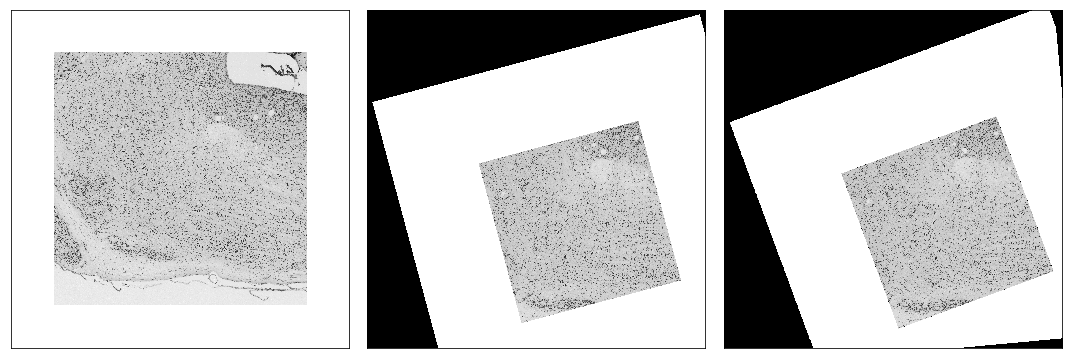

In [120]:
# display_images_in_grids([im1_cropped_downsampled_padded, im2_cropped_downsampled_padded_transformed, im2_alignedTo_im1],
#                        nc=3, vmin=0, vmax=255, cmap=plt.cm.gray)

display_images_in_grids([im1_cropped_lossless_padded, im2_cropped_lossless_padded_transformed, im2_alignedTo_im1],
                       nc=3, vmin=0, vmax=255, cmap=plt.cm.gray)

In [115]:
grid_size = 400

im_mTof_colored = np.zeros(im2_alignedTo_im1.shape)
im_mTof_colored[..., :] = im2_alignedTo_im1
im_f_colored = np.zeros(im1_cropped_downsampled_padded.shape)
im_f_colored[..., :] = im1_cropped_downsampled_padded

im_checkerboard_colored = im_mTof_colored.copy()
for zi, z in enumerate(range(0, im2_alignedTo_im1.shape[1], grid_size)):
    for yi, y in enumerate(range(0, im2_alignedTo_im1.shape[0], grid_size)):
        if (zi + yi) % 2 == 1:
            im_checkerboard_colored[y:y+grid_size, z:z+grid_size] = im_f_colored[y:y+grid_size, z:z+grid_size].copy()

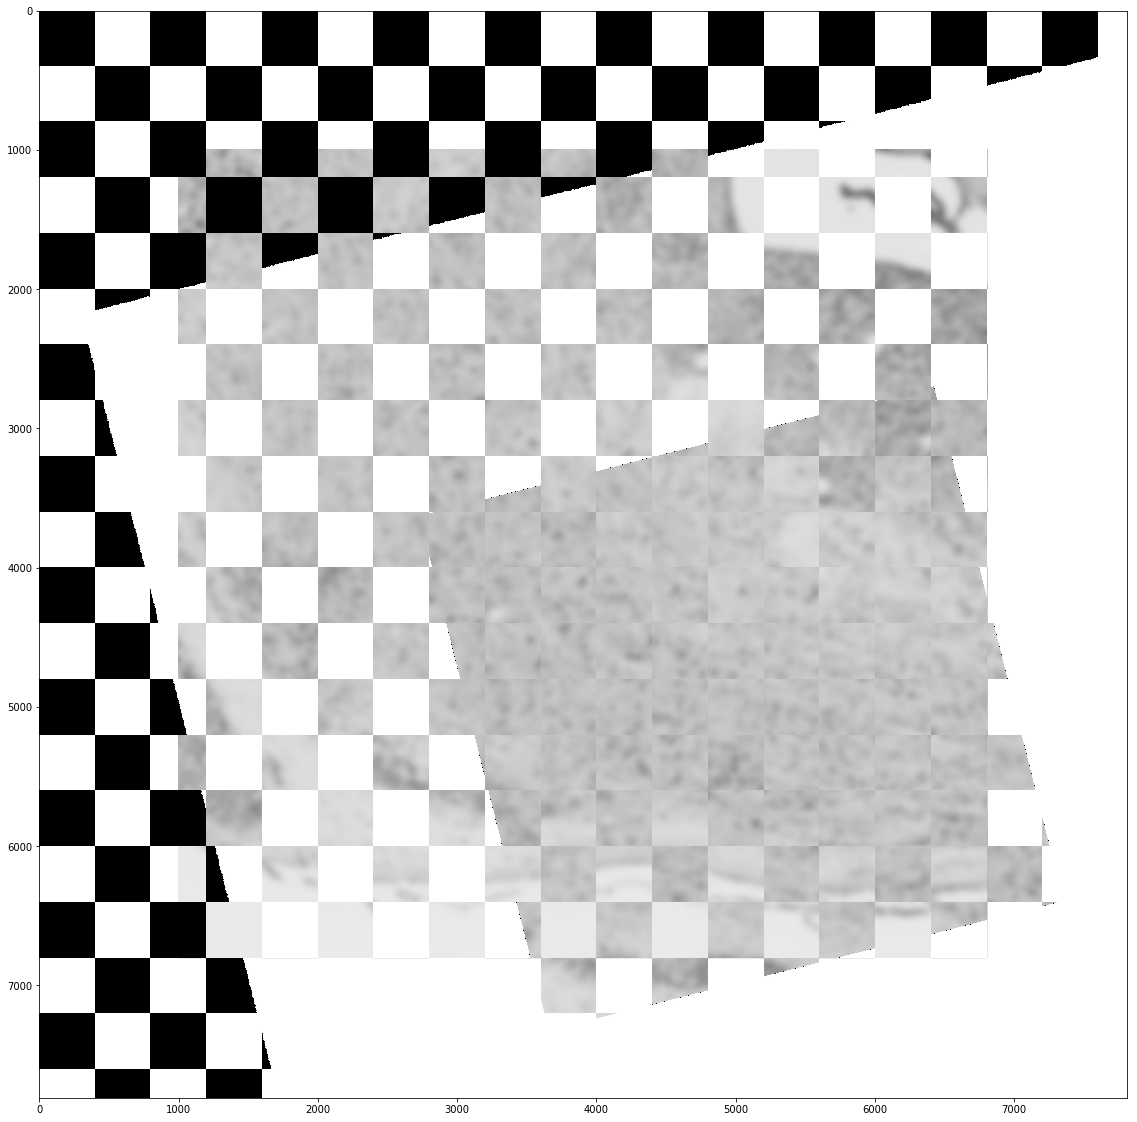

In [35]:
plt.figure(figsize=(20,20));
plt.imshow(im_checkerboard_colored, cmap=plt.cm.gray, vmin=0, vmax=255);
plt.show();

In [23]:
import numpy as np

def parameter_file_to_dict(filename):
    d = {}
    with open(filename, 'r') as f:
        for line in f.readlines():
            if line.startswith('('):
                tokens = line[1:-2].split(' ')
                key = tokens[0]
                if len(tokens) > 2:
                    value = []
                    for v in tokens[1:]:
                        try:
                            value.append(float(v))
                        except ValueError:
                            value.append(v)
                else:
                    v = tokens[1]
                    try:
                        value = (float(v))
                    except ValueError:
                        value = v
                d[key] = value

        return d

def parse_parameter_file(filepath):

    d = parameter_file_to_dict(filepath)

    rot_rad, x_mm, y_mm = d['TransformParameters']
    center = np.array(d['CenterOfRotationPoint']) / np.array(d['Spacing'])
    # center[1] = d['Size'][1] - center[1]

    xshift = x_mm / d['Spacing'][0]
    yshift = y_mm / d['Spacing'][1]

    R = np.array([[np.cos(rot_rad), -np.sin(rot_rad)],
                  [np.sin(rot_rad), np.cos(rot_rad)]])
    shift = center + (xshift, yshift) - np.dot(R, center)
    T = np.vstack([np.column_stack([R, shift]), [0,0,1]])

    return T

In [24]:
T_est = np.linalg.inv(parse_parameter_file('/home/ubuntu/test/TransformParameters.0.txt'))

In [25]:
print T
print T_est

[[  9.65925826e-01  -2.58819045e-01   4.36348345e+02]
 [  2.58819045e-01   9.65925826e-01  -2.10214885e+03]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
[[  9.99888176e-01  -1.49544426e-02   2.10319950e+02]
 [  1.49544426e-02   9.99888176e-01   3.48756453e+01]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


In [26]:
im2_alignedTo_im1_lossless = img_as_ubyte(warp(im2_cropped_lossless_transformed, np.linalg.inv(T_est), cval=0.))

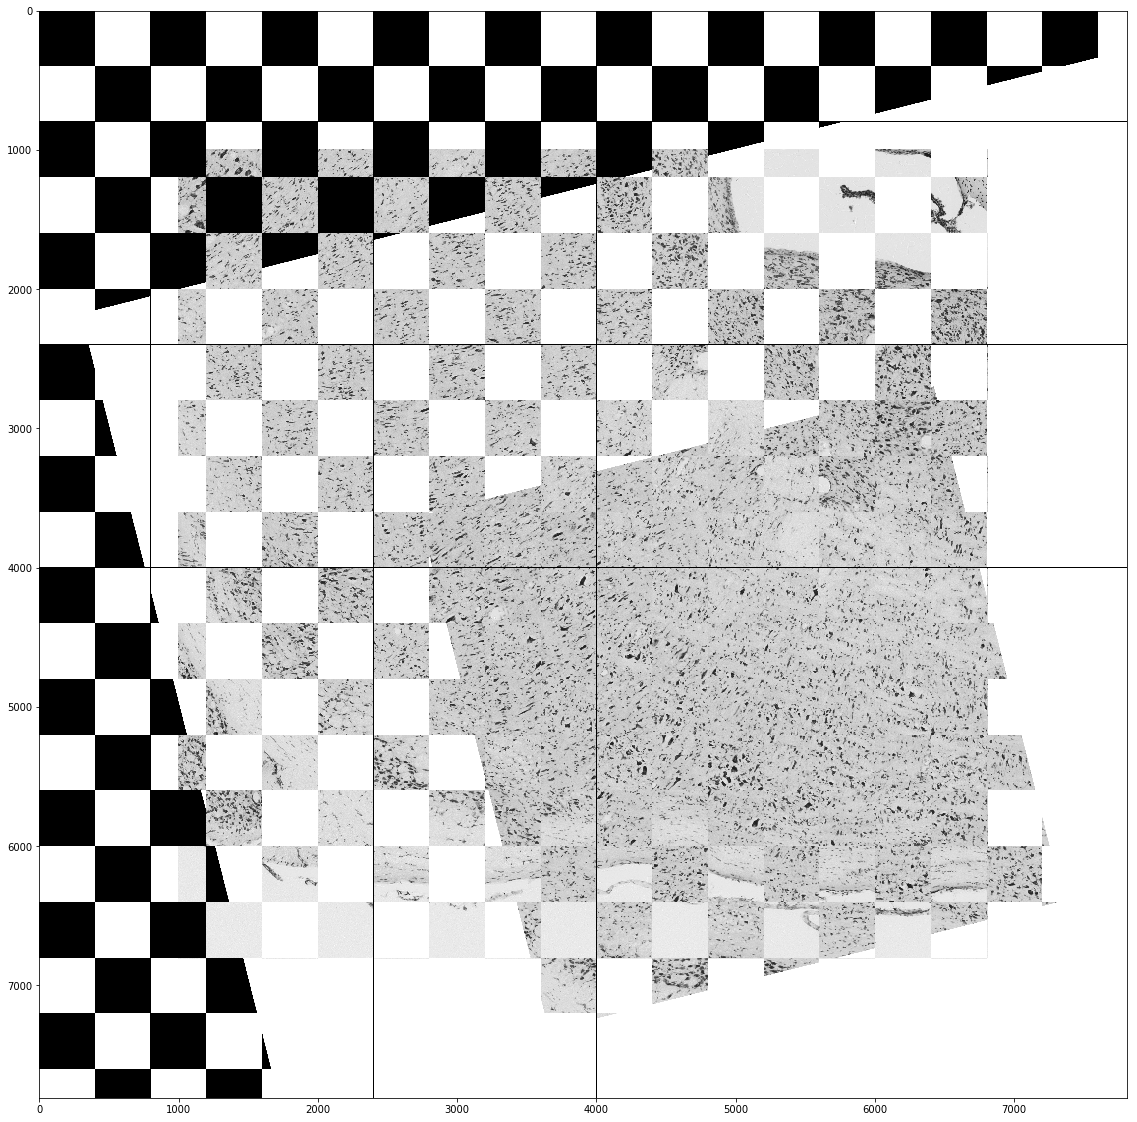

In [27]:
grid_size = 400

# im_mTof_colored = np.zeros(im2_alignedTo_im1_lossless.shape + (3,))
# im_mTof_colored[..., 0] = im2_alignedTo_im1_lossless
# im_f_colored = np.zeros(im1_cropped_lossless_padded.shape + (3,))
# im_f_colored[..., 1] = im1_cropped_lossless_padded

im_mTof_colored = np.zeros(im2_alignedTo_im1_lossless.shape, dtype=np.uint8)
im_mTof_colored[..., :] = im2_alignedTo_im1_lossless
im_f_colored = np.zeros(im1_cropped_lossless_padded.shape, dtype=np.uint8)
im_f_colored[..., :] = im1_cropped_lossless_padded

im_checkerboard_colored = im_mTof_colored.copy()
for zi, z in enumerate(range(0, im2_alignedTo_im1_lossless.shape[1], grid_size)):
    for yi, y in enumerate(range(0, im2_alignedTo_im1_lossless.shape[0], grid_size)):
        if (zi + yi) % 2 == 1:
            im_checkerboard_colored[y:y+grid_size, z:z+grid_size] = im_f_colored[y:y+grid_size, z:z+grid_size].copy()
            
            
im_checkerboard_colored[::grid_size, :] = 0
im_checkerboard_colored[:, ::grid_size] = 0
            
plt.figure(figsize=(20,20));
plt.imshow(im_checkerboard_colored, cmap=plt.cm.gray, vmin=0, vmax=255);
plt.show();

In [28]:
display_image(im_checkerboard_colored)

/shared/MouseBrainAtlas/preprocess/tmp.jpg

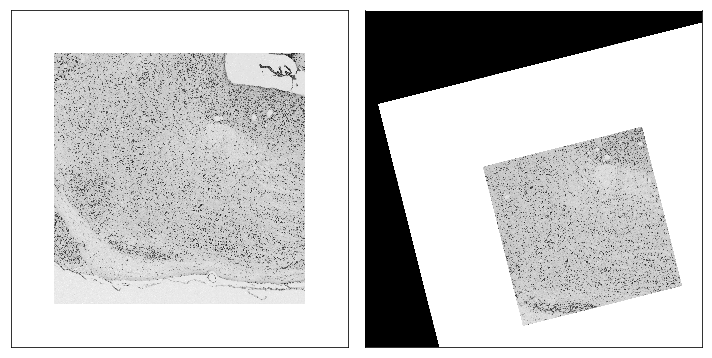

In [29]:
display_images_in_grids([im1_cropped_lossless_padded, im2_alignedTo_im1_lossless],
                       nc=2, vmin=0, vmax=255, cmap=plt.cm.gray)

In [30]:
display_image(im1_cropped_lossless_padded)

/shared/MouseBrainAtlas/preprocess/tmp.jpg

In [31]:
display_image(im2_alignedTo_im1_lossless)

/shared/MouseBrainAtlas/preprocess/tmp.jpg